### Our project focuses on predicting job satisfaction using a deep learning approach. It involves various steps such as feature engineering, correlation analysis, and the use of different modeling techniques, including neural networks. The aim is to explore how well different features correlate with job satisfaction, to optimize the set of features used for training, and to establish whether deep learning performs better compared to classical machine learning methods in this context. ###

In [2185]:
import pandas as pd
import numpy as np
np.random.seed(42)



In [2186]:
# data.shape

Absolutely, data preprocessing is crucial, especially for creating a generalizable model. Let’s outline the steps we should include beyond missing value handling to ensure data completeness and address inconsistencies.

### **Data Preprocessing Plan**:

1. **Missing Value Handling**: (Already discussed)
   - Impute missing values in numerical and categorical features.
   - Drop columns with a high percentage of missing data.

2. **Data Consistency and Completeness**:
   - **Standardize Categorical Values**: Ensure that all categorical features are standardized (e.g., converting all text to lowercase, handling typos or inconsistencies).
   - **Handle Mixed Formats**: Ensure all numerical values are in the correct format and scale (e.g., years vs. months).
   - **Address Unit Inconsistencies**: For any features that involve units (e.g., salary, years of experience), make sure they are consistent (e.g., all salary figures in the same currency).

3. **Feature Engineering**:
   - **Encoding Categorical Variables**:
     - Use **One-Hot Encoding** for categorical features such as `DeveloperType_Simplified`, `RemoteStatus`, and `Employment_Simplified`.
     - For deep learning, consider using **embedding layers** for high-cardinality features.
   - **Normalization/Standardization**:
     - **Standardize** numerical features (`WorkExp_Log`, `ConvertedCompYearly_Log`, etc.) to bring all features to a similar scale, which helps deep learning models converge faster.
   - **Feature Creation**: Create new features that may capture meaningful interactions (e.g., interaction between experience and employment type).

4. **Outlier Handling**: (Partially discussed)
   - Ensure that extreme values are capped or transformed to reduce their impact on the model.
   - Outliers in `ConvertedCompYearly` and `WorkExp` have already been capped to the **99th percentile**.

5. **Data Splitting**:
   - Ensure the data is split into **train** and **test** sets before imputation and preprocessing to avoid data leakage.



In [2187]:
data = pd.read_csv('survey_results_public.csv')

In [2188]:
# Check unique values in the 'JobSat' column
unique_job_sat_values = data['JobSat'].unique()
unique_job_sat_values

array([nan,  8.,  5., 10.,  6.,  9.,  4.,  7.,  3.,  2.,  1.,  0.])

In [2189]:
import pandas as pd

# Calculate the percentage of null values for each row
row_nulls = data.isnull().mean(axis=1) * 100

# Remove rows with more than 70% null values and update the DataFrame
data = data[row_nulls <= 60].reset_index(drop=True)

# Calculate the percentage of null values for each column
col_nulls = data.isnull().mean() * 100

# Remove columns with more than 70% null values and update the DataFrame
data = data.loc[:, col_nulls <= 65]

# Calculate and display the remaining null percentages by column
nulls_cnt = (data.isnull().sum() / len(data)) * 100
nulls = pd.DataFrame(nulls_cnt, columns=['Null percentage'])
nulls = nulls[nulls['Null percentage'] > 0]
nulls = nulls.sort_values(by='Null percentage', ascending=False)

# Set display option to show all rows
pd.set_option('display.max_rows', None)

# Display DataFrame of remaining null percentages by column
display(nulls.head(50))




Null percentage
EmbeddedHaveWorkedWith               62.133805
ConvertedCompYearly                  56.537926
AIToolNot interested in Using        56.481516
AINextMore integrated                56.223910
Knowledge_9                          48.036930
Frequency_3                          47.899665
Knowledge_8                          47.807529
ProfessionalTech                     47.798127
Knowledge_7                          47.768042
Knowledge_6                          47.606333
Knowledge_5                          47.576248
Knowledge_2                          47.313001
Knowledge_4                          47.294197
Knowledge_3                          47.173856
Frustration                          46.882404
Frequency_2                          46.669926
Frequency_1                          46.660524
MiscTechAdmired                      46.653003
ProfessionalCloud                    46.434884
Knowledge_1                          46.111466
ProfessionalQuestion                 45.840698
TimeAnswering                        45.769245
Industry                             45.752322
TimeSearching                        45.647023
AIToolInterested in Using            45.601895
JobSat                               45.267196
JobSatPoints_1                       44.953180
JobSatPoints_4                       44.823437
JobSatPoints_5                       44.789590
JobSatPoints_11                      44.725659
JobSatPoints_7                       44.720018
JobSatPoints_6                       44.716257
JobSatPoints_10                      44.716257
JobSatPoints_9                       44.704975
JobSatPoints_8                       44.704975
WorkExp                              44.323267
ICorPM                               44.071302
PlatformAdmired                      43.108571
MiscTechWantToWorkWith               40.814561
CompTotal                            38.204656
AIToolCurrently Using                38.182092
PlatformWantToWorkWith               37.712008
WebframeAdmired                      36.914746
AIBen                                36.341243
AIComplex                            35.916287
AIAcc                                35.574066
AISearchDevAdmired                   35.166034
AISearchDevWantToWorkWith            33.191681
AIChallenges                         33.056297
OfficeStackAsyncAdmired              32.074762

In [2190]:
data.shape

(53182, 108)

In [2191]:
# Define a dictionary for renaming the columns
column_renaming = {
    "Knowledge_1": "External_Team_Interactions",
    "Knowledge_2": "Knowledge_Sharing_Limitations",
    "Knowledge_3": "Access_to_UpToDate_Info",
    "Knowledge_4": "Quick_Access_to_Answers",
    "Knowledge_5": "Resource_Knowledge",
    "Knowledge_6": "Repeated_Questions_Encountered",
    "Knowledge_7": "Workflow_Interruption",
    "Knowledge_8": "Tools_and_Resources_Access",
    "Knowledge_9": "Employer_Tool_Reimbursement",
    "Frequency_1": "Help_Needed_From_Outside_Team",
    "Frequency_2": "Interactions_with_External_Teams",
    "Frequency_3": "Knowledge_Silos_Encountered",
    "JobSatPoints_1": "JobSat_Strategy_Driving",
    "JobSatPoints_4": "JobSat_OpenSource_Contribution",
    "JobSatPoints_5": "JobSat_Data_Security",
    "JobSatPoints_6": "JobSat_Code_Quality_Improvement",
    "JobSatPoints_7": "JobSat_New_Tech_Learning",
    "JobSatPoints_8": "JobSat_Architecture_Design",
    "JobSatPoints_9": "JobSat_Tool_Expertise",
    "JobSatPoints_10": "JobSat_Hardware_Working",
    "JobSatPoints_11": "JobSat_Internal_Network_Staffing"
}

# Apply renaming to the DataFrame
data.rename(columns=column_renaming, inplace=True)

# Display the updated DataFrame columns to confirm
data.head()


ResponseId                      MainBranch                 Age  \
0           2  I am a developer by profession     35-44 years old   
1           3  I am a developer by profession     45-54 years old   
2           4           I am learning to code     18-24 years old   
3           6     I code primarily as a hobby  Under 18 years old   
4           8           I am learning to code     18-24 years old   

                                          Employment RemoteWork   Check  \
0                                Employed, full-time     Remote  Apples   
1                                Employed, full-time     Remote  Apples   
2                                 Student, full-time        NaN  Apples   
3                                 Student, full-time        NaN  Apples   
4  Student, full-time;Not employed, but looking f...        NaN  Apples   

                                    CodingActivities  \
0  Hobby;Contribute to open-source projects;Other...   
1  Hobby;Contribute to open-source projects;Other...   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                             EdLevel  \
0       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
1    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
2  Some college/university study without earning ...   
3                          Primary/elementary school   
4  Secondary school (e.g. American high school, G...   

                                           LearnCode  \
0  Books / Physical media;Colleague;On the job tr...   
1  Books / Physical media;Colleague;On the job tr...   
2  Other online resources (e.g., videos, blogs, f...   
3  School (i.e., University, College, etc);Online...   
4  Other online resources (e.g., videos, blogs, f...   

                                     LearnCodeOnline  ...  \
0  Technical documentation;Blogs;Books;Written Tu...  ...   
1  Technical documentation;Blogs;Books;Written Tu...  ...   
2  Stack Overflow;How-to videos;Interactive tutorial  ...   
3                                                NaN  ...   
4  Technical documentation;Video-based Online Cou...  ...   

  JobSat_Code_Quality_Improvement JobSat_New_Tech_Learning  \
0                             0.0                      0.0   
1                             NaN                      NaN   
2                             NaN                      NaN   
3                             NaN                      NaN   
4                             NaN                      NaN   

  JobSat_Architecture_Design JobSat_Tool_Expertise JobSat_Hardware_Working  \
0                        0.0                   0.0                     0.0   
1                        NaN                   NaN                     NaN   
2                        NaN                   NaN                     NaN   
3                        NaN                   NaN                     NaN   
4                        NaN                   NaN                     NaN   

  JobSat_Internal_Network_Staffing           SurveyLength SurveyEase  \
0                              0.0                    NaN        NaN   
1                              NaN  Appropriate in length       Easy   
2                              NaN               Too long       Easy   
3                              NaN  Appropriate in length       Easy   
4                              NaN  Appropriate in length  Difficult   

  ConvertedCompYearly JobSat  
0                 NaN    NaN  
1                 NaN    NaN  
2                 NaN    NaN  
3                 NaN    NaN  
4                 NaN    NaN  

[5 rows x 108 columns]

In [2192]:
print(data.shape)
data.sample(5)

(53182, 108)


ResponseId                                         MainBranch  \
42972       47561  I am not primarily a developer, but I write co...   
4305         4694                     I am a developer by profession   
4813         5247                     I am a developer by profession   
9281        10051                     I am a developer by profession   
23685       25679                     I am a developer by profession   

                   Age                                         Employment  \
42972  35-44 years old                                Employed, full-time   
4305   35-44 years old  Employed, full-time;Independent contractor, fr...   
4813   18-24 years old                                Employed, part-time   
9281   45-54 years old  Independent contractor, freelancer, or self-em...   
23685  35-44 years old                                Employed, full-time   

                                 RemoteWork   Check  \
42972  Hybrid (some remote, some in-person)  Apples   
4305   Hybrid (some remote, some in-person)  Apples   
4813                                 Remote  Apples   
9281                                 Remote  Apples   
23685  Hybrid (some remote, some in-person)  Apples   

                                        CodingActivities  \
42972                       I don’t code outside of work   
4305   Hobby;Contribute to open-source projects;Freel...   
4813                                               Hobby   
9281   Hobby;Professional development or self-paced l...   
23685  Hobby;Professional development or self-paced l...   

                                               EdLevel  \
42972  Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
4305      Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
4813      Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
9281      Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
23685     Bachelor’s degree (B.A., B.S., B.Eng., etc.)   

                                               LearnCode  \
42972  Other online resources (e.g., videos, blogs, f...   
4305   Books / Physical media;Other online resources ...   
4813   Other online resources (e.g., videos, blogs, f...   
9281   Books / Physical media;Other online resources ...   
23685  On the job training;Other online resources (e....   

                                         LearnCodeOnline  ...  \
42972  Technical documentation;Written Tutorials;Stac...  ...   
4305   Technical documentation;Blogs;Books;Written Tu...  ...   
4813   Technical documentation;Blogs;Stack Overflow;S...  ...   
9281   Technical documentation;Books;Stack Overflow;V...  ...   
23685  Technical documentation;Written Tutorials;Stac...  ...   

      JobSat_Code_Quality_Improvement JobSat_New_Tech_Learning  \
42972                             NaN                      NaN   
4305                             30.0                      0.0   
4813                              0.0                      0.0   
9281                             10.0                     20.0   
23685                            30.0                     10.0   

      JobSat_Architecture_Design JobSat_Tool_Expertise  \
42972                        NaN                   NaN   
4305                         0.0                  20.0   
4813                         0.0                   0.0   
9281                        15.0                  20.0   
23685                       20.0                   5.0   

      JobSat_Hardware_Working JobSat_Internal_Network_Staffing  \
42972                     NaN                              NaN   
4305                      0.0                             10.0   
4813                      0.0                              0.0   
9281                     10.0                             10.0   
23685                     0.0                             10.0   

                SurveyLength                  SurveyEase ConvertedCompYearly  \
42972  Appropriate in length                        Easy                 NaN   
4305   Appropri


### 1. **Job-Related Attributes**
   - Columns reflecting aspects of the job that can influence satisfaction:
     - **Job Role and Responsibilities**: Columns like `MainBranch`, `Employment`, `DevType` (Developer type).
     - **Compensation and Benefits**: `ConvertedCompYearly`, `CompTotal`.
     - **Work Environment**: `RemoteWork`, `OrgSize`, `WorkExp`.
     - **Industry**: Relevant if available, as some industries may correlate with job satisfaction.
     - **Time**-related columns (e.g., `TimeAnswering`, `TimeSearching`): Indicate the time spent on work-related activities.
     - **Work-Life Balance**: `RemoteWork`, `JobSatPoints` series (factors scoring job attributes like project satisfaction, team support).

### 2. **Technical Skills and Tools**
   - Columns representing skills, tools, and resources accessible to the developer:
     - **Programming Languages and Frameworks**: Columns like `LanguageAdmired`, `LanguageHaveWorkedWith`, `WebframeAdmired`, `WebframeWantToWorkWith`.
     - **Professional Tools**: `ProfessionalTech`, `ProfessionalCloud`.
     - **Learning Resources**: Columns indicating how developers learn (e.g., `LearnCode`, `LearnCodeOnline`).

### 3. **AI and Technology Usage**
   - AI usage columns could reflect satisfaction if they impact efficiency:
     - **AI and Automation Tools**: `AIToolCurrently Using`, `AIToolInterested in Using`, `AIToolNot interested in Using`.
     - **Tech Preferences**: `PlatformAdmired`, `DatabaseAdmired`, `MiscTechAdmired`.

### 4. **Cultural and Community Factors**
   - Indicators of engagement with the developer community and cultural alignment:
     - **Stack Overflow Usage**: `SOAccount`, `SOVisitFreq`, `SOComm`.
     - **Community Engagement**: `TechDoc`, `PlatformWantToWorkWith`, `MiscTechWantToWorkWith`.
   
### Data Preparation Steps to Avoid Leakage

1. **Exclude Columns Explicitly Indicating Satisfaction**: Avoid columns directly related to satisfaction that might reveal answers, such as `JobSat` itself.
2. **Train-Test Splits Before Feature Engineering**: To prevent leakage, create train-test splits before calculating any feature statistics (e.g., mean encoding, scaling) based on the whole dataset.
3. **Use Only Relevant Historical and Categorical Data**: Avoid future information or direct outcomes in the model features. Columns like `JobSatPoints` may need to be assessed for indirect vs. direct satisfaction indicators.

This approach creates a feature set with minimal risk of data leakage by focusing on descriptive (not predictive) job attributes and neutral historical data, ready for transformations like encoding, scaling, and handling nulls as appropriate.

In [2193]:
data.CodingActivities.head()

0    Hobby;Contribute to open-source projects;Other...
1    Hobby;Contribute to open-source projects;Other...
2                                                  NaN
3                                                  NaN
4                                                  NaN
Name: CodingActivities, dtype: object

In [2194]:
# Step 1: Identify unique values in the 'CodingActivities' column
unique_coding_activities = set()

# Split each non-null entry in 'CodingActivities' and update the unique set
data['CodingActivities'].dropna().apply(lambda x: unique_coding_activities.update(x.split(';')))

# Convert to a sorted list for readability
unique_coding_activities = sorted(unique_coding_activities)

# Display the unique values to verify
unique_coding_activities


['Bootstrapping a business',
 'Contribute to open-source projects',
 'Freelance/contract work',
 'Hobby',
 'I don’t code outside of work',
 'Other (please specify):',
 'Professional development or self-paced learning from online courses',
 'School or academic work']

In [2195]:
# Define the unique coding activities as categories for binary encoding
coding_activity_categories = {
    "Bootstrapping Business": ["Bootstrapping a business"],
    "Open Source Contribution": ["Contribute to open-source projects"],
    "Freelance/Contract Work": ["Freelance/contract work"],
    "Hobby": ["Hobby"],
    "No Extra Coding": ["I donâ€™t code outside of work"],
    "Other": ["Other (please specify):"],
    "Professional Development": ["Professional development or self-paced learning from online courses"],
    "School/Academic Work": ["School or academic work"]
}

# Create a new DataFrame for binary encoded coding activity categories
coding_activity_df = pd.DataFrame(0, index=data.index, columns=coding_activity_categories.keys())

# Populate each category with binary values based on the 'CodingActivities' column
for category, activities in coding_activity_categories.items():
    coding_activity_df[category] = data['CodingActivities'].apply(lambda x: 1 if pd.notna(x) and any(activity in x for activity in activities) else 0)

# Concatenate the new coding activity columns to the main data and drop the original 'CodingActivities' column
data = pd.concat([data, coding_activity_df], axis=1)
data = data.drop('CodingActivities', axis=1)

# Display the new columns to verify the transformation
data[coding_activity_df.columns].head()


Bootstrapping Business  Open Source Contribution  Freelance/Contract Work  \
0                       0                         1                        0   
1                       0                         1                        0   
2                       0                         0                        0   
3                       0                         0                        0   
4                       0                         0                        0   

   Hobby  No Extra Coding  Other  Professional Development  \
0      1                0      1                         0   
1      1                0      1                         0   
2      0                0      0                         0   
3      0                0      0                         0   
4      0                0      0                         0   

   School/Academic Work  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0

In [2196]:
data.EdLevel.head()

0         Bachelor’s degree (B.A., B.S., B.Eng., etc.)
1      Master’s degree (M.A., M.S., M.Eng., MBA, etc.)
2    Some college/university study without earning ...
3                            Primary/elementary school
4    Secondary school (e.g. American high school, G...
Name: EdLevel, dtype: object

In [2197]:
# Extract unique values from 'EdLevel' column
unique_ed_levels = sorted(data['EdLevel'].dropna().unique())

# Display the unique values to verify
unique_ed_levels


['Associate degree (A.A., A.S., etc.)',
 'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
 'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
 'Primary/elementary school',
 'Professional degree (JD, MD, Ph.D, Ed.D, etc.)',
 'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
 'Some college/university study without earning a degree',
 'Something else']

In [2198]:
# Define education level categories
edlevel_categories = {
    "Primary/Secondary": [
        "Primary/elementary school",
        "Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)"
    ],
    "Undergraduate": [
        "Some college/university study without earning a degree",
        "Associate degree",
        "Bachelor’s degree (B.A., B.S., B.Eng., etc.)"
    ],
    "Graduate": [
        "Master’s degree (M.A., M.S., M.Eng., MBA, etc.)"
    ],
    "Postgraduate": [
        "Professional degree (JD, MD, etc.)",
        "Doctoral degree (Ph.D., Ed.D., etc.)"
    ]
}

# Create a new column in the DataFrame to hold the categorized education levels
def map_edlevel_to_category(ed_level):
    for category, levels in edlevel_categories.items():
        if ed_level in levels:
            return category
    return "Other"  # In case there are unexpected values

# Apply the function to categorize 'EdLevel' and store it in a new column 'EdLevel_Category'
data['EdLevel'] = data['EdLevel'].apply(map_edlevel_to_category)

# Display the DataFrame with the new categorized column
data[['EdLevel']].head()


EdLevel
0      Undergraduate
1           Graduate
2      Undergraduate
3  Primary/Secondary
4  Primary/Secondary

In [2199]:
# Extract unique values from 'TechDoc', 'PlatformWantToWorkWith', and 'MiscTechWantToWorkWith' by splitting each entry

# Extract unique items for each column
unique_techdocs = set()
unique_platforms_want = set()
unique_misctech_want = set()

# Split each non-null entry in the respective columns and update the unique sets
data['TechDoc'].dropna().apply(lambda x: unique_techdocs.update(x.split(';')))
data['PlatformWantToWorkWith'].dropna().apply(lambda x: unique_platforms_want.update(x.split(';')))
data['MiscTechWantToWorkWith'].dropna().apply(lambda x: unique_misctech_want.update(x.split(';')))

# Convert the sets of unique values to sorted lists for readability
unique_techdocs = sorted(unique_techdocs)
unique_platforms_want = sorted(unique_platforms_want)
unique_misctech_want = sorted(unique_misctech_want)

# Display the unique values to verify
unique_techdocs[:10], unique_platforms_want[:10], unique_misctech_want[:10]  # Displaying first 10 for each list


(['AI-powered search/dev tool (free)',
  'AI-powered search/dev tool (paid)',
  'API document(s) and/or SDK document(s)',
  'First-party knowledge base',
  'Other (please specify):',
  'Traditional public search engine',
  'User guides or README files found in the source repository'],
 ['Alibaba Cloud',
  'Amazon Web Services (AWS)',
  'Cloudflare',
  'Colocation',
  'Databricks',
  'Digital Ocean',
  'Firebase',
  'Fly.io',
  'Google Cloud',
  'Heroku'],
 ['.NET (5+) ',
  '.NET Framework (1.0 - 4.8)',
  '.NET MAUI',
  'Apache Kafka',
  'Apache Spark',
  'CUDA',
  'Capacitor',
  'Cordova',
  'DirectX',
  'Electron'])

In [2200]:
# Define categories for each column based on the identified unique values
# Categories for TechDoc
techdoc_categories = {
    "AI Tools": ["AI-powered search/dev tool (free)", "AI-powered search/dev tool (paid)"],
    "Knowledge Bases": ["First-party knowledge base", "User guides or README files found in the source repository"],
    "Public Search Engine": ["Traditional public search engine"],
    "API/SDK Documentation": ["API document(s) and/or SDK document(s)"],
}

# Categories for PlatformWantToWorkWith
platform_want_categories = {
    "Cloud Platforms": ["Alibaba Cloud", "Amazon Web Services (AWS)", "Google Cloud", "Firebase", "Digital Ocean", "Heroku", "Fly.io"],
    "Data Processing": ["Databricks", "Cloudflare", "Colocation"],
}

# Categories for MiscTechWantToWorkWith
misctech_want_categories = {
    "Programming Frameworks": [".NET (5+)", ".NET Framework (1.0 - 4.8)", ".NET MAUI", "Capacitor", "Cordova"],
    "Data Processing Tech": ["Apache Kafka", "Apache Spark", "CUDA", "DirectX", "Electron"]
}

# Create new DataFrames for each of the admired columns
techdoc_df = pd.DataFrame(0, index=data.index, columns=techdoc_categories.keys())
platform_want_df = pd.DataFrame(0, index=data.index, columns=platform_want_categories.keys())
misctech_want_df = pd.DataFrame(0, index=data.index, columns=misctech_want_categories.keys())

# Populate each category with binary values based on the presence of values in each column
for category, techs in techdoc_categories.items():
    techdoc_df[category] = data['TechDoc'].apply(lambda x: 1 if pd.notna(x) and any(tech in x for tech in techs) else 0)

for category, platforms in platform_want_categories.items():
    platform_want_df[category] = data['PlatformWantToWorkWith'].apply(lambda x: 1 if pd.notna(x) and any(platform in x for platform in platforms) else 0)

for category, techs in misctech_want_categories.items():
    misctech_want_df[category] = data['MiscTechWantToWorkWith'].apply(lambda x: 1 if pd.notna(x) and any(tech in x for tech in techs) else 0)

# Concatenate the new grouped columns to the main data and drop the original columns
data = pd.concat([data, techdoc_df, platform_want_df, misctech_want_df], axis=1)
data = data.drop(['TechDoc', 'PlatformWantToWorkWith', 'MiscTechWantToWorkWith'], axis=1)

# Display the new columns to verify the transformation
data[techdoc_df.columns.tolist() + platform_want_df.columns.tolist() + misctech_want_df.columns.tolist()].head()


AI Tools  Knowledge Bases  Public Search Engine  API/SDK Documentation  \
0         0                1                     1                      1   
1         0                1                     1                      1   
2         0                0                     0                      0   
3         0                0                     0                      0   
4         0                1                     0                      0   

   Cloud Platforms  Data Processing  Programming Frameworks  \
0                1                0                       0   
1                1                0                       1   
2                1                0                       0   
3                0                1                       0   
4                0                0                       0   

   Data Processing Tech  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0

In [2201]:
# Extract unique values for each column
soaccount_unique = sorted(data['SOAccount'].dropna().unique())
sovisitfreq_unique = sorted(data['SOVisitFreq'].dropna().unique())
socomm_unique = sorted(data['SOComm'].dropna().unique())

# Display the unique values for each column to guide the transformation
soaccount_unique, sovisitfreq_unique, socomm_unique


(['No', "Not sure/can't remember", 'Yes'],
 ['A few times per month or weekly',
  'A few times per week',
  'Daily or almost daily',
  'Less than once per month or monthly',
  'Multiple times per day'],
 ['Neutral',
  'No, not at all',
  'No, not really',
  'Not sure',
  'Yes, definitely',
  'Yes, somewhat'])

In [2202]:
# Categories for SOAccount
soaccount_categories = {
    "SOAccount - Yes": ["Yes"],
    "SOAccount - No": ["No"],
    "SOAccount - Not Sure": ["Not sure/can't remember"]
}

# Categories for SOVisitFreq (grouped by frequency level for simplicity)
sovisitfreq_categories = {
    "Infrequent": ["Less than once per month or monthly"],
    "Frequent": ["A few times per month or weekly", "A few times per week"],
    "Very Frequent": ["Daily or almost daily", "Multiple times per day"]
}

# Categories for SOComm
socomm_categories = {
    "Positive Community Engagement": ["Yes, definitely", "Yes, somewhat"],
    "Neutral Community Engagement": ["Neutral"],
    "Negative Community Engagement": ["No, not really", "No, not at all"]
}

# Create new DataFrames for binary encoded columns for each category
soaccount_df = pd.DataFrame(0, index=data.index, columns=soaccount_categories.keys())
sovisitfreq_df = pd.DataFrame(0, index=data.index, columns=sovisitfreq_categories.keys())
socomm_df = pd.DataFrame(0, index=data.index, columns=socomm_categories.keys())

# Populate each category with binary values for 'SOAccount', 'SOVisitFreq', and 'SOComm'
for category, responses in soaccount_categories.items():
    soaccount_df[category] = data['SOAccount'].apply(lambda x: 1 if pd.notna(x) and any(response in x for response in responses) else 0)

for category, responses in sovisitfreq_categories.items():
    sovisitfreq_df[category] = data['SOVisitFreq'].apply(lambda x: 1 if pd.notna(x) and any(response in x for response in responses) else 0)

for category, responses in socomm_categories.items():
    socomm_df[category] = data['SOComm'].apply(lambda x: 1 if pd.notna(x) and any(response in x for response in responses) else 0)

# Concatenate the new grouped columns to the main data and drop the original columns
data = pd.concat([data, soaccount_df, sovisitfreq_df, socomm_df], axis=1)
data = data.drop(['SOAccount', 'SOVisitFreq', 'SOComm'], axis=1)

# Display the new columns to verify the transformation
data[soaccount_df.columns.tolist() + sovisitfreq_df.columns.tolist() + socomm_df.columns.tolist()].head()


SOAccount - Yes  SOAccount - No  SOAccount - Not Sure  Infrequent  \
0                1               0                     0           0   
1                1               0                     0           0   
2                0               1                     0           0   
3                1               0                     0           0   
4                0               1                     0           1   

   Frequent  Very Frequent  Positive Community Engagement  \
0         0              1                              1   
1         0              1                              1   
2         0              1                              0   
3         0              1                              1   
4         0              0                              0   

   Neutral Community Engagement  Negative Community Engagement  
0                             0                              0  
1                             0                              0  
2                             0                              1  
3                             0                              0  
4                             0                              1

In [2203]:
# Extract unique values from 'PlatformAdmired', 'DatabaseAdmired', and 'MiscTechAdmired' by splitting each entry

# Extract unique platforms, databases, and miscellaneous tech admired
unique_platforms_admired = set()
unique_databases_admired = set()
unique_misctech_admired = set()

# Split each non-null entry in the respective columns and update the unique sets
data['PlatformAdmired'].dropna().apply(lambda x: unique_platforms_admired.update(x.split(';')))
data['DatabaseAdmired'].dropna().apply(lambda x: unique_databases_admired.update(x.split(';')))
data['MiscTechAdmired'].dropna().apply(lambda x: unique_misctech_admired.update(x.split(';')))

# Convert the sets of unique values to sorted lists for readability
unique_platforms_admired = sorted(unique_platforms_admired)
unique_databases_admired = sorted(unique_databases_admired)
unique_misctech_admired = sorted(unique_misctech_admired)

# Display the unique values to verify
unique_platforms_admired[:10], unique_databases_admired[:10], unique_misctech_admired[:10]  # Displaying first 10 for each list


(['Alibaba Cloud',
  'Amazon Web Services (AWS)',
  'Cloudflare',
  'Colocation',
  'Databricks',
  'Digital Ocean',
  'Firebase',
  'Fly.io',
  'Google Cloud',
  'Heroku'],
 ['BigQuery',
  'Cassandra',
  'Clickhouse',
  'Cloud Firestore',
  'Cockroachdb',
  'Cosmos DB',
  'Couch DB',
  'Couchbase',
  'Databricks SQL',
  'Datomic'],
 ['.NET (5+) ',
  '.NET Framework (1.0 - 4.8)',
  '.NET MAUI',
  'Apache Kafka',
  'Apache Spark',
  'CUDA',
  'Capacitor',
  'Cordova',
  'DirectX',
  'Electron'])

In [2204]:
# Define categories based on unique values identified for each admired technology type
platform_admired_categories = {
    "Cloud Platforms": ["Alibaba Cloud", "Amazon Web Services (AWS)", "Google Cloud", "Firebase", "Digital Ocean", "Heroku", "Fly.io"],
    "Data Processing Platforms": ["Databricks", "Cloudflare", "Colocation"]
}

database_admired_categories = {
    "SQL Databases": ["BigQuery", "Clickhouse", "DuckDB", "Dynamodb", "Couch DB", "Cockroachdb", "Cosmos DB"],
    "NoSQL Databases": ["Cassandra", "Cloud Firestore", "Databricks SQL"],
}

misctech_admired_categories = {
    "Programming Frameworks": [".NET (5+)", ".NET Framework (1.0 - 4.8)", ".NET MAUI", "Capacitor", "Cordova"],
    "Data Processing Tech": ["Apache Kafka", "Apache Spark", "CUDA", "DirectX", "Electron"]
}

# Create new DataFrames for each of the admired columns
platform_admired_df = pd.DataFrame(0, index=data.index, columns=platform_admired_categories.keys())
database_admired_df = pd.DataFrame(0, index=data.index, columns=database_admired_categories.keys())
misctech_admired_df = pd.DataFrame(0, index=data.index, columns=misctech_admired_categories.keys())

# Populate each category with binary values based on the presence of platforms, databases, and misc tech in admired columns
for category, platforms in platform_admired_categories.items():
    platform_admired_df[category] = data['PlatformAdmired'].apply(
        lambda x: 1 if pd.notna(x) and any(platform in x for platform in platforms) else 0
    )

for category, databases in database_admired_categories.items():
    database_admired_df[category] = data['DatabaseAdmired'].apply(
        lambda x: 1 if pd.notna(x) and any(database in x for database in databases) else 0
    )

for category, techs in misctech_admired_categories.items():
    misctech_admired_df[category] = data['MiscTechAdmired'].apply(
        lambda x: 1 if pd.notna(x) and any(tech in x for tech in techs) else 0
    )

# Concatenate the new grouped columns to the main data and drop the original columns
data = pd.concat([data, platform_admired_df, database_admired_df, misctech_admired_df], axis=1)
data = data.drop(['PlatformAdmired', 'DatabaseAdmired', 'MiscTechAdmired'], axis=1)

# Display the new columns to verify the transformation
data[platform_admired_df.columns.tolist() + database_admired_df.columns.tolist() + misctech_admired_df.columns.tolist()].head()


Cloud Platforms  Cloud Platforms  Data Processing Platforms  SQL Databases  \
0                1                1                          0              0   
1                1                1                          0              0   
2                1                1                          0              0   
3                0                0                          1              0   
4                0                0                          0              0   

   NoSQL Databases  Programming Frameworks  Programming Frameworks  \
0                0                       0                       0   
1                0                       1                       1   
2                0                       0                       0   
3                1                       0                       0   
4                0                       0                       0   

   Data Processing Tech  Data Processing Tech  
0                     0                     0  
1                     0                     0  
2                     0                     0  
3                     0                     0  
4                     0                     0

In [2205]:
# First, extract unique AI tools by splitting the entries in 'AIToolCurrently Using', 'AIToolInterested in Using', and 'AIToolNot interested in Using'

# Extract unique AI tools from each column
unique_ai_tools_current = set()
unique_ai_tools_interested = set()
unique_ai_tools_not_interested = set()

# Split each non-null entry in the AI tool columns and update the unique sets
data['AIToolCurrently Using'].dropna().apply(lambda x: unique_ai_tools_current.update(x.split(';')))
data['AIToolInterested in Using'].dropna().apply(lambda x: unique_ai_tools_interested.update(x.split(';')))
data['AIToolNot interested in Using'].dropna().apply(lambda x: unique_ai_tools_not_interested.update(x.split(';')))

# Convert the sets of unique AI tools to sorted lists for readability
unique_ai_tools_current = sorted(unique_ai_tools_current)
unique_ai_tools_interested = sorted(unique_ai_tools_interested)
unique_ai_tools_not_interested = sorted(unique_ai_tools_not_interested)

# Display the unique AI tools to verify
unique_ai_tools_current[:10], unique_ai_tools_interested[:10], unique_ai_tools_not_interested[:10]  # Displaying first 10 for each list


(['Committing and reviewing code',
  'Debugging and getting help',
  'Deployment and monitoring',
  'Documenting code',
  'Generating content or synthetic data',
  'Learning about a codebase',
  'Other (please specify):',
  'Predictive analytics',
  'Project planning',
  'Search for answers'],
 ['Committing and reviewing code',
  'Debugging and getting help',
  'Deployment and monitoring',
  'Documenting code',
  'Generating content or synthetic data',
  'Learning about a codebase',
  'Other (please specify):',
  'Predictive analytics',
  'Project planning',
  'Search for answers'],
 ['Committing and reviewing code',
  'Debugging and getting help',
  'Deployment and monitoring',
  'Documenting code',
  'Generating content or synthetic data',
  'Learning about a codebase',
  'Other (please specify):',
  'Predictive analytics',
  'Project planning',
  'Search for answers'])

In [2206]:
# Define categories based on unique AI tools identified
ai_tool_categories = {
    "Committing and Reviewing Code": ["Committing and reviewing code"],
    "Debugging and Getting Help": ["Debugging and getting help"],
    "Deployment and Monitoring": ["Deployment and monitoring"],
    "Documenting Code": ["Documenting code"],
    "Generating Content or Synthetic Data": ["Generating content or synthetic data"],
    "Learning About Codebase": ["Learning about a codebase"],
    "Predictive Analytics": ["Predictive analytics"],
    "Project Planning": ["Project planning"],
    "Search for Answers": ["Search for answers"],
    "Other": ["Other (please specify):"]
}

# Create new DataFrames for each of the AI tool columns
ai_tool_current_df = pd.DataFrame(0, index=data.index, columns=[f"{category} - Currently Using" for category in ai_tool_categories.keys()])
ai_tool_interested_df = pd.DataFrame(0, index=data.index, columns=[f"{category} - Interested" for category in ai_tool_categories.keys()])
ai_tool_not_interested_df = pd.DataFrame(0, index=data.index, columns=[f"{category} - Not Interested" for category in ai_tool_categories.keys()])

# Populate each category with binary values based on the presence of tools in each column
for category, tools in ai_tool_categories.items():
    ai_tool_current_df[f"{category} - Currently Using"] = data['AIToolCurrently Using'].apply(
        lambda x: 1 if pd.notna(x) and any(tool in x for tool in tools) else 0
    )
    ai_tool_interested_df[f"{category} - Interested"] = data['AIToolInterested in Using'].apply(
        lambda x: 1 if pd.notna(x) and any(tool in x for tool in tools) else 0
    )
    ai_tool_not_interested_df[f"{category} - Not Interested"] = data['AIToolNot interested in Using'].apply(
        lambda x: 1 if pd.notna(x) and any(tool in x for tool in tools) else 0
    )

# Concatenate the new grouped columns to the main data and drop the original AI tool columns
data = pd.concat([data, ai_tool_current_df, ai_tool_interested_df, ai_tool_not_interested_df], axis=1)
data = data.drop(['AIToolCurrently Using', 'AIToolInterested in Using', 'AIToolNot interested in Using'], axis=1)

# Display the new columns to verify the transformation
data[ai_tool_current_df.columns.tolist() + ai_tool_interested_df.columns.tolist() + ai_tool_not_interested_df.columns.tolist()].head()


Committing and Reviewing Code - Currently Using  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   Debugging and Getting Help - Currently Using  \
0                                             0   
1                                             0   
2                                             1   
3                                             1   
4                                             1   

   Deployment and Monitoring - Currently Using  \
0                                            0   
1                                            0   
2                                            1   
3                                            0   
4                                            0   

   Documenting Code - Currently Using  \
0                                   0   
1                                   0   
2                                   1   
3                                   0   
4                                   0   

   Generating Content or Synthetic Data - Currently Using  \
0                                                  0        
1                                                  0        
2                                                  1        
3                                                  0        
4                                                  0        

   Learning About Codebase - Currently Using  \
0                                          0   
1                                          0   
2                                          1   
3                                          0   
4                                          0   

   Predictive Analytics - Currently Using  Project Planning - Currently Using  \
0                                       0                                   0   
1                                       0                                   0   
2                                       0                                   1   
3                                       0                                   0   
4                                       0                                   0   

   Search for Answers - Currently Using  Other - Currently Using  ...  \
0                                     0                        0  ...   
1                                     0                        0  ...   
2                                     1                        0  ...   
3                                     0                        0  ...   
4                                     1                        0  ...   

   Committing and Reviewing Code - Not Interested  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Debugging and Getting Help - Not Interested  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

   Deployment and Monitoring - Not Interested  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   Documenting Code - Not Interested  \
0                                  0   
1                                  0   
2                                  0   
3                                  0   
4                                  0   

   Generating Content or Synthetic Data - Not Interested  \
0                        

In [2207]:
# Define categories and transformations for `RemoteWork`, `OrgSize`, and `WorkExp`

# 1. RemoteWork
remote_work_categories = {
    "Remote": ["Remote"],
    "Hybrid": ["Hybrid (some remote, some in-person)"],
    "In-person": ["In-person"],
}

# Create a new DataFrame for binary encoded columns for `RemoteWork`
remote_work_df = pd.DataFrame(0, index=data.index, columns=remote_work_categories.keys())

# Populate each category with binary values based on the `RemoteWork` column
for category, keywords in remote_work_categories.items():
    remote_work_df[category] = data['RemoteWork'].apply(lambda x: 1 if pd.notna(x) and any(keyword in x for keyword in keywords) else 0)

# Add a column for missing values in `RemoteWork`
remote_work_df["Unknown RemoteWork"] = data['RemoteWork'].isnull().astype(int)

# 2. OrgSize
# Grouping company sizes into broader categories
org_size_categories = {
    "Small": ["Just me - I am a freelancer, sole proprietor, etc.", "2 to 9 employees", "10 to 19 employees"],
    "Medium": ["20 to 99 employees", "100 to 499 employees", "500 to 999 employees"],
    "Large": ["1,000 to 4,999 employees", "5,000 to 9,999 employees", "10,000 or more employees"],
    "Unknown OrgSize": ["I donâ€™t know"]
}

# Create a new DataFrame for binary encoded columns for `OrgSize`
org_size_df = pd.DataFrame(0, index=data.index, columns=org_size_categories.keys())

# Populate each category with binary values based on the `OrgSize` column
for category, keywords in org_size_categories.items():
    org_size_df[category] = data['OrgSize'].apply(lambda x: 1 if pd.notna(x) and any(keyword in x for keyword in keywords) else 0)

# Add a column for missing values in `OrgSize`
org_size_df["Unknown OrgSize"] += data['OrgSize'].isnull().astype(int)


# Normalization of `WorkExp`

# Concatenate the new columns to the main data and drop original `RemoteWork` and `OrgSize`
data = pd.concat([data, remote_work_df, org_size_df], axis=1)
data = data.drop(['RemoteWork', 'OrgSize'], axis=1)

# Display the new columns to verify the transformation
data[remote_work_df.columns.tolist() + org_size_df.columns.tolist() + ['WorkExp']].head()


Remote  Hybrid  In-person  Unknown RemoteWork  Small  Medium  Large  \
0       1       0          0                   0      0       0      0   
1       1       0          0                   0      0       0      0   
2       0       0          0                   1      0       0      0   
3       0       0          0                   1      0       0      0   
4       0       0          0                   1      0       0      0   

   Unknown OrgSize  WorkExp  
0                1     17.0  
1                1      NaN  
2                1      NaN  
3                1      NaN  
4                1      NaN

In [2208]:
# Define high-level categories for each column based on unique values identified

# Categories for 'MainBranch'
mainbranch_categories = {
    "Developer by Profession": ["I am a developer by profession"],
    "Learning to Code": ["I am learning to code"],
    "Occasional Developer": ["I am not primarily a developer, but I write code sometimes as part of my work/studies"],
    "Hobbyist": ["I code primarily as a hobby"],
    "Former Developer": ["I used to be a developer by profession, but no longer am"],
}

# Categories for 'Employment'
employment_categories = {
    "Full-time Employment": ["Employed, full-time"],
    "Part-time Employment": ["Employed, part-time"],
    "Contract/Freelance": ["Independent contractor, freelancer, or self-employed"],
    "Student": ["Student, full-time", "Student, part-time"],
    "Unemployed": ["Not employed, and not looking for work", "Not employed, but looking for work"],
    "Retired": ["Retired"],
}

# Categories for 'DevType' (sample categories based on job roles)
devtype_categories = {
    "Data-related": ["Data or business analyst", "Data scientist or machine learning specialist"],
    "Developer - Backend": ["Developer, back-end"],
    "Developer - Frontend": ["Developer, front-end"],
    "Developer - Full-stack": ["Developer, full-stack"],
    "Specialized Roles": ["Developer, mobile", "Developer, embedded applications or devices", "Developer, game or graphics"],
    "Other Technical Roles": ["DevOps specialist", "Cloud infrastructure engineer", "Database administrator"],
}

# Create a new DataFrame for binary encoded columns based on 'MainBranch', 'Employment', and 'DevType'
mainbranch_df = pd.DataFrame(0, index=data.index, columns=mainbranch_categories.keys())
employment_df = pd.DataFrame(0, index=data.index, columns=employment_categories.keys())
devtype_df = pd.DataFrame(0, index=data.index, columns=devtype_categories.keys())

# Populate each category with binary values based on the presence of each category in 'MainBranch', 'Employment', and 'DevType'
for category, keywords in mainbranch_categories.items():
    mainbranch_df[category] = data['MainBranch'].apply(lambda x: 1 if pd.notna(x) and any(keyword in x for keyword in keywords) else 0)

for category, keywords in employment_categories.items():
    employment_df[category] = data['Employment'].apply(lambda x: 1 if pd.notna(x) and any(keyword in x for keyword in keywords) else 0)

for category, keywords in devtype_categories.items():
    devtype_df[category] = data['DevType'].apply(lambda x: 1 if pd.notna(x) and any(keyword in x for keyword in keywords) else 0)

# Concatenate the new grouped columns to the main data and drop the original 'MainBranch', 'Employment', and 'DevType' columns
data = pd.concat([data, mainbranch_df, employment_df, devtype_df], axis=1)
data = data.drop(['MainBranch', 'Employment', 'DevType'], axis=1)

# Display the new columns to verify the transformation
data[mainbranch_df.columns.tolist() + employment_df.columns.tolist() + devtype_df.columns.tolist()].head()


Developer by Profession  Learning to Code  Occasional Developer  Hobbyist  \
0                        1                 0                     0         0   
1                        1                 0                     0         0   
2                        0                 1                     0         0   
3                        0                 0                     0         1   
4                        0                 1                     0         0   

   Former Developer  Full-time Employment  Part-time Employment  \
0                 0                     1                     0   
1                 0                     1                     0   
2                 0                     0                     0   
3                 0                     0                     0   
4                 0                     0                     0   

   Contract/Freelance  Student  Unemployed  Retired  Data-related  \
0                   0        0           0        0             0   
1                   0        0           0        0             0   
2                   0        1           0        0             0   
3                   0        1           0        0             0   
4                   0        1           1        0             0   

   Developer - Backend  Developer - Frontend  Developer - Full-stack  \
0                    0                     0                       1   
1                    0                     0                       0   
2                    0                     0                       1   
3                    0                     0                       0   
4                    0                     0                       0   

   Specialized Roles  Other Technical Roles  
0                  0                      0  
1                  0                      0  
2                  0                      0  
3                  0                      0  
4                  0                      0

In [2209]:
data.WebframeWantToWorkWith

0                         Express;Htmx;Node.js;React;Remix
1                                             ASP.NET CORE
2                             jQuery;Next.js;Node.js;React
3                                                  Node.js
4                                            Next.js;React
5                            Express;Next.js;Node.js;React
6                       Django;Node.js;React;Ruby on Rails
7        ASP.NET;ASP.NET CORE;Express;jQuery;Node.js;React
8                                                      NaN
9                                                   Blazor
10                                           Deno;Solid.js
11                                           Next.js;React
12                                     ASP.NET CORE;Blazor
13                                   Angular;Laravel;React
14                                    ASP.NET;ASP.NET CORE
15                                            ASP.NET CORE
16                                 Django;jQuery;WordPre

In [2210]:
# data.isna().any(axis=1).sum()

In [2211]:
language_categories = {
    "Front-end": ["HTML/CSS", "JavaScript", "TypeScript"],
    "Back-end": ["Python", "Java", "C#", "PHP", "Ruby", "Go", "Rust", "Scala"],
    "Data Science": ["R", "MATLAB", "Julia"],
    "Scripting": ["Bash/Shell (all shells)", "PowerShell", "Perl"],
    "Embedded/Systems": ["C", "C++", "Assembly", "Fortran"],
    "Mobile": ["Swift", "Kotlin", "Objective-C"],
    "Database": ["SQL"],
}


In [2212]:
# Create a new DataFrame to hold the grouped binary features for 'LanguageAdmired'
language_category_df_admired = pd.DataFrame(0, index=data.index, columns=language_categories.keys())

# Populate each category with binary values based on the presence of languages in the 'LanguageAdmired' list
for category, languages in language_categories.items():
    language_category_df_admired[category] = data['LanguageAdmired'].apply(
        lambda x: 1 if pd.notna(x) and any(lang in x for lang in languages) else 0
    )

# Concatenate the new grouped columns to the main data and drop the original LanguageAdmired column
data = pd.concat([data, language_category_df_admired], axis=1)
data = data.drop('LanguageAdmired', axis=1)

# Display the new columns to verify the transformation
data[language_category_df_admired.columns].head()


Front-end  Back-end  Data Science  Scripting  Embedded/Systems  Mobile  \
0          1         1             0          1                 1       0   
1          0         1             0          0                 1       0   
2          1         1             0          1                 1       0   
3          1         1             0          1                 1       1   
4          1         1             0          0                 1       0   

   Database  
0         0  
1         0  
2         1  
3         0  
4         0

In [2213]:
data.head()

ResponseId                 Age   Check            EdLevel  \
0           2     35-44 years old  Apples      Undergraduate   
1           3     45-54 years old  Apples           Graduate   
2           4     18-24 years old  Apples      Undergraduate   
3           6  Under 18 years old  Apples  Primary/Secondary   
4           8     18-24 years old  Apples  Primary/Secondary   

                                           LearnCode  \
0  Books / Physical media;Colleague;On the job tr...   
1  Books / Physical media;Colleague;On the job tr...   
2  Other online resources (e.g., videos, blogs, f...   
3  School (i.e., University, College, etc);Online...   
4  Other online resources (e.g., videos, blogs, f...   

                                     LearnCodeOnline YearsCode YearsCodePro  \
0  Technical documentation;Blogs;Books;Written Tu...        20           17   
1  Technical documentation;Blogs;Books;Written Tu...        37           27   
2  Stack Overflow;How-to videos;Interactive tutorial         4          NaN   
3                                                NaN        10          NaN   
4  Technical documentation;Video-based Online Cou...         1          NaN   

  PurchaseInfluence BuyNewTool  ... Developer - Full-stack Specialized Roles  \
0               NaN        NaN  ...                      1                 0   
1               NaN        NaN  ...                      0                 0   
2               NaN        NaN  ...                      1                 0   
3               NaN        NaN  ...                      0                 0   
4               NaN        NaN  ...                      0                 0   

  Other Technical Roles Front-end  Back-end Data Science Scripting  \
0                     0         1         1            0         1   
1                     0         0         1            0         0   
2                     0         1         1            0         1   
3                     0         1         1            0         1   
4                     0         1         1            0         0   

  Embedded/Systems Mobile Database  
0                1      0        0  
1                1      0        0  
2                1      0        1  
3                1      1        0  
4                1      0        0  

[5 rows x 182 columns]

In [2214]:
# Extract unique frameworks from 'WebframeAdmired' and 'WebframeWantToWorkWith' by splitting each entry
unique_webframes_admired = set()
unique_webframes_want = set()

# Split each non-null entry in 'WebframeAdmired' and update the unique_webframes_admired set
data['WebframeAdmired'].dropna().apply(lambda x: unique_webframes_admired.update(x.split(';')))

# Split each non-null entry in 'WebframeWantToWorkWith' and update the unique_webframes_want set
data['WebframeWantToWorkWith'].dropna().apply(lambda x: unique_webframes_want.update(x.split(';')))

# Convert the sets of unique frameworks to sorted lists for readability
unique_webframes_admired = sorted(unique_webframes_admired)
unique_webframes_want = sorted(unique_webframes_want)

# Display the unique frameworks to verify
unique_webframes_admired


['ASP.NET',
 'ASP.NET CORE',
 'Angular',
 'AngularJS',
 'Astro',
 'Blazor',
 'CodeIgniter',
 'Deno',
 'Django',
 'Drupal',
 'Elm',
 'Express',
 'FastAPI',
 'Fastify',
 'Flask',
 'Gatsby',
 'Htmx',
 'Laravel',
 'NestJS',
 'Next.js',
 'Node.js',
 'Nuxt.js',
 'Phoenix',
 'Play Framework',
 'React',
 'Remix',
 'Ruby on Rails',
 'Solid.js',
 'Spring Boot',
 'Strapi',
 'Svelte',
 'Symfony',
 'Vue.js',
 'WordPress',
 'Yii 2',
 'jQuery']

In [2215]:
# Define categories based on common usage and domain knowledge for 'WebframeAdmired'
webframe_categories = {
    "JavaScript Frameworks": ["Angular", "AngularJS", "Astro", "Deno", "Express", "Gatsby", "Htmx", "NestJS", 
                              "Next.js", "Node.js", "Nuxt.js", "React", "Remix", "Solid.js", "Svelte", "Vue.js", "jQuery"],
    "Python Frameworks": ["Django", "FastAPI", "Flask"],
    "PHP Frameworks": ["Laravel", "CodeIgniter", "Symfony"],
    "Ruby Frameworks": ["Ruby on Rails"],
    "Java Frameworks": ["Spring Boot", "Play Framework"],
    "ASP.NET": ["ASP.NET", "ASP.NET CORE", "Blazor"],
    "CMS/Other": ["Drupal", "Strapi", "WordPress", "Yii 2"],
}

# Create a new DataFrame for the grouped binary features based on 'WebframeAdmired'
webframe_admired_category_df = pd.DataFrame(0, index=data.index, columns=webframe_categories.keys())

# Populate each category with binary values based on the presence of frameworks in 'WebframeAdmired'
for category, frameworks in webframe_categories.items():
    webframe_admired_category_df[category] = data['WebframeAdmired'].apply(
        lambda x: 1 if pd.notna(x) and any(frame in x for frame in frameworks) else 0
    )

# Concatenate the new grouped columns to the main data and drop the original 'WebframeAdmired' column
data = pd.concat([data, webframe_admired_category_df], axis=1)
data = data.drop('WebframeAdmired', axis=1)

# Display the new columns to verify the transformation
data[webframe_admired_category_df.columns].head()


JavaScript Frameworks  Python Frameworks  PHP Frameworks  Ruby Frameworks  \
0                      1                  0               0                0   
1                      0                  0               0                0   
2                      1                  0               0                0   
3                      1                  0               0                0   
4                      1                  0               0                0   

   Java Frameworks  ASP.NET  CMS/Other  
0                0        0          0  
1                0        1          0  
2                0        0          0  
3                0        0          0  
4                0        0          0

In [2216]:
unique_webframes_want

['ASP.NET',
 'ASP.NET CORE',
 'Angular',
 'AngularJS',
 'Astro',
 'Blazor',
 'CodeIgniter',
 'Deno',
 'Django',
 'Drupal',
 'Elm',
 'Express',
 'FastAPI',
 'Fastify',
 'Flask',
 'Gatsby',
 'Htmx',
 'Laravel',
 'NestJS',
 'Next.js',
 'Node.js',
 'Nuxt.js',
 'Phoenix',
 'Play Framework',
 'React',
 'Remix',
 'Ruby on Rails',
 'Solid.js',
 'Spring Boot',
 'Strapi',
 'Svelte',
 'Symfony',
 'Vue.js',
 'WordPress',
 'Yii 2',
 'jQuery']

In [2217]:
# Define categories for 'WebframeWantToWorkWith' based on unique frameworks identified
webframe_want_categories = {
    "JavaScript Frameworks": ["Angular", "AngularJS", "Astro", "Deno", "Express", "Gatsby", "Htmx", "NestJS", 
                              "Next.js", "Node.js", "Nuxt.js", "React", "Remix", "Solid.js", "Svelte", "Vue.js", "jQuery"],
    "Python Frameworks": ["Django", "FastAPI", "Flask", "Fastify"],
    "PHP Frameworks": ["Laravel", "CodeIgniter", "Symfony"],
    "Ruby Frameworks": ["Ruby on Rails"],
    "Java Frameworks": ["Spring Boot", "Play Framework"],
    "ASP.NET": ["ASP.NET", "ASP.NET CORE", "Blazor"],
    "CMS/Other": ["Drupal", "Strapi", "WordPress", "Yii 2", "Phoenix", "Elm"],
}

# Create a new DataFrame for the grouped binary features based on 'WebframeWantToWorkWith'
webframe_want_category_df = pd.DataFrame(0, index=data.index, columns=webframe_want_categories.keys())

# Populate each category with binary values based on the presence of frameworks in 'WebframeWantToWorkWith'
for category, frameworks in webframe_want_categories.items():
    webframe_want_category_df[category] = data['WebframeWantToWorkWith'].apply(
        lambda x: 1 if pd.notna(x) and any(frame in x for frame in frameworks) else 0
    )

# Concatenate the new grouped columns to the main data and drop the original 'WebframeWantToWorkWith' column
data = pd.concat([data, webframe_want_category_df], axis=1)
data = data.drop('WebframeWantToWorkWith', axis=1)

# Display the new columns to verify the transformation
data[webframe_want_category_df.columns].head()


JavaScript Frameworks  JavaScript Frameworks  Python Frameworks  \
0                      1                      1                  0   
1                      0                      0                  0   
2                      1                      1                  0   
3                      1                      1                  0   
4                      1                      1                  0   

   Python Frameworks  PHP Frameworks  PHP Frameworks  Ruby Frameworks  \
0                  0               0               0                0   
1                  0               0               0                0   
2                  0               0               0                0   
3                  0               0               0                0   
4                  0               0               0                0   

   Ruby Frameworks  Java Frameworks  Java Frameworks  ASP.NET  ASP.NET  \
0                0                0                0        0        0   
1                0                0                0        1        1   
2                0                0                0        0        0   
3                0                0                0        0        0   
4                0                0                0        0        0   

   CMS/Other  CMS/Other  
0          0          0  
1          0          0  
2          0          0  
3          0          0  
4          0          0

In [2218]:
data.shape

(53182, 194)

In [2219]:
data.ProfessionalTech.head(20)

0                                                   NaN
1                                                   NaN
2                                                   NaN
3                                                   NaN
4                                                   NaN
5                                                   NaN
6     DevOps function;Automated testing;Observabilit...
7                                                   NaN
8                           Knowledge sharing community
9     DevOps function;Automated testing;AI-assisted ...
10                                                  NaN
11                                                  NaN
12    DevOps function;Automated testing;Observabilit...
13                    Observability tools;Microservices
14                                                  NaN
15    DevOps function;Automated testing;Observabilit...
16                                                  NaN
17    Automated testing;Continuous integration (

In [2220]:
# First, extract unique technologies by splitting the entries in 'ProfessionalTech'
unique_technologies = set()

# Split each non-null entry in 'ProfessionalTech' and update the unique_technologies set
data['ProfessionalTech'].dropna().apply(lambda x: unique_technologies.update(x.split(';')))

# Convert the set of unique technologies to a sorted list for readability
unique_technologies = sorted(unique_technologies)

# Display the unique technologies to verify
unique_technologies[:20]  # Display first 20 unique values for inspection


['AI-assisted technology tool(s)',
 'Automated testing',
 'Continuous integration (CI) and (more often) continuous delivery',
 'DevOps function',
 'Developer portal or other central places to find tools/services',
 'Innersource initiative',
 'Knowledge sharing community',
 'Microservices',
 'None of these',
 'Observability tools']

In [2221]:
# Define categories for 'ProfessionalTech' based on the unique technologies identified
professional_tech_categories = {
    "AI Tools": ["AI-assisted technology tool(s)"],
    "Automation": ["Automated testing", "Continuous integration (CI) and (more often) continuous delivery"],
    "DevOps": ["DevOps function", "Microservices", "Observability tools"],
    "Knowledge Sharing": ["Knowledge sharing community", "Developer portal or other central places to find tools/services"],
    "Innersource": ["Innersource initiative"],
}

# Create a new DataFrame for the grouped binary features based on 'ProfessionalTech'
professional_tech_category_df = pd.DataFrame(0, index=data.index, columns=professional_tech_categories.keys())

# Populate each category with binary values based on the presence of technologies in 'ProfessionalTech'
for category, technologies in professional_tech_categories.items():
    professional_tech_category_df[category] = data['ProfessionalTech'].apply(
        lambda x: 1 if pd.notna(x) and any(tech in x for tech in technologies) else 0
    )

# Concatenate the new grouped columns to the main data and drop the original 'ProfessionalTech' column
data = pd.concat([data, professional_tech_category_df], axis=1)
data = data.drop('ProfessionalTech', axis=1)

# Display the new columns to verify the transformation
data[professional_tech_category_df.columns].head()


AI Tools  AI Tools  Automation  DevOps  Knowledge Sharing  Innersource
0         0         0           0       0                  0            0
1         0         0           0       0                  0            0
2         0         0           0       0                  0            0
3         0         0           0       0                  0            0
4         0         0           0       0                  0            0

In [2222]:
# First, extract unique cloud technologies by splitting the entries in 'ProfessionalCloud'
unique_cloud_technologies = set()

# Split each non-null entry in 'ProfessionalCloud' and update the unique_cloud_technologies set
data['ProfessionalCloud'].dropna().apply(lambda x: unique_cloud_technologies.update(x.split(';')))

# Convert the set of unique cloud technologies to a sorted list for readability
unique_cloud_technologies = sorted(unique_cloud_technologies)

# Display the unique cloud technologies to verify
unique_cloud_technologies


['Cloud only (single or multi-cloud)', 'Hybrid (on-prem and cloud)', 'On-prem']

In [2223]:
# Define categories for 'ProfessionalCloud' based on unique cloud configurations identified
cloud_categories = {
    "Cloud Only": ["Cloud only (single or multi-cloud)"],
    "Hybrid": ["Hybrid (on-prem and cloud)"],
    "On-Premises": ["On-prem"],
}

# Create a new DataFrame for the grouped binary features based on 'ProfessionalCloud'
cloud_category_df = pd.DataFrame(0, index=data.index, columns=cloud_categories.keys())

# Populate each category with binary values based on the presence of cloud configurations in 'ProfessionalCloud'
for category, configurations in cloud_categories.items():
    cloud_category_df[category] = data['ProfessionalCloud'].apply(
        lambda x: 1 if pd.notna(x) and any(config in x for config in configurations) else 0
    )

# Concatenate the new grouped columns to the main data and drop the original 'ProfessionalCloud' column
data = pd.concat([data, cloud_category_df], axis=1)
data = data.drop('ProfessionalCloud', axis=1)

# Display the new columns to verify the transformation
data[cloud_category_df.columns].head()


Cloud Only  Hybrid  Hybrid  On-Premises
0           0       0       0            0
1           0       0       0            0
2           0       0       0            0
3           0       0       0            0
4           0       0       0            0

In [2224]:
data.shape

(53182, 200)

In [2225]:
unique_survey_ease = sorted(data['SurveyEase'].dropna().unique())
unique_survey_length = sorted(data['SurveyLength'].dropna().unique())

# Display the unique values for each column
# unique_remote_work, unique_employment, unique_survey_ease, unique_survey_length
unique_survey_ease, unique_survey_length


(['Difficult', 'Easy', 'Neither easy nor difficult'],
 ['Appropriate in length', 'Too long', 'Too short'])

In [2226]:
# SurveyEase categories
surveyease_categories = {
    "Easy": ["Easy"],
    "Difficult": ["Difficult"],
    "Neutral": ["Neither easy nor difficult"]
}

# SurveyLength categories
surveylength_categories = {
    "Appropriate Length": ["Appropriate in length"],
    "Too Long": ["Too long"],
    "Too Short": ["Too short"]
}

# Function to apply binary encoding based on specified categories
def apply_binary_encoding(data, column, categories):
    df = pd.DataFrame(0, index=data.index, columns=categories.keys())
    for category, keywords in categories.items():
        df[category] = data[column].apply(lambda x: 1 if pd.notna(x) and any(keyword in x for keyword in keywords) else 0)
    return df

# Apply binary encoding for each specified column and concatenate to the main data
# remotework_df = apply_binary_encoding(data, 'RemoteWork', remotework_categories)
# employment_df = apply_binary_encoding(data, 'Employment', employment_categories)
surveyease_df = apply_binary_encoding(data, 'SurveyEase', surveyease_categories)
surveylength_df = apply_binary_encoding(data, 'SurveyLength', surveylength_categories)

# Concatenate new binary columns to the main dataset and drop the original columns
data = pd.concat([data, surveyease_df, surveylength_df], axis=1)
data = data.drop(['SurveyEase', 'SurveyLength'], axis=1)

# Display the transformed columns to verify
data[surveyease_df.columns.tolist() + surveylength_df.columns.tolist()].head()


Easy  Difficult  Neutral  Appropriate Length  Too Long  Too Short
0     0          0        0                   0         0          0
1     1          0        0                   1         0          0
2     1          0        0                   0         1          0
3     1          0        0                   1         0          0
4     0          1        0                   1         0          0

In [2227]:
# First, extract unique learning resources by splitting the entries in 'LearnCode'
unique_learning_resources = set()

# Split each non-null entry in 'LearnCode' and update the unique_learning_resources set
data['LearnCode'].dropna().apply(lambda x: unique_learning_resources.update(x.split(';')))

# Convert the set of unique learning resources to a sorted list for readability
unique_learning_resources = sorted(unique_learning_resources)

# Display the unique learning resources to verify
unique_learning_resources


['Books / Physical media',
 'Coding Bootcamp',
 'Colleague',
 'Friend or family member',
 'On the job training',
 'Online Courses or Certification',
 'Other (please specify):',
 'Other online resources (e.g., videos, blogs, forum, online community)',
 'School (i.e., University, College, etc)']

In [2228]:
# Define categories for 'LearnCode' based on unique learning resources identified
learning_categories = {
    "Books": ["Books / Physical media"],
    "Bootcamp": ["Coding Bootcamp"],
    "Colleague": ["Colleague"],
    "Friend/Family": ["Friend or family member"],
    "On the Job Training": ["On the job training"],
    "Online Courses": ["Online Courses or Certification"],
    "Online Resources": ["Other online resources (e.g., videos, blogs, forum, online community)"],
    "School": ["School (i.e., University, College, etc)"],
}

# Create a new DataFrame for the grouped binary features based on 'LearnCode'
learning_category_df = pd.DataFrame(0, index=data.index, columns=learning_categories.keys())

# Populate each category with binary values based on the presence of learning resources in 'LearnCode'
for category, resources in learning_categories.items():
    learning_category_df[category] = data['LearnCode'].apply(
        lambda x: 1 if pd.notna(x) and any(resource in x for resource in resources) else 0
    )

# Concatenate the new grouped columns to the main data and drop the original 'LearnCode' column
data = pd.concat([data, learning_category_df], axis=1)
data = data.drop('LearnCode', axis=1)

# Display the new columns to verify the transformation
data[learning_category_df.columns].head()


Books  Bootcamp  Colleague  Friend/Family  On the Job Training  \
0      1         0          1              0                    1   
1      1         0          1              0                    1   
2      0         0          0              0                    0   
3      0         0          0              0                    0   
4      0         1          0              0                    0   

   Online Courses  Online Resources  School  
0               0                 1       0  
1               0                 1       1  
2               1                 1       1  
3               1                 0       1  
4               1                 1       0

In [2229]:
# First, extract unique learning resources by splitting the entries in 'LearnCodeOnline'
unique_learning_online_resources = set()

# Split each non-null entry in 'LearnCodeOnline' and update the unique_learning_online_resources set
data['LearnCodeOnline'].dropna().apply(lambda x: unique_learning_online_resources.update(x.split(';')))

# Convert the set of unique online learning resources to a sorted list for readability
unique_learning_online_resources = sorted(unique_learning_online_resources)

# Display the unique online learning resources to verify
unique_learning_online_resources


['AI',
 'Auditory material (e.g., podcasts)',
 'Blogs',
 'Books',
 'Certification videos',
 'Coding sessions (live or recorded)',
 'How-to videos',
 'Interactive tutorial',
 'Online challenges (e.g., daily or weekly coding challenges)',
 'Other (Please specify):',
 'Programming Games',
 'Social Media',
 'Stack Overflow',
 'Technical documentation',
 'Video-based Online Courses',
 'Written Tutorials',
 'Written-based Online Courses']

In [2230]:
# Define categories for 'LearnCodeOnline' based on unique online learning resources identified
online_learning_categories = {
    "AI": ["AI"],
    "Podcasts": ["Auditory material (e.g., podcasts)"],
    "Blogs": ["Blogs"],
    "Books": ["Books"],
    "Certification Videos": ["Certification videos"],
    "Coding Sessions": ["Coding sessions (live or recorded)"],
    "How-to Videos": ["How-to videos"],
    "Interactive Tutorials": ["Interactive tutorial"],
    "Online Challenges": ["Online challenges (e.g., daily or weekly coding challenges)"],
    "Programming Games": ["Programming Games"],
    "Social Media": ["Social Media"],
    "Stack Overflow": ["Stack Overflow"],
    "Technical Documentation": ["Technical documentation"],
    "Video-based Courses": ["Video-based Online Courses"],
    "Written Tutorials": ["Written Tutorials"],
    "Written-based Courses": ["Written-based Online Courses"],
}

# Create a new DataFrame for the grouped binary features based on 'LearnCodeOnline'
online_learning_category_df = pd.DataFrame(0, index=data.index, columns=online_learning_categories.keys())

# Populate each category with binary values based on the presence of resources in 'LearnCodeOnline'
for category, resources in online_learning_categories.items():
    online_learning_category_df[category] = data['LearnCodeOnline'].apply(
        lambda x: 1 if pd.notna(x) and any(resource in x for resource in resources) else 0
    )

# Concatenate the new grouped columns to the main data and drop the original 'LearnCodeOnline' column
data = pd.concat([data, online_learning_category_df], axis=1)
data = data.drop('LearnCodeOnline', axis=1)

# Display the new columns to verify the transformation
data[online_learning_category_df.columns].head()


AI  Podcasts  Blogs  Books  Books  Certification Videos  Coding Sessions  \
0   0         0      1      1      1                     0                0   
1   0         0      1      1      1                     0                1   
2   0         0      0      0      0                     0                0   
3   0         0      0      0      0                     0                0   
4   0         0      0      0      0                     0                0   

   How-to Videos  Interactive Tutorials  Online Challenges  Programming Games  \
0              0                      0                  0                  0   
1              0                      0                  0                  0   
2              1                      1                  0                  0   
3              0                      0                  0                  0   
4              0                      0                  0                  0   

   Social Media  Stack Overflow  Technical Documentation  Video-based Courses  \
0             0               1                        1                    0   
1             1               1                        1                    0   
2             0               1                        0                    0   
3             0               0                        0                    0   
4             0               0                        1                    1   

   Written Tutorials  Written-based Courses  
0                  1                      0  
1                  1                      0  
2                  0                      0  
3                  0                      0  
4                  0                      0

In [2231]:
data.shape

(53182, 226)

In [2232]:
data.LanguageHaveWorkedWith.head(20)

0     Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...
1                                                    C#
2     C;C++;HTML/CSS;Java;JavaScript;PHP;PowerShell;...
3     Bash/Shell (all shells);HTML/CSS;Java;JavaScri...
4                        HTML/CSS;JavaScript;TypeScript
5                        HTML/CSS;JavaScript;TypeScript
6                                JavaScript;Python;Ruby
7     C;C#;C++;Delphi;HTML/CSS;Java;JavaScript;Power...
8     Bash/Shell (all shells);C#;JavaScript;PowerShe...
9     C#;HTML/CSS;JavaScript;PowerShell;SQL;TypeScri...
10                                      Rust;TypeScript
11                       HTML/CSS;JavaScript;TypeScript
12                C#;HTML/CSS;JavaScript;PHP;Python;SQL
13    Bash/Shell (all shells);HTML/CSS;PHP;Python;SQ...
14                             C#;HTML/CSS;Java;PHP;SQL
15    Bash/Shell (all shells);C#;F#;JavaScript;Power...
16                   HTML/CSS;JavaScript;PHP;Python;SQL
17                          Clojure;Java;JavaScr

In [2233]:
# Define language categories again for clarity
language_categories = {
    "Front-end": ["HTML/CSS", "JavaScript", "TypeScript"],
    "Back-end": ["Python", "Java", "C#", "PHP", "Ruby", "Go", "Rust", "Scala"],
    "Data Science": ["R", "MATLAB", "Julia"],
    "Scripting": ["Bash/Shell (all shells)", "PowerShell", "Perl"],
    "Embedded/Systems": ["C", "C++", "Assembly", "Fortran"],
    "Mobile": ["Swift", "Kotlin", "Objective-C"],
    "Database": ["SQL"],
}

# Create a new DataFrame to hold the grouped binary features
language_category_df = pd.DataFrame(0, index=data.index, columns=language_categories.keys())

# Populate each category with binary values based on the presence of languages in that category
for category, languages in language_categories.items():
    language_category_df[category] = data['LanguageHaveWorkedWith'].apply(
        lambda x: 1 if pd.notna(x) and any(lang in x for lang in languages) else 0
    )

# Concatenate the new grouped columns to the main data and drop the original LanguageHaveWorkedWith column
data = pd.concat([data, language_category_df], axis=1)
data = data.drop('LanguageHaveWorkedWith', axis=1)

# Display the new columns to verify
data[language_category_df.columns].head()


Front-end  Front-end  Back-end  Back-end  Data Science  Data Science  \
0          1          1         1         1             0             0   
1          0          0         1         1             0             0   
2          1          1         1         1             0             0   
3          1          1         1         1             0             1   
4          1          1         1         1             0             0   

   Scripting  Scripting  Embedded/Systems  Embedded/Systems  Mobile  Mobile  \
0          1          1                 1                 1       0       0   
1          0          0                 1                 1       0       0   
2          1          1                 1                 1       0       0   
3          1          1                 1                 1       1       1   
4          0          0                 1                 1       0       0   

   Database  Database  
0         0         0  
1         0         0  
2         1         1  
3         0         0  
4         0         0

In [2234]:
data.shape

(53182, 232)

In [2235]:
import pandas as pd

# Assuming `data` is your DataFrame with 221 features
def calculate_sparsity(df):
    # Calculate the percentage of zeros in each column
    sparsity = (df == 0).sum() / len(df) * 100
    sparsity_df = pd.DataFrame(sparsity, columns=['Sparsity Percentage'])
    
    # Filter columns with high sparsity (e.g., more than 90% zeros)
    high_sparsity_columns = sparsity_df[sparsity_df['Sparsity Percentage'] > 90]
    
    # Display results
    print(f"Total columns: {len(df.columns)}")
    print(f"Columns with more than 90% sparsity: {len(high_sparsity_columns)}")
    return high_sparsity_columns

# Use the function and display high sparsity columns
high_sparsity_columns = calculate_sparsity(data)
print(high_sparsity_columns)


Total columns: 232
Columns with more than 90% sparsity: 43
                                                 Sparsity Percentage
No Extra Coding                                           100.000000
Other                                                      98.219322
SOAccount - Not Sure                                       92.920537
Infrequent                                                 94.560190
Data Processing Platforms                                  90.340717
SQL Databases                                              90.893535
NoSQL Databases                                            95.803091
Committing and Reviewing Code - Currently Using            91.858147
Deployment and Monitoring - Currently Using                97.365650
Predictive Analytics - Currently Using                     96.873002
Project Planning - Currently Using                         92.538829
Other - Currently Using                                    99.240344
Other - Interested                          

In [2236]:
data.Age.head()

0       35-44 years old
1       45-54 years old
2       18-24 years old
3    Under 18 years old
4       18-24 years old
Name: Age, dtype: object

In [2237]:
# Let's group age ranges into broader categories and then apply one-hot encoding

# Define broad age categories
age_broad_categories = {
    "Youth": ["Under 18 years old", "18-24 years old"],
    "Young Adult": ["25-34 years old", "35-44 years old"],
    "Middle Age": ["45-54 years old", "55-64 years old"],
    "Senior": ["65 years or older"],
    "Prefer Not to Say": ["Prefer not to say"]
}

# Create a new DataFrame for the binary encoded broad age groups
age_broad_df = pd.DataFrame(0, index=data.index, columns=age_broad_categories.keys())

# Populate each broad category with binary values based on the 'Age' column
for category, ranges in age_broad_categories.items():
    age_broad_df[category] = data['Age'].apply(lambda x: 1 if pd.notna(x) and any(age_range in x for age_range in ranges) else 0)

# Concatenate the new age columns to the main data and drop the original 'Age' column
data = pd.concat([data, age_broad_df], axis=1)
data = data.drop('Age', axis=1)

# Display the new columns to verify the transformation
data[age_broad_df.columns].head()


Youth  Young Adult  Middle Age  Senior  Prefer Not to Say
0      0            1           0       0                  0
1      0            0           1       0                  0
2      1            0           0       0                  0
3      1            0           0       0                  0
4      1            0           0       0                  0

In [2238]:
# Re-calculate high-sparsity columns to ensure the list is available
sparsity = (data == 0).sum() / len(data) * 100
high_sparsity_columns = sparsity[sparsity > 90].index.tolist()

# Drop columns with more than 90% sparsity
data = data.drop(columns=high_sparsity_columns)

# Display the new shape of the dataset after dropping high sparsity columns
data.shape


(53182, 190)

In [2239]:
data.shape

(53182, 190)

In [2240]:
data.shape

(53182, 190)

In [2241]:
# import pandas as pd

# # Calculate null percentages
# nulls_cnt = (data.isnull().sum() / len(data)) * 100
# nulls = pd.DataFrame(nulls_cnt, columns=['Null percentage'])
# nulls = nulls[nulls['Null percentage'] > 0]
# nulls = nulls.sort_values(by='Null percentage', ascending=False)

# # Set display option to show all rows
# pd.set_option('display.max_rows', None)

# # Display DataFrame
# display(nulls)

# # Optional: Reset display option if needed afterward
# # pd.reset_option('display.max_rows')


In [2242]:
display(nulls[nulls['Null percentage']>50])

Null percentage
EmbeddedHaveWorkedWith               62.133805
ConvertedCompYearly                  56.537926
AIToolNot interested in Using        56.481516
AINextMore integrated                56.223910

In [2243]:
data.duplicated().sum()

0

In [2244]:
data.shape

(53182, 190)

In [2245]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53182 entries, 0 to 53181
Columns: 190 entries, ResponseId to Middle Age
dtypes: float64(13), int32(1), int64(111), object(65)
memory usage: 76.9+ MB


In [2246]:
data.describe()

ResponseId      CompTotal       WorkExp  JobSat_Strategy_Driving  \
count  53182.000000   3.286400e+04  29610.000000             29275.000000   
mean   29410.697191  3.042843e+145     11.469571                18.608437   
std    17458.938592  5.516197e+147      9.167408                25.972855   
min        2.000000   0.000000e+00      0.000000                 0.000000   
25%    14455.250000   6.000000e+04      4.000000                 0.000000   
50%    28890.500000   1.100000e+05      9.000000                10.000000   
75%    43625.750000   2.500000e+05     16.000000                22.500000   
max    65436.000000  1.000000e+150     50.000000               100.000000   

       JobSat_OpenSource_Contribution  JobSat_Data_Security  \
count                    29344.000000          29362.000000   
mean                         7.530952             10.073901   
std                         18.427664             21.842030   
min                          0.000000              0.000000   
25%                          0.000000              0.000000   
50%                          0.000000              0.000000   
75%                          5.000000             10.000000   
max                        100.000000            100.000000   

       JobSat_Code_Quality_Improvement  JobSat_New_Tech_Learning  \
count                     29401.000000              29399.000000   
mean                         24.380061                 22.999755   
std                          27.090701                 27.020788   
min                           0.000000                  0.000000   
25%                           0.000000                  0.000000   
50%                          20.000000                 15.000000   
75%                          30.000000                 30.000000   
max                         100.000000                100.000000   

       JobSat_Architecture_Design  JobSat_Tool_Expertise  ...  \
count                29407.000000           29407.000000  ...   
mean                    20.308213              16.192634  ...   
std                     26.113050              24.852475  ...   
min                      0.000000               0.000000  ...   
25%                      0.000000               0.000000  ...   
50%                     10.000000               5.000000  ...   
75%                     25.000000              20.000000  ...   
max                    100.000000             100.000000  ...   

       Written-based Courses     Front-end      Back-end  Data Science  \
count           53182.000000  53182.000000  53182.000000  53182.000000   
mean                0.283122      0.732767      0.953292      0.233274   
std                 0.450519      0.442519      0.211014      0.422919   
min                 0.000000      0.000000      0.000000      0.000000   
25%                 0.000000      0.000000      1.000000      0.000000   
50%                 0.000000      1.000000      1.000000      0.000000   
75%                 1.000000      1.000000      1.000000      0.000000   
max                 1.000000      1.000000      1.000000      1.000000   

          Scripting  Embedded/Systems      Database         Youth  \
count  53182.000000      53182.000000  53182.000000  53182.000000   
mean       0.422831          0.757267      0.534636      0.223421   
std        0.494014          0.428739      0.498804      0.416542   
min        0.000000          0.000000      0.000000      0.000000   
25%        0.000000          1.000000      0.000000      0.000000   
50%        0.000000          1.000000      1.000000      0.000000   
75%        1.000000          1.000000      1.000000      0.000000   
max        1.000000          1.000000      1.000000      1.000000   

        Young Adult    Middle Age  
count  53182.000000  53182.000000  
mean       0.624065      0.141928  
std        0.484368      0.348979  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        1.000000      0.000000  
75%    

In [2247]:
data.describe(include='O')

Check        EdLevel YearsCode YearsCodePro      PurchaseInfluence  \
count    53182          53182     52874        47713                  44716   
unique       1              4        52           52                      3   
top     Apples  Undergraduate        10            2  I have some influence   
freq     53182          28825      4158         3832                  18168   

                                               BuyNewTool  \
count                                               42948   
unique                                                215   
top     Start a free trial;Ask developers I know/work ...   
freq                                                 6353   

                                               BuildvsBuy  \
count                                               41533   
unique                                                  3   
top     Is ready-to-go but also customizable for growt...   
freq                                                24997   

                                              TechEndorse  \
count                                               42068   
unique                                                384   
top     APIs;Customization;Reputation for quality and ...   
freq                                                 1452   

                         Country           Currency  ...  \
count                      52902              44799  ...   
unique                       184                136  ...   
top     United States of America  EUR European Euro  ...   
freq                        9768              12256  ...   

       Tools_and_Resources_Access Employer_Tool_Reimbursement  \
count                       27757                       27635   
unique                          5                           5   
top                         Agree                       Agree   
freq                        10759                        6657   

       Help_Needed_From_Outside_Team Interactions_with_External_Teams  \
count                          28367                            28362   
unique                             5                                5   
top                 1-2 times a week                 1-2 times a week   
freq                           16989                            12578   

       Knowledge_Silos_Encountered        TimeSearching        TimeAnswering  \
count                        27708                28906                28841   
unique                           5                    5                    5   
top               1-2 times a week  30-60 minutes a day  15-30 minutes a day   
freq                         14425                10949                 9341   

          Frustration              ProfessionalQuestion              Industry  
count           28249                             28803                 28850  
unique            954                                 9                    15  
top     None of these  Traditional public search engine  Software Development  
freq             2364                             15812                 11916  

[4 rows x 65 columns]

In [2248]:
# Import necessary libraries
from sklearn.model_selection import train_test_split

# Define the target variable and features
target_column = 'JobSat'  # Original name before renaming
features = data.drop(columns=[target_column])
target = data[target_column]

# Split data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)



In [2249]:
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((42545, 189), (10637, 189), (42545,), (10637,))

In [2250]:
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((42545, 189), (10637, 189), (42545,), (10637,))

In [2251]:
# Identify duplicate columns in X_train and X_test
duplicate_columns_train = X_train.columns[X_train.columns.duplicated()]
duplicate_columns_test = X_test.columns[X_test.columns.duplicated()]

print(f"Duplicate columns in X_train: {duplicate_columns_train.tolist()}")
print(f"Duplicate columns in X_test: {duplicate_columns_test.tolist()}")

# Remove duplicate columns
X_train = X_train.loc[:, ~X_train.columns.duplicated()]
X_test = X_test.loc[:, ~X_test.columns.duplicated()]

# Re-run the missing values check after removing duplicates
missing_values_train = X_train.isnull().sum().sort_values(ascending=False)
missing_values_test = X_test.isnull().sum().sort_values(ascending=False)

# Calculate the percentage of missing values
missing_percentage_train = (missing_values_train / len(X_train)) * 100
missing_percentage_test = (missing_values_test / len(X_test)) * 100

# Create summary DataFrames
missing_summary_train = pd.DataFrame({'Missing Values': missing_values_train, 'Percentage': missing_percentage_train})
missing_summary_test = pd.DataFrame({'Missing Values': missing_values_test, 'Percentage': missing_percentage_test})

# Display missing values summary
print("Missing Values Summary - Training Set:")
print(missing_summary_train[missing_summary_train['Missing Values'] > 0])

print("\nMissing Values Summary - Testing Set:")
print(missing_summary_test[missing_summary_test['Missing Values'] > 0])


Duplicate columns in X_train: ['Cloud Platforms', 'Programming Frameworks', 'Data Processing Tech', 'JavaScript Frameworks', 'Python Frameworks', 'ASP.NET', 'AI Tools', 'Hybrid', 'Books', 'Front-end', 'Back-end', 'Data Science', 'Scripting', 'Embedded/Systems', 'Database']
Duplicate columns in X_test: ['Cloud Platforms', 'Programming Frameworks', 'Data Processing Tech', 'JavaScript Frameworks', 'Python Frameworks', 'ASP.NET', 'AI Tools', 'Hybrid', 'Books', 'Front-end', 'Back-end', 'Data Science', 'Scripting', 'Embedded/Systems', 'Database']
Missing Values Summary - Training Set:
                                  Missing Values  Percentage
EmbeddedHaveWorkedWith                     26454   62.178869
ConvertedCompYearly                        24012   56.439065
AINextMore integrated                      23904   56.185216
Employer_Tool_Reimbursement                20480   48.137266
Knowledge_Silos_Encountered                20406   47.963333
Tools_and_Resources_Access                 20385

DROP ATLEAST 50 PERCENT, WORK WITH LESSER NAN, REAL DATA,

In [2252]:
# # Check the extent of missing values in each column after splitting
# missing_values_train = X_train.isnull().sum().sort_values(ascending=False)
# missing_values_test = X_test.isnull().sum().sort_values(ascending=False)

# # Calculate the percentage of missing values in the training and test sets for better understanding
# missing_percentage_train = (X_train.isnull().sum() / len(X_train)) * 100
# missing_percentage_test = (X_test.isnull().sum() / len(X_test)) * 100

# # Create DataFrames to display missing values summary for training and test sets
# missing_summary_train = pd.DataFrame({'Missing Values': missing_values_train, 'Percentage': missing_percentage_train})
# missing_summary_test = pd.DataFrame({'Missing Values': missing_values_test, 'Percentage': missing_percentage_test})

# # Display the top columns with the most missing values for training and test datasets
# print("Missing Values Summary - Training Set:")
# print(missing_summary_train[missing_summary_train['Missing Values'] > 0])

# print("\nMissing Values Summary - Testing Set:")
# print(missing_summary_test[missing_summary_test['Missing Values'] > 0])


In [2253]:
# Display all rows of the missing values summary by adjusting the Pandas settings
pd.set_option('display.max_rows', None)

# Sort the missing values summary to understand which columns have the most missing data
missing_summary_train_sorted = missing_summary_train.sort_values(by='Percentage', ascending=False)

# Display the complete sorted list of missing value percentages for each column in the training set
print("Complete List of Missing Values Percentage - Training Set:")
print(missing_summary_train_sorted)

Complete List of Missing Values Percentage - Training Set:
                                                    Missing Values  Percentage
EmbeddedHaveWorkedWith                                       26454   62.178869
ConvertedCompYearly                                          24012   56.439065
AINextMore integrated                                        23904   56.185216
Employer_Tool_Reimbursement                                  20480   48.137266
Knowledge_Silos_Encountered                                  20406   47.963333
Tools_and_Resources_Access                                   20385   47.913973
Workflow_Interruption                                        20364   47.864614
Repeated_Questions_Encountered                               20296   47.704783
Resource_Knowledge                                           20291   47.693031
Knowledge_Sharing_Limitations                                20171   47.410977
Quick_Access_to_Answers                                      20158   47.

In [2254]:
# # Import necessary libraries
# import pandas as pd

# # Step 1: Check unique values for each column
# for column in data.columns:
#     print(f"Unique values in '{column}':")
#     print(data[column].unique())
#     print("\n")

In [2255]:
# Identify columns with missing values between 40% and 80%
columns_40_80_missing = missing_summary_train[
    (missing_summary_train['Percentage'] > 40) & (missing_summary_train['Percentage'] <= 80)
].index

# Extract the columns with 40-80% missing values from the training dataset
X_train_40_80 = X_train[columns_40_80_missing]

# Filter only numerical columns for correlation analysis
numerical_columns_40_80 = X_train_40_80.select_dtypes(include=['int64', 'float64']).columns

# Combine these numerical columns with the target variable for correlation analysis
data_for_correlation = pd.concat([X_train_40_80[numerical_columns_40_80], y_train], axis=1)

# Calculate the correlation of features with 'Job Satisfaction' (target variable)
correlation_matrix = data_for_correlation.corr()

# Extract the correlation values for 'JobSat' column and sort by absolute value to see the importance
correlation_with_target = correlation_matrix['JobSat'].sort_values(key=abs, ascending=False)

# Display the correlation values for features with 'JobSat' to determine their importance
print("Correlation with Job Satisfaction for Features with 40-80% Missing Values:")
correlation_with_target


Correlation with Job Satisfaction for Features with 40-80% Missing Values:


JobSat                              1.000000
WorkExp                             0.101868
JobSat_Strategy_Driving             0.091157
JobSat_Architecture_Design          0.057340
JobSat_Code_Quality_Improvement     0.052073
JobSat_Data_Security                0.047661
JobSat_Hardware_Working             0.046939
ConvertedCompYearly                 0.046114
JobSat_Internal_Network_Staffing    0.042245
JobSat_New_Tech_Learning            0.038577
JobSat_Tool_Expertise               0.036137
JobSat_OpenSource_Contribution      0.026184
Name: JobSat, dtype: float64

In [2256]:
# # Rename columns in X_train and X_test
# X_train.rename(columns={
#     'JobSatPoints_1': 'JobSat_WorkEnvironment',
#     'JobSatPoints_4': 'JobSat_ToolsAndResources',
#     'JobSatPoints_5': 'JobSat_CompanyCulture',
#     'JobSatPoints_6': 'JobSat_ProjectSatisfaction',
#     'JobSatPoints_7': 'JobSat_Teamwork',
#     'JobSatPoints_8': 'JobSat_JobRole',
#     'JobSatPoints_9': 'JobSat_Management',
#     'JobSatPoints_10': 'JobSat_Compensation',
#     'JobSatPoints_11': 'JobSat_WorkLifeBalance'
# }, inplace=True)

# X_test.rename(columns={
#     'JobSatPoints_1': 'JobSat_WorkEnvironment',
#     'JobSatPoints_4': 'JobSat_ToolsAndResources',
#     'JobSatPoints_5': 'JobSat_CompanyCulture',
#     'JobSatPoints_6': 'JobSat_ProjectSatisfaction',
#     'JobSatPoints_7': 'JobSat_Teamwork',
#     'JobSatPoints_8': 'JobSat_JobRole',
#     'JobSatPoints_9': 'JobSat_Management',
#     'JobSatPoints_10': 'JobSat_Compensation',
#     'JobSatPoints_11': 'JobSat_WorkLifeBalance'
# }, inplace=True)


In [2257]:
X_train.head()

ResponseId   Check        EdLevel YearsCode YearsCodePro  \
9625        10409  Apples  Undergraduate        17           13   
42825       47347  Apples  Undergraduate         6            2   
36907       40282  Apples          Other         3          NaN   
6330         6879  Apples  Undergraduate        22           22   
35567       38763  Apples  Undergraduate        13            5   

                      PurchaseInfluence  \
9625   I have a great deal of influence   
42825             I have some influence   
36907                               NaN   
6330              I have some influence   
35567     I have little or no influence   

                                              BuyNewTool  \
9625   Start a free trial;Ask developers I know/work ...   
42825  Start a free trial;Ask developers I know/work ...   
36907                                                NaN   
6330                                  Start a free trial   
35567  Start a free trial;Ask developers I know/work ...   

                                              BuildvsBuy  \
9625   Is ready-to-go but also customizable for growt...   
42825  Is set up to be customized and needs to be eng...   
36907                                                NaN   
6330   Is ready-to-go but also customizable for growt...   
35567  Is ready-to-go but also customizable for growt...   

                                             TechEndorse  \
9625   APIs;Customization;Integrated developer commun...   
42825  APIs;Customization;Quality support system;Repu...   
36907                                                NaN   
6330                                                APIs   
35567  Customization;Reputation for quality and excel...   

                                                 Country  ...  \
9625                                               India  ...   
42825                                          Australia  ...   
36907                                  Republic of Korea  ...   
6330                            United States of America  ...   
35567  United Kingdom of Great Britain and Northern I...  ...   

      Online Challenges  Social Media Stack Overflow Technical Documentation  \
9625                  1             1              1                       1   
42825                 0             1              1                       1   
36907                 0             0              1                       0   
6330                  0             0              0                       1   
35567                 0             0              0                       0   

      Video-based Courses Written Tutorials Written-based Courses Youth  \
9625                    1                 0                     1     0   
42825                   0                 0                     0     1   
36907                   0                 1                     0     1   
6330                    0                 1                     0     0   
35567                   0                 0                     0     0   

      Young Adult Middle Age  
9625            1          0  
42825           0          0  
36907           0          0  
6330            0          1  
35567           1          0  

[5 rows x 174 columns]

In [2258]:
print(X_train.columns.tolist())

['ResponseId', 'Check', 'EdLevel', 'YearsCode', 'YearsCodePro', 'PurchaseInfluence', 'BuyNewTool', 'BuildvsBuy', 'TechEndorse', 'Country', 'Currency', 'CompTotal', 'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith', 'WebframeHaveWorkedWith', 'EmbeddedHaveWorkedWith', 'MiscTechHaveWorkedWith', 'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith', 'ToolsTechAdmired', 'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'NEWCollabToolsAdmired', 'OpSysPersonal use', 'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith', 'OfficeStackAsyncAdmired', 'OfficeStackSyncHaveWorkedWith', 'OfficeStackSyncWantToWorkWith', 'OfficeStackSyncAdmired', 'AISearchDevHaveWorkedWith', 'AISearchDevWantToWorkWith', 'AISearchDevAdmired', 'NEWSOSites', 'SOPartFreq', 'SOHow', 'AISelect', 'AISent', 'AIBen', 'AIAcc', 'AIComplex', 'AINextMore integrated', 'AIThreat', 'AIEthics', 'AIChallenges', 'TBranch', 'ICorPM', 'W


### **Analysis of Correlation Values**:
- Features like **`WorkExp`**, **`JobSatPoints_1`**, and **`JobSatPoints_8`** have the **highest positive correlation** with job satisfaction (though still relatively low, around 0.1).
- **`ConvertedCompYearly`** and **`CompTotal`** have very low correlations, suggesting that they may not be as impactful for predicting job satisfaction.
- The correlations are all **below 0.1**, indicating that none of these features have a very strong relationship with `Job Satisfaction`.



1. **Keep Features with Some Correlation**:
   - **`WorkExp`** and **`JobSatPoints_1` to `JobSatPoints_8`** have some correlation, though it's not particularly strong. These features could still be useful for building a model, especially considering interactions with other features.
   - **Imputation**: Use **KNN imputation** or **median imputation** for missing values in these features to preserve their relationships.

2. **Drop Features with Very Low Correlation**:
   - **`CompTotal`** has a very low correlation with `Job Satisfaction`. It may not add significant predictive power to the model and can be dropped to simplify the dataset.
   - **`ConvertedCompYearly`** has a low correlation, but it might still be contextually significant for salary analysis. Consider **retaining** if salary is an important dimension for understanding satisfaction, otherwise, **drop it**.

3. **Imputation Strategy**:
   - **KNN Imputation**:
     - Use KNN imputation for features that show moderate importance (e.g., `WorkExp` and job satisfaction point-related features).
   - **Median/Mode Imputation**:
     - Use median imputation for numerical features that are retained and have some missing values.
   - **Create Indicator Flags**:
     - For features that were imputed, create **indicator flags** to mark which values were missing.

- **Drop the features** that have very low or no correlation (`CompTotal`, possibly `ConvertedCompYearly`).
- **Impute missing values** for the rest using KNN for the moderately correlated features and median/mode imputation for others.
- **Create binary flags** for features with significant missing values to track imputation.


In [2259]:
import pandas as pd
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score

# Step 1: Drop Features with Low Correlation
features_to_drop =  [
    'ResponseId', 'Country', 'Currency', 'CompTotal', 'ConvertedCompYearly', 'WorkExp',
    'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith', 'PlatformHaveWorkedWith', 
    'WebframeHaveWorkedWith', 'EmbeddedHaveWorkedWith', 'MiscTechHaveWorkedWith', 
    'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith', 
    'NEWCollabToolsWantToWorkWith', 'AISearchDevHaveWorkedWith', 'AISearchDevWantToWorkWith', 
    'AINextMore integrated', 'AIEthics', 'AIChallenges', 'BuildvsBuy', 'Knowledge_Sharing_Limitations', 
    'Access_to_UpToDate_Info', 'Knowledge_Silos_Encountered', 'ProfessionalQuestion', 'ICorPM', 
    'Industry', 'Developer by Profession', 'Unknown RemoteWork', 'Small', 'Medium', 'Large', 
    'Public Search Engine', 'Social Media', 'School/Academic Work', 'Books', 'Frequent', 
    'Very Frequent', 'Neutral Community Engagement', 'Negative Community Engagement', 
    'Positive Community Engagement', 'Youth', 'Young Adult', 'Middle Age', 'Friend/Family', 
    'Colleague', 'Hobby', 'SOAccount - Yes', 'SOAccount - No', 'Remote', 'Hybrid', 'In-person'
]

X_train_cleaned = X_train.drop(columns=features_to_drop)
X_test_cleaned = X_test.drop(columns=features_to_drop)

# Ensure alignment of indices between X_train_cleaned and y_train
X_train_cleaned, y_train = X_train_cleaned.align(y_train, join='inner', axis=0)
X_test_cleaned, y_test = X_test_cleaned.align(y_test, join='inner', axis=0)

# Step 2: Remove rows with NaN in the target variable for training data
y_train = y_train.dropna()
X_train_cleaned = X_train_cleaned.loc[y_train.index]

# Step 3: Remove rows with NaN in the target variable for test data
y_test = y_test.dropna()
X_test_cleaned = X_test_cleaned.loc[y_test.index]

# Step 4: Impute Missing Values for Numerical Features using KNN Imputer
numerical_features = X_train_cleaned.select_dtypes(include=['int64', 'float64']).columns

# Step 5: Find Optimal K for KNN Imputation
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train_cleaned[numerical_features], y_train, test_size=0.2, random_state=42
)

k_values = [10]  # Try a range of k values
scores = []

for k in k_values:
    knn_imputer = KNNImputer(n_neighbors=k)
    X_train_imputed = knn_imputer.fit_transform(X_train_split)
    X_val_imputed = knn_imputer.transform(X_val_split)
    
    X_train_imputed_df = pd.DataFrame(X_train_imputed, columns=numerical_features, index=X_train_split.index)
    X_val_imputed_df = pd.DataFrame(X_val_imputed, columns=numerical_features, index=X_val_split.index)

    model = LinearRegression()
    model.fit(X_train_imputed_df, y_train_split)
    score = cross_val_score(model, X_val_imputed_df, y_val_split, cv=5, scoring='r2').mean()
    scores.append((k, score))

best_k = max(scores, key=lambda item: item[1])[0]
print(f"Optimal value for k: {best_k}")

# Apply KNN Imputation with Optimal k
knn_imputer = KNNImputer(n_neighbors=best_k)
X_train_cleaned[numerical_features] = knn_imputer.fit_transform(X_train_cleaned[numerical_features])
X_test_cleaned[numerical_features] = knn_imputer.transform(X_test_cleaned[numerical_features])

# Step 6: Impute Missing Values for Categorical Features with Mode Imputer
categorical_features = X_train_cleaned.select_dtypes(include=['object', 'category']).columns
mode_imputer = SimpleImputer(strategy='most_frequent')

X_train_cleaned[categorical_features] = mode_imputer.fit_transform(X_train_cleaned[categorical_features])
X_test_cleaned[categorical_features] = mode_imputer.transform(X_test_cleaned[categorical_features])

# Step 7: Check for remaining NaNs in the imputed datasets
print(f"Remaining NaNs in training set: {X_train_cleaned.isnull().sum().sum()}")
print(f"Remaining NaNs in test set: {X_test_cleaned.isnull().sum().sum()}")

# Display the cleaned training dataset
X_train_cleaned.head()


Optimal value for k: 10
Remaining NaNs in training set: 0
Remaining NaNs in test set: 0


Check        EdLevel YearsCode YearsCodePro  \
9625   Apples  Undergraduate        17           13   
42825  Apples  Undergraduate         6            2   
8220   Apples       Graduate        30           27   
27183  Apples          Other        20           10   
22011  Apples          Other        25           20   

                      PurchaseInfluence  \
9625   I have a great deal of influence   
42825             I have some influence   
8220              I have some influence   
27183             I have some influence   
22011     I have little or no influence   

                                              BuyNewTool  \
9625   Start a free trial;Ask developers I know/work ...   
42825  Start a free trial;Ask developers I know/work ...   
8220   Ask a generative AI tool;Visit developer commu...   
27183  Start a free trial;Ask developers I know/work ...   
22011  Ask developers I know/work with;Ask a generati...   

                                             TechEndorse  \
9625   APIs;Customization;Integrated developer commun...   
42825  APIs;Customization;Quality support system;Repu...   
8220   APIs;Customization;Integrated developer commun...   
27183  Customization;Integrated developer community;R...   
22011  APIs;Customization;Reputation for quality and ...   

                   DatabaseWantToWorkWith  \
9625   Cassandra;Clickhouse;MongoDB;MySQL   
42825     Databricks SQL;PostgreSQL;Redis   
8220                        MongoDB;MySQL   
27183            BigQuery;MariaDB;MongoDB   
22011                          PostgreSQL   

                                  ToolsTechAdmired  \
9625   Ansible;Docker;Homebrew;Kubernetes;Make;Pip   
42825                              Docker;npm;Vite   
8220                                        Docker   
27183                                       Docker   
22011                                       Docker   

                                   NEWCollabToolsAdmired  ...  \
9625   BBEdit;Jupyter Notebook/JupyterLab;Notepad++;S...  ...   
42825                                 Visual Studio Code  ...   
8220                                  Visual Studio Code  ...   
27183                                   Sublime Text;Vim  ...   
22011                    Notepad++;PyCharm;Visual Studio  ...   

      Certification Videos Coding Sessions How-to Videos  \
9625                   1.0             1.0           1.0   
42825                  0.0             0.0           0.0   
8220                   0.0             0.0           0.0   
27183                  0.0             0.0           0.0   
22011                  0.0             0.0           0.0   

      Interactive Tutorials Online Challenges Stack Overflow  \
9625                    0.0               1.0            1.0   
42825                   0.0               0.0            1.0   
8220                    0.0               0.0            1.0   
27183                   0.0               0.0            0.0   
22011                   1.0               0.0            1.0   

      Technical Documentation Video-based Courses Written Tutorials  \
9625                      1.0                 1.0               0.0   
42825                     1.0                 0.0               0.0   
8220                      1.0                 1.0               1.0   
27183                     0.0                 0.0               0.0   
22011                     1.0                 1.0               1.0   

      Written-based Courses  
9625                    1.0  
42825                   0.0  
8220                    0.0  
27183                   0.0  
22011                   1.0  

[5 rows x 121 columns]

In [1845]:
# import pandas as pd
# from sklearn.impute import KNNImputer
# from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import train_test_split, cross_val_score

# # Step 1: Drop Features with Low Correlation
# features_to_drop = ['CompTotal', 'ResponseId']  # Adjust based on your correlation analysis
# X_train_cleaned = X_train.drop(columns=features_to_drop)
# X_test_cleaned = X_test.drop(columns=features_to_drop)

# # Ensure alignment of indices between X_train_cleaned and y_train
# X_train_cleaned, y_train = X_train_cleaned.align(y_train, join='inner', axis=0)
# X_test_cleaned, y_test = X_test_cleaned.align(y_test, join='inner', axis=0)

# # Step 2: Remove rows with NaN in the target variable for training data
# y_train = y_train.dropna()
# X_train_cleaned = X_train_cleaned.loc[y_train.index]

# # Step 3: Remove rows with NaN in the target variable for test data
# y_test = y_test.dropna()
# X_test_cleaned = X_test_cleaned.loc[y_test.index]

# # Step 4: Impute Missing Values for Numerical Features
# # Only include numerical columns for KNN imputation
# numerical_features = X_train_cleaned.select_dtypes(include=['int64', 'float64']).columns

# # Step 5: Find Optimal K for KNN Imputation
# # Split a subset of training data for finding optimal k
# X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
#     X_train_cleaned[numerical_features], y_train, test_size=0.2, random_state=42
# )

# # Explore a range of k-values
# k_values = [2]  # Try different k values
# scores = []

# for k in k_values:
#     knn_imputer = KNNImputer(n_neighbors=k)
    
#     # Impute only the selected numerical features
#     X_train_imputed = knn_imputer.fit_transform(X_train_split)
#     X_val_imputed = knn_imputer.transform(X_val_split)
    
#     # Create DataFrames from the imputed numerical features
#     X_train_imputed_df = pd.DataFrame(X_train_imputed, columns=numerical_features, index=X_train_split.index)
#     X_val_imputed_df = pd.DataFrame(X_val_imputed, columns=numerical_features, index=X_val_split.index)

#     # Model to evaluate imputation quality (Linear Regression)
#     model = LinearRegression()
#     model.fit(X_train_imputed_df, y_train_split)
#     score = cross_val_score(model, X_val_imputed_df, y_val_split, cv=5, scoring='r2').mean()
#     scores.append((k, score))

# # Find the optimal k
# best_k = max(scores, key=lambda item: item[1])[0]
# print(f"Optimal value for k: {best_k}")

# # Step 6: Apply KNN Imputation with Optimal k
# knn_imputer = KNNImputer(n_neighbors=best_k)
# X_train_cleaned[numerical_features] = knn_imputer.fit_transform(X_train_cleaned[numerical_features])
# X_test_cleaned[numerical_features] = knn_imputer.transform(X_test_cleaned[numerical_features])

# # Check for remaining NaNs in the imputed datasets
# print(f"Remaining NaNs in training set: {X_train_cleaned.isnull().sum().sum()}")
# print(f"Remaining NaNs in test set: {X_test_cleaned.isnull().sum().sum()}")

# # Display the cleaned training dataset
# X_train_cleaned.head()


In [2081]:
X_train_cleaned.shape

(23272, 125)

In [2260]:
# Step 2.2: Check Missing Value Percentages After KNN Imputation
missing_values_train = X_train_cleaned.isnull().sum().sort_values(ascending=False)
missing_percentage_train = (X_train_cleaned.isnull().sum() / len(X_train_cleaned)) * 100
missing_summary_train = pd.DataFrame({'Missing Values': missing_values_train, 'Percentage': missing_percentage_train})

missing_values_test = X_test_cleaned.isnull().sum().sort_values(ascending=False)
missing_percentage_test = (X_test_cleaned.isnull().sum() / len(X_test_cleaned)) * 100
missing_summary_test = pd.DataFrame({'Missing Values': missing_values_test, 'Percentage': missing_percentage_test})

# Display missing value summaries
print("Missing Values Summary - Training Set:")
print(missing_summary_train[missing_summary_train['Missing Values'] > 0])

print("\nMissing Values Summary - Testing Set:")
print(missing_summary_test[missing_summary_test['Missing Values'] > 0])

# Continue with Median and Mode Imputation for Remaining Features if needed


Missing Values Summary - Training Set:
Empty DataFrame
Columns: [Missing Values, Percentage]
Index: []

Missing Values Summary - Testing Set:
Empty DataFrame
Columns: [Missing Values, Percentage]
Index: []


In [2261]:
import pandas as pd

# Add a column to identify whether the row is from the training or test set
X_train_cleaned['Dataset'] = 'Train'
X_test_cleaned['Dataset'] = 'Test'

# Concatenate the training and test sets
combined_df = pd.concat([X_train_cleaned, X_test_cleaned], axis=0, ignore_index=True)

# Save the combined DataFrame to a CSV file for data visualization
combined_df.to_csv("combined_train_test_data.csv", index=False)

print("Combined DataFrame saved to 'combined_train_test_data.csv' for data visualization.")


C:\Users\msn\AppData\Local\Temp\ipykernel_15364\3260640982.py:4: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\msn\AppData\Local\Temp\ipykernel_15364\3260640982.py:5: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Combined DataFrame saved to 'combined_train_test_data.csv' for data visualization.


In [1849]:
# # Step 1: Drop Features with Excessive Missing Values (above 80%)
# threshold = 80
# features_to_drop_due_to_missingness = missing_summary_train[missing_summary_train['Percentage'] > threshold].index.tolist()


# X_train_cleaned.drop(columns=[col for col in features_to_drop_due_to_missingness if col in X_train_cleaned.columns], inplace=True)
# X_test_cleaned.drop(columns=[col for col in features_to_drop_due_to_missingness if col in X_test_cleaned.columns], inplace=True)



In [2262]:
# Step 1: Re-identify Numerical and Categorical Features After Cleaning
categorical_features = X_train_cleaned.select_dtypes(include=['object', 'category']).columns
numerical_features = X_train_cleaned.select_dtypes(include=['int64', 'float64']).columns

print("Categorical Features:", categorical_features)
print("Numerical Features:", numerical_features)

Categorical Features: Index(['Check', 'EdLevel', 'YearsCode', 'YearsCodePro', 'PurchaseInfluence',
       'BuyNewTool', 'TechEndorse', 'DatabaseWantToWorkWith',
       'ToolsTechAdmired', 'NEWCollabToolsAdmired', 'OpSysPersonal use',
       'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith',
       'OfficeStackAsyncWantToWorkWith', 'OfficeStackAsyncAdmired',
       'OfficeStackSyncHaveWorkedWith', 'OfficeStackSyncWantToWorkWith',
       'OfficeStackSyncAdmired', 'AISearchDevAdmired', 'NEWSOSites',
       'SOPartFreq', 'SOHow', 'AISelect', 'AISent', 'AIBen', 'AIAcc',
       'AIComplex', 'AIThreat', 'TBranch', 'External_Team_Interactions',
       'Quick_Access_to_Answers', 'Resource_Knowledge',
       'Repeated_Questions_Encountered', 'Workflow_Interruption',
       'Tools_and_Resources_Access', 'Employer_Tool_Reimbursement',
       'Help_Needed_From_Outside_Team', 'Interactions_with_External_Teams',
       'TimeSearching', 'TimeAnswering', 'Frustration', 'Dataset'],
      dtype='

In [1851]:
# below code was updated

In [2263]:
# Required Imports
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Frequency encoding function
def frequency_encoding(df, feature):
    freq_map = df[feature].value_counts(normalize=True).to_dict()  # Get the frequency of each category
    df[feature] = df[feature].map(freq_map)  # Map the frequency to the original feature
    return df

# Re-identify low and high cardinality categorical features
available_categorical_features = [col for col in categorical_features if col in X_train_cleaned.columns]

# Separate low and high cardinality categorical features
low_cardinality_features = [col for col in available_categorical_features if X_train_cleaned[col].nunique() < 10]
high_cardinality_features = [col for col in available_categorical_features if X_train_cleaned[col].nunique() >= 10]

# Apply frequency encoding to high-cardinality features in both train and test datasets
for feature in high_cardinality_features:
    X_train_cleaned = frequency_encoding(X_train_cleaned, feature)
    X_test_cleaned = frequency_encoding(X_test_cleaned, feature)

# Initialize the column transformer for encoding and scaling
column_transformer = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),  # Standardize numerical features
        ('cat', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), low_cardinality_features)  # Encode low-cardinality features
    ]
)

# Fit the pipeline on training data and transform both train and test sets
X_train_transformed = column_transformer.fit_transform(X_train_cleaned)
X_test_transformed = column_transformer.transform(X_test_cleaned)

# Get column names after transformation
numeric_feature_names = numerical_features.tolist()
onehot_feature_names = column_transformer.named_transformers_['cat'].get_feature_names_out(low_cardinality_features).tolist()

# Combine column names
all_feature_names = numeric_feature_names + onehot_feature_names

# Create DataFrames from transformed data with proper column names
X_train_transformed_df = pd.DataFrame(X_train_transformed, index=X_train_cleaned.index, columns=all_feature_names)
X_test_transformed_df = pd.DataFrame(X_test_transformed, index=X_test_cleaned.index, columns=all_feature_names)

# Display the transformed training dataset
print(X_train_transformed_df.head())


       JobSat_Strategy_Driving  JobSat_OpenSource_Contribution  \
9625                 -0.722393                       -0.410056   
42825                 0.048134                       -0.410056   
8220                 -0.722393                       -0.410056   
27183                -0.722393                       -0.410056   
22011                -0.722393                       -0.410056   

       JobSat_Data_Security  JobSat_Code_Quality_Improvement  \
9625              -0.464583                        -0.908508   
42825             -0.464583                        -0.723666   
8220              -0.464583                        -0.908508   
27183             -0.099536                        -0.538824   
22011             -0.464583                        -0.908508   

       JobSat_New_Tech_Learning  JobSat_Architecture_Design  \
9625                  -0.857754                   -0.786970   
42825                  0.434535                   -0.404761   
8220                   2.8345

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning:

Found unknown categories in columns [21] during transform. These unknown categories will be encoded as all zeros



In [2086]:
# # Required Imports
# import pandas as pd
# from sklearn.preprocessing import StandardScaler, OneHotEncoder
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline

# # Frequency encoding function
# def frequency_encoding(df, feature):
#     freq_map = df[feature].value_counts(normalize=True).to_dict()  # Get the frequency of each category
#     df[feature] = df[feature].map(freq_map)  # Map the frequency to the original feature
#     return df

# # Re-identify low and high cardinality categorical features
# available_categorical_features = [col for col in categorical_features if col in X_train_cleaned.columns]

# # Separate low and high cardinality categorical features
# low_cardinality_features = [col for col in available_categorical_features if X_train_cleaned[col].nunique() < 10]
# high_cardinality_features = [col for col in available_categorical_features if X_train_cleaned[col].nunique() >= 10]

# # Apply frequency encoding to high-cardinality features in both train and test datasets
# for feature in high_cardinality_features:
#     X_train_cleaned = frequency_encoding(X_train_cleaned, feature)
#     X_test_cleaned = frequency_encoding(X_test_cleaned, feature)

# # Initialize the column transformer for encoding and scaling
# column_transformer = ColumnTransformer(
#     transformers=[
#         ('num', StandardScaler(), numerical_features),  # Standardize numerical features
#         ('cat', OneHotEncoder(drop='first', sparse_output=False), low_cardinality_features)  # Encode low-cardinality features
#     ]
# )

# # Fit the pipeline on training data and transform both train and test sets
# X_train_transformed = column_transformer.fit_transform(X_train_cleaned)
# X_test_transformed = column_transformer.transform(X_test_cleaned)

# # Get column names after transformation
# numeric_feature_names = numerical_features.tolist()
# onehot_feature_names = column_transformer.named_transformers_['cat'].get_feature_names_out(low_cardinality_features).tolist()

# # Combine column names
# all_feature_names = numeric_feature_names + onehot_feature_names

# # Create DataFrames from transformed data with proper column names
# X_train_transformed_df = pd.DataFrame(X_train_transformed, index=X_train_cleaned.index, columns=all_feature_names)
# X_test_transformed_df = pd.DataFrame(X_test_transformed, index=X_test_cleaned.index, columns=all_feature_names)

# # Display the transformed training dataset
# print(X_train_transformed_df.head())


In [2264]:
X_train_transformed_df.head()

JobSat_Strategy_Driving  JobSat_OpenSource_Contribution  \
9625                 -0.722393                       -0.410056   
42825                 0.048134                       -0.410056   
8220                 -0.722393                       -0.410056   
27183                -0.722393                       -0.410056   
22011                -0.722393                       -0.410056   

       JobSat_Data_Security  JobSat_Code_Quality_Improvement  \
9625              -0.464583                        -0.908508   
42825             -0.464583                        -0.723666   
8220              -0.464583                        -0.908508   
27183             -0.099536                        -0.538824   
22011             -0.464583                        -0.908508   

       JobSat_New_Tech_Learning  JobSat_Architecture_Design  \
9625                  -0.857754                   -0.786970   
42825                  0.434535                   -0.404761   
8220                   2.834500                   -0.786970   
27183                 -0.488529                   -0.404761   
22011                 -0.857754                   -0.786970   

       JobSat_Tool_Expertise  JobSat_Hardware_Working  \
9625               -0.659753                 -0.48119   
42825              -0.057756                 -0.48119   
8220               -0.659753                 -0.48119   
27183              -0.258422                 -0.48119   
22011              -0.659753                 -0.48119   

       JobSat_Internal_Network_Staffing  Bootstrapping Business  ...  \
9625                          -0.461248               -0.419178  ...   
42825                          0.222408               -0.419178  ...   
8220                          -0.461248               -0.419178  ...   
27183                         -0.461248               -0.419178  ...   
22011                         -0.461248               -0.419178  ...   

       Interactions_with_External_Teams_6-10 times a week  \
9625                                                 0.0    
42825                                                1.0    
8220                                                 0.0    
27183                                                0.0    
22011                                                0.0    

       Interactions_with_External_Teams_Never  \
9625                                      0.0   
42825                                     0.0   
8220                                      0.0   
27183                                     0.0   
22011                                     0.0   

       TimeSearching_30-60 minutes a day  TimeSearching_60-120 minutes a day  \
9625                                 0.0                                 1.0   
42825                                0.0                                 0.0   
8220                                 0.0                                 0.0   
27183                                0.0                                 0.0   
22011                                0.0                                 0.0   

       TimeSearching_Less than 15 minutes a day  \
9625                                        0.0   
42825                                       0.0   
8220                                        0.0   
27183                                       0.0   
22011                                       0.0   

       TimeSearching_Over 120 minutes a day  \
9625                                    0.0   
42825                                   0.0   
8220                                    1.0   
27183                                   0.0   
22011                                   0.0   

       TimeAnswering_30-60 minutes a day  TimeAnswering_60-120 minutes a day  \
9625                                 0.0                                 0.0   
42825                                0.0                                 0.0   
8220                                 1.0                                 0.0   
27183            

In [1512]:
# # Required Imports
# import pandas as pd
# from sklearn.preprocessing import StandardScaler, OneHotEncoder
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline

# # Frequency encoding function
# def frequency_encoding(df, feature):
#     freq_map = df[feature].value_counts(normalize=True).to_dict()  # Get the frequency of each category
#     df[feature] = df[feature].map(freq_map)  # Map the frequency to the original feature
#     return df
# # Re-identify low and high cardinality categorical features
# available_categorical_features = [col for col in categorical_features if col in X_train_cleaned.columns]

# # Separate low and high cardinality categorical features
# low_cardinality_features = [col for col in available_categorical_features if X_train_cleaned[col].nunique() < 10]
# high_cardinality_features = [col for col in available_categorical_features if X_train_cleaned[col].nunique() >= 10]

# # Apply frequency encoding to high-cardinality features in both train and test datasets
# for feature in high_cardinality_features:
#     X_train_cleaned = frequency_encoding(X_train_cleaned, feature)
#     X_test_cleaned = frequency_encoding(X_test_cleaned, feature)

# # Reinitialize the pipeline for encoding and scaling
# column_transformer = ColumnTransformer(
#     transformers=[
#         ('num', StandardScaler(), numerical_features),  # Apply StandardScaler to numerical features directly in ColumnTransformer
#         ('cat', OneHotEncoder(drop='first', sparse_output=False), low_cardinality_features)  # Encode only low-cardinality features
#     ]
# )

# # Fit the pipeline on training data and transform both train and test sets
# X_train_transformed = column_transformer.fit_transform(X_train_cleaned)
# X_test_transformed = column_transformer.transform(X_test_cleaned)

# # Get column names after transformation
# numeric_feature_names = numerical_features.tolist()
# onehot_feature_names = column_transformer.named_transformers_['cat'].get_feature_names_out(low_cardinality_features).tolist()

# # Combine column names
# all_feature_names = numeric_feature_names + onehot_feature_names

# # Create DataFrames from transformed data with proper column names
# X_train_transformed_df = pd.DataFrame(X_train_transformed, index=X_train_cleaned.index, columns=all_feature_names)
# X_test_transformed_df = pd.DataFrame(X_test_transformed, index=X_test_cleaned.index, columns=all_feature_names)

# # Display the transformed training dataset
# print(X_train_transformed_df.head())


In [2265]:
X_train_transformed_df.head()

JobSat_Strategy_Driving  JobSat_OpenSource_Contribution  \
9625                 -0.722393                       -0.410056   
42825                 0.048134                       -0.410056   
8220                 -0.722393                       -0.410056   
27183                -0.722393                       -0.410056   
22011                -0.722393                       -0.410056   

       JobSat_Data_Security  JobSat_Code_Quality_Improvement  \
9625              -0.464583                        -0.908508   
42825             -0.464583                        -0.723666   
8220              -0.464583                        -0.908508   
27183             -0.099536                        -0.538824   
22011             -0.464583                        -0.908508   

       JobSat_New_Tech_Learning  JobSat_Architecture_Design  \
9625                  -0.857754                   -0.786970   
42825                  0.434535                   -0.404761   
8220                   2.834500                   -0.786970   
27183                 -0.488529                   -0.404761   
22011                 -0.857754                   -0.786970   

       JobSat_Tool_Expertise  JobSat_Hardware_Working  \
9625               -0.659753                 -0.48119   
42825              -0.057756                 -0.48119   
8220               -0.659753                 -0.48119   
27183              -0.258422                 -0.48119   
22011              -0.659753                 -0.48119   

       JobSat_Internal_Network_Staffing  Bootstrapping Business  ...  \
9625                          -0.461248               -0.419178  ...   
42825                          0.222408               -0.419178  ...   
8220                          -0.461248               -0.419178  ...   
27183                         -0.461248               -0.419178  ...   
22011                         -0.461248               -0.419178  ...   

       Interactions_with_External_Teams_6-10 times a week  \
9625                                                 0.0    
42825                                                1.0    
8220                                                 0.0    
27183                                                0.0    
22011                                                0.0    

       Interactions_with_External_Teams_Never  \
9625                                      0.0   
42825                                     0.0   
8220                                      0.0   
27183                                     0.0   
22011                                     0.0   

       TimeSearching_30-60 minutes a day  TimeSearching_60-120 minutes a day  \
9625                                 0.0                                 1.0   
42825                                0.0                                 0.0   
8220                                 0.0                                 0.0   
27183                                0.0                                 0.0   
22011                                0.0                                 0.0   

       TimeSearching_Less than 15 minutes a day  \
9625                                        0.0   
42825                                       0.0   
8220                                        0.0   
27183                                       0.0   
22011                                       0.0   

       TimeSearching_Over 120 minutes a day  \
9625                                    0.0   
42825                                   0.0   
8220                                    1.0   
27183                                   0.0   
22011                                   0.0   

       TimeAnswering_30-60 minutes a day  TimeAnswering_60-120 minutes a day  \
9625                                 0.0                                 0.0   
42825                                0.0                                 0.0   
8220                                 1.0                                 0.0   
27183            

In [1514]:
# # Working fully
# import pandas as pd
# from sklearn.preprocessing import StandardScaler, OneHotEncoder
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline

# # Frequency encoding function
# def frequency_encoding(df, feature):
#     freq_map = df[feature].value_counts(normalize=True).to_dict()  # Get the frequency of each category
#     df[feature] = df[feature].map(freq_map)  # Map the frequency to the original feature
#     return df

# # Re-identify low and high cardinality categorical features
# available_categorical_features = [col for col in categorical_features if col in X_train_cleaned.columns]

# # Separate low and high cardinality categorical features
# low_cardinality_features = [col for col in available_categorical_features if X_train_cleaned[col].nunique() < 10]
# high_cardinality_features = [col for col in available_categorical_features if X_train_cleaned[col].nunique() >= 10]

# # Apply frequency encoding to high-cardinality features in both train and test datasets
# for feature in high_cardinality_features:
#     X_train_cleaned = frequency_encoding(X_train_cleaned, feature)
#     X_test_cleaned = frequency_encoding(X_test_cleaned, feature)

# # Reinitialize the pipeline for encoding and scaling (using 'sparse_output' instead of 'sparse')
# column_transformer = ColumnTransformer(
#     transformers=[
#         ('num', 'passthrough', numerical_features),
#         ('cat', OneHotEncoder(drop='first', sparse_output=False), low_cardinality_features)  # Only low-cardinality features are one-hot encoded
#     ]
# )

# # Include scaling in the pipeline
# pipeline = Pipeline(steps=[
#     ('preprocessor', column_transformer),
#     ('scaler', StandardScaler(with_mean=False))
# ])

# # Fit the pipeline on training data and transform both train and test sets
# X_train_transformed = pipeline.fit_transform(X_train_cleaned)
# X_test_transformed = pipeline.transform(X_test_cleaned)

# # Get column names after transformation
# numeric_feature_names = numerical_features.tolist()
# onehot_feature_names = pipeline.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(low_cardinality_features).tolist()

# # Combine column names
# all_feature_names = numeric_feature_names + onehot_feature_names

# # Create DataFrames from transformed data with proper column names
# X_train_transformed_df = pd.DataFrame(X_train_transformed, index=X_train_cleaned.index, columns=all_feature_names)
# X_test_transformed_df = pd.DataFrame(X_test_transformed, index=X_test_cleaned.index, columns=all_feature_names)

# # Display the transformed training dataset
# print(X_train_transformed_df.head())


In [2089]:
X_train_transformed_df.shape

(23272, 143)

In [1516]:
# from scipy import stats
# import numpy as np

# # Apply z-score to detect outliers in the transformed numerical features
# z_scores = np.abs(stats.zscore(X_train_transformed_df[numeric_feature_names]))

# X_train_transformed_df = X_train_transformed_df[(z_scores < 3).all(axis=1)]

# # Make sure y_train is aligned with the cleaned X_train
# y_train = y_train.loc[X_train_transformed_df.index]

# # Verify the shapes after outlier removal
# print("Shape after outlier removal:", X_train_transformed_df.shape)
# print("Shape of y_train after alignment:", y_train.shape)


In [2266]:
# Calculate total number of elements in the dataset
total_elements = X_train_transformed_df.size

# Calculate number of zero elements in the dataset
zero_elements = (X_train_transformed_df == 0).sum().sum()

# Calculate the sparsity percentage
sparsity = (zero_elements / total_elements) * 100

print(f"Sparsity of the dataset before sparse conversion: {sparsity:.2f}%")


Sparsity of the dataset before sparse conversion: 39.00%


Since 39.5% sparsity with a dataset of this size is unlikely to yield significant efficiency gains, it’s reasonable to keep the DataFrame in dense format unless:

You encounter memory issues or
A specific feature group (like one-hot encoded columns) is very sparse and large, in which case, you could convert only those columns to sparse format.

In [1419]:
# # Create a backup of the original dense DataFrames
# X_train_transformed_df_backup = X_train_transformed_df.copy()
# X_test_transformed_df_backup = X_test_transformed_df.copy()

# # #### ADD SPARSE CONVERSION HERE ####
# # Convert the DataFrame to a sparse DataFrame
# X_train_transformed_df = X_train_transformed_df.astype(pd.SparseDtype("float", 0))
# X_test_transformed_df = X_test_transformed_df.astype(pd.SparseDtype("float", 0))

# # Check memory usage to verify sparsity
# print(X_train_transformed_df.memory_usage(deep=True))
# print(X_test_transformed_df.memory_usage(deep=True))

# # Proceed with model training using the transformed sparse DataFrames


In [2267]:
X_train_transformed_df.head()

JobSat_Strategy_Driving  JobSat_OpenSource_Contribution  \
9625                 -0.722393                       -0.410056   
42825                 0.048134                       -0.410056   
8220                 -0.722393                       -0.410056   
27183                -0.722393                       -0.410056   
22011                -0.722393                       -0.410056   

       JobSat_Data_Security  JobSat_Code_Quality_Improvement  \
9625              -0.464583                        -0.908508   
42825             -0.464583                        -0.723666   
8220              -0.464583                        -0.908508   
27183             -0.099536                        -0.538824   
22011             -0.464583                        -0.908508   

       JobSat_New_Tech_Learning  JobSat_Architecture_Design  \
9625                  -0.857754                   -0.786970   
42825                  0.434535                   -0.404761   
8220                   2.834500                   -0.786970   
27183                 -0.488529                   -0.404761   
22011                 -0.857754                   -0.786970   

       JobSat_Tool_Expertise  JobSat_Hardware_Working  \
9625               -0.659753                 -0.48119   
42825              -0.057756                 -0.48119   
8220               -0.659753                 -0.48119   
27183              -0.258422                 -0.48119   
22011              -0.659753                 -0.48119   

       JobSat_Internal_Network_Staffing  Bootstrapping Business  ...  \
9625                          -0.461248               -0.419178  ...   
42825                          0.222408               -0.419178  ...   
8220                          -0.461248               -0.419178  ...   
27183                         -0.461248               -0.419178  ...   
22011                         -0.461248               -0.419178  ...   

       Interactions_with_External_Teams_6-10 times a week  \
9625                                                 0.0    
42825                                                1.0    
8220                                                 0.0    
27183                                                0.0    
22011                                                0.0    

       Interactions_with_External_Teams_Never  \
9625                                      0.0   
42825                                     0.0   
8220                                      0.0   
27183                                     0.0   
22011                                     0.0   

       TimeSearching_30-60 minutes a day  TimeSearching_60-120 minutes a day  \
9625                                 0.0                                 1.0   
42825                                0.0                                 0.0   
8220                                 0.0                                 0.0   
27183                                0.0                                 0.0   
22011                                0.0                                 0.0   

       TimeSearching_Less than 15 minutes a day  \
9625                                        0.0   
42825                                       0.0   
8220                                        0.0   
27183                                       0.0   
22011                                       0.0   

       TimeSearching_Over 120 minutes a day  \
9625                                    0.0   
42825                                   0.0   
8220                                    1.0   
27183                                   0.0   
22011                                   0.0   

       TimeAnswering_30-60 minutes a day  TimeAnswering_60-120 minutes a day  \
9625                                 0.0                                 0.0   
42825                                0.0                                 0.0   
8220                                 1.0                                 0.0   
27183            

Number of components selected to retain 95% variance: 82


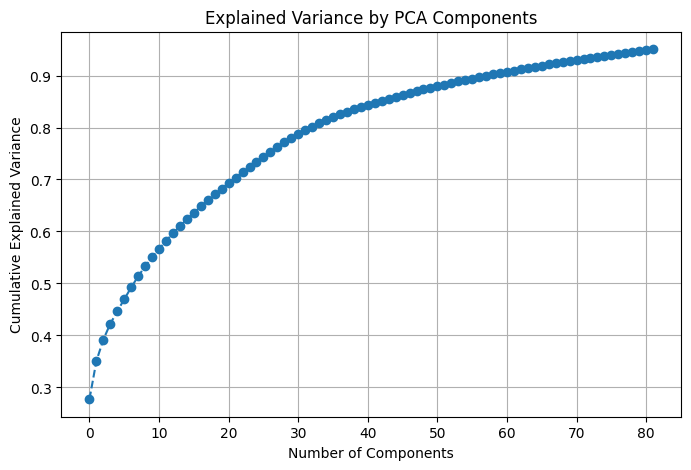

In [2268]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt

# Scale the data (if not already scaled)
scaler = RobustScaler(with_centering=False)
X_train_scaled = scaler.fit_transform(X_train_transformed_df)
X_test_scaled = scaler.transform(X_test_transformed_df)

# Apply PCA to retain 95% of the variance
pca = PCA(n_components=0.95, svd_solver='full')
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Check how many components were selected
print(f"Number of components selected to retain 95% variance: {pca.n_components_}")

# Optionally, plot the cumulative explained variance to visualize
explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(8, 5))
plt.plot(explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.show()

# Now you can use X_train_pca and X_test_pca for model training


In [1086]:
# from sklearn.decomposition import PCA
# import matplotlib.pyplot as plt
# import pandas as pd

# # Step 1: Standardize the data - You have already done this in your pipeline
# # Assuming X_train_transformed_df and X_test_transformed_df are already standardized

# # Step 2: Apply PCA
# # We will first determine the optimal number of components that explain most of the variance
# pca = PCA()
# pca.fit(X_train_transformed_df)

# # Calculate the cumulative explained variance ratio
# explained_variance_ratio_cumulative = pca.explained_variance_ratio_.cumsum()

# # Plot the explained variance
# plt.figure(figsize=(10, 6))
# plt.plot(range(1, len(explained_variance_ratio_cumulative) + 1), explained_variance_ratio_cumulative, marker='o')
# plt.xlabel('Number of Principal Components')
# plt.ylabel('Cumulative Explained Variance')
# plt.title('Explained Variance vs. Number of Principal Components')
# plt.grid(True)
# plt.show()

# # Step 3: Choose the number of components that explain a significant amount of variance (e.g., 95%)
# # Let's say we want to keep at least 95% of the variance
# n_components = next(x for x, val in enumerate(explained_variance_ratio_cumulative) if val >= 0.95) + 1

# print(f"Number of components to retain 95% variance: {n_components}")

# # Step 4: Apply PCA to the dataset with the chosen number of components
# pca = PCA(n_components=n_components)
# X_train_pca = pca.fit_transform(X_train_transformed_df)
# X_test_pca = pca.transform(X_test_transformed_df)

# # Convert the PCA result into a DataFrame (optional)
# pca_columns = [f'PC{i+1}' for i in range(n_components)]
# X_train_pca_df = pd.DataFrame(X_train_pca, columns=pca_columns, index=X_train_transformed_df.index)
# X_test_pca_df = pd.DataFrame(X_test_pca, columns=pca_columns, index=X_test_transformed_df.index)

# # Display some information for verification
# print("PCA-transformed Training Data Overview:")
# print(X_train_pca_df.head())

# print("\nPCA-transformed Testing Data Overview:")
# print(X_test_pca_df.head())

# # You can save the PCA-transformed data to CSV files if needed
# X_train_pca_df.to_csv('X_train_pca.csv', index=False)
# X_test_pca_df.to_csv('X_test_pca.csv', index=False)


In [1087]:
# # Save the transformed training and testing datasets to CSV files
# X_train_transformed_df.to_csv('X_train_transformed.csv', index=False)
# X_test_transformed_df.to_csv('X_test_transformed.csv', index=False)
# y_train.to_csv('y_train.csv', index=False)
# y_test.to_csv('y_test.csv', index=False)

# print("Data saved successfully to CSV files.")


In [1088]:
# # Display the cleaned and imputed datasets for verification
# print("Transformed Training Data Overview:")
# X_train_transformed_df.head()

# # print("\nTransformed Testing Data Overview:")
# # X_test_transformed_df.head()


In [2269]:
X_train_transformed_df.columns.tolist()

['JobSat_Strategy_Driving',
 'JobSat_OpenSource_Contribution',
 'JobSat_Data_Security',
 'JobSat_Code_Quality_Improvement',
 'JobSat_New_Tech_Learning',
 'JobSat_Architecture_Design',
 'JobSat_Tool_Expertise',
 'JobSat_Hardware_Working',
 'JobSat_Internal_Network_Staffing',
 'Bootstrapping Business',
 'Open Source Contribution',
 'Freelance/Contract Work',
 'Professional Development',
 'AI Tools',
 'Knowledge Bases',
 'API/SDK Documentation',
 'Cloud Platforms',
 'Data Processing',
 'Programming Frameworks',
 'Data Processing Tech',
 'Debugging and Getting Help - Currently Using',
 'Documenting Code - Currently Using',
 'Generating Content or Synthetic Data - Currently Using',
 'Learning About Codebase - Currently Using',
 'Search for Answers - Currently Using',
 'Committing and Reviewing Code - Interested',
 'Debugging and Getting Help - Interested',
 'Deployment and Monitoring - Interested',
 'Documenting Code - Interested',
 'Generating Content or Synthetic Data - Interested',
 'Lea

In [2270]:
# Check missing values in training data
missing_values_train = X_train_transformed_df.isnull().sum()
print("Missing Values in Training Data:")
print(missing_values_train[missing_values_train > 0])

# Check missing values in test data
missing_values_test = X_test_transformed_df.isnull().sum()
print("\nMissing Values in Testing Data:")
print(missing_values_test[missing_values_test > 0])


Missing Values in Training Data:
Series([], dtype: int64)

Missing Values in Testing Data:
Series([], dtype: int64)


In [2271]:
# Check if there are any missing values in the training and test sets
any_missing_train = X_train_transformed_df.isnull().values.any()
any_missing_test = X_test_transformed_df.isnull().values.any()

print(f"\nAre there any missing values in the training set? {any_missing_train}")
print(f"Are there any missing values in the test set? {any_missing_test}")



Are there any missing values in the training set? False
Are there any missing values in the test set? False


In [2273]:
# # List of columns to remove based on domain knowledge
# cols_to_remove = [
#     'SOAccount - Yes', 'SOAccount - No', 'Public Search Engine', 'Social Media',
#     'School/Academic Work', 'Books', 'Frequent', 'Very Frequent', 'Unknown OrgSize',
#     'Neutral Community Engagement', 'Negative Community Engagement', 'Positive Community Engagement',
#     'Youth', 'Young Adult', 'Middle Age', 'Friend/Family', 'Colleague', 'Hobby',
#     'EdLevel_Other', 'EdLevel_Primary/Secondary', 'AIThreat_Yes', 'AIThreat_No',
#     'Remote', 'Hybrid', 'In-person', 'SOPartFreq_I have never participated in Q&A on Stack Overflow',
#     'ProfessionalQuestion_Slack search', 'ProfessionalQuestion_Traditional public search engine'
# ]

# # Drop these columns from both training and test sets
# X_train_transformed_df = X_train_transformed_df.drop(columns=cols_to_remove, errors='ignore')
# X_test_transformed_df = X_test_transformed_df.drop(columns=cols_to_remove, errors='ignore')

# # Verify shapes to ensure columns are removed
# print("Updated shape of X_train_transformed_df:", X_train_transformed_df.shape)
# print("Updated shape of X_test_transformed_df:", X_test_transformed_df.shape)


In [2272]:
# Import pandas for dataframe operations and save the merged data to CSV
import pandas as pd

# Merge train and test dataframes
merged_df = pd.concat([X_train_transformed_df.assign(dataset="train"), 
                       X_test_transformed_df.assign(dataset="test")], axis=0)

# Save the merged dataframe to CSV
merged_df.to_csv("merged_cleaned_train_test.csv", index=False)



In [1092]:
# highly_correlated_pairs

Number of PCA components selected to retain 90% variance for numerical features: 82


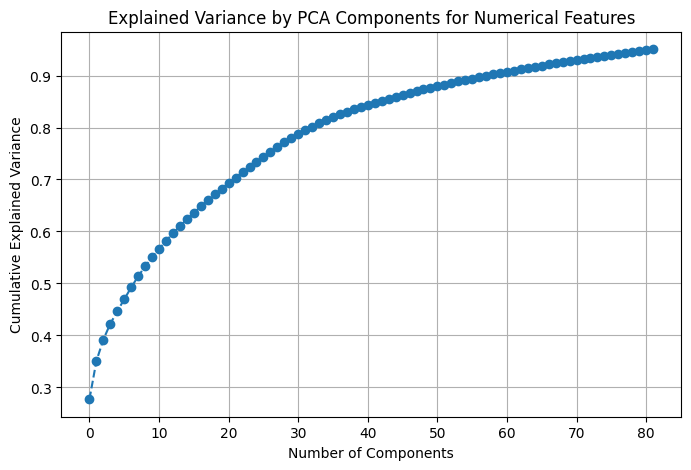

          pca_1     pca_2     pca_3     pca_4     pca_5     pca_6     pca_7  \
9625  -2.496905  0.090393  2.560871  3.302813  1.407972 -1.405642 -1.463089   
42825 -1.660030 -0.529569  2.126525  0.098292 -0.557182 -0.272944  0.798902   
8220  -2.219018 -0.001485  1.316171  0.844233  0.508981 -0.820924  0.607644   
27183 -2.295859  0.311531 -2.593694 -1.426533  1.229332 -0.516149  1.420221   
22011 -2.842604  0.573904 -1.332591  0.335493 -0.374970 -0.659603 -0.666981   

          pca_8     pca_9    pca_10  ...    pca_73    pca_74    pca_75  \
9625   1.248652 -0.400916  1.439835  ... -0.112932  0.662553  0.148520   
42825 -0.855741  0.404019  3.654769  ... -0.536149  0.229626  0.070543   
8220  -0.733929  1.090968  0.947087  ...  0.207588  1.116712  0.744388   
27183 -0.765283  0.237721  0.083054  ... -0.423558 -0.666139  0.785416   
22011  0.529998 -0.025745  0.674419  ... -0.225820  0.137678  0.377094   

         pca_76    pca_77    pca_78    pca_79    pca_80    pca_81    pca_82  
96

In [2276]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt

# Assume `X_train_transformed_df` and `X_test_transformed_df` contain both numerical and one-hot encoded categorical features

# Step 1: Separate numerical and categorical features
numerical_features = X_train_transformed_df.select_dtypes(include=[np.number]).columns
categorical_features = [col for col in X_train_transformed_df.columns if col not in numerical_features]

# Step 2: Scale only the numerical features
scaler = RobustScaler(with_centering=False)
X_train_numerical_scaled = scaler.fit_transform(X_train_transformed_df[numerical_features])
X_test_numerical_scaled = scaler.transform(X_test_transformed_df[numerical_features])

# Step 3: Apply PCA only to the numerical features to retain 90% of the variance
pca = PCA(n_components=0.95, svd_solver='full')
X_train_numerical_pca = pca.fit_transform(X_train_numerical_scaled)
X_test_numerical_pca = pca.transform(X_test_numerical_scaled)

# Check the number of components retained
print(f"Number of PCA components selected to retain 90% variance for numerical features: {pca.n_components_}")

# Optional: Visualize cumulative explained variance for numerical features
explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(8, 5))
plt.plot(explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components for Numerical Features')
plt.grid(True)
plt.show()

# Step 4: Combine PCA-transformed numerical features with original categorical features
X_train_pca_combined = np.hstack([X_train_numerical_pca, X_train_transformed_df[categorical_features].values])
X_test_pca_combined = np.hstack([X_test_numerical_pca, X_test_transformed_df[categorical_features].values])

# Step 5: Convert combined arrays back to DataFrames for compatibility with model training
# Create column names for the PCA-transformed features
pca_feature_names = [f'pca_{i+1}' for i in range(X_train_numerical_pca.shape[1])]
combined_feature_names = pca_feature_names + categorical_features

X_train_pca_combined_df = pd.DataFrame(X_train_pca_combined, columns=combined_feature_names, index=X_train_transformed_df.index)
X_test_pca_combined_df = pd.DataFrame(X_test_pca_combined, columns=combined_feature_names, index=X_test_transformed_df.index)

# Display the transformed training dataset
print(X_train_pca_combined_df.head())


Number of PCA components selected to retain 90% variance for numerical features: 82
Baseline Test Accuracy (Logistic Regression): 0.2819
Classification Report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        60
         1.0       0.00      0.00      0.00        55
         2.0       0.24      0.03      0.05       161
         3.0       0.04      0.00      0.01       221
         4.0       0.10      0.00      0.01       227
         5.0       0.00      0.00      0.00       380
         6.0       0.16      0.04      0.07       742
         7.0       0.24      0.38      0.29      1281
         8.0       0.32      0.66      0.43      1564
         9.0       0.23      0.02      0.04       700
        10.0       0.35      0.16      0.22       445

    accuracy                           0.28      5836
   macro avg       0.15      0.12      0.10      5836
weighted avg       0.22      0.28      0.21      5836



d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



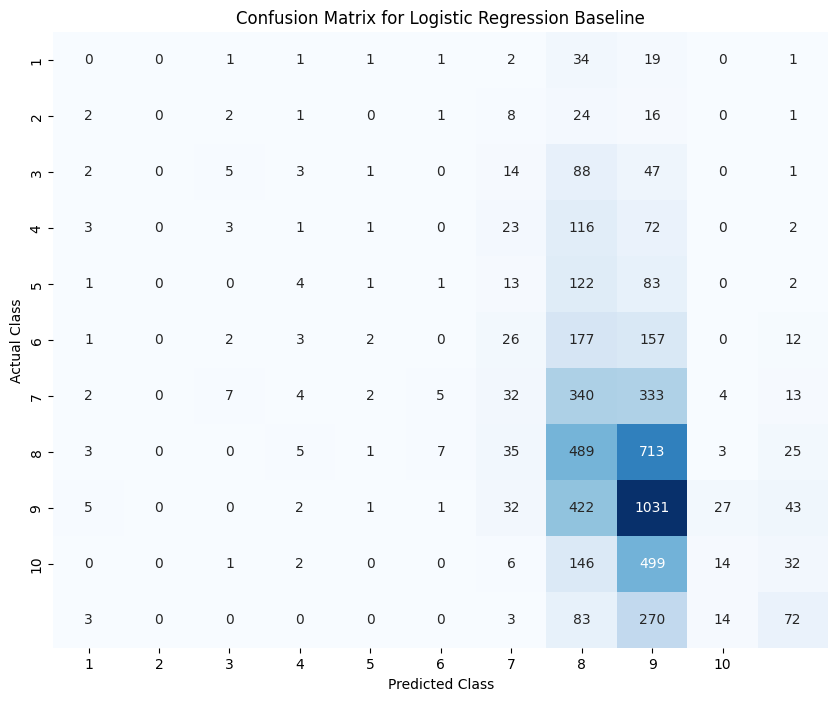

In [2277]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Separate continuous and categorical features
continuous_features = [col for col in X_train_transformed_df.columns if X_train_transformed_df[col].dtype in [np.float64, np.int64]]
categorical_features = [col for col in X_train_transformed_df.columns if col not in continuous_features]

# Standardize continuous features and apply PCA
scaler = RobustScaler(with_centering=False)
X_train_cont_scaled = scaler.fit_transform(X_train_transformed_df[continuous_features])
X_test_cont_scaled = scaler.transform(X_test_transformed_df[continuous_features])

# Apply PCA to retain 90% of the variance
pca = PCA(n_components=0.95, svd_solver='full')
X_train_pca = pca.fit_transform(X_train_cont_scaled)
X_test_pca = pca.transform(X_test_cont_scaled)

# Print the number of PCA components
print(f"Number of PCA components selected to retain 90% variance for numerical features: {pca.n_components_}")

# One-hot encode categorical features
encoder = OneHotEncoder(drop='first', sparse_output=False)
X_train_cat_encoded = encoder.fit_transform(X_train_transformed_df[categorical_features])
X_test_cat_encoded = encoder.transform(X_test_transformed_df[categorical_features])

# Concatenate PCA-transformed continuous features and one-hot encoded categorical features
X_train_combined = np.hstack((X_train_pca, X_train_cat_encoded))
X_test_combined = np.hstack((X_test_pca, X_test_cat_encoded))

# Set up and train the logistic regression model on the combined dataset
baseline_model = LogisticRegression(max_iter=200, multi_class='multinomial', solver='lbfgs', random_state=42)
baseline_model.fit(X_train_combined, y_train)

# Predict on the test set
y_test_pred = baseline_model.predict(X_test_combined)

# Calculate baseline accuracy
baseline_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Baseline Test Accuracy (Logistic Regression): {baseline_accuracy:.4f}")

# Classification report to see precision, recall, and f1-score per class
print("Classification Report:\n", classification_report(y_test, y_test_pred))

# Confusion matrix to visualize performance
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=range(1, 11), yticklabels=range(1, 11))
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Confusion Matrix for Logistic Regression Baseline')
plt.show()


Test Accuracy (Random Forest): 0.2620
Classification Report (Random Forest):
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        60
         1.0       0.00      0.00      0.00        55
         2.0       0.00      0.00      0.00       161
         3.0       0.00      0.00      0.00       221
         4.0       0.00      0.00      0.00       227
         5.0       0.00      0.00      0.00       380
         6.0       0.21      0.03      0.05       742
         7.0       0.23      0.38      0.29      1281
         8.0       0.28      0.64      0.39      1564
         9.0       0.15      0.01      0.02       700
        10.0       0.27      0.01      0.03       445

    accuracy                           0.26      5836
   macro avg       0.10      0.10      0.07      5836
weighted avg       0.19      0.26      0.18      5836



d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



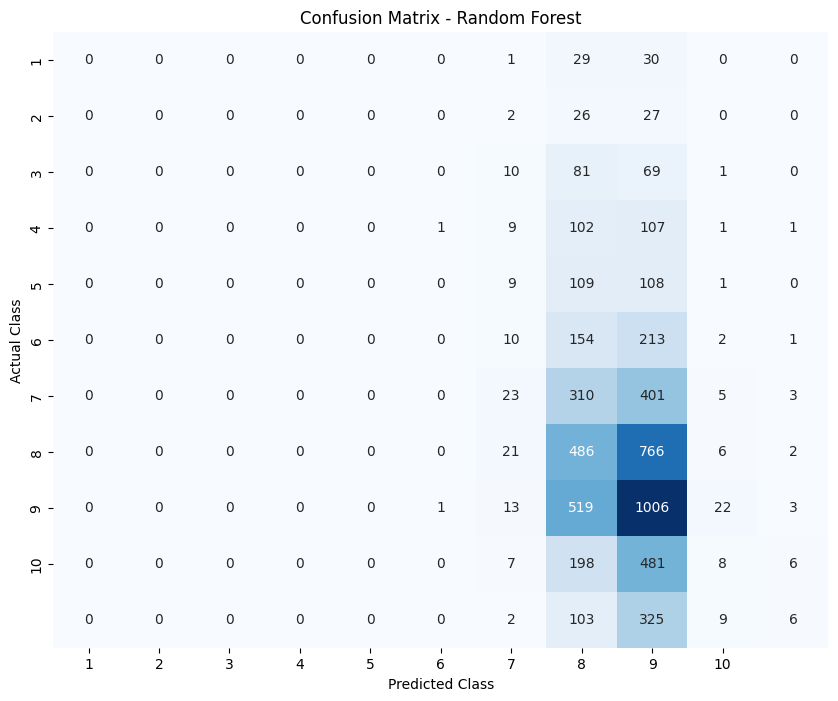

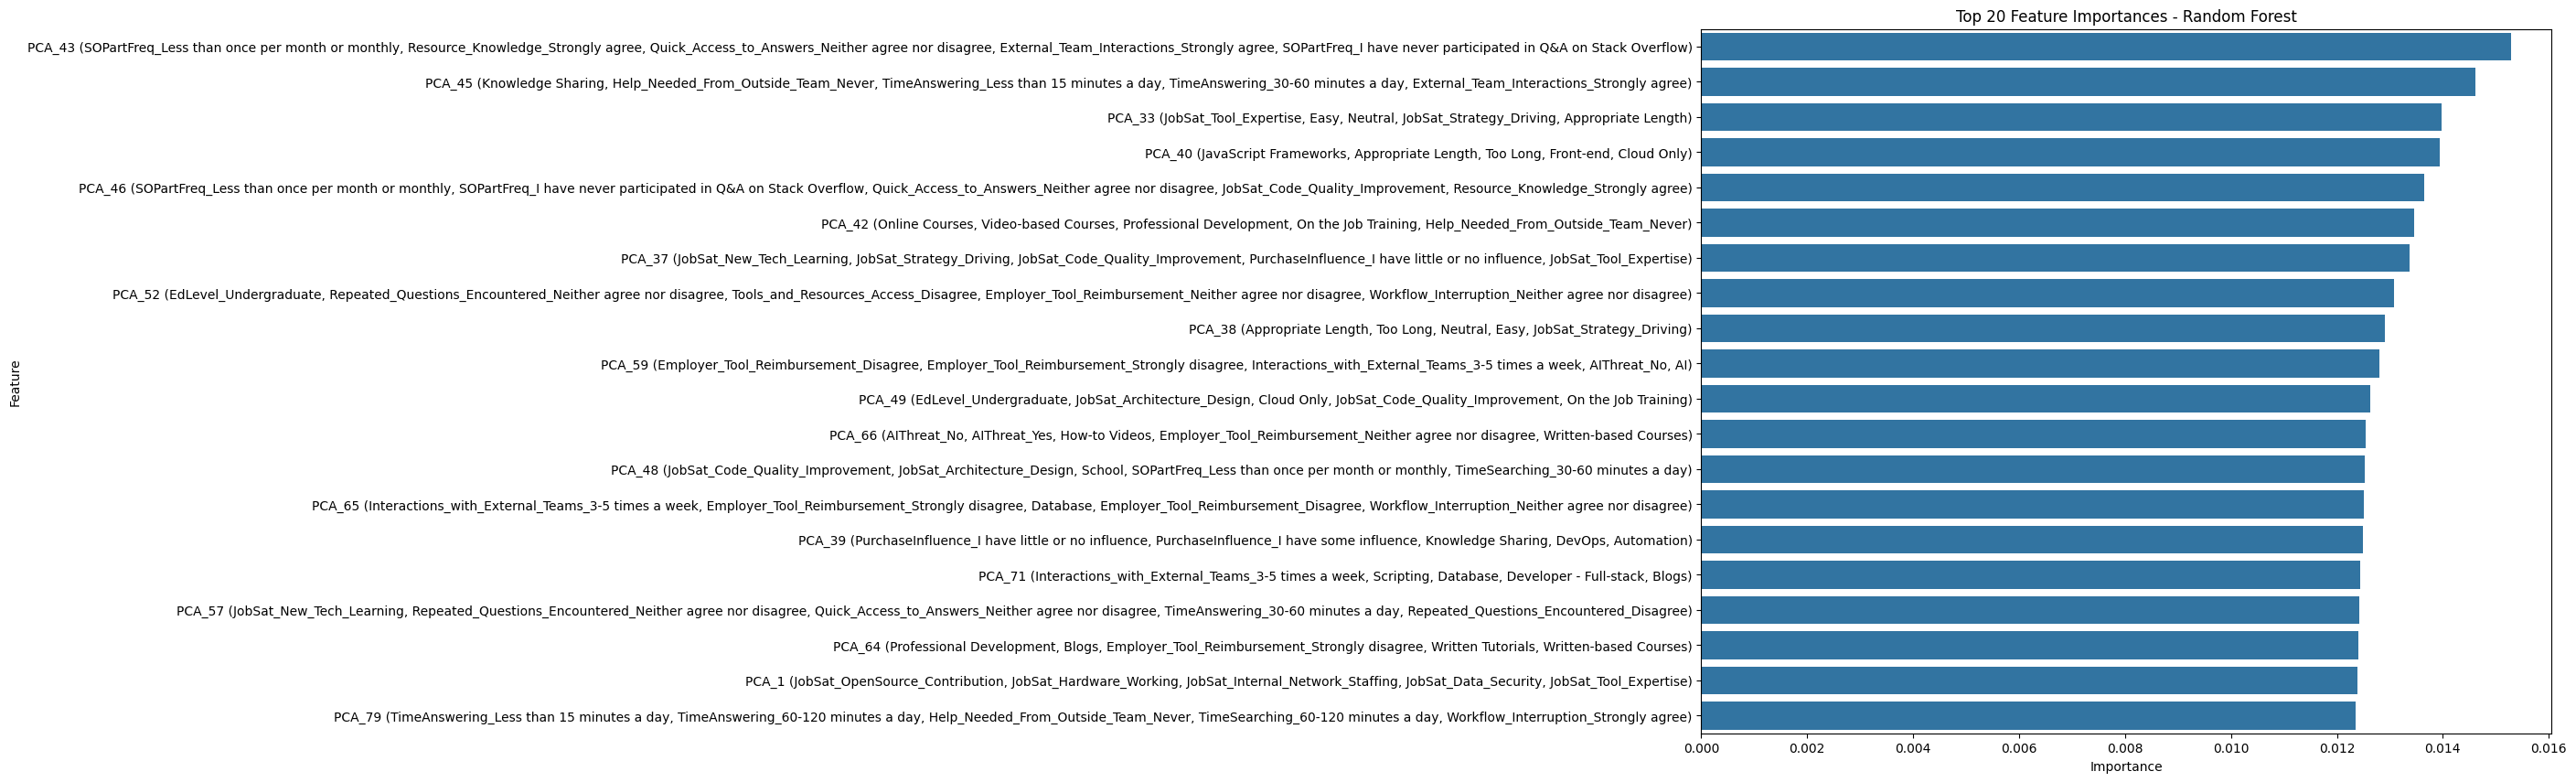

Feature  Importance
0   PCA_43 (SOPartFreq_Less than once per month or...    0.015290
1   PCA_45 (Knowledge Sharing, Help_Needed_From_Ou...    0.014612
2   PCA_33 (JobSat_Tool_Expertise, Easy, Neutral, ...    0.013973
3   PCA_40 (JavaScript Frameworks, Appropriate Len...    0.013945
4   PCA_46 (SOPartFreq_Less than once per month or...    0.013641
5   PCA_42 (Online Courses, Video-based Courses, P...    0.013453
6   PCA_37 (JobSat_New_Tech_Learning, JobSat_Strat...    0.013365
7   PCA_52 (EdLevel_Undergraduate, Repeated_Questi...    0.013079
8   PCA_38 (Appropriate Length, Too Long, Neutral,...    0.012909
9   PCA_59 (Employer_Tool_Reimbursement_Disagree, ...    0.012796
10  PCA_49 (EdLevel_Undergraduate, JobSat_Architec...    0.012629
11  PCA_66 (AIThreat_No, AIThreat_Yes, How-to Vide...    0.012540
12  PCA_48 (JobSat_Code_Quality_Improvement, JobSa...    0.012519
13  PCA_65 (Interactions_with_External_Teams_3-5 t...    0.012515
14  PCA_39 (PurchaseInfluence_I have little or no ...    0.012493
15  PCA_71 (Interactions_with_External_Teams_3-5 t...    0.012447
16  PCA_57 (JobSat_New_Tech_Learning, Repeated_Que...    0.012425
17  PCA_64 (Professional Development, Blogs, Emplo...    0.012398
18  PCA_1 (JobSat_OpenSource_Contribution, JobSat_...    0.012382
19  PCA_79 (TimeAnswering_Less than 15 minutes a d...    0.012350

In [2279]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train_combined, y_train)

# Predict on the test set
y_test_pred_rf = rf_model.predict(X_test_combined)

# Calculate accuracy
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
print(f"Test Accuracy (Random Forest): {test_accuracy_rf:.4f}")

# Classification report for precision, recall, and f1-score
print("Classification Report (Random Forest):\n", classification_report(y_test, y_test_pred_rf))

# Confusion matrix to visualize classification performance
conf_matrix_rf = confusion_matrix(y_test, y_test_pred_rf)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=range(1, 11), yticklabels=range(1, 11))
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Confusion Matrix - Random Forest')
plt.show()

# Feature importance calculation
feature_importance = rf_model.feature_importances_

# Extract top contributing original features for each PCA component
pca_feature_names = []
num_top_features = 5  # Choose the top 3 contributing features for clarity

for i, component in enumerate(pca.components_):
    # Sort features by absolute loading values for each component
    top_features_idx = np.argsort(np.abs(component))[-num_top_features:][::-1]
    top_features = [continuous_features[idx] for idx in top_features_idx]
    pca_feature_names.append(f'PCA_{i+1} ({", ".join(top_features)})')

# Combine PCA component names with top contributing original features and categorical features
cat_feature_names = encoder.get_feature_names_out(categorical_features)
all_feature_names = np.hstack((pca_feature_names, cat_feature_names))

# Create a DataFrame for feature importance
importance_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Plot feature importance with meaningful feature labels
plt.figure(figsize=(12, 10))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(20))  # Display top 20 features
plt.title('Top 20 Feature Importances - Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Display the full DataFrame of feature importances if needed
importance_df.reset_index(drop=True, inplace=True)  # Reset index for readability
importance_df.head(20)  # Display the top 20 most important features


In [1093]:

# import pandas as pd
# import numpy as np

# # Step 1: Calculate the correlation matrix of features
# correlation_matrix = X_train_transformed_df.corr().abs()
# correlation_matrix
# # Step 2: Identify the upper triangle of the correlation matrix
# upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# # Step 3: Find features with high correlation among features
# high_correlation_threshold = 0.8
# features_to_drop_high_corr = [column for column in upper_triangle.columns if any(upper_triangle[column] > high_correlation_threshold)]

# # Since 'Age' and 'WorkExp' have high correlation, decide which one to remove (example logic)
# if 'Age' in features_to_drop_high_corr and 'WorkExp' not in features_to_drop_high_corr:
#     features_to_drop_high_corr.remove('Age')
# elif 'WorkExp' in features_to_drop_high_corr and 'Age' not in features_to_drop_high_corr:
#     features_to_drop_high_corr.remove('WorkExp')

# # Step 4: Find features with low correlation with the target
# target_corr_threshold = 0.1
# # Calculate correlation between each feature and the target variable (`y_train`)
# target_corr = X_train_transformed_df.join(y_train.rename('JobSat')).corr()['JobSat'].abs()

# # Get features with correlation below the threshold with target
# low_corr_features = target_corr[target_corr < target_corr_threshold].index.tolist()

# # Remove 'JobSat' from low_corr_features if it's included
# if 'JobSat' in low_corr_features:
#     low_corr_features.remove('JobSat')

# # Step 5: Combine features to drop (either highly correlated with other features or with low correlation with target)
# features_to_drop = list(set(features_to_drop_high_corr + low_corr_features))

# # Step 6: Drop selected features from train and test sets
# X_train_transformed_df = X_train_transformed_df.drop(columns=features_to_drop)
# X_test_transformed_df = X_test_transformed_df.drop(columns=features_to_drop)

# print(f"Features removed due to high or low correlation: {features_to_drop}")


JobSat_Strategy_Driving  JobSat_OpenSource_Contribution  \
9625                 -0.722393                       -0.410056   
42825                 0.048134                       -0.410056   
8220                 -0.722393                       -0.410056   
27183                -0.722393                       -0.410056   
22011                -0.722393                       -0.410056   

       JobSat_Data_Security  JobSat_Code_Quality_Improvement  \
9625              -0.464583                        -0.908508   
42825             -0.464583                        -0.723666   
8220              -0.464583                        -0.908508   
27183             -0.099536                        -0.538824   
22011             -0.464583                        -0.908508   

       JobSat_New_Tech_Learning  JobSat_Architecture_Design  \
9625                  -0.857754                   -0.786970   
42825                  0.434535                   -0.404761   
8220                   2.834500                   -0.786970   
27183                 -0.488529                   -0.404761   
22011                 -0.857754                   -0.786970   

       JobSat_Tool_Expertise  JobSat_Hardware_Working  \
9625               -0.659753                 -0.48119   
42825              -0.057756                 -0.48119   
8220               -0.659753                 -0.48119   
27183              -0.258422                 -0.48119   
22011              -0.659753                 -0.48119   

       JobSat_Internal_Network_Staffing  Bootstrapping Business  ...  \
9625                          -0.461248               -0.419178  ...   
42825                          0.222408               -0.419178  ...   
8220                          -0.461248               -0.419178  ...   
27183                         -0.461248               -0.419178  ...   
22011                         -0.461248               -0.419178  ...   

       Interactions_with_External_Teams_6-10 times a week  \
9625                                                 0.0    
42825                                                1.0    
8220                                                 0.0    
27183                                                0.0    
22011                                                0.0    

       Interactions_with_External_Teams_Never  \
9625                                      0.0   
42825                                     0.0   
8220                                      0.0   
27183                                     0.0   
22011                                     0.0   

       TimeSearching_30-60 minutes a day  TimeSearching_60-120 minutes a day  \
9625                                 0.0                                 1.0   
42825                                0.0                                 0.0   
8220                                 0.0                                 0.0   
27183                                0.0                                 0.0   
22011                                0.0                                 0.0   

       TimeSearching_Less than 15 minutes a day  \
9625                                        0.0   
42825                                       0.0   
8220                                        0.0   
27183                                       0.0   
22011                                       0.0   

       TimeSearching_Over 120 minutes a day  \
9625                                    0.0   
42825                                   0.0   
8220                                    1.0   
27183                                   0.0   
22011                                   0.0   

       TimeAnswering_30-60 minutes a day  TimeAnswering_60-120 minutes a day  \
9625                                 0.0                                 0.0   
42825                                0.0                                 0.0   
8220                                 1.0                                 0.0   
27183            

In [2282]:
X_train_pca_combined

array([[-2.49690503e+00,  9.03931730e-02,  2.56087064e+00, ...,
        -8.63759388e-01,  7.12855357e-02, -6.11705608e-01],
       [-1.66003026e+00, -5.29569041e-01,  2.12652531e+00, ...,
        -2.33455349e-01,  1.35063077e-01,  5.29399623e-01],
       [-2.21901826e+00, -1.48455112e-03,  1.31617136e+00, ...,
        -2.94601880e-01, -4.54874551e-01,  1.30769482e-01],
       ...,
       [-2.86765850e+00,  5.41817634e-01,  1.87658479e+00, ...,
        -3.33898904e-01,  5.66385495e-01,  7.86465715e-01],
       [-6.71411281e-01,  1.32701856e+00, -1.51918993e+00, ...,
         4.13445597e-01,  8.75238009e-01,  4.50722467e-01],
       [-8.26557755e-01, -1.28848023e+00, -1.84333304e+00, ...,
         6.56036623e-02,  4.94425030e-01,  3.00205862e-01]])

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.1440 - loss: 4.7836 - val_accuracy: 0.2528 - val_loss: 3.3264 - learning_rate: 0.0010
Epoch 2/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.2403 - loss: 3.2448 - val_accuracy: 0.2528 - val_loss: 2.6852 - learning_rate: 0.0010
Epoch 3/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.2541 - loss: 2.6199 - val_accuracy: 0.2610 - val_loss: 2.3300 - learning_rate: 0.0010
Epoch 4/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.2684 - loss: 2.2758 - val_accuracy: 0.2666 - val_loss: 2.1611 - learning_rate: 0.0010
Epoch 5/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.2705 - loss: 2.1205 - val_accuracy: 0.2644 - val_loss: 2.0740 - learning_rate: 0.0010
Epoch 6/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.2731 - loss: 2.0480 - val_accuracy: 0.2713 - val_loss: 2.0418 - learning_rate: 0.0010
Epoch 7/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.2758 - loss: 2.

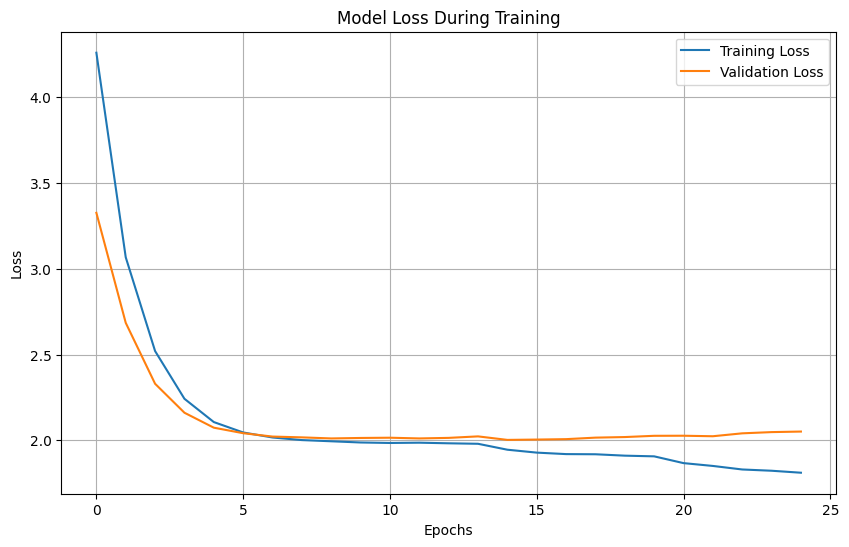

183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Test Accuracy: 0.2724


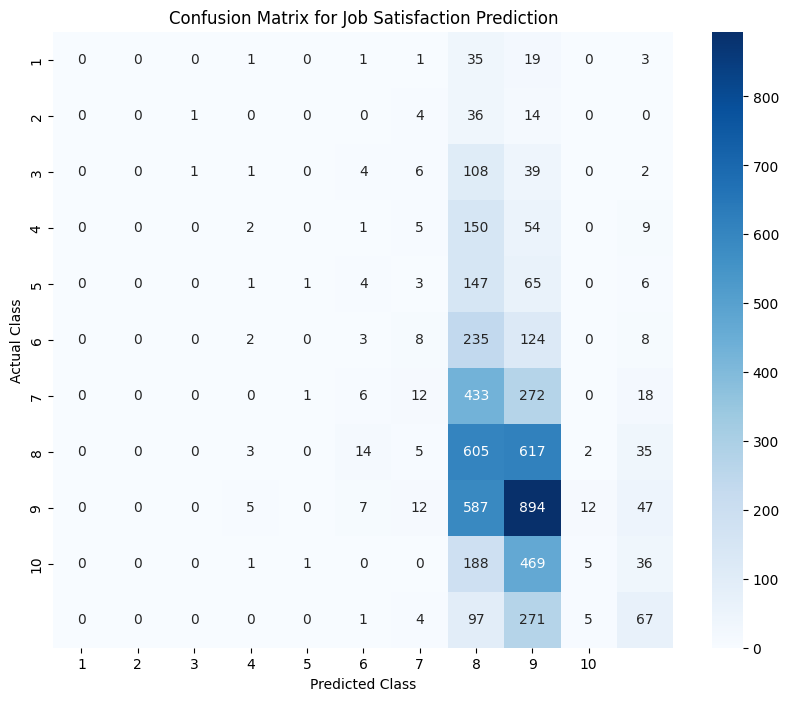

In [2283]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import RobustScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical

# Convert target variable `y_train` and `y_test` to categorical (one-hot encoding)
y_train_cat = to_categorical(y_train - 1, num_classes=10)  # Adjust for 1-10 classes to 0-indexed classes
y_test_cat = to_categorical(y_test - 1, num_classes=10)

# Scale the input features (64 PCA components + categorical features)
scaler = RobustScaler(with_centering=False)
X_train_scaled = scaler.fit_transform(X_train_pca_combined)  # Use the reduced feature set
X_test_scaled = scaler.transform(X_test_pca_combined)        # Apply same scaling to test set

# Define the neural network model architecture
def create_reduced_feature_model(input_dim, learning_rate=0.001, neurons=128, dropout_rate=0.3, l2_lambda=0.01):
    model = Sequential()
    model.add(Dense(neurons, input_dim=input_dim, activation='relu', kernel_regularizer='l2'))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))
    
    model.add(Dense(neurons, activation='relu', kernel_regularizer='l2'))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))
    
    # Output layer for multiclass classification with softmax activation
    model.add(Dense(10, activation='softmax'))  # 10 classes for JobSat levels 1 to 10
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Initialize the model with reduced input dimension
input_dim = X_train_scaled.shape[1]  # Using only 64 PCA components + categorical features
model = create_reduced_feature_model(input_dim=input_dim)

# Callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5)

# Train the model
history = model.fit(
    X_train_scaled, y_train_cat,
    validation_split=0.2,
    epochs=50,  # Start with 50 epochs; adjust as necessary
    batch_size=64,
    callbacks=[early_stopping, lr_scheduler],
    verbose=1
)

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Evaluate the model on the test set
y_test_pred_prob = model.predict(X_test_scaled)
y_test_pred = np.argmax(y_test_pred_prob, axis=1) + 1  # Convert back to 1-10 classes

# Calculate and print test accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Generate and visualize the confusion matrix using seaborn
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True, xticklabels=range(1, 11), yticklabels=range(1, 11))
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Confusion Matrix for Job Satisfaction Prediction')
plt.show()


In [2286]:
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.metrics import accuracy_score, confusion_matrix
# from sklearn.preprocessing import RobustScaler
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
# from tensorflow.keras.utils import to_categorical
# import keras_tuner as kt

# # Convert target variable `y_train` and `y_test` to categorical (one-hot encoding)
# y_train_cat = to_categorical(y_train - 1, num_classes=10)  # Adjust for 1-10 classes to 0-indexed classes
# y_test_cat = to_categorical(y_test - 1, num_classes=10)

# # Scale the input features (64 PCA components + categorical features)
# scaler = RobustScaler(with_centering=False)
# X_train_scaled = scaler.fit_transform(X_train_pca_combined)  # Use the reduced feature set
# X_test_scaled = scaler.transform(X_test_pca_combined)        # Apply same scaling to test set

# # Define the model-building function for Keras Tuner
# def build_model(hp):
#     model = Sequential()
#     neurons = hp.Int('neurons', min_value=64, max_value=256, step=64)
#     dropout_rate = hp.Float('dropout_rate', min_value=0.1, max_value=0.5, step=0.1)
#     learning_rate = hp.Choice('learning_rate', values=[1e-3, 1e-4, 1e-5])

#     model.add(Dense(neurons, input_dim=X_train_scaled.shape[1], activation='relu', kernel_regularizer='l2'))
#     model.add(BatchNormalization())
#     model.add(Dropout(dropout_rate))

#     model.add(Dense(neurons, activation='relu', kernel_regularizer='l2'))
#     model.add(BatchNormalization())
#     model.add(Dropout(dropout_rate))

#     model.add(Dense(10, activation='softmax'))  # Output layer for 10 classes
#     model.compile(optimizer=Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])
    
#     return model

# # Initialize Keras Tuner
# tuner = kt.RandomSearch(
#     build_model,
#     objective='val_accuracy',
#     max_trials=5,  # Number of different models to try
#     executions_per_trial=2,  # Number of models built per trial for accuracy
#     directory='my_dir',
#     project_name='job_satisfaction_tuning'
# )

# # Callbacks for early stopping and learning rate reduction
# early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
# lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5)

# # Perform hyperparameter tuning
# tuner.search(
#     X_train_scaled, y_train_cat,
#     validation_split=0.2,
#     epochs=50,
#     batch_size=64,
#     callbacks=[early_stopping, lr_scheduler],
#     verbose=1
# )

# # Retrieve the best model
# best_model = tuner.get_best_models(num_models=1)[0]

# # Train the best model on the full training data
# history = best_model.fit(
#     X_train_scaled, y_train_cat,
#     validation_split=0.2,
#     epochs=50,
#     batch_size=64,
#     callbacks=[early_stopping, lr_scheduler],
#     verbose=1
# )

# # Plot training and validation loss
# plt.figure(figsize=(10, 6))
# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.title('Model Loss During Training')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.grid(True)
# plt.show()

# # Evaluate the model on the test set
# y_test_pred_prob = best_model.predict(X_test_scaled)
# y_test_pred = np.argmax(y_test_pred_prob, axis=1) + 1  # Convert back to 1-10 classes

# # Calculate and print test accuracy
# test_accuracy = accuracy_score(y_test, y_test_pred)
# print(f"Test Accuracy: {test_accuracy:.4f}")

# # Generate and visualize the confusion matrix using seaborn
# conf_matrix = confusion_matrix(y_test, y_test_pred)
# plt.figure(figsize=(10, 8))
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True, xticklabels=range(1, 11), yticklabels=range(1, 11))
# plt.xlabel('Predicted Class')
# plt.ylabel('Actual Class')
# plt.title('Confusion Matrix for Job Satisfaction Prediction')
# plt.show()


Trial 10 Complete [00h 01m 12s]
val_accuracy: 0.27303972840309143

Best val_accuracy So Far: 0.27303972840309143
Total elapsed time: 00h 29m 03s
Epoch 1/50


d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning:

Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 



291/291 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.2758 - loss: 1.9480 - val_accuracy: 0.2651 - val_loss: 1.9809 - learning_rate: 0.0010
Epoch 2/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.2870 - loss: 1.9265 - val_accuracy: 0.2741 - val_loss: 1.9799 - learning_rate: 0.0010
Epoch 3/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.2795 - loss: 1.9383 - val_accuracy: 0.2806 - val_loss: 1.9774 - learning_rate: 0.0010
Epoch 4/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.2895 - loss: 1.9261 - val_accuracy: 0.2666 - val_loss: 1.9783 - learning_rate: 0.0010
Epoch 5/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.2853 - loss: 1.9200 - val_accuracy: 0.2718 - val_loss: 1.9847 - learning_rate: 0.0010
Epoch 6/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.2926 - loss: 1.9138 - val_accuracy: 0.2670 - val_loss: 1.9837 - learning_rate: 0.0010
Epoch 7/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.2886 - loss: 1.9209 - val_accurac

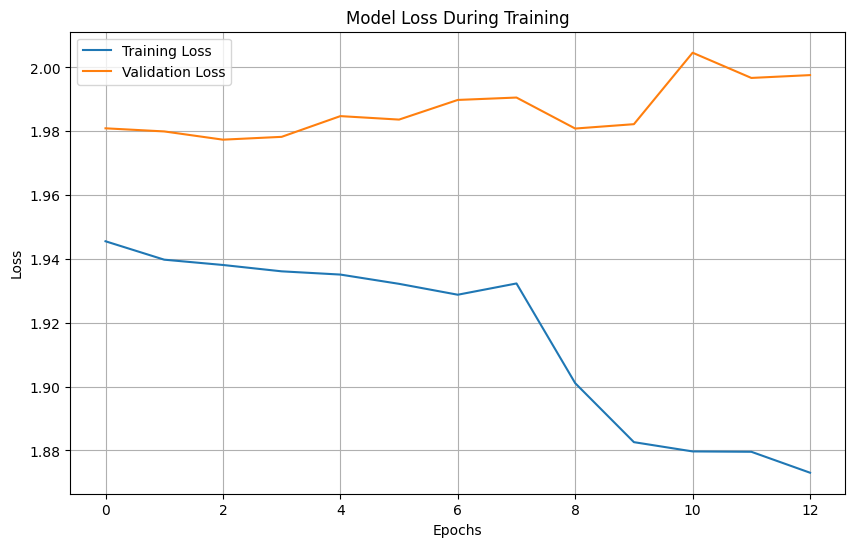

183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Test Accuracy: 0.2826


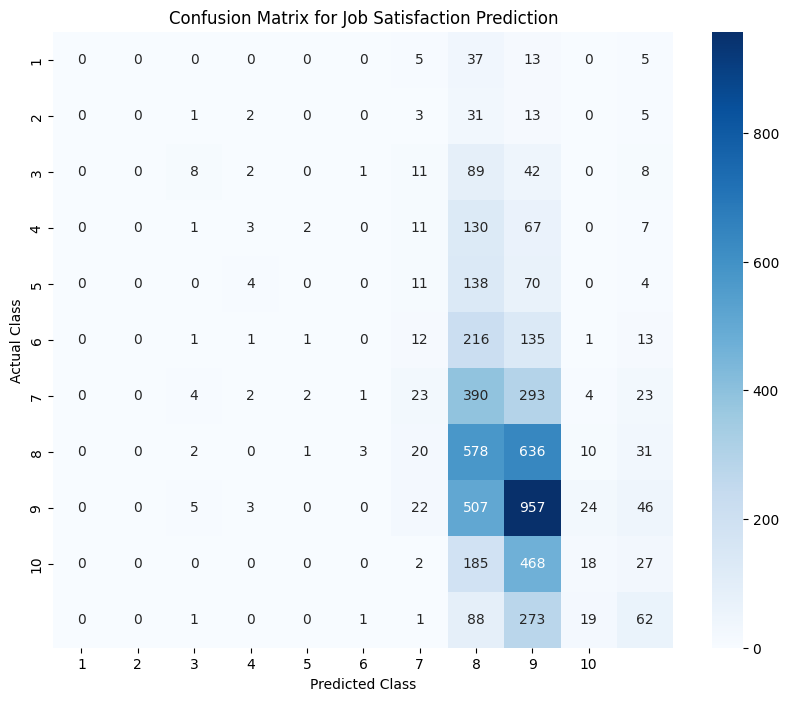

In [2285]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import RobustScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical
import keras_tuner as kt
import os
import shutil

# # Clear the tuning directory to avoid loading mismatched models
# tuning_dir = 'my_dir/job_satisfaction_tuning'
# if os.path.exists(tuning_dir):
#     shutil.rmtree(tuning_dir)

# Convert target variable `y_train` and `y_test` to categorical (one-hot encoding)
y_train_cat = to_categorical(y_train - 1, num_classes=10)  # Adjust for 1-10 classes to 0-indexed classes
y_test_cat = to_categorical(y_test - 1, num_classes=10)

# Scale the input features (64 PCA components + categorical features)
scaler = RobustScaler(with_centering=False)
X_train_scaled = scaler.fit_transform(X_train_pca_combined)  # Use the reduced feature set
X_test_scaled = scaler.transform(X_test_pca_combined)        # Apply same scaling to test set

# Define the model-building function for Keras Tuner
def build_model(hp):
    model = Sequential()
    neurons = hp.Int('neurons', min_value=64, max_value=256, step=64)
    dropout_rate = hp.Float('dropout_rate', min_value=0.1, max_value=0.5, step=0.1)
    learning_rate = hp.Choice('learning_rate', values=[1e-3, 1e-4, 1e-5])

    model.add(Dense(neurons, input_dim=X_train_scaled.shape[1], activation='relu', kernel_regularizer='l2'))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))

    model.add(Dense(neurons, activation='relu', kernel_regularizer='l2'))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))

    model.add(Dense(10, activation='softmax'))  # Output layer for 10 classes
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

# Initialize Keras Tuner with more trials and fewer executions per trial
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,  # Increased number of trials
    executions_per_trial=1,  # Single execution per trial
    directory='my_dir',
    project_name='job_satisfaction_tuning'
)

# Callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5)

# Perform hyperparameter tuning
tuner.search(
    X_train_scaled, y_train_cat,
    validation_split=0.2,
    epochs=50,
    batch_size=64,
    callbacks=[early_stopping, lr_scheduler],
    verbose=1
)

# Retrieve the best model
best_model = tuner.get_best_models(num_models=1)[0]

# Train the best model on the full training data
history = best_model.fit(
    X_train_scaled, y_train_cat,
    validation_split=0.2,
    epochs=50,
    batch_size=64,
    callbacks=[early_stopping, lr_scheduler],
    verbose=1
)

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Evaluate the model on the test set
y_test_pred_prob = best_model.predict(X_test_scaled)
y_test_pred = np.argmax(y_test_pred_prob, axis=1) + 1  # Convert back to 1-10 classes

# Calculate and print test accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Generate and visualize the confusion matrix using seaborn
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True, xticklabels=range(1, 11), yticklabels=range(1, 11))
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Confusion Matrix for Job Satisfaction Prediction')
plt.show()


Epoch 1/50


d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



291/291 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.1508 - loss: 4.1381 - val_accuracy: 0.2513 - val_loss: 2.9283 - learning_rate: 0.0010
Epoch 2/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.2325 - loss: 2.9252 - val_accuracy: 0.2632 - val_loss: 2.4676 - learning_rate: 0.0010
Epoch 3/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.2485 - loss: 2.4540 - val_accuracy: 0.2649 - val_loss: 2.2226 - learning_rate: 0.0010
Epoch 4/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.2653 - loss: 2.2112 - val_accuracy: 0.2649 - val_loss: 2.0958 - learning_rate: 0.0010
Epoch 5/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.2662 - loss: 2.0937 - val_accuracy: 0.2702 - val_loss: 2.0390 - learning_rate: 0.0010
Epoch 6/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.2590 - loss: 2.0380 - val_accuracy: 0.2730 - val_loss: 2.0049 - learning_rate: 0.0010
Epoch 7/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.2669 - loss: 2.0071 - val_

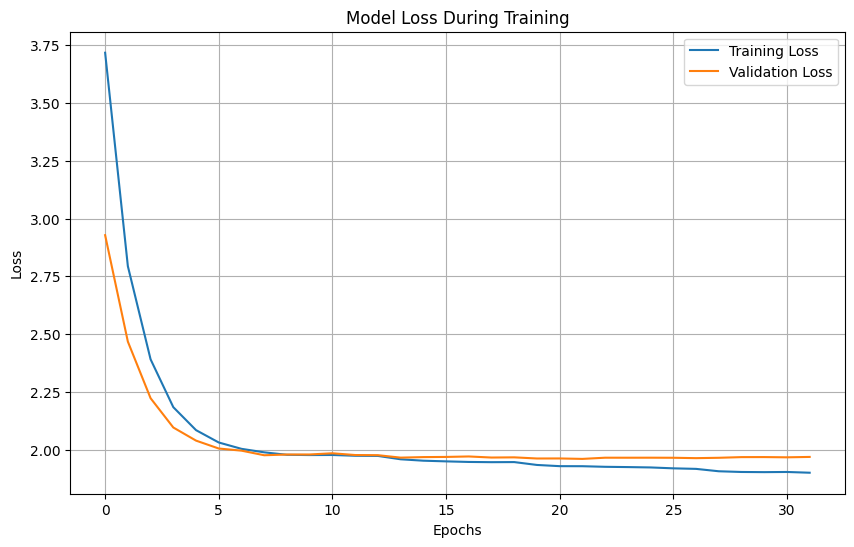

183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Test Accuracy: 0.2781


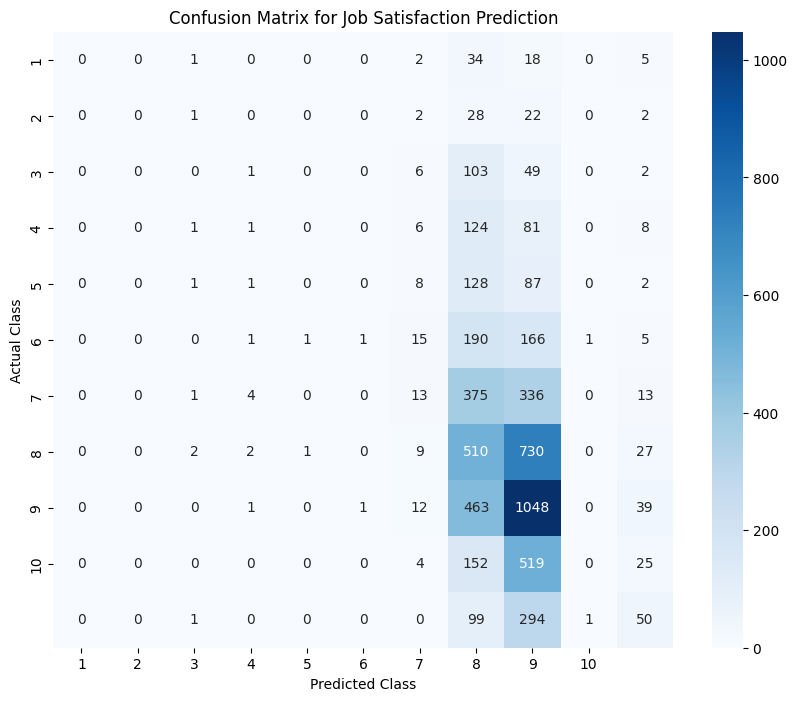

In [2287]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import RobustScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical

# Assuming `importance_df` contains feature importance with 'Feature' as feature names
# Filter the top features (e.g., top 20) based on importance
top_features = importance_df.head(20)['Feature'].values  # Adjust as per the number of features to keep

# Filter training and test sets to contain only top features
X_train_top = X_train_combined[:, [np.where(all_feature_names == feature)[0][0] for feature in top_features]]
X_test_top = X_test_combined[:, [np.where(all_feature_names == feature)[0][0] for feature in top_features]]

# Convert target variable `y_train` and `y_test` to categorical (one-hot encoding)
y_train_cat = to_categorical(y_train - 1, num_classes=10)  # Adjust for 1-10 classes to 0-indexed classes
y_test_cat = to_categorical(y_test - 1, num_classes=10)

# Scale the input features
scaler = RobustScaler(with_centering=False)
X_train_scaled = scaler.fit_transform(X_train_top)
X_test_scaled = scaler.transform(X_test_top)

# Define the neural network model architecture
def create_full_feature_model(input_dim, learning_rate=0.001, neurons=128, dropout_rate=0.3, l2_lambda=0.01):
    model = Sequential()
    model.add(Dense(neurons, input_dim=input_dim, activation='relu', kernel_regularizer='l2'))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))
    
    model.add(Dense(neurons, activation='relu', kernel_regularizer='l2'))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))
    
    # Output layer for multiclass classification with softmax activation
    model.add(Dense(10, activation='softmax'))  # 10 classes for JobSat levels 1 to 10
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Initialize the model
input_dim = X_train_scaled.shape[1]  # Using only top features
model = create_full_feature_model(input_dim=input_dim)

# Callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5)

# Train the model with selected top features
history = model.fit(
    X_train_scaled, y_train_cat,
    validation_split=0.2,
    epochs=50,  # Start with 50 epochs; adjust as necessary
    batch_size=64,
    callbacks=[early_stopping, lr_scheduler],
    verbose=1
)

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Evaluate the model on the test set
y_test_pred_prob = model.predict(X_test_scaled)
y_test_pred = np.argmax(y_test_pred_prob, axis=1) + 1  # Convert back to 1-10 classes

# Calculate and print test accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Generate and visualize the confusion matrix using seaborn
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True, xticklabels=range(1, 11), yticklabels=range(1, 11))
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Confusion Matrix for Job Satisfaction Prediction')
plt.show()


In [2288]:
X_train_combined

array([[-2.49690503e+00,  9.03931730e-02,  2.56087064e+00, ...,
        -8.63759388e-01,  7.12855357e-02, -6.11705608e-01],
       [-1.66003026e+00, -5.29569041e-01,  2.12652531e+00, ...,
        -2.33455349e-01,  1.35063077e-01,  5.29399623e-01],
       [-2.21901826e+00, -1.48455112e-03,  1.31617136e+00, ...,
        -2.94601880e-01, -4.54874551e-01,  1.30769482e-01],
       ...,
       [-2.86765850e+00,  5.41817634e-01,  1.87658479e+00, ...,
        -3.33898904e-01,  5.66385495e-01,  7.86465715e-01],
       [-6.71411281e-01,  1.32701856e+00, -1.51918993e+00, ...,
         4.13445597e-01,  8.75238009e-01,  4.50722467e-01],
       [-8.26557755e-01, -1.28848023e+00, -1.84333304e+00, ...,
         6.56036623e-02,  4.94425030e-01,  3.00205862e-01]])

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier  # For a simple neural network in stacking
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Assume you have X_train_combined and y_train as the training data
# And X_test_combined and y_test as the test data

# 1. Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_combined)
X_test_scaled = scaler.transform(X_test_combined)

# 2. Define base models
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
lr_model = LogisticRegression(max_iter=200, solver='lbfgs', random_state=42)  # Removed 'multi_class' to avoid warning
nn_model = MLPClassifier(hidden_layer_sizes=(128, 128), max_iter=500, early_stopping=True, learning_rate_init=0.001, random_state=42)

# 3. Define the Stacking Classifier
stacking_clf = StackingClassifier(
    estimators=[
        ('rf', rf_model),
        ('lr', lr_model),
        ('nn', nn_model)
    ],
    final_estimator=LogisticRegression(max_iter=200, solver='lbfgs', random_state=42),  # Meta-model with adjusted parameters
    cv=5  # Cross-validation for meta-model
)

# 4. Train the Stacking Classifier
stacking_clf.fit(X_train_scaled, y_train)

# 5. Make Predictions
y_test_pred_stack = stacking_clf.predict(X_test_scaled)

# 6. Evaluate the Ensemble Model
test_accuracy_stack = accuracy_score(y_test, y_test_pred_stack)
print(f"Test Accuracy (Stacking Ensemble): {test_accuracy_stack:.4f}")

# Classification report for precision, recall, and f1-score
print("Classification Report (Stacking Ensemble):\n", classification_report(y_test, y_test_pred_stack))

# Confusion matrix to visualize classification performance
conf_matrix_stack = confusion_matrix(y_test, y_test_pred_stack)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_stack, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=range(1, 11), yticklabels=range(1, 11))
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Confusion Matrix - Stacking Ensemble')
plt.show()


In [1586]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Assume you have X_train_combined and y_train as the training data
# And X_test_combined and y_test as the test data

# Step 1: Train a RandomForest to get feature importances
rf_for_importance = RandomForestClassifier(n_estimators=100, random_state=42)
rf_for_importance.fit(X_train_combined, y_train)

# Get feature importances
feature_importances = rf_for_importance.feature_importances_

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({
    'Feature': X_train_combined.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance and select the top 20 features
top_20_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(20)['Feature'].tolist()

# Step 2: Filter the training and test data to keep only the top 20 features
X_train_top20 = X_train_combined[top_20_features]
X_test_top20 = X_test_combined[top_20_features]

# Standardize the top 20 feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_top20)
X_test_scaled = scaler.transform(X_test_top20)

# Define base models for stacking
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
lr_model = LogisticRegression(max_iter=200, solver='lbfgs', random_state=42)  # Removed 'multi_class' to avoid warning
nn_model = MLPClassifier(hidden_layer_sizes=(128, 128), max_iter=500, early_stopping=True, learning_rate_init=0.001, random_state=42)

# Define the Stacking Classifier with the reduced feature set
stacking_clf = StackingClassifier(
    estimators=[
        ('rf', rf_model),
        ('lr', lr_model),
        ('nn', nn_model)
    ],
    final_estimator=LogisticRegression(max_iter=200, solver='lbfgs', random_state=42),
    cv=5
)

# Train the Stacking Classifier
stacking_clf.fit(X_train_scaled, y_train)

# Make Predictions
y_test_pred_stack = stacking_clf.predict(X_test_scaled)

# Evaluate the Ensemble Model
test_accuracy_stack = accuracy_score(y_test, y_test_pred_stack)
print(f"Test Accuracy (Stacking Ensemble with Top 20 Features): {test_accuracy_stack:.4f}")

# Classification report for precision, recall, and f1-score
print("Classification Report (Stacking Ensemble with Top 20 Features):\n", classification_report(y_test, y_test_pred_stack))

# Confusion matrix to visualize classification performance
conf_matrix_stack = confusion_matrix(y_test, y_test_pred_stack)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_stack, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=range(1, 11), yticklabels=range(1, 11))
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Confusion Matrix - Stacking Ensemble with Top 20 Features')
plt.show()


KeyboardInterrupt: 

In [1584]:
# just testing 

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.1335 - loss: 5.3334 - val_accuracy: 0.2547 - val_loss: 3.7632 - learning_rate: 0.0010
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.2317 - loss: 3.6888 - val_accuracy: 0.2582 - val_loss: 3.0381 - learning_rate: 0.0010
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.2700 - loss: 2.9479 - val_accuracy: 0.2613 - val_loss: 2.6118 - learning_rate: 0.0010
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.2875 - loss: 2.5285 - val_accuracy: 0.2622 - val_loss: 2.3820 - learning_rate: 0.0010
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.2885 - loss: 2.2993 - val_accuracy: 0.2669 - val_loss: 2.2271 - learning_rate: 0.0010
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.2890 - loss: 2.1620 - val_accuracy: 0.2704 - val_loss: 2.1461 - learning_rate: 0.0010
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.3068 - loss: 2.

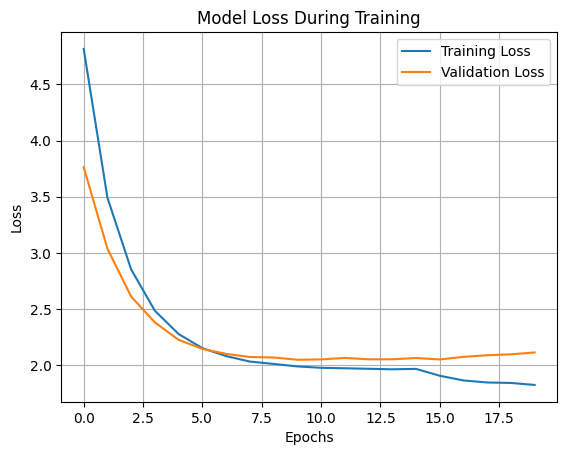

183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Test Accuracy: 0.2731322823851953


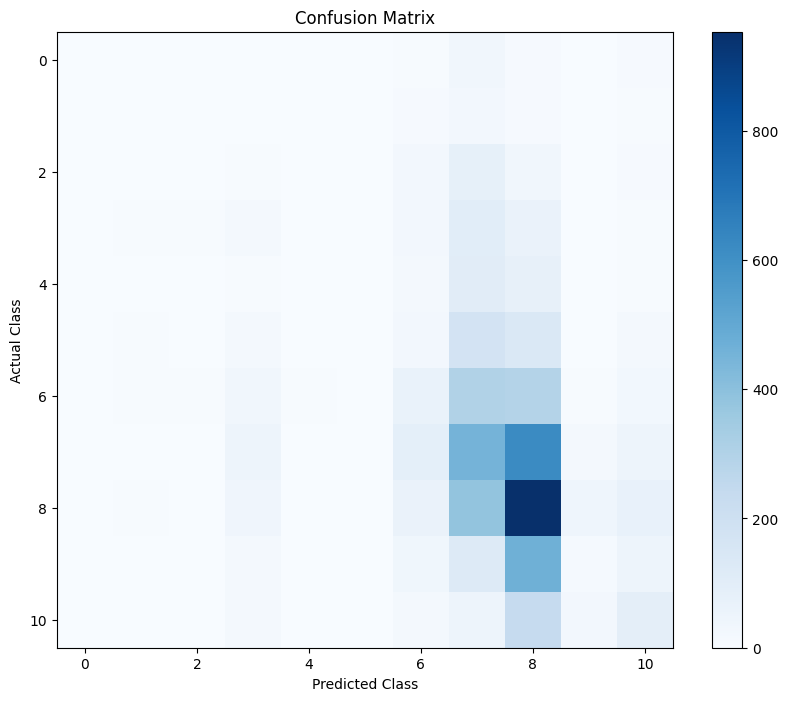

In [1425]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical

# Convert target variable `y_train` and `y_test` to categorical if not already in one-hot format
y_train_cat = to_categorical(y_train - 1, num_classes=10)  # Adjust if classes are 1-10 to align with 0-indexed classes
y_test_cat = to_categorical(y_test - 1, num_classes=10)

# Ensure data is scaled
scaler = RobustScaler(with_centering=False)
X_train_scaled = scaler.fit_transform(X_train_transformed_df)
X_test_scaled = scaler.transform(X_test_transformed_df)

# Define the neural network model architecture
def create_full_feature_model(input_dim, learning_rate=0.001, neurons=128, dropout_rate=0.3, l2_lambda=0.01):
    model = Sequential()
    model.add(Dense(neurons, input_dim=input_dim, activation='relu', kernel_regularizer='l2'))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))  
    
    model.add(Dense(neurons, activation='relu', kernel_regularizer='l2'))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))
    
    # Output layer for multiclass classification with softmax activation
    model.add(Dense(10, activation='softmax'))  # 10 classes for JobSat levels 1 to 10
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Initialize the model
input_dim = X_train_scaled.shape[1]  # Using all 200 features
model = create_full_feature_model(input_dim=input_dim)

# Callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5)

# Train the model with all 200 features
history = model.fit(
    X_train_scaled, y_train_cat,
    validation_split=0.2,
    epochs=50,  # Start with 50 epochs; increase as needed
    batch_size=64,
    callbacks=[early_stopping, lr_scheduler],
    verbose=1
)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Evaluate the model on the test set
y_test_pred_prob = model.predict(X_test_scaled)
y_test_pred = np.argmax(y_test_pred_prob, axis=1) + 1  # Convert back to 1-10 classes

# Calculate and print accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy}")

import seaborn as sns
# Confusion matrix to visualize classification performance
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(10, 8))
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.colorbar()
plt.show()


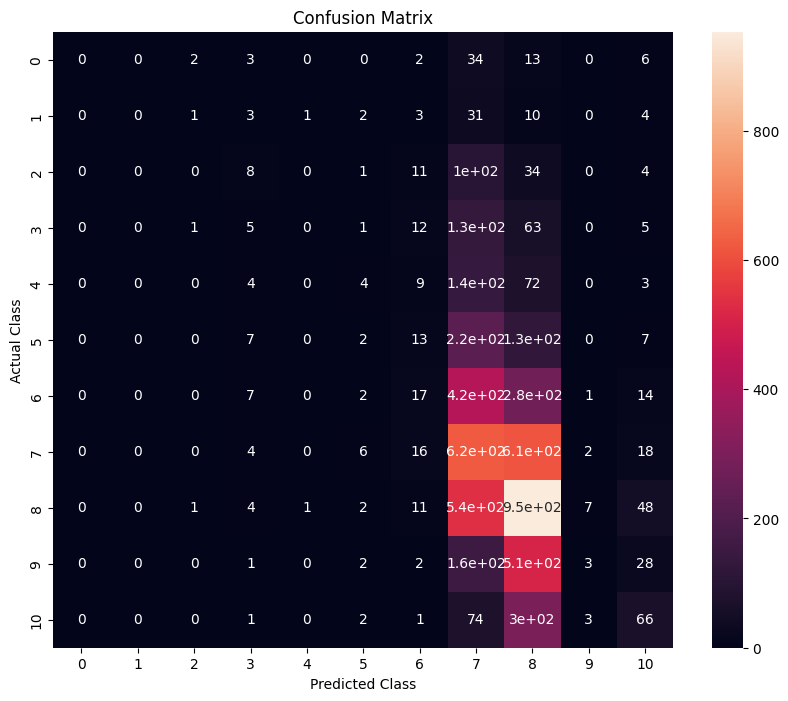

In [1526]:
import seaborn as sns
# Confusion matrix to visualize classification performance
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cbar=True)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")

plt.show()


d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.1426 - loss: 4.8549 - val_accuracy: 0.2440 - val_loss: 3.2926 - learning_rate: 0.0010
Epoch 2/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.2378 - loss: 3.1905 - val_accuracy: 0.2589 - val_loss: 2.5747 - learning_rate: 0.0010
Epoch 3/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.2613 - loss: 2.5256 - val_accuracy: 0.2715 - val_loss: 2.2431 - learning_rate: 0.0010
Epoch 4/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.2736 - loss: 2.2207 - val_accuracy: 0.2675 - val_loss: 2.1037 - learning_rate: 0.0010
Epoch 5/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.2726 - loss: 2.0938 - val_accuracy: 0.2694 - val_loss: 2.0348 - learning_rate: 0.0010
Epoch 6/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.2755 - loss: 2.0275 - val_accuracy: 0.2793 - val_loss: 1.9952 - learning_rate: 0.0010
Epoch 7/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.2821 - loss: 1.

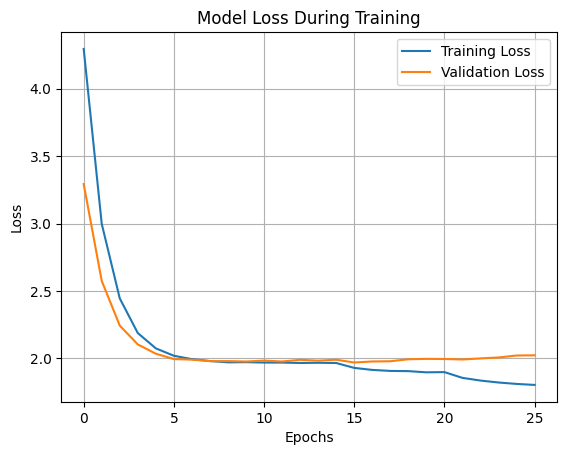

ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense_3020" is incompatible with the layer: expected axis -1 of input shape to have value 106, but received input with shape (32, 200)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(32, 200), dtype=float32)
  • training=False
  • mask=None

In [1523]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical

# Convert target variable `y_train` and `y_test` to categorical if not already in one-hot format
y_train_cat = to_categorical(y_train - 1, num_classes=10)  # Adjust if classes are 1-10 to align with 0-indexed classes
y_test_cat = to_categorical(y_test - 1, num_classes=10)

# Ensure data is scaled
scaler = RobustScaler(with_centering=False)
X_train_scaled = scaler.fit_transform(X_train_transformed_df)
X_test_scaled = scaler.transform(X_test_transformed_df)

# Define the neural network model architecture
def create_full_feature_model(input_dim, learning_rate=0.001, neurons=128, dropout_rate=0.3, l2_lambda=0.01):
    model = Sequential()
    model.add(Dense(neurons, input_dim=input_dim, activation='relu', kernel_regularizer='l2'))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))  
    
    model.add(Dense(neurons, activation='relu', kernel_regularizer='l2'))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))
    
    # Output layer for multiclass classification with softmax activation
    model.add(Dense(10, activation='softmax'))  # 10 classes for JobSat levels 1 to 10
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Initialize the model
# input_dim = X_train_scaled.shape[1]  # Using all 200 features
# model = create_full_feature_model(input_dim=input_dim)

# Callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5)

# Define and train your neural network model with the PCA-transformed data
input_dim = X_train_pca.shape[1]  # The new number of components

# Redefine the model to fit the new input dimensions
model = create_full_feature_model(input_dim=input_dim)

# Train the model
history = model.fit(
    X_train_pca, y_train_cat,
    validation_split=0.2,
    epochs=50,  # Start with 50 epochs; increase as needed
    batch_size=64,
    callbacks=[early_stopping, lr_scheduler],
    verbose=1
)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()



183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Test Accuracy: 0.28598355037697054


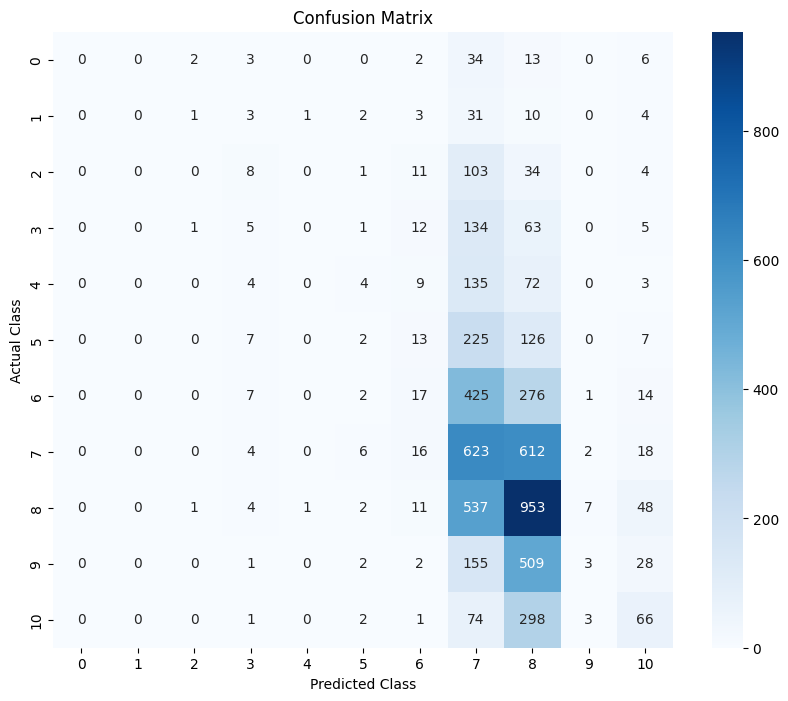

In [1525]:
# Evaluate the model on the test set (make sure to use X_test_pca here)
y_test_pred_prob = model.predict(X_test_pca)  # Change from X_train_pca to X_test_pca
y_test_pred = np.argmax(y_test_pred_prob, axis=1) + 1  # Convert back to 1-10 classes

# Calculate and print accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy}")

# Confusion matrix to visualize classification performance
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()


In [1427]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV

# Convert target variable `y_train` and `y_test` to categorical if not already in one-hot format
y_train_cat = to_categorical(y_train - 1, num_classes=10)  # Adjust if classes are 1-10 to align with 0-indexed classes
y_test_cat = to_categorical(y_test - 1, num_classes=10)

# Ensure data is scaled
scaler = RobustScaler(with_centering=False)
X_train_scaled = scaler.fit_transform(X_train_transformed_df)
X_test_scaled = scaler.transform(X_test_transformed_df)

# Define the neural network model architecture
def create_full_feature_model(learning_rate=0.001, neurons=128, dropout_rate=0.3):
    model = Sequential()
    model.add(Dense(neurons, input_dim=X_train_scaled.shape[1], activation='relu', kernel_regularizer='l2'))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))  
    
    model.add(Dense(neurons, activation='relu', kernel_regularizer='l2'))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))
    
    # Output layer for multiclass classification with softmax activation
    model.add(Dense(10, activation='softmax'))  # 10 classes for JobSat levels 1 to 10
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Wrap Keras model with KerasClassifier for hyperparameter tuning
model = KerasClassifier(model=create_full_feature_model, verbose=1)

# Set the hyperparameters grid
param_dist = {
    'model__learning_rate': [0.001, 0.01, 0.1],
    'model__neurons': [64, 128, 256],
    'model__dropout_rate': [0.2, 0.3, 0.5],
    'batch_size': [32, 64, 128],
    'epochs': [50, 100]
}

# Randomized search with cross-validation
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, 
                                   n_iter=10, scoring='accuracy', cv=3, verbose=1, n_jobs=-1)

# Fit randomized search to the training data
random_search_result = random_search.fit(X_train_scaled, y_train_cat)

# Display the best parameters
print("Best parameters found: ", random_search_result.best_params_)
print("Best accuracy score: ", random_search_result.best_score_)

# Train the final model with the best parameters
best_params = random_search_result.best_params_
final_model = create_full_feature_model(learning_rate=best_params['model__learning_rate'], 
                                        neurons=best_params['model__neurons'], 
                                        dropout_rate=best_params['model__dropout_rate'])

# Callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5)

history = final_model.fit(
    X_train_scaled, y_train_cat,
    validation_split=0.2,
    epochs=best_params['epochs'],
    batch_size=best_params['batch_size'],
    callbacks=[early_stopping, lr_scheduler],
    verbose=1
)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Evaluate the model on the test set
y_test_pred_prob = final_model.predict(X_test_scaled)
y_test_pred = np.argmax(y_test_pred_prob, axis=1) + 1  # Convert back to 1-10 classes

# Calculate and print accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy}")

# Confusion matrix to visualize classification performance
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(10, 8))
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.colorbar()
plt.show()


Fitting 3 folds for each of 10 candidates, totalling 30 fits


d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.2221 - loss: 3.0652
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.2619 - loss: 2.1324
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.2595 - loss: 2.0741
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.2722 - loss: 2.0307
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.2696 - loss: 2.0151
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.2705 - loss: 2.0122
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.2754 - loss: 2.0078
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.2715 - loss: 1.9941
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.2742 - loss: 1.9883
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.2752 - loss: 1.9763
Epoch 11/100
107/250 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.2731 - loss: 1.9638

KeyboardInterrupt: 

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 7.8147 - val_loss: 3.0888 - learning_rate: 0.0010
Epoch 2/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.1928 - val_loss: 2.3679 - learning_rate: 0.0010
Epoch 3/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.5547 - val_loss: 2.0466 - learning_rate: 0.0010
Epoch 4/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.1572 - val_loss: 1.7592 - learning_rate: 0.0010
Epoch 5/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.8773 - val_loss: 1.5871 - learning_rate: 0.0010
Epoch 6/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.6593 - val_loss: 1.4852 - learning_rate: 0.0010
Epoch 7/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.5298 - val_loss: 1.3712 - learning_rate: 0.0010
Epoch 8/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.4211 - val_loss: 1.2630 - learning_rate: 0.0010
Epoch 9/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.3019 - val_loss: 1.2526 - learning_rate: 0.0010
Epoch 10/5

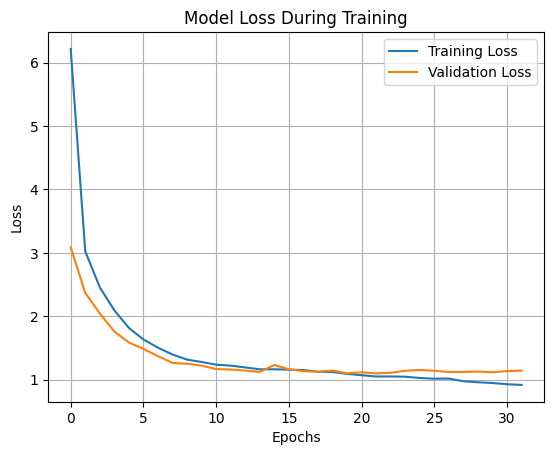

183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Test MSE: 3.5901487834751182
Test R-squared: 0.15034473818181615


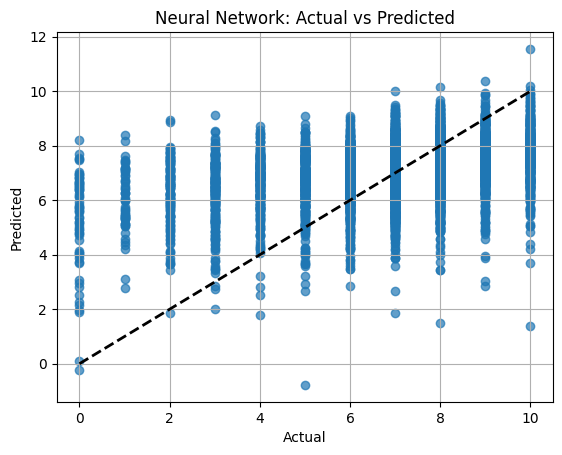

In [1097]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.losses import Huber

# Ensure data is scaled
scaler = RobustScaler(with_centering=False)
X_train_scaled = scaler.fit_transform(X_train_transformed_df)
X_test_scaled = scaler.transform(X_test_transformed_df)

# Define the neural network model architecture
def create_full_feature_model(input_dim, learning_rate=0.001, neurons=128, dropout_rate=0.3, l2_lambda=0.01):
    model = Sequential()
    model.add(Dense(neurons, input_dim=input_dim, activation='relu', kernel_regularizer='l2'))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))  
    
    model.add(Dense(neurons, activation='relu', kernel_regularizer='l2'))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))
    
    model.add(Dense(1, activation='linear'))  # Regression output
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss=Huber(delta=1.0))
    return model

# Initialize the model
input_dim = X_train_scaled.shape[1]  # Using all 200 features
model = create_full_feature_model(input_dim=input_dim)

# Callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5)

# Train the model with all 200 features
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=50,  # Start with 50 epochs; increase as needed
    batch_size=64,
    callbacks=[early_stopping, lr_scheduler],
    verbose=1
)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Evaluate the model on the test set
y_test_pred = model.predict(X_test_scaled)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Test MSE: {test_mse}")
print(f"Test R-squared: {test_r2}")

# Plot predicted vs actual values
plt.scatter(y_test, y_test_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Neural Network: Actual vs Predicted')
plt.grid(True)
plt.show()


In [1098]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Instantiate the RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, 
                                   n_iter=50, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit to the data without 'ResponseId'
random_search.fit(X_train_transformed_df, y_train)

# Get the best estimator
best_rf = random_search.best_estimator_

# Extract feature importances from the best model
importances = best_rf.feature_importances_
feature_names = X_train_transformed_df.columns
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort feature importances in descending order
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)




Fitting 3 folds for each of 50 candidates, totalling 150 fits


d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning:


48 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
32 fits failed with the following error:
Traceback (most recent call last):
  File "d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\sklea

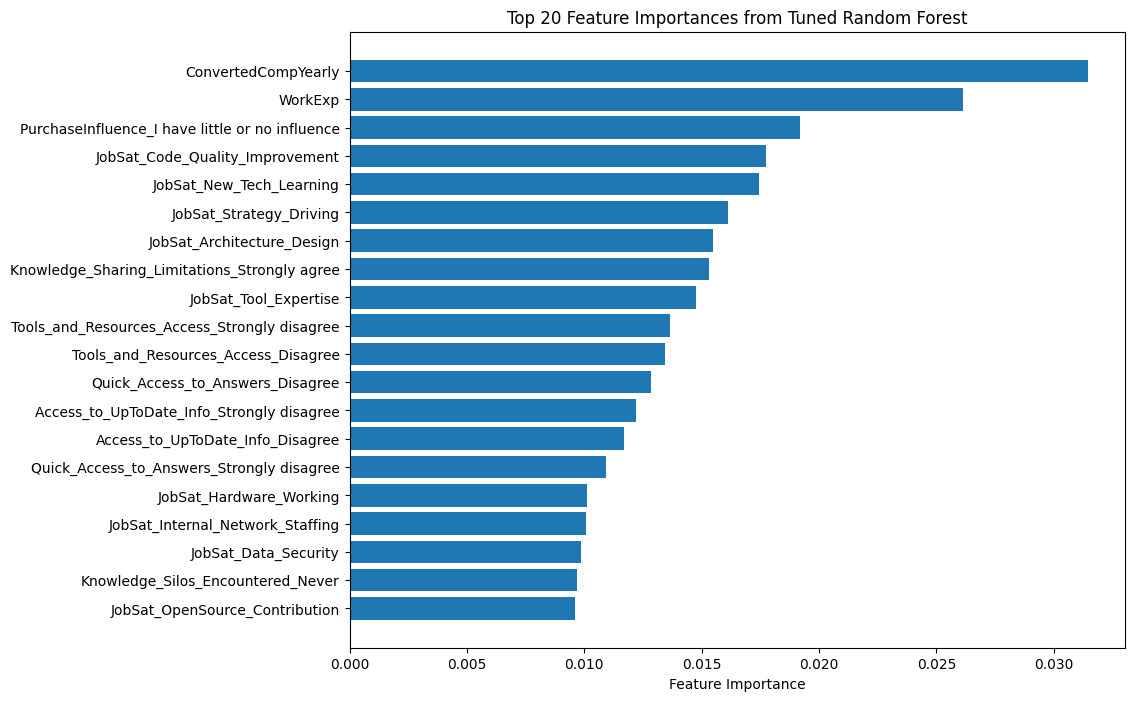

                                             Feature  Importance
10                               ConvertedCompYearly    0.031446
0                                            WorkExp    0.026152
105  PurchaseInfluence_I have little or no influence    0.019180
4                    JobSat_Code_Quality_Improvement    0.017759
5                           JobSat_New_Tech_Learning    0.017437
1                            JobSat_Strategy_Driving    0.016136
6                         JobSat_Architecture_Design    0.015502
147     Knowledge_Sharing_Limitations_Strongly agree    0.015301
7                              JobSat_Tool_Expertise    0.014765
178     Tools_and_Resources_Access_Strongly disagree    0.013640
175              Tools_and_Resources_Access_Disagree    0.013457
155                 Quick_Access_to_Answers_Disagree    0.012858
153        Access_to_UpToDate_Info_Strongly disagree    0.012211
150                 Access_to_UpToDate_Info_Disagree    0.011670
158        Quick_Access_t

In [1099]:

# Plot the top feature importances
plt.figure(figsize=(10, 8))
plt.barh(feature_importances['Feature'][:20], feature_importances['Importance'][:20])
plt.gca().invert_yaxis()
plt.xlabel('Feature Importance')
plt.title('Top 20 Feature Importances from Tuned Random Forest')
plt.show()

# Display feature importances as DataFrame
print(feature_importances.head(20))


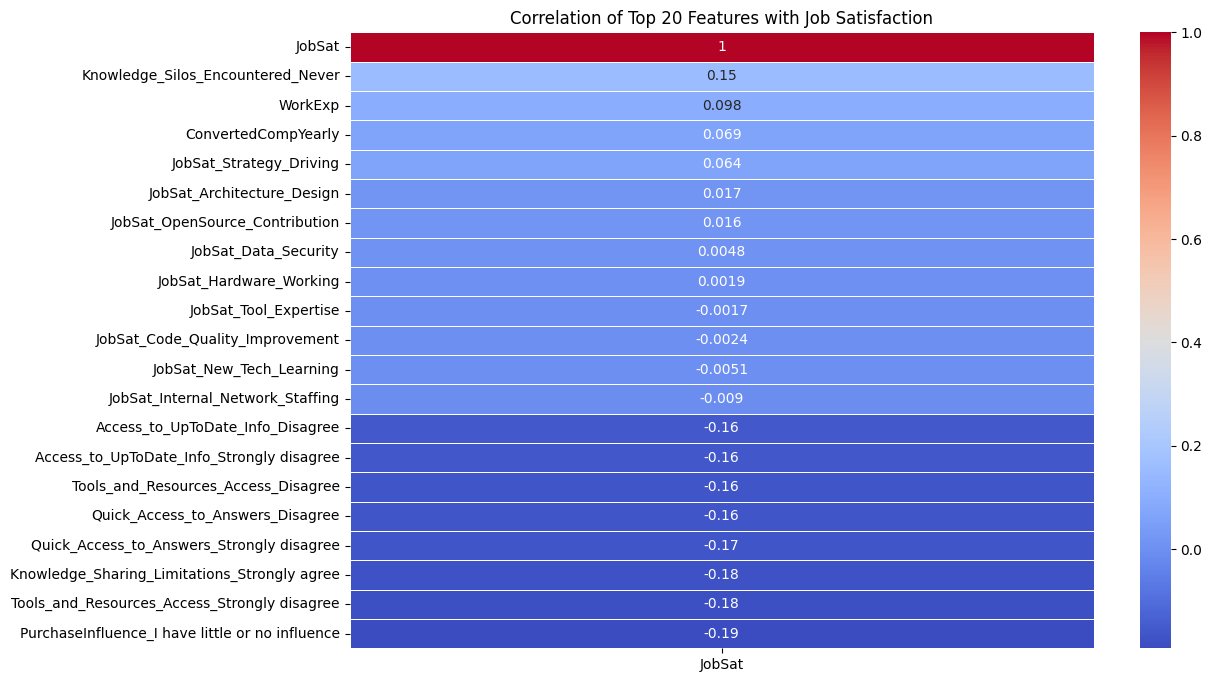

In [1100]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extract the top 20 features
top_20_features = feature_importances['Feature'][:20].tolist()

# Create a DataFrame with the top 20 features and the target variable
top_20_df = X_train_transformed_df[top_20_features].copy()
top_20_df['JobSat'] = y_train.values  # Ensure alignment

# Calculate the correlation matrix
correlation_top_20 = top_20_df.corr()

# Display the correlation between the top 20 features and the target variable
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_top_20[['JobSat']].sort_values(by='JobSat', ascending=False),
            annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation of Top 20 Features with Job Satisfaction')
plt.show()


In [1101]:
num_columns = X_train_transformed_df.shape[1]
print(f"Number of columns (features) used to train the model: {num_columns}")


Number of columns (features) used to train the model: 219


In [1102]:
print("Columns (features) used to train the model:")
X_train_transformed_df.columns.tolist()


Columns (features) used to train the model:


['WorkExp',
 'JobSat_Strategy_Driving',
 'JobSat_OpenSource_Contribution',
 'JobSat_Data_Security',
 'JobSat_Code_Quality_Improvement',
 'JobSat_New_Tech_Learning',
 'JobSat_Architecture_Design',
 'JobSat_Tool_Expertise',
 'JobSat_Hardware_Working',
 'JobSat_Internal_Network_Staffing',
 'ConvertedCompYearly',
 'Bootstrapping Business',
 'Open Source Contribution',
 'Freelance/Contract Work',
 'Hobby',
 'Professional Development',
 'School/Academic Work',
 'AI Tools',
 'Knowledge Bases',
 'Public Search Engine',
 'API/SDK Documentation',
 'Cloud Platforms',
 'Data Processing',
 'Programming Frameworks',
 'SOAccount - Yes',
 'SOAccount - No',
 'Frequent',
 'Very Frequent',
 'Positive Community Engagement',
 'Neutral Community Engagement',
 'Negative Community Engagement',
 'Debugging and Getting Help - Currently Using',
 'Documenting Code - Currently Using',
 'Generating Content or Synthetic Data - Currently Using',
 'Learning About Codebase - Currently Using',
 'Search for Answers - Cur

In [1103]:
# from sklearn.linear_model import Ridge
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import mean_squared_error, r2_score
# import numpy as np

# # Sort feature importances in descending order (if not already sorted)
# feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# # Features to test: top 5, 10, 15, and 20 features
# features_to_test = [5, 10, 15, 20]

# # Dictionary to store results for each feature subset
# results_ridge = {}

# for num_features in features_to_test:
#     # Extract the top N features based on sorted feature importance
#     top_n_features = feature_importances['Feature'][:num_features].tolist()

#     # Filter X_train and X_test to keep only the top N features
#     X_train_topN = X_train_transformed_df[top_n_features]
#     X_test_topN = X_test_transformed_df[top_n_features]

#     # Define the Ridge model
#     ridge = Ridge(max_iter=10000)

#     # Set up the parameter grid for alpha (regularization strength)
#     param_grid = {'alpha': np.logspace(-4, 2, 100)}  # Exhaustively search alpha from 0.0001 to 100

#     # Use GridSearchCV to find the best alpha
#     grid_search_ridge = GridSearchCV(estimator=ridge, param_grid=param_grid, 
#                                      cv=5, scoring='neg_mean_squared_error', 
#                                      n_jobs=-1, verbose=2)

#     # Fit the model to the training data with the top N features
#     grid_search_ridge.fit(X_train_topN, y_train)

#     # Get the best Ridge model and alpha
#     best_ridge = grid_search_ridge.best_estimator_
#     best_alpha_ridge = grid_search_ridge.best_params_['alpha']

#     # Print the best alpha value
#     print(f"\nTop {num_features} Features (Ridge):")
#     print(f"Best alpha (regularization strength): {best_alpha_ridge}")

#     # Predict on the training set and calculate MSE and R-squared
#     y_train_pred_ridge = best_ridge.predict(X_train_topN)
#     train_mse_ridge = mean_squared_error(y_train, y_train_pred_ridge)
#     train_r2_ridge = r2_score(y_train, y_train_pred_ridge)
#     print(f"Training MSE (Ridge): {train_mse_ridge}")
#     print(f"Training R-squared (Ridge): {train_r2_ridge}")

#     # Predict on the test set and calculate MSE and R-squared
#     y_test_pred_ridge = best_ridge.predict(X_test_topN)
#     test_mse_ridge = mean_squared_error(y_test, y_test_pred_ridge)
#     test_r2_ridge = r2_score(y_test, y_test_pred_ridge)
#     print(f"Test MSE (Ridge): {test_mse_ridge}")
#     print(f"Test R-squared (Ridge): {test_r2_ridge}")

#     # Store results in the dictionary
#     results_ridge[num_features] = {'Best Alpha': best_alpha_ridge, 
#                                    'Training MSE': train_mse_ridge, 
#                                    'Training R-squared': train_r2_ridge, 
#                                    'Test MSE': test_mse_ridge, 
#                                    'Test R-squared': test_r2_ridge}

# # Print final results summary for Ridge
# print("\nSummary of Ridge Results for Different Feature Subsets:")
# for num_features, metrics in results_ridge.items():
#     print(f"\nTop {num_features} Features (Ridge):")
#     print(f"Best Alpha: {metrics['Best Alpha']}")
#     print(f"Training MSE: {metrics['Training MSE']}")
#     print(f"Training R-squared: {metrics['Training R-squared']}")
#     print(f"Test MSE: {metrics['Test MSE']}")
#     print(f"Test R-squared: {metrics['Test R-squared']}")


In [1104]:
# new code

In [1105]:
# import numpy as np
# from sklearn.model_selection import KFold
# from sklearn.metrics import mean_squared_error, r2_score
# from sklearn.linear_model import Ridge
# from sklearn.feature_selection import RFE
# from sklearn.preprocessing import RobustScaler
# from sklearn.decomposition import PCA
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
# from tensorflow.keras.losses import Huber
# import matplotlib.pyplot as plt
# from scipy import stats

# # Initial Feature Selection using RFE
# def perform_rfe(X, y, model, n_features=20):  # Adjust n_features to desired top features
#     rfe = RFE(estimator=model, n_features_to_select=n_features, step=1)
#     rfe.fit(X, y)
#     selected_features = X.columns[rfe.support_].tolist()
#     return selected_features

# # Feature Preparation with Scaling and PCA
# scaler = RobustScaler()
# X_train_scaled = scaler.fit_transform(X_train_transformed_df)
# X_test_scaled = scaler.transform(X_test_transformed_df)

# # Handle outliers using Z-score filtering
# X_train_cleaned = X_train_transformed_df[(np.abs(stats.zscore(X_train_transformed_df)) < 3).all(axis=1)]
# y_train_cleaned = y_train[X_train_cleaned.index]

# # Initial feature selection with Ridge for RFE
# ridge = Ridge()
# selected_features = perform_rfe(X_train_cleaned, y_train_cleaned, ridge, n_features=20)  # Top 20 features for PCA
# X_train_subset = X_train_cleaned[selected_features]
# X_test_subset = X_test_transformed_df[selected_features]

# # Optional: PCA for further dimensionality reduction
# pca = PCA(n_components=0.95)  # Retain 95% variance
# X_train_pca = pca.fit_transform(X_train_subset)
# X_test_pca = pca.transform(X_test_subset)

# # Create model with optimized settings
# def create_model(input_dim, learning_rate=0.001, neurons=128, dropout_rate=0.3, l2_lambda=0.01):
#     model = Sequential()
#     model.add(Dense(neurons, input_dim=input_dim, activation='relu', kernel_regularizer='l2'))
#     model.add(BatchNormalization())
#     model.add(Dropout(dropout_rate))
#     model.add(Dense(neurons, activation='relu', kernel_regularizer='l2'))
#     model.add(BatchNormalization())
#     model.add(Dropout(dropout_rate))
#     model.add(Dense(1, activation='linear'))
#     model.compile(optimizer=Adam(learning_rate=learning_rate), loss=Huber(delta=1.0))
#     return model

# # Hyperparameter Search with K-Fold Cross-Validation
# kf = KFold(n_splits=3, shuffle=True, random_state=42)
# param_grid = {
#     'neurons': [128, 256],
#     'learning_rate': [0.001, 0.01],
#     'dropout_rate': [0.2, 0.3],
#     'l2_lambda': [0.01, 0.001]
# }
# best_mse = float("inf")
# best_params = {}

# # Hyperparameter Tuning Loop
# for neurons in param_grid['neurons']:
#     for learning_rate in param_grid['learning_rate']:
#         for dropout_rate in param_grid['dropout_rate']:
#             for l2_lambda in param_grid['l2_lambda']:
#                 fold_mse = []
                
#                 for train_idx, val_idx in kf.split(X_train_pca):
#                     X_train_cv, X_val_cv = X_train_pca[train_idx], X_train_pca[val_idx]
#                     y_train_cv, y_val_cv = y_train_cleaned.iloc[train_idx], y_train_cleaned.iloc[val_idx]
                    
#                     model = create_model(input_dim=X_train_pca.shape[1], learning_rate=learning_rate, 
#                                          neurons=neurons, dropout_rate=dropout_rate, l2_lambda=l2_lambda)
#                     early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
#                     lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5)
                    
#                     history = model.fit(X_train_cv, y_train_cv, epochs=100, batch_size=64, validation_data=(X_val_cv, y_val_cv),
#                                         callbacks=[early_stopping, lr_scheduler], verbose=0)
                    
#                     y_val_pred = model.predict(X_val_cv)
#                     mse = mean_squared_error(y_val_cv, y_val_pred)
#                     fold_mse.append(mse)
                
#                 avg_mse = np.mean(fold_mse)
#                 if avg_mse < best_mse:
#                     best_mse = avg_mse
#                     best_params = {'neurons': neurons, 'learning_rate': learning_rate, 
#                                    'dropout_rate': dropout_rate, 'l2_lambda': l2_lambda}

# print(f"Best hyperparameters: {best_params}, Best MSE: {best_mse}")

# # Final Training and Evaluation
# best_model = create_model(input_dim=X_train_pca.shape[1], **best_params)
# history = best_model.fit(X_train_pca, y_train_cleaned, epochs=200, batch_size=64, validation_split=0.2, 
#                          callbacks=[early_stopping, lr_scheduler], verbose=1)

# # Prediction and Performance Evaluation
# y_test_pred = best_model.predict(X_test_pca)
# test_mse = mean_squared_error(y_test, y_test_pred)
# test_r2 = r2_score(y_test, y_test_pred)
# print(f"Test MSE: {test_mse}, Test R-squared: {test_r2}")

# # Plot Predicted vs Actual
# plt.scatter(y_test, y_test_pred, alpha=0.7)
# plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
# plt.xlabel('Actual')
# plt.ylabel('Predicted')
# plt.title('Deep Learning Model: Actual vs Predicted')
# plt.grid(True)
# plt.show()


SyntaxError: positional argument follows keyword argument (1503623976.py, line 145)

In [ ]:
# Increased Model Complexity: Added more neurons as part of hyperparameter tuning.
# Target Scaling: Applied RobustScaler to the target variable for better handling of potential outliers.
# Outlier Handling: Filtered training samples with extreme Z-scores.
# Result Unscaling: Unscaled predictions on the test set for meaningful performance metrics.

In [1111]:
# # Required Imports
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# from sklearn.model_selection import KFold
# from sklearn.metrics import mean_squared_error, r2_score
# from sklearn.preprocessing import RobustScaler
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
# from tensorflow.keras.losses import Huber
# from scipy import stats

# # Define top 20 features based on previous feature importance analysis
# top_20_features = [
#    'ConvertedCompYearly', 'WorkExp', 'PurchaseInfluence_I have little or no influence', 
#         'JobSat_Code_Quality_Improvement', 'JobSat_New_Tech_Learning', 'JobSat_Strategy_Driving', 
#         'JobSat_Architecture_Design', 'Knowledge_Sharing_Limitations_Strongly agree', 
#         'JobSat_Tool_Expertise', 'Tools_and_Resources_Access_Strongly disagree', 
#         'Tools_and_Resources_Access_Disagree', 'Quick_Access_to_Answers_Disagree', 
#         'Access_to_UpToDate_Info_Strongly disagree', 'Access_to_UpToDate_Info_Disagree', 
#         'Quick_Access_to_Answers_Strongly disagree', 'JobSat_Hardware_Working', 
#         'JobSat_Internal_Network_Staffing', 'JobSat_Data_Security', 
#         'Knowledge_Silos_Encountered_Never', 'JobSat_OpenSource_Contribution'
# ]

# # Subset the training and test data to only include the top 20 features
# X_train_subset = X_train_transformed_df[top_20_features]
# X_test_subset = X_test_transformed_df[top_20_features]

# # Convert sparse data to dense format if necessary
# def to_dense(df):
#     return np.asarray(df.todense()) if hasattr(df, "todense") else np.asarray(df)

# X_train_subset = to_dense(X_train_subset)
# X_test_subset = to_dense(X_test_subset)

# # Load and preprocess data
# scaler = RobustScaler(with_centering=False)
# X_train_scaled = scaler.fit_transform(X_train_subset)
# X_test_scaled = scaler.transform(X_test_subset)

# # Scale the target variable to improve model performance
# target_scaler = RobustScaler()
# y_train_scaled = target_scaler.fit_transform(y_train.values.reshape(-1, 1)).flatten()
# y_test_scaled = target_scaler.transform(y_test.values.reshape(-1, 1)).flatten()

# # Handle outliers by removing samples with extreme Z-scores
# z_scores = np.abs(stats.zscore(X_train_scaled))
# outlier_filter = (z_scores < 3).all(axis=1)
# X_train_cleaned = X_train_scaled[outlier_filter]
# y_train_cleaned = y_train_scaled[outlier_filter]  # Use boolean indexing for matching y values

# # Function to create the model
# def create_model(input_dim, learning_rate=0.001, neurons=64, dropout_rate=0.2, l2_lambda=0.01):
#     model = Sequential()
#     model.add(Dense(neurons, input_dim=input_dim, activation='relu', kernel_regularizer='l2'))
#     model.add(BatchNormalization())
#     model.add(Dropout(dropout_rate))
#     model.add(Dense(neurons, activation='relu', kernel_regularizer='l2'))
#     model.add(BatchNormalization())
#     model.add(Dropout(dropout_rate))
#     model.add(Dense(1, activation='linear'))  # Linear activation for regression tasks
#     model.compile(optimizer=Adam(learning_rate=learning_rate), loss=Huber(delta=1.0))
#     return model

# # Define hyperparameters for tuning
# param_dist = {
#     'neurons': [64, 128],
#     'learning_rate': [0.001, 0.01],
#     'batch_size': [32, 64],
#     'epochs': [10, 20],
#     'dropout_rate': [0.2, 0.3],
#     'l2_lambda': [0.01, 0.001]
# }

# # Manual cross-validation for hyperparameter tuning
# kf = KFold(n_splits=3, shuffle=True, random_state=42)
# best_mse = float("inf")
# best_params = {}

# # Cross-validation loop through hyperparameters
# for neurons in param_dist['neurons']:
#     for learning_rate in param_dist['learning_rate']:
#         for batch_size in param_dist['batch_size']:
#             for epochs in param_dist['epochs']:
#                 for dropout_rate in param_dist['dropout_rate']:
#                     for l2_lambda in param_dist['l2_lambda']:
#                         fold_mse = []
#                         for train_index, val_index in kf.split(X_train_cleaned):
#                             X_train_cv, X_val_cv = X_train_cleaned[train_index], X_train_cleaned[val_index]
#                             y_train_cv, y_val_cv = y_train_cleaned[train_index], y_train_cleaned[val_index]
                            
#                             model = create_model(
#                                 input_dim=X_train_cleaned.shape[1], 
#                                 learning_rate=learning_rate, 
#                                 neurons=neurons, 
#                                 dropout_rate=dropout_rate, 
#                                 l2_lambda=l2_lambda
#                             )
                            
#                             early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
#                             lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5)
                            
#                             # Fit the model
#                             history = model.fit(
#                                 X_train_cv, y_train_cv, 
#                                 epochs=epochs, 
#                                 batch_size=batch_size,
#                                 validation_data=(X_val_cv, y_val_cv), 
#                                 callbacks=[early_stopping, lr_scheduler], 
#                                 verbose=1
#                             )
                            
#                             # Calculate MSE for validation set
#                             y_val_pred = model.predict(X_val_cv)
#                             mse = mean_squared_error(y_val_cv, y_val_pred)
#                             fold_mse.append(mse)
                        
#                         avg_mse = np.mean(fold_mse)
#                         if avg_mse < best_mse:
#                             best_mse = avg_mse
#                             best_params = {
#                                 'neurons': neurons, 
#                                 'learning_rate': learning_rate, 
#                                 'batch_size': batch_size, 
#                                 'epochs': epochs,
#                                 'dropout_rate': dropout_rate, 
#                                 'l2_lambda': l2_lambda
#                             }

# print(f"Best hyperparameters: {best_params}")
# print(f"Best MSE: {best_mse}")

# # Train the final model with the best parameters
# best_model = create_model(
#     input_dim=X_train_cleaned.shape[1], 
#     learning_rate=best_params['learning_rate'], 
#     neurons=best_params['neurons'],
#     dropout_rate=best_params['dropout_rate'], 
#     l2_lambda=best_params['l2_lambda']
# )
# early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
# lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5)

# history = best_model.fit(
#     X_train_cleaned, y_train_cleaned, 
#     epochs=best_params['epochs'], 
#     batch_size=best_params['batch_size'], 
#     validation_split=0.2, 
#     callbacks=[early_stopping, lr_scheduler], 
#     verbose=1
# )

# # Plot training and validation loss
# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.title('Model Loss During Training')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.grid(True)
# plt.show()

# # Predict on the test set and calculate MSE and R-squared
# y_test_pred = best_model.predict(X_test_scaled)
# y_test_pred_unscaled = target_scaler.inverse_transform(y_test_pred).flatten()  # Unscale predictions
# test_mse = mean_squared_error(y_test, y_test_pred_unscaled)
# test_r2 = r2_score(y_test, y_test_pred_unscaled)

# print(f"Test MSE: {test_mse}")
# print(f"Test R-squared: {test_r2}")

# # Plot predicted vs actual values
# plt.scatter(y_test, y_test_pred_unscaled, alpha=0.7)
# plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
# plt.xlabel('Actual')
# plt.ylabel('Predicted')
# plt.title('Neural Network: Actual vs Predicted')
# plt.grid(True)
# plt.show()


Epoch 1/10


d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



280/280 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 6.4200 - val_loss: 1.7613 - learning_rate: 0.0010
Epoch 2/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.1083 - val_loss: 1.4867 - learning_rate: 0.0010
Epoch 3/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.8501 - val_loss: 1.4204 - learning_rate: 0.0010
Epoch 4/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.6605 - val_loss: 1.3219 - learning_rate: 0.0010
Epoch 5/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.5353 - val_loss: 1.3006 - learning_rate: 0.0010
Epoch 6/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.4492 - val_loss: 1.2344 - learning_rate: 0.0010
Epoch 7/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.3927 - val_loss: 1.1588 - learning_rate: 0.0010
Epoch 8/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.3287 - val_loss: 1.1381 - learning_rate: 0.0010
Epoch 9/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.2520 - val_loss: 1.0948 - learning_rate: 0.0010
Epoch 10/10
280/280 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



280/280 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 6.3890 - val_loss: 1.7112 - learning_rate: 0.0010
Epoch 2/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.0738 - val_loss: 1.5497 - learning_rate: 0.0010
Epoch 3/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.8122 - val_loss: 1.4405 - learning_rate: 0.0010
Epoch 4/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.6232 - val_loss: 1.3892 - learning_rate: 0.0010
Epoch 5/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.5219 - val_loss: 1.2940 - learning_rate: 0.0010
Epoch 6/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.4142 - val_loss: 1.2339 - learning_rate: 0.0010
Epoch 7/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.3449 - val_loss: 1.2018 - learning_rate: 0.0010
Epoch 8/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.3032 - val_loss: 1.1600 - learning_rate: 0.0010
Epoch 9/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.2671 - val_loss: 1.1225 - learning_rate: 0.0010
Epoch 10/10
280/280 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 6.4097 - val_loss: 1.6515 - learning_rate: 0.0010
Epoch 2/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.0552 - val_loss: 1.5605 - learning_rate: 0.0010
Epoch 3/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.7911 - val_loss: 1.4404 - learning_rate: 0.0010
Epoch 4/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.6514 - val_loss: 1.3577 - learning_rate: 0.0010
Epoch 5/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.5361 - val_loss: 1.2860 - learning_rate: 0.0010
Epoch 6/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.4444 - val_loss: 1.2418 - learning_rate: 0.0010
Epoch 7/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.3420 - val_loss: 1.2115 - learning_rate: 0.0010
Epoch 8/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.2685 - val_loss: 1.1604 - learning_rate: 0.0010
Epoch 9/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.2500 - val_loss: 1.1209 - learning_rate: 0.0010
Epoch 10/10
280/280 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



280/280 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 6.3092 - val_loss: 1.6046 - learning_rate: 0.0010
Epoch 2/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.1082 - val_loss: 1.5052 - learning_rate: 0.0010
Epoch 3/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.8283 - val_loss: 1.4147 - learning_rate: 0.0010
Epoch 4/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.7092 - val_loss: 1.3118 - learning_rate: 0.0010
Epoch 5/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.5490 - val_loss: 1.2520 - learning_rate: 0.0010
Epoch 6/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.4767 - val_loss: 1.2053 - learning_rate: 0.0010
Epoch 7/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.4031 - val_loss: 1.1477 - learning_rate: 0.0010
Epoch 8/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.3237 - val_loss: 1.1149 - learning_rate: 0.0010
Epoch 9/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.2906 - val_loss: 1.0951 - learning_rate: 0.0010
Epoch 10/10
280/280 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 6.4430 - val_loss: 1.6990 - learning_rate: 0.0010
Epoch 2/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.0706 - val_loss: 1.5113 - learning_rate: 0.0010
Epoch 3/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.7912 - val_loss: 1.4203 - learning_rate: 0.0010
Epoch 4/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.6233 - val_loss: 1.3608 - learning_rate: 0.0010
Epoch 5/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.4958 - val_loss: 1.3148 - learning_rate: 0.0010
Epoch 6/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.4221 - val_loss: 1.2359 - learning_rate: 0.0010
Epoch 7/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.3654 - val_loss: 1.2017 - learning_rate: 0.0010
Epoch 8/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.2826 - val_loss: 1.1823 - learning_rate: 0.0010
Epoch 9/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.2515 - val_loss: 1.1252 - learning_rate: 0.0010
Epoch 10/10
280/280 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 6.3651 - val_loss: 1.7290 - learning_rate: 0.0010
Epoch 2/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.1122 - val_loss: 1.5617 - learning_rate: 0.0010
Epoch 3/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.8046 - val_loss: 1.4638 - learning_rate: 0.0010
Epoch 4/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.6549 - val_loss: 1.3571 - learning_rate: 0.0010
Epoch 5/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.5349 - val_loss: 1.3115 - learning_rate: 0.0010
Epoch 6/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.4700 - val_loss: 1.2791 - learning_rate: 0.0010
Epoch 7/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.3675 - val_loss: 1.2019 - learning_rate: 0.0010
Epoch 8/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.3132 - val_loss: 1.1670 - learning_rate: 0.0010
Epoch 9/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.2263 - val_loss: 1.1310 - learning_rate: 0.0010
Epoch 10/10
280/280 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 6.5207 - val_loss: 2.1988 - learning_rate: 0.0010
Epoch 2/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.3291 - val_loss: 1.5673 - learning_rate: 0.0010
Epoch 3/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.9817 - val_loss: 1.4391 - learning_rate: 0.0010
Epoch 4/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.8138 - val_loss: 1.3473 - learning_rate: 0.0010
Epoch 5/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.6379 - val_loss: 1.2796 - learning_rate: 0.0010
Epoch 6/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.5260 - val_loss: 1.2270 - learning_rate: 0.0010
Epoch 7/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.4589 - val_loss: 1.1681 - learning_rate: 0.0010
Epoch 8/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.3552 - val_loss: 1.1248 - learning_rate: 0.0010
Epoch 9/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.3351 - val_loss: 1.0908 - learning_rate: 0.0010
Epoch 10/10
280/280 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 6.4354 - val_loss: 1.8034 - learning_rate: 0.0010
Epoch 2/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.2842 - val_loss: 1.5918 - learning_rate: 0.0010
Epoch 3/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.9753 - val_loss: 1.4765 - learning_rate: 0.0010
Epoch 4/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.7789 - val_loss: 1.4068 - learning_rate: 0.0010
Epoch 5/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.6154 - val_loss: 1.3321 - learning_rate: 0.0010
Epoch 6/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.5438 - val_loss: 1.2858 - learning_rate: 0.0010
Epoch 7/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.4342 - val_loss: 1.2131 - learning_rate: 0.0010
Epoch 8/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.3379 - val_loss: 1.1829 - learning_rate: 0.0010
Epoch 9/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.3110 - val_loss: 1.1480 - learning_rate: 0.0010
Epoch 10/10
280/280 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



280/280 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 6.4582 - val_loss: 1.8914 - learning_rate: 0.0010
Epoch 2/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.3046 - val_loss: 1.6077 - learning_rate: 0.0010
Epoch 3/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.9767 - val_loss: 1.5057 - learning_rate: 0.0010
Epoch 4/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.7528 - val_loss: 1.3914 - learning_rate: 0.0010
Epoch 5/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.6282 - val_loss: 1.3298 - learning_rate: 0.0010
Epoch 6/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.5362 - val_loss: 1.2798 - learning_rate: 0.0010
Epoch 7/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.4351 - val_loss: 1.2215 - learning_rate: 0.0010
Epoch 8/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.3607 - val_loss: 1.1860 - learning_rate: 0.0010
Epoch 9/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.3141 - val_loss: 1.1382 - learning_rate: 0.0010
Epoch 10/10
280/280 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 6.5168 - val_loss: 1.7078 - learning_rate: 0.0010
Epoch 2/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.1896 - val_loss: 1.4942 - learning_rate: 0.0010
Epoch 3/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.9200 - val_loss: 1.3981 - learning_rate: 0.0010
Epoch 4/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.7572 - val_loss: 1.3226 - learning_rate: 0.0010
Epoch 5/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.6058 - val_loss: 1.2616 - learning_rate: 0.0010
Epoch 6/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.5326 - val_loss: 1.2014 - learning_rate: 0.0010
Epoch 7/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.4212 - val_loss: 1.1431 - learning_rate: 0.0010
Epoch 8/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.3412 - val_loss: 1.1072 - learning_rate: 0.0010
Epoch 9/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.2993 - val_loss: 1.0883 - learning_rate: 0.0010
Epoch 10/10
280/280 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 6.4679 - val_loss: 1.8362 - learning_rate: 0.0010
Epoch 2/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.2466 - val_loss: 1.5510 - learning_rate: 0.0010
Epoch 3/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.9430 - val_loss: 1.4622 - learning_rate: 0.0010
Epoch 4/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.7518 - val_loss: 1.3771 - learning_rate: 0.0010
Epoch 5/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.6232 - val_loss: 1.3081 - learning_rate: 0.0010
Epoch 6/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.5100 - val_loss: 1.2666 - learning_rate: 0.0010
Epoch 7/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.4671 - val_loss: 1.2637 - learning_rate: 0.0010
Epoch 8/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.3517 - val_loss: 1.1798 - learning_rate: 0.0010
Epoch 9/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.3172 - val_loss: 1.1575 - learning_rate: 0.0010
Epoch 10/10
280/280 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 6.4586 - val_loss: 1.8738 - learning_rate: 0.0010
Epoch 2/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.2827 - val_loss: 1.5730 - learning_rate: 0.0010
Epoch 3/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.9078 - val_loss: 1.4686 - learning_rate: 0.0010
Epoch 4/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.7094 - val_loss: 1.3856 - learning_rate: 0.0010
Epoch 5/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.6100 - val_loss: 1.3222 - learning_rate: 0.0010
Epoch 6/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.4878 - val_loss: 1.2714 - learning_rate: 0.0010
Epoch 7/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.4448 - val_loss: 1.2251 - learning_rate: 0.0010
Epoch 8/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.3533 - val_loss: 1.1768 - learning_rate: 0.0010
Epoch 9/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.2846 - val_loss: 1.1465 - learning_rate: 0.0010
Epoch 10/10
280/280 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 6.3441 - val_loss: 1.7676 - learning_rate: 0.0010
Epoch 2/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.0844 - val_loss: 1.4843 - learning_rate: 0.0010
Epoch 3/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.7913 - val_loss: 1.3896 - learning_rate: 0.0010
Epoch 4/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.6718 - val_loss: 1.3225 - learning_rate: 0.0010
Epoch 5/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.5188 - val_loss: 1.2497 - learning_rate: 0.0010
Epoch 6/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.4466 - val_loss: 1.1933 - learning_rate: 0.0010
Epoch 7/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.3744 - val_loss: 1.1595 - learning_rate: 0.0010
Epoch 8/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.3023 - val_loss: 1.1128 - learning_rate: 0.0010
Epoch 9/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.2717 - val_loss: 1.0763 - learning_rate: 0.0010
Epoch 10/20
280/280 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 6.3597 - val_loss: 1.6533 - learning_rate: 0.0010
Epoch 2/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.0920 - val_loss: 1.5546 - learning_rate: 0.0010
Epoch 3/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.8005 - val_loss: 1.4318 - learning_rate: 0.0010
Epoch 4/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.6415 - val_loss: 1.3708 - learning_rate: 0.0010
Epoch 5/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.5363 - val_loss: 1.2904 - learning_rate: 0.0010
Epoch 6/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.4439 - val_loss: 1.2653 - learning_rate: 0.0010
Epoch 7/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.3471 - val_loss: 1.2070 - learning_rate: 0.0010
Epoch 8/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.2966 - val_loss: 1.1567 - learning_rate: 0.0010
Epoch 9/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.2553 - val_loss: 1.1429 - learning_rate: 0.0010
Epoch 10/20
280/280 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 6.4484 - val_loss: 2.0019 - learning_rate: 0.0010
Epoch 2/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.1325 - val_loss: 1.5691 - learning_rate: 0.0010
Epoch 3/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.8284 - val_loss: 1.4805 - learning_rate: 0.0010
Epoch 4/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.6677 - val_loss: 1.4011 - learning_rate: 0.0010
Epoch 5/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.5530 - val_loss: 1.3221 - learning_rate: 0.0010
Epoch 6/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.4521 - val_loss: 1.2814 - learning_rate: 0.0010
Epoch 7/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.3961 - val_loss: 1.2463 - learning_rate: 0.0010
Epoch 8/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.3130 - val_loss: 1.1878 - learning_rate: 0.0010
Epoch 9/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.2410 - val_loss: 1.1703 - learning_rate: 0.0010
Epoch 10/20
280/280 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 6.4122 - val_loss: 1.8046 - learning_rate: 0.0010
Epoch 2/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.0537 - val_loss: 1.4818 - learning_rate: 0.0010
Epoch 3/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.8073 - val_loss: 1.3897 - learning_rate: 0.0010
Epoch 4/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.6313 - val_loss: 1.3099 - learning_rate: 0.0010
Epoch 5/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.5338 - val_loss: 1.2303 - learning_rate: 0.0010
Epoch 6/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.4360 - val_loss: 1.2247 - learning_rate: 0.0010
Epoch 7/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.3719 - val_loss: 1.1482 - learning_rate: 0.0010
Epoch 8/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.3260 - val_loss: 1.1116 - learning_rate: 0.0010
Epoch 9/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.2470 - val_loss: 1.0734 - learning_rate: 0.0010
Epoch 10/2

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



280/280 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 6.3292 - val_loss: 1.8511 - learning_rate: 0.0010
Epoch 2/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.1241 - val_loss: 1.5889 - learning_rate: 0.0010
Epoch 3/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.8204 - val_loss: 1.4922 - learning_rate: 0.0010
Epoch 4/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.6917 - val_loss: 1.4132 - learning_rate: 0.0010
Epoch 5/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.5620 - val_loss: 1.3177 - learning_rate: 0.0010
Epoch 6/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.4635 - val_loss: 1.2625 - learning_rate: 0.0010
Epoch 7/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.4013 - val_loss: 1.2130 - learning_rate: 0.0010
Epoch 8/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.3005 - val_loss: 1.1801 - learning_rate: 0.0010
Epoch 9/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.2408 - val_loss: 1.1377 - learning_rate: 0.0010
Epoch 10/20
280/280 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 6.3712 - val_loss: 1.8219 - learning_rate: 0.0010
Epoch 2/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.0798 - val_loss: 1.5440 - learning_rate: 0.0010
Epoch 3/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.7877 - val_loss: 1.4597 - learning_rate: 0.0010
Epoch 4/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.6757 - val_loss: 1.3951 - learning_rate: 0.0010
Epoch 5/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.5414 - val_loss: 1.3229 - learning_rate: 0.0010
Epoch 6/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.4671 - val_loss: 1.2602 - learning_rate: 0.0010
Epoch 7/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.3847 - val_loss: 1.2329 - learning_rate: 0.0010
Epoch 8/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.3132 - val_loss: 1.1621 - learning_rate: 0.0010
Epoch 9/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.2489 - val_loss: 1.1459 - learning_rate: 0.0010
Epoch 10/20
280/280 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



280/280 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 6.4296 - val_loss: 1.8469 - learning_rate: 0.0010
Epoch 2/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.3921 - val_loss: 1.5704 - learning_rate: 0.0010
Epoch 3/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.0331 - val_loss: 1.4694 - learning_rate: 0.0010
Epoch 4/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.8370 - val_loss: 1.3733 - learning_rate: 0.0010
Epoch 5/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.6816 - val_loss: 1.2955 - learning_rate: 0.0010
Epoch 6/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.5631 - val_loss: 1.2379 - learning_rate: 0.0010
Epoch 7/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.5073 - val_loss: 1.1846 - learning_rate: 0.0010
Epoch 8/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.4254 - val_loss: 1.1408 - learning_rate: 0.0010
Epoch 9/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.3431 - val_loss: 1.1093 - learning_rate: 0.0010
Epoch 10/20
280/280 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 6.4595 - val_loss: 1.7315 - learning_rate: 0.0010
Epoch 2/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.2390 - val_loss: 1.5505 - learning_rate: 0.0010
Epoch 3/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.9269 - val_loss: 1.4629 - learning_rate: 0.0010
Epoch 4/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.7319 - val_loss: 1.3634 - learning_rate: 0.0010
Epoch 5/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.6136 - val_loss: 1.2956 - learning_rate: 0.0010
Epoch 6/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.5151 - val_loss: 1.2416 - learning_rate: 0.0010
Epoch 7/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.4052 - val_loss: 1.2146 - learning_rate: 0.0010
Epoch 8/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.3515 - val_loss: 1.1551 - learning_rate: 0.0010
Epoch 9/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.2847 - val_loss: 1.1279 - learning_rate: 0.0010
Epoch 10/20
280/280 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 6.5336 - val_loss: 1.8830 - learning_rate: 0.0010
Epoch 2/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.2796 - val_loss: 1.5575 - learning_rate: 0.0010
Epoch 3/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.9540 - val_loss: 1.5087 - learning_rate: 0.0010
Epoch 4/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.7581 - val_loss: 1.3834 - learning_rate: 0.0010
Epoch 5/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.6357 - val_loss: 1.3183 - learning_rate: 0.0010
Epoch 6/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.5179 - val_loss: 1.2711 - learning_rate: 0.0010
Epoch 7/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.4237 - val_loss: 1.2092 - learning_rate: 0.0010
Epoch 8/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.3717 - val_loss: 1.1747 - learning_rate: 0.0010
Epoch 9/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.2959 - val_loss: 1.1580 - learning_rate: 0.0010
Epoch 10/20
280/280 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



280/280 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 6.4540 - val_loss: 2.2980 - learning_rate: 0.0010
Epoch 2/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.3140 - val_loss: 1.6043 - learning_rate: 0.0010
Epoch 3/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.0048 - val_loss: 1.4497 - learning_rate: 0.0010
Epoch 4/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.7798 - val_loss: 1.3631 - learning_rate: 0.0010
Epoch 5/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.6244 - val_loss: 1.2946 - learning_rate: 0.0010
Epoch 6/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.5367 - val_loss: 1.2358 - learning_rate: 0.0010
Epoch 7/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.4261 - val_loss: 1.1699 - learning_rate: 0.0010
Epoch 8/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.3814 - val_loss: 1.1494 - learning_rate: 0.0010
Epoch 9/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.3412 - val_loss: 1.0919 - learning_rate: 0.0010
Epoch 10/20
280/280 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 6.5233 - val_loss: 1.8518 - learning_rate: 0.0010
Epoch 2/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.2844 - val_loss: 1.5791 - learning_rate: 0.0010
Epoch 3/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.9455 - val_loss: 1.4935 - learning_rate: 0.0010
Epoch 4/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.7630 - val_loss: 1.4261 - learning_rate: 0.0010
Epoch 5/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.6169 - val_loss: 1.3386 - learning_rate: 0.0010
Epoch 6/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.5309 - val_loss: 1.2725 - learning_rate: 0.0010
Epoch 7/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.4419 - val_loss: 1.2119 - learning_rate: 0.0010
Epoch 8/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.3922 - val_loss: 1.1842 - learning_rate: 0.0010
Epoch 9/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.2798 - val_loss: 1.1685 - learning_rate: 0.0010
Epoch 10/20
280/280 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 6.5601 - val_loss: 1.7574 - learning_rate: 0.0010
Epoch 2/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.2476 - val_loss: 1.5425 - learning_rate: 0.0010
Epoch 3/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.8965 - val_loss: 1.4533 - learning_rate: 0.0010
Epoch 4/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.7076 - val_loss: 1.3730 - learning_rate: 0.0010
Epoch 5/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.5846 - val_loss: 1.3283 - learning_rate: 0.0010
Epoch 6/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.4895 - val_loss: 1.2687 - learning_rate: 0.0010
Epoch 7/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.4099 - val_loss: 1.2130 - learning_rate: 0.0010
Epoch 8/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.3640 - val_loss: 1.1701 - learning_rate: 0.0010
Epoch 9/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.2712 - val_loss: 1.1359 - learning_rate: 0.0010
Epoch 10/20
280/280 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 7.0426 - val_loss: 4.8766 - learning_rate: 0.0010
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.8148 - val_loss: 1.5285 - learning_rate: 0.0010
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.9697 - val_loss: 1.4265 - learning_rate: 0.0010
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.7790 - val_loss: 1.3658 - learning_rate: 0.0010
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.7026 - val_loss: 1.3184 - learning_rate: 0.0010
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.5917 - val_loss: 1.2746 - learning_rate: 0.0010
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.5251 - val_loss: 1.2776 - learning_rate: 0.0010
Epoch 8/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.4748 - val_loss: 1.2305 - learning_rate: 0.0010
Epoch 9/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.4150 - val_loss: 1.1697 - learning_rate: 0.0010
Epoch 10/10
140/140 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 7.0851 - val_loss: 5.0037 - learning_rate: 0.0010
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.8639 - val_loss: 1.5937 - learning_rate: 0.0010
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.8979 - val_loss: 1.4740 - learning_rate: 0.0010
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.7443 - val_loss: 1.4359 - learning_rate: 0.0010
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.6816 - val_loss: 1.3617 - learning_rate: 0.0010
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.5700 - val_loss: 1.3331 - learning_rate: 0.0010
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.4894 - val_loss: 1.2738 - learning_rate: 0.0010
Epoch 8/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.4337 - val_loss: 1.2488 - learning_rate: 0.0010
Epoch 9/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.3830 - val_loss: 1.2200 - learning_rate: 0.0010
Epoch 10/10
140/140 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 7.0357 - val_loss: 4.8817 - learning_rate: 0.0010
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.8297 - val_loss: 1.6056 - learning_rate: 0.0010
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.9308 - val_loss: 1.4710 - learning_rate: 0.0010
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.7562 - val_loss: 1.4187 - learning_rate: 0.0010
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.6302 - val_loss: 1.3834 - learning_rate: 0.0010
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.5532 - val_loss: 1.3465 - learning_rate: 0.0010
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.4755 - val_loss: 1.2943 - learning_rate: 0.0010
Epoch 8/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.4452 - val_loss: 1.2567 - learning_rate: 0.0010
Epoch 9/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.3933 - val_loss: 1.2160 - learning_rate: 0.0010
Epoch 10/1

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 7.0306 - val_loss: 4.4833 - learning_rate: 0.0010
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.8287 - val_loss: 1.4787 - learning_rate: 0.0010
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.9697 - val_loss: 1.4075 - learning_rate: 0.0010
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.7778 - val_loss: 1.3497 - learning_rate: 0.0010
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.6859 - val_loss: 1.3039 - learning_rate: 0.0010
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.5940 - val_loss: 1.2651 - learning_rate: 0.0010
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.5358 - val_loss: 1.2247 - learning_rate: 0.0010
Epoch 8/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.4546 - val_loss: 1.2051 - learning_rate: 0.0010
Epoch 9/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.4035 - val_loss: 1.1673 - learning_rate: 0.0010
Epoch 10/1

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 6.9987 - val_loss: 4.9251 - learning_rate: 0.0010
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.7424 - val_loss: 1.6415 - learning_rate: 0.0010
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.9756 - val_loss: 1.5039 - learning_rate: 0.0010
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.8377 - val_loss: 1.4294 - learning_rate: 0.0010
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.6692 - val_loss: 1.3634 - learning_rate: 0.0010
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.5856 - val_loss: 1.3223 - learning_rate: 0.0010
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.5149 - val_loss: 1.2848 - learning_rate: 0.0010
Epoch 8/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.4670 - val_loss: 1.2484 - learning_rate: 0.0010
Epoch 9/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.3814 - val_loss: 1.2094 - learning_rate: 0.0010
Epoch 10/10
140/140 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 7.0312 - val_loss: 4.6259 - learning_rate: 0.0010
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.7297 - val_loss: 1.5380 - learning_rate: 0.0010
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.9874 - val_loss: 1.4752 - learning_rate: 0.0010
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.8254 - val_loss: 1.4286 - learning_rate: 0.0010
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.6923 - val_loss: 1.3648 - learning_rate: 0.0010
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.5642 - val_loss: 1.3254 - learning_rate: 0.0010
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.5056 - val_loss: 1.2788 - learning_rate: 0.0010
Epoch 8/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.4541 - val_loss: 1.2419 - learning_rate: 0.0010
Epoch 9/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.3852 - val_loss: 1.2339 - learning_rate: 0.0010
Epoch 10/10
140/140 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 7.0687 - val_loss: 4.7425 - learning_rate: 0.0010
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4.1139 - val_loss: 1.5967 - learning_rate: 0.0010
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.2431 - val_loss: 1.4823 - learning_rate: 0.0010
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.9613 - val_loss: 1.3989 - learning_rate: 0.0010
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.8165 - val_loss: 1.3387 - learning_rate: 0.0010
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.7150 - val_loss: 1.3030 - learning_rate: 0.0010
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.6753 - val_loss: 1.2468 - learning_rate: 0.0010
Epoch 8/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.5452 - val_loss: 1.2052 - learning_rate: 0.0010
Epoch 9/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.4868 - val_loss: 1.1674 - learning_rate: 0.0010
Epoch 10/1

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 7.0103 - val_loss: 5.1843 - learning_rate: 0.0010
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4.0655 - val_loss: 1.7430 - learning_rate: 0.0010
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.2102 - val_loss: 1.5379 - learning_rate: 0.0010
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.0477 - val_loss: 1.4827 - learning_rate: 0.0010
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.8683 - val_loss: 1.4105 - learning_rate: 0.0010
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.6921 - val_loss: 1.3737 - learning_rate: 0.0010
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.6188 - val_loss: 1.3167 - learning_rate: 0.0010
Epoch 8/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.5641 - val_loss: 1.2795 - learning_rate: 0.0010
Epoch 9/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.5190 - val_loss: 1.2545 - learning_rate: 0.0010
Epoch 10/10
140/140 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 7.0945 - val_loss: 4.5378 - learning_rate: 0.0010
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4.0946 - val_loss: 1.6317 - learning_rate: 0.0010
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.2360 - val_loss: 1.5457 - learning_rate: 0.0010
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.0231 - val_loss: 1.4941 - learning_rate: 0.0010
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.8716 - val_loss: 1.4227 - learning_rate: 0.0010
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.7373 - val_loss: 1.3808 - learning_rate: 0.0010
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.6489 - val_loss: 1.3569 - learning_rate: 0.0010
Epoch 8/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.5877 - val_loss: 1.2843 - learning_rate: 0.0010
Epoch 9/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.4854 - val_loss: 1.2570 - learning_rate: 0.0010
Epoch 10/10
140/140 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 7.0579 - val_loss: 4.7520 - learning_rate: 0.0010
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4.0967 - val_loss: 1.6158 - learning_rate: 0.0010
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.2480 - val_loss: 1.4782 - learning_rate: 0.0010
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.0022 - val_loss: 1.4137 - learning_rate: 0.0010
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.8775 - val_loss: 1.3705 - learning_rate: 0.0010
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.7234 - val_loss: 1.3031 - learning_rate: 0.0010
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.6646 - val_loss: 1.2787 - learning_rate: 0.0010
Epoch 8/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.5823 - val_loss: 1.2201 - learning_rate: 0.0010
Epoch 9/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.5139 - val_loss: 1.1838 - learning_rate: 0.0010
Epoch 10/1

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 7.0954 - val_loss: 5.2680 - learning_rate: 0.0010
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4.1754 - val_loss: 1.7608 - learning_rate: 0.0010
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.0978 - val_loss: 1.5036 - learning_rate: 0.0010
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.8699 - val_loss: 1.4571 - learning_rate: 0.0010
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.7548 - val_loss: 1.3764 - learning_rate: 0.0010
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.6350 - val_loss: 1.3288 - learning_rate: 0.0010
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.5954 - val_loss: 1.3018 - learning_rate: 0.0010
Epoch 8/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.5306 - val_loss: 1.2451 - learning_rate: 0.0010
Epoch 9/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.4358 - val_loss: 1.2166 - learning_rate: 0.0010
Epoch 10/10
140/140 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 7.0724 - val_loss: 5.0165 - learning_rate: 0.0010
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4.1360 - val_loss: 1.6322 - learning_rate: 0.0010
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.2240 - val_loss: 1.5110 - learning_rate: 0.0010
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.9923 - val_loss: 1.4763 - learning_rate: 0.0010
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.8342 - val_loss: 1.4227 - learning_rate: 0.0010
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.7305 - val_loss: 1.3695 - learning_rate: 0.0010
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.6196 - val_loss: 1.3313 - learning_rate: 0.0010
Epoch 8/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.5791 - val_loss: 1.3102 - learning_rate: 0.0010
Epoch 9/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.5125 - val_loss: 1.2560 - learning_rate: 0.0010
Epoch 10/10
140/140 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 7.0198 - val_loss: 4.4044 - learning_rate: 0.0010
Epoch 2/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.8007 - val_loss: 1.5216 - learning_rate: 0.0010
Epoch 3/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.0072 - val_loss: 1.4206 - learning_rate: 0.0010
Epoch 4/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.8230 - val_loss: 1.3830 - learning_rate: 0.0010
Epoch 5/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.7206 - val_loss: 1.3237 - learning_rate: 0.0010
Epoch 6/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.6000 - val_loss: 1.2712 - learning_rate: 0.0010
Epoch 7/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.5293 - val_loss: 1.2269 - learning_rate: 0.0010
Epoch 8/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.4857 - val_loss: 1.1982 - learning_rate: 0.0010
Epoch 9/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.4225 - val_loss: 1.1821 - learning_rate: 0.0010
Epoch 10/20
140/140 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 7.0571 - val_loss: 4.6807 - learning_rate: 0.0010
Epoch 2/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.8500 - val_loss: 1.5747 - learning_rate: 0.0010
Epoch 3/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.0311 - val_loss: 1.4886 - learning_rate: 0.0010
Epoch 4/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.8403 - val_loss: 1.4406 - learning_rate: 0.0010
Epoch 5/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.7247 - val_loss: 1.4012 - learning_rate: 0.0010
Epoch 6/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.6259 - val_loss: 1.3550 - learning_rate: 0.0010
Epoch 7/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.5219 - val_loss: 1.3073 - learning_rate: 0.0010
Epoch 8/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.4969 - val_loss: 1.2632 - learning_rate: 0.0010
Epoch 9/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.4105 - val_loss: 1.2361 - learning_rate: 0.0010
Epoch 10/2

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 7.0236 - val_loss: 4.6988 - learning_rate: 0.0010
Epoch 2/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.7303 - val_loss: 1.5811 - learning_rate: 0.0010
Epoch 3/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.9735 - val_loss: 1.4524 - learning_rate: 0.0010
Epoch 4/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.7835 - val_loss: 1.4298 - learning_rate: 0.0010
Epoch 5/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.6477 - val_loss: 1.3732 - learning_rate: 0.0010
Epoch 6/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.5731 - val_loss: 1.3357 - learning_rate: 0.0010
Epoch 7/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.4938 - val_loss: 1.2748 - learning_rate: 0.0010
Epoch 8/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.4342 - val_loss: 1.2421 - learning_rate: 0.0010
Epoch 9/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.3994 - val_loss: 1.2252 - learning_rate: 0.0010
Epoch 10/2

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 6.9912 - val_loss: 4.3392 - learning_rate: 0.0010
Epoch 2/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.8164 - val_loss: 1.5006 - learning_rate: 0.0010
Epoch 3/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.9734 - val_loss: 1.4169 - learning_rate: 0.0010
Epoch 4/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.7700 - val_loss: 1.3528 - learning_rate: 0.0010
Epoch 5/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.6717 - val_loss: 1.3089 - learning_rate: 0.0010
Epoch 6/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.5731 - val_loss: 1.2462 - learning_rate: 0.0010
Epoch 7/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.5245 - val_loss: 1.2299 - learning_rate: 0.0010
Epoch 8/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.4659 - val_loss: 1.1910 - learning_rate: 0.0010
Epoch 9/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.4113 - val_loss: 1.1515 - learning_rate: 0.0010
Epoch 10/2

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 7.0434 - val_loss: 4.9891 - learning_rate: 0.0010
Epoch 2/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.8504 - val_loss: 1.5874 - learning_rate: 0.0010
Epoch 3/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.9633 - val_loss: 1.4483 - learning_rate: 0.0010
Epoch 4/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.7787 - val_loss: 1.4167 - learning_rate: 0.0010
Epoch 5/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.6772 - val_loss: 1.3945 - learning_rate: 0.0010
Epoch 6/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.5804 - val_loss: 1.3108 - learning_rate: 0.0010
Epoch 7/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.4681 - val_loss: 1.2918 - learning_rate: 0.0010
Epoch 8/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.4719 - val_loss: 1.2463 - learning_rate: 0.0010
Epoch 9/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.3624 - val_loss: 1.2215 - learning_rate: 0.0010
Epoch 10/2

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 7.0173 - val_loss: 4.6195 - learning_rate: 0.0010
Epoch 2/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.7678 - val_loss: 1.5616 - learning_rate: 0.0010
Epoch 3/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.9543 - val_loss: 1.4782 - learning_rate: 0.0010
Epoch 4/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.8036 - val_loss: 1.4387 - learning_rate: 0.0010
Epoch 5/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.6584 - val_loss: 1.3803 - learning_rate: 0.0010
Epoch 6/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.6092 - val_loss: 1.3249 - learning_rate: 0.0010
Epoch 7/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.5117 - val_loss: 1.3000 - learning_rate: 0.0010
Epoch 8/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.4421 - val_loss: 1.2728 - learning_rate: 0.0010
Epoch 9/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.4063 - val_loss: 1.2172 - learning_rate: 0.0010
Epoch 10/2

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 7.1077 - val_loss: 4.9327 - learning_rate: 0.0010
Epoch 2/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4.1279 - val_loss: 1.6058 - learning_rate: 0.0010
Epoch 3/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.2233 - val_loss: 1.4681 - learning_rate: 0.0010
Epoch 4/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.9738 - val_loss: 1.4283 - learning_rate: 0.0010
Epoch 5/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.8434 - val_loss: 1.3529 - learning_rate: 0.0010
Epoch 6/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.7371 - val_loss: 1.2922 - learning_rate: 0.0010
Epoch 7/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.6168 - val_loss: 1.2594 - learning_rate: 0.0010
Epoch 8/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.5506 - val_loss: 1.2399 - learning_rate: 0.0010
Epoch 9/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.5266 - val_loss: 1.2008 - learning_rate: 0.0010
Epoch 10/20
140/140 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 7.0305 - val_loss: 5.3469 - learning_rate: 0.0010
Epoch 2/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4.0996 - val_loss: 2.0113 - learning_rate: 0.0010
Epoch 3/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.2893 - val_loss: 1.6076 - learning_rate: 0.0010
Epoch 4/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.0083 - val_loss: 1.5109 - learning_rate: 0.0010
Epoch 5/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.8895 - val_loss: 1.4392 - learning_rate: 0.0010
Epoch 6/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.7099 - val_loss: 1.4091 - learning_rate: 0.0010
Epoch 7/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.6521 - val_loss: 1.3407 - learning_rate: 0.0010
Epoch 8/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.5582 - val_loss: 1.2907 - learning_rate: 0.0010
Epoch 9/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.5115 - val_loss: 1.2803 - learning_rate: 0.0010
Epoch 10/2

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 7.0777 - val_loss: 5.3536 - learning_rate: 0.0010
Epoch 2/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4.1969 - val_loss: 1.9018 - learning_rate: 0.0010
Epoch 3/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.1856 - val_loss: 1.5574 - learning_rate: 0.0010
Epoch 4/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.9859 - val_loss: 1.5218 - learning_rate: 0.0010
Epoch 5/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.8141 - val_loss: 1.4272 - learning_rate: 0.0010
Epoch 6/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.7059 - val_loss: 1.3751 - learning_rate: 0.0010
Epoch 7/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.6097 - val_loss: 1.3209 - learning_rate: 0.0010
Epoch 8/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.5404 - val_loss: 1.2795 - learning_rate: 0.0010
Epoch 9/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.4489 - val_loss: 1.2301 - learning_rate: 0.0010
Epoch 10/20
140/140 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 7.0421 - val_loss: 4.8452 - learning_rate: 0.0010
Epoch 2/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4.1198 - val_loss: 1.6032 - learning_rate: 0.0010
Epoch 3/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.2465 - val_loss: 1.4864 - learning_rate: 0.0010
Epoch 4/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.9855 - val_loss: 1.4013 - learning_rate: 0.0010
Epoch 5/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.8744 - val_loss: 1.3441 - learning_rate: 0.0010
Epoch 6/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.7294 - val_loss: 1.2925 - learning_rate: 0.0010
Epoch 7/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.6232 - val_loss: 1.2467 - learning_rate: 0.0010
Epoch 8/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.5585 - val_loss: 1.2271 - learning_rate: 0.0010
Epoch 9/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.5273 - val_loss: 1.1867 - learning_rate: 0.0010
Epoch 10/20
140/140 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 7.1203 - val_loss: 5.6858 - learning_rate: 0.0010
Epoch 2/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4.2606 - val_loss: 2.0801 - learning_rate: 0.0010
Epoch 3/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.2443 - val_loss: 1.6572 - learning_rate: 0.0010
Epoch 4/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.9388 - val_loss: 1.5306 - learning_rate: 0.0010
Epoch 5/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.8081 - val_loss: 1.4345 - learning_rate: 0.0010
Epoch 6/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.6985 - val_loss: 1.4068 - learning_rate: 0.0010
Epoch 7/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.6176 - val_loss: 1.3230 - learning_rate: 0.0010
Epoch 8/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.5179 - val_loss: 1.2807 - learning_rate: 0.0010
Epoch 9/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.4662 - val_loss: 1.2492 - learning_rate: 0.0010
Epoch 10/20
140/140 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 7.0624 - val_loss: 5.1234 - learning_rate: 0.0010
Epoch 2/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4.0704 - val_loss: 1.8138 - learning_rate: 0.0010
Epoch 3/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.2638 - val_loss: 1.5326 - learning_rate: 0.0010
Epoch 4/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.9873 - val_loss: 1.4870 - learning_rate: 0.0010
Epoch 5/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.8400 - val_loss: 1.4129 - learning_rate: 0.0010
Epoch 6/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.7632 - val_loss: 1.3627 - learning_rate: 0.0010
Epoch 7/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.6243 - val_loss: 1.3340 - learning_rate: 0.0010
Epoch 8/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.5821 - val_loss: 1.2816 - learning_rate: 0.0010
Epoch 9/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.4955 - val_loss: 1.2556 - learning_rate: 0.0010
Epoch 10/20
140/140 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 3.2368 - val_loss: 1.2009 - learning_rate: 0.0100
Epoch 2/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.2747 - val_loss: 1.0327 - learning_rate: 0.0100
Epoch 3/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1029 - val_loss: 0.9932 - learning_rate: 0.0100
Epoch 4/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0796 - val_loss: 0.9652 - learning_rate: 0.0100
Epoch 5/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0439 - val_loss: 0.9501 - learning_rate: 0.0100
Epoch 6/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0411 - val_loss: 0.9610 - learning_rate: 0.0100
Epoch 7/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0676 - val_loss: 0.9667 - learning_rate: 0.0100
Epoch 8/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0593 - val_loss: 0.9794 - learning_rate: 0.0100
Epoch 9/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0333 - val_loss: 0.9608 - learning_rate: 0.0100
Epoch 10/10
280/280 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 3.2839 - val_loss: 1.2022 - learning_rate: 0.0100
Epoch 2/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1945 - val_loss: 1.0356 - learning_rate: 0.0100
Epoch 3/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1064 - val_loss: 1.0164 - learning_rate: 0.0100
Epoch 4/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0714 - val_loss: 1.0093 - learning_rate: 0.0100
Epoch 5/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0681 - val_loss: 1.0009 - learning_rate: 0.0100
Epoch 6/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0264 - val_loss: 0.9858 - learning_rate: 0.0100
Epoch 7/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0495 - val_loss: 1.0355 - learning_rate: 0.0100
Epoch 8/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0356 - val_loss: 0.9939 - learning_rate: 0.0100
Epoch 9/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0381 - val_loss: 0.9939 - learning_rate: 0.0100
Epoch 10/10
280/280 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 3.2376 - val_loss: 1.2093 - learning_rate: 0.0100
Epoch 2/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.2132 - val_loss: 1.0637 - learning_rate: 0.0100
Epoch 3/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0906 - val_loss: 1.0929 - learning_rate: 0.0100
Epoch 4/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0530 - val_loss: 1.0961 - learning_rate: 0.0100
Epoch 5/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0305 - val_loss: 1.0140 - learning_rate: 0.0100
Epoch 6/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0459 - val_loss: 1.0032 - learning_rate: 0.0100
Epoch 7/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0229 - val_loss: 1.0335 - learning_rate: 0.0100
Epoch 8/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0415 - val_loss: 1.0148 - learning_rate: 0.0100
Epoch 9/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0188 - val_loss: 1.0089 - learning_rate: 0.0100
Epoch 10/10
280/280 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 3.2680 - val_loss: 1.1410 - learning_rate: 0.0100
Epoch 2/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.2648 - val_loss: 1.1007 - learning_rate: 0.0100
Epoch 3/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1270 - val_loss: 0.9867 - learning_rate: 0.0100
Epoch 4/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1115 - val_loss: 0.9764 - learning_rate: 0.0100
Epoch 5/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0606 - val_loss: 0.9813 - learning_rate: 0.0100
Epoch 6/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0952 - val_loss: 0.9606 - learning_rate: 0.0100
Epoch 7/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0450 - val_loss: 0.9756 - learning_rate: 0.0100
Epoch 8/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0639 - val_loss: 0.9836 - learning_rate: 0.0100
Epoch 9/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0527 - val_loss: 0.9891 - learning_rate: 0.0100
Epoch 10/10
280/280 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 3.1989 - val_loss: 1.2053 - learning_rate: 0.0100
Epoch 2/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.2331 - val_loss: 1.1223 - learning_rate: 0.0100
Epoch 3/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0997 - val_loss: 1.0434 - learning_rate: 0.0100
Epoch 4/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0788 - val_loss: 1.0003 - learning_rate: 0.0100
Epoch 5/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0285 - val_loss: 1.0248 - learning_rate: 0.0100
Epoch 6/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0663 - val_loss: 1.0758 - learning_rate: 0.0100
Epoch 7/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0571 - val_loss: 1.0184 - learning_rate: 0.0100
Epoch 8/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0127 - val_loss: 0.9947 - learning_rate: 0.0100
Epoch 9/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0201 - val_loss: 1.0095 - learning_rate: 0.0100
Epoch 10/10
280/280 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 3.2544 - val_loss: 1.1956 - learning_rate: 0.0100
Epoch 2/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.2387 - val_loss: 1.0880 - learning_rate: 0.0100
Epoch 3/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0833 - val_loss: 1.0677 - learning_rate: 0.0100
Epoch 4/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0331 - val_loss: 1.0208 - learning_rate: 0.0100
Epoch 5/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0403 - val_loss: 1.0009 - learning_rate: 0.0100
Epoch 6/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0262 - val_loss: 1.0099 - learning_rate: 0.0100
Epoch 7/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0308 - val_loss: 1.0341 - learning_rate: 0.0100
Epoch 8/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0288 - val_loss: 1.0303 - learning_rate: 0.0100
Epoch 9/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0720 - val_loss: 1.1126 - learning_rate: 0.0100
Epoch 10/10
280/280 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 3.3933 - val_loss: 1.1759 - learning_rate: 0.0100
Epoch 2/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.2819 - val_loss: 1.0111 - learning_rate: 0.0100
Epoch 3/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1443 - val_loss: 0.9717 - learning_rate: 0.0100
Epoch 4/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1051 - val_loss: 0.9731 - learning_rate: 0.0100
Epoch 5/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1005 - val_loss: 1.0001 - learning_rate: 0.0100
Epoch 6/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1037 - val_loss: 0.9680 - learning_rate: 0.0100
Epoch 7/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0792 - val_loss: 1.0756 - learning_rate: 0.0100
Epoch 8/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0562 - val_loss: 0.9610 - learning_rate: 0.0100
Epoch 9/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0369 - val_loss: 0.9879 - learning_rate: 0.0100
Epoch 10/10
280/280 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



280/280 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 3.3975 - val_loss: 1.2796 - learning_rate: 0.0100
Epoch 2/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.2843 - val_loss: 1.0584 - learning_rate: 0.0100
Epoch 3/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1125 - val_loss: 1.0329 - learning_rate: 0.0100
Epoch 4/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0939 - val_loss: 1.0105 - learning_rate: 0.0100
Epoch 5/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0759 - val_loss: 1.0226 - learning_rate: 0.0100
Epoch 6/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0713 - val_loss: 1.0629 - learning_rate: 0.0100
Epoch 7/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0500 - val_loss: 1.0297 - learning_rate: 0.0100
Epoch 8/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0557 - val_loss: 1.0282 - learning_rate: 0.0100
Epoch 9/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0669 - val_loss: 1.0039 - learning_rate: 0.0100
Epoch 10/10
280/280 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 3.3637 - val_loss: 1.2507 - learning_rate: 0.0100
Epoch 2/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.2687 - val_loss: 1.0877 - learning_rate: 0.0100
Epoch 3/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1568 - val_loss: 1.0310 - learning_rate: 0.0100
Epoch 4/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0711 - val_loss: 1.0497 - learning_rate: 0.0100
Epoch 5/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0690 - val_loss: 1.0320 - learning_rate: 0.0100
Epoch 6/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0581 - val_loss: 1.0252 - learning_rate: 0.0100
Epoch 7/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0428 - val_loss: 1.0258 - learning_rate: 0.0100
Epoch 8/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0392 - val_loss: 1.0138 - learning_rate: 0.0100
Epoch 9/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0291 - val_loss: 1.0096 - learning_rate: 0.0100
Epoch 10/10
280/280 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 3.3736 - val_loss: 1.2211 - learning_rate: 0.0100
Epoch 2/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.2931 - val_loss: 1.0391 - learning_rate: 0.0100
Epoch 3/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1483 - val_loss: 0.9955 - learning_rate: 0.0100
Epoch 4/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1152 - val_loss: 1.2086 - learning_rate: 0.0100
Epoch 5/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0883 - val_loss: 0.9696 - learning_rate: 0.0100
Epoch 6/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0938 - val_loss: 0.9941 - learning_rate: 0.0100
Epoch 7/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0702 - val_loss: 0.9753 - learning_rate: 0.0100
Epoch 8/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0665 - val_loss: 0.9582 - learning_rate: 0.0100
Epoch 9/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0589 - val_loss: 0.9790 - learning_rate: 0.0100
Epoch 10/10
280/280 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 3.3392 - val_loss: 1.2436 - learning_rate: 0.0100
Epoch 2/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.2966 - val_loss: 1.0705 - learning_rate: 0.0100
Epoch 3/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1164 - val_loss: 1.0330 - learning_rate: 0.0100
Epoch 4/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0871 - val_loss: 1.0115 - learning_rate: 0.0100
Epoch 5/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0449 - val_loss: 1.0098 - learning_rate: 0.0100
Epoch 6/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0746 - val_loss: 0.9938 - learning_rate: 0.0100
Epoch 7/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0412 - val_loss: 1.1146 - learning_rate: 0.0100
Epoch 8/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0431 - val_loss: 1.0088 - learning_rate: 0.0100
Epoch 9/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0427 - val_loss: 0.9895 - learning_rate: 0.0100
Epoch 10/10
280/280 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 3.3425 - val_loss: 1.2882 - learning_rate: 0.0100
Epoch 2/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.2939 - val_loss: 1.0816 - learning_rate: 0.0100
Epoch 3/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1257 - val_loss: 1.0222 - learning_rate: 0.0100
Epoch 4/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0555 - val_loss: 1.0143 - learning_rate: 0.0100
Epoch 5/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0434 - val_loss: 1.0235 - learning_rate: 0.0100
Epoch 6/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0519 - val_loss: 1.0061 - learning_rate: 0.0100
Epoch 7/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0572 - val_loss: 1.0202 - learning_rate: 0.0100
Epoch 8/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0291 - val_loss: 1.0030 - learning_rate: 0.0100
Epoch 9/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0282 - val_loss: 1.0367 - learning_rate: 0.0100
Epoch 10/10
280/280 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 3.2907 - val_loss: 1.1504 - learning_rate: 0.0100
Epoch 2/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.2696 - val_loss: 1.0182 - learning_rate: 0.0100
Epoch 3/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1160 - val_loss: 0.9876 - learning_rate: 0.0100
Epoch 4/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0887 - val_loss: 0.9734 - learning_rate: 0.0100
Epoch 5/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0576 - val_loss: 1.0026 - learning_rate: 0.0100
Epoch 6/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0597 - val_loss: 1.0716 - learning_rate: 0.0100
Epoch 7/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0454 - val_loss: 0.9569 - learning_rate: 0.0100
Epoch 8/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0687 - val_loss: 0.9684 - learning_rate: 0.0100
Epoch 9/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0294 - val_loss: 0.9656 - learning_rate: 0.0100
Epoch 10/20
280/280 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 3.2667 - val_loss: 1.2443 - learning_rate: 0.0100
Epoch 2/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.2437 - val_loss: 1.0913 - learning_rate: 0.0100
Epoch 3/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1004 - val_loss: 1.0125 - learning_rate: 0.0100
Epoch 4/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0586 - val_loss: 1.0238 - learning_rate: 0.0100
Epoch 5/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0247 - val_loss: 1.0404 - learning_rate: 0.0100
Epoch 6/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0351 - val_loss: 1.0239 - learning_rate: 0.0100
Epoch 7/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0465 - val_loss: 1.0355 - learning_rate: 0.0100
Epoch 8/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0361 - val_loss: 1.0182 - learning_rate: 0.0100
Epoch 9/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0058 - val_loss: 0.9751 - learning_rate: 0.0050
Epoch 10/20
280/280 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 3.2053 - val_loss: 1.2234 - learning_rate: 0.0100
Epoch 2/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.2449 - val_loss: 1.0567 - learning_rate: 0.0100
Epoch 3/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1136 - val_loss: 1.0330 - learning_rate: 0.0100
Epoch 4/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0462 - val_loss: 1.0436 - learning_rate: 0.0100
Epoch 5/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0631 - val_loss: 1.0274 - learning_rate: 0.0100
Epoch 6/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0459 - val_loss: 1.0493 - learning_rate: 0.0100
Epoch 7/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0178 - val_loss: 1.0239 - learning_rate: 0.0100
Epoch 8/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0112 - val_loss: 0.9947 - learning_rate: 0.0100
Epoch 9/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0089 - val_loss: 1.0266 - learning_rate: 0.0100
Epoch 10/20
280/280 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 3.2769 - val_loss: 1.1473 - learning_rate: 0.0100
Epoch 2/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.2393 - val_loss: 1.0453 - learning_rate: 0.0100
Epoch 3/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1075 - val_loss: 1.0085 - learning_rate: 0.0100
Epoch 4/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0622 - val_loss: 0.9620 - learning_rate: 0.0100
Epoch 5/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0860 - val_loss: 0.9884 - learning_rate: 0.0100
Epoch 6/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0652 - val_loss: 0.9542 - learning_rate: 0.0100
Epoch 7/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0811 - val_loss: 0.9631 - learning_rate: 0.0100
Epoch 8/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0627 - val_loss: 0.9582 - learning_rate: 0.0100
Epoch 9/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0422 - val_loss: 0.9597 - learning_rate: 0.0100
Epoch 10/2

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 3.2008 - val_loss: 1.2064 - learning_rate: 0.0100
Epoch 2/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.2243 - val_loss: 1.0532 - learning_rate: 0.0100
Epoch 3/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0913 - val_loss: 1.0391 - learning_rate: 0.0100
Epoch 4/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0518 - val_loss: 0.9958 - learning_rate: 0.0100
Epoch 5/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0646 - val_loss: 0.9986 - learning_rate: 0.0100
Epoch 6/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0552 - val_loss: 1.0023 - learning_rate: 0.0100
Epoch 7/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0326 - val_loss: 1.0352 - learning_rate: 0.0100
Epoch 8/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0328 - val_loss: 1.0697 - learning_rate: 0.0100
Epoch 9/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0220 - val_loss: 1.0388 - learning_rate: 0.0100
Epoch 10/20
280/280 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 3.2405 - val_loss: 1.2473 - learning_rate: 0.0100
Epoch 2/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.2509 - val_loss: 1.0619 - learning_rate: 0.0100
Epoch 3/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0651 - val_loss: 1.0241 - learning_rate: 0.0100
Epoch 4/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0405 - val_loss: 1.0527 - learning_rate: 0.0100
Epoch 5/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0160 - val_loss: 1.0269 - learning_rate: 0.0100
Epoch 6/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0283 - val_loss: 1.0429 - learning_rate: 0.0100
Epoch 7/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0127 - val_loss: 1.0478 - learning_rate: 0.0100
Epoch 8/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0384 - val_loss: 1.0307 - learning_rate: 0.0100
Epoch 9/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0088 - val_loss: 1.0659 - learning_rate: 0.0050
Epoch 10/20
280/280 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 3.3908 - val_loss: 1.1689 - learning_rate: 0.0100
Epoch 2/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.2799 - val_loss: 1.0305 - learning_rate: 0.0100
Epoch 3/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1287 - val_loss: 0.9881 - learning_rate: 0.0100
Epoch 4/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0967 - val_loss: 0.9871 - learning_rate: 0.0100
Epoch 5/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0830 - val_loss: 0.9964 - learning_rate: 0.0100
Epoch 6/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0892 - val_loss: 1.0158 - learning_rate: 0.0100
Epoch 7/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0964 - val_loss: 0.9737 - learning_rate: 0.0100
Epoch 8/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0774 - val_loss: 0.9596 - learning_rate: 0.0100
Epoch 9/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0817 - val_loss: 1.0408 - learning_rate: 0.0100
Epoch 10/20
280/280 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 3.2842 - val_loss: 1.2051 - learning_rate: 0.0100
Epoch 2/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.2782 - val_loss: 1.0647 - learning_rate: 0.0100
Epoch 3/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1182 - val_loss: 1.0153 - learning_rate: 0.0100
Epoch 4/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0925 - val_loss: 1.0575 - learning_rate: 0.0100
Epoch 5/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0797 - val_loss: 1.0071 - learning_rate: 0.0100
Epoch 6/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0711 - val_loss: 1.0484 - learning_rate: 0.0100
Epoch 7/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0509 - val_loss: 1.1116 - learning_rate: 0.0100
Epoch 8/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0905 - val_loss: 0.9960 - learning_rate: 0.0100
Epoch 9/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0364 - val_loss: 1.0090 - learning_rate: 0.0100
Epoch 10/20
280/280 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 3.3207 - val_loss: 1.2299 - learning_rate: 0.0100
Epoch 2/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.2571 - val_loss: 1.0640 - learning_rate: 0.0100
Epoch 3/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1179 - val_loss: 1.0502 - learning_rate: 0.0100
Epoch 4/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0790 - val_loss: 1.0144 - learning_rate: 0.0100
Epoch 5/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0579 - val_loss: 1.0191 - learning_rate: 0.0100
Epoch 6/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0525 - val_loss: 1.0267 - learning_rate: 0.0100
Epoch 7/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0461 - val_loss: 1.0154 - learning_rate: 0.0100
Epoch 8/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0470 - val_loss: 1.1436 - learning_rate: 0.0100
Epoch 9/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0578 - val_loss: 1.0410 - learning_rate: 0.0100
Epoch 10/2

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 3.3983 - val_loss: 1.1576 - learning_rate: 0.0100
Epoch 2/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.2776 - val_loss: 1.0175 - learning_rate: 0.0100
Epoch 3/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1659 - val_loss: 1.0634 - learning_rate: 0.0100
Epoch 4/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1043 - val_loss: 0.9901 - learning_rate: 0.0100
Epoch 5/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0755 - val_loss: 1.2149 - learning_rate: 0.0100
Epoch 6/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1033 - val_loss: 0.9924 - learning_rate: 0.0100
Epoch 7/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0958 - val_loss: 0.9922 - learning_rate: 0.0100
Epoch 8/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0640 - val_loss: 0.9585 - learning_rate: 0.0100
Epoch 9/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0620 - val_loss: 0.9723 - learning_rate: 0.0100
Epoch 10/2

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 3.4369 - val_loss: 1.2171 - learning_rate: 0.0100
Epoch 2/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.2919 - val_loss: 1.0546 - learning_rate: 0.0100
Epoch 3/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1181 - val_loss: 1.0186 - learning_rate: 0.0100
Epoch 4/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0764 - val_loss: 1.0519 - learning_rate: 0.0100
Epoch 5/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0508 - val_loss: 1.0415 - learning_rate: 0.0100
Epoch 6/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0494 - val_loss: 1.0028 - learning_rate: 0.0100
Epoch 7/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0453 - val_loss: 1.0178 - learning_rate: 0.0100
Epoch 8/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0500 - val_loss: 1.0090 - learning_rate: 0.0100
Epoch 9/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0263 - val_loss: 0.9971 - learning_rate: 0.0100
Epoch 10/2

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 3.3330 - val_loss: 1.2353 - learning_rate: 0.0100
Epoch 2/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.2777 - val_loss: 1.0801 - learning_rate: 0.0100
Epoch 3/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1102 - val_loss: 1.0520 - learning_rate: 0.0100
Epoch 4/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0531 - val_loss: 1.0182 - learning_rate: 0.0100
Epoch 5/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0441 - val_loss: 1.0207 - learning_rate: 0.0100
Epoch 6/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0505 - val_loss: 1.0595 - learning_rate: 0.0100
Epoch 7/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0399 - val_loss: 1.0148 - learning_rate: 0.0100
Epoch 8/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0300 - val_loss: 1.0101 - learning_rate: 0.0100
Epoch 9/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0535 - val_loss: 1.0039 - learning_rate: 0.0100
Epoch 10/20
280/280 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 4.0218 - val_loss: 1.2161 - learning_rate: 0.0100
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.3359 - val_loss: 1.0493 - learning_rate: 0.0100
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1513 - val_loss: 1.1375 - learning_rate: 0.0100
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1158 - val_loss: 1.0013 - learning_rate: 0.0100
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1007 - val_loss: 0.9741 - learning_rate: 0.0100
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0867 - val_loss: 0.9554 - learning_rate: 0.0100
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0647 - val_loss: 0.9556 - learning_rate: 0.0100
Epoch 8/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0398 - val_loss: 0.9465 - learning_rate: 0.0100
Epoch 9/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0379 - val_loss: 0.9662 - learning_rate: 0.0100
Epoch 10/1

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 3.9458 - val_loss: 1.2900 - learning_rate: 0.0100
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.3636 - val_loss: 1.1263 - learning_rate: 0.0100
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1575 - val_loss: 1.0740 - learning_rate: 0.0100
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0839 - val_loss: 1.0360 - learning_rate: 0.0100
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0541 - val_loss: 1.0256 - learning_rate: 0.0100
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0415 - val_loss: 0.9895 - learning_rate: 0.0100
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0423 - val_loss: 1.0061 - learning_rate: 0.0100
Epoch 8/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0219 - val_loss: 0.9857 - learning_rate: 0.0100
Epoch 9/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0187 - val_loss: 0.9957 - learning_rate: 0.0100
Epoch 10/10
140/140 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 4.0022 - val_loss: 1.3038 - learning_rate: 0.0100
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.3634 - val_loss: 1.1583 - learning_rate: 0.0100
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1578 - val_loss: 1.1041 - learning_rate: 0.0100
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1166 - val_loss: 1.0446 - learning_rate: 0.0100
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0524 - val_loss: 1.0282 - learning_rate: 0.0100
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0397 - val_loss: 1.0145 - learning_rate: 0.0100
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0284 - val_loss: 1.0088 - learning_rate: 0.0100
Epoch 8/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0188 - val_loss: 1.0046 - learning_rate: 0.0100
Epoch 9/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0091 - val_loss: 1.0382 - learning_rate: 0.0100
Epoch 10/10
140/140 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 3.9524 - val_loss: 1.2396 - learning_rate: 0.0100
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.3815 - val_loss: 1.0795 - learning_rate: 0.0100
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1876 - val_loss: 1.0290 - learning_rate: 0.0100
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1249 - val_loss: 0.9938 - learning_rate: 0.0100
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0736 - val_loss: 0.9601 - learning_rate: 0.0100
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0427 - val_loss: 0.9616 - learning_rate: 0.0100
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0353 - val_loss: 0.9550 - learning_rate: 0.0100
Epoch 8/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0514 - val_loss: 0.9873 - learning_rate: 0.0100
Epoch 9/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0534 - val_loss: 0.9639 - learning_rate: 0.0100
Epoch 10/10
140/140 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 3.9995 - val_loss: 1.2847 - learning_rate: 0.0100
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.3448 - val_loss: 1.1457 - learning_rate: 0.0100
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1828 - val_loss: 1.0467 - learning_rate: 0.0100
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1063 - val_loss: 1.0090 - learning_rate: 0.0100
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0484 - val_loss: 1.0069 - learning_rate: 0.0100
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0552 - val_loss: 1.0270 - learning_rate: 0.0100
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0060 - val_loss: 1.0060 - learning_rate: 0.0100
Epoch 8/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0184 - val_loss: 0.9867 - learning_rate: 0.0100
Epoch 9/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0412 - val_loss: 0.9929 - learning_rate: 0.0100
Epoch 10/1

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 3.9322 - val_loss: 1.3273 - learning_rate: 0.0100
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.3792 - val_loss: 1.1359 - learning_rate: 0.0100
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1511 - val_loss: 1.1205 - learning_rate: 0.0100
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0873 - val_loss: 1.0528 - learning_rate: 0.0100
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0697 - val_loss: 1.0248 - learning_rate: 0.0100
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0352 - val_loss: 1.0263 - learning_rate: 0.0100
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0354 - val_loss: 1.0171 - learning_rate: 0.0100
Epoch 8/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0424 - val_loss: 1.0012 - learning_rate: 0.0100
Epoch 9/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0119 - val_loss: 1.0027 - learning_rate: 0.0100
Epoch 10/10
140/140 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 4.0501 - val_loss: 1.3234 - learning_rate: 0.0100
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.4609 - val_loss: 1.0761 - learning_rate: 0.0100
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.2312 - val_loss: 1.0059 - learning_rate: 0.0100
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1443 - val_loss: 0.9982 - learning_rate: 0.0100
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1161 - val_loss: 0.9963 - learning_rate: 0.0100
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0719 - val_loss: 0.9519 - learning_rate: 0.0100
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0857 - val_loss: 0.9762 - learning_rate: 0.0100
Epoch 8/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0752 - val_loss: 0.9704 - learning_rate: 0.0100
Epoch 9/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0821 - val_loss: 0.9554 - learning_rate: 0.0100
Epoch 10/10
140/140 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 4.1181 - val_loss: 1.3385 - learning_rate: 0.0100
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.4022 - val_loss: 1.1376 - learning_rate: 0.0100
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1792 - val_loss: 1.0790 - learning_rate: 0.0100
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1133 - val_loss: 1.0866 - learning_rate: 0.0100
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0675 - val_loss: 1.0095 - learning_rate: 0.0100
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0816 - val_loss: 1.0313 - learning_rate: 0.0100
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0571 - val_loss: 0.9940 - learning_rate: 0.0100
Epoch 8/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0505 - val_loss: 1.0003 - learning_rate: 0.0100
Epoch 9/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0132 - val_loss: 1.0023 - learning_rate: 0.0100
Epoch 10/10
140/140 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 4.0852 - val_loss: 1.3261 - learning_rate: 0.0100
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.4130 - val_loss: 1.1140 - learning_rate: 0.0100
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1710 - val_loss: 1.0584 - learning_rate: 0.0100
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1117 - val_loss: 1.0292 - learning_rate: 0.0100
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0589 - val_loss: 1.0133 - learning_rate: 0.0100
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0520 - val_loss: 1.0422 - learning_rate: 0.0100
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0468 - val_loss: 1.0026 - learning_rate: 0.0100
Epoch 8/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0589 - val_loss: 1.0540 - learning_rate: 0.0100
Epoch 9/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0325 - val_loss: 0.9949 - learning_rate: 0.0100
Epoch 10/10
140/140 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 4.1431 - val_loss: 1.2937 - learning_rate: 0.0100
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.4340 - val_loss: 1.0731 - learning_rate: 0.0100
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.2015 - val_loss: 1.0185 - learning_rate: 0.0100
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1222 - val_loss: 1.0214 - learning_rate: 0.0100
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0842 - val_loss: 0.9587 - learning_rate: 0.0100
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1028 - val_loss: 0.9487 - learning_rate: 0.0100
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0558 - val_loss: 0.9657 - learning_rate: 0.0100
Epoch 8/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0941 - val_loss: 0.9461 - learning_rate: 0.0100
Epoch 9/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0814 - val_loss: 0.9655 - learning_rate: 0.0100
Epoch 10/10
140/140 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 4.1144 - val_loss: 1.3983 - learning_rate: 0.0100
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.4342 - val_loss: 1.1140 - learning_rate: 0.0100
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1975 - val_loss: 1.0472 - learning_rate: 0.0100
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1268 - val_loss: 1.0293 - learning_rate: 0.0100
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0875 - val_loss: 1.0021 - learning_rate: 0.0100
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0751 - val_loss: 0.9974 - learning_rate: 0.0100
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0504 - val_loss: 1.0088 - learning_rate: 0.0100
Epoch 8/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0449 - val_loss: 1.0039 - learning_rate: 0.0100
Epoch 9/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0406 - val_loss: 1.0184 - learning_rate: 0.0100
Epoch 10/1

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 4.0057 - val_loss: 1.3530 - learning_rate: 0.0100
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.4545 - val_loss: 1.1331 - learning_rate: 0.0100
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1690 - val_loss: 1.0540 - learning_rate: 0.0100
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1154 - val_loss: 1.0535 - learning_rate: 0.0100
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0754 - val_loss: 1.0289 - learning_rate: 0.0100
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0727 - val_loss: 1.0120 - learning_rate: 0.0100
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0469 - val_loss: 1.0203 - learning_rate: 0.0100
Epoch 8/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0436 - val_loss: 1.0161 - learning_rate: 0.0100
Epoch 9/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0407 - val_loss: 1.0020 - learning_rate: 0.0100
Epoch 10/10
140/140 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 3.9229 - val_loss: 1.2483 - learning_rate: 0.0100
Epoch 2/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.4179 - val_loss: 1.0943 - learning_rate: 0.0100
Epoch 3/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.2137 - val_loss: 1.0239 - learning_rate: 0.0100
Epoch 4/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1635 - val_loss: 0.9987 - learning_rate: 0.0100
Epoch 5/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0863 - val_loss: 0.9762 - learning_rate: 0.0100
Epoch 6/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0568 - val_loss: 0.9510 - learning_rate: 0.0100
Epoch 7/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0518 - val_loss: 0.9533 - learning_rate: 0.0100
Epoch 8/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0467 - val_loss: 0.9523 - learning_rate: 0.0100
Epoch 9/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0478 - val_loss: 0.9536 - learning_rate: 0.0100
Epoch 10/20
140/140 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 3.9795 - val_loss: 1.3209 - learning_rate: 0.0100
Epoch 2/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.3422 - val_loss: 1.1272 - learning_rate: 0.0100
Epoch 3/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1628 - val_loss: 1.0909 - learning_rate: 0.0100
Epoch 4/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0976 - val_loss: 1.0532 - learning_rate: 0.0100
Epoch 5/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0684 - val_loss: 1.0215 - learning_rate: 0.0100
Epoch 6/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0444 - val_loss: 0.9985 - learning_rate: 0.0100
Epoch 7/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0401 - val_loss: 1.0068 - learning_rate: 0.0100
Epoch 8/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0155 - val_loss: 0.9857 - learning_rate: 0.0100
Epoch 9/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0380 - val_loss: 0.9941 - learning_rate: 0.0100
Epoch 10/20
140/140 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 3.9875 - val_loss: 1.3047 - learning_rate: 0.0100
Epoch 2/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.3159 - val_loss: 1.0962 - learning_rate: 0.0100
Epoch 3/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1923 - val_loss: 1.0604 - learning_rate: 0.0100
Epoch 4/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1004 - val_loss: 1.0556 - learning_rate: 0.0100
Epoch 5/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0685 - val_loss: 1.0344 - learning_rate: 0.0100
Epoch 6/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0382 - val_loss: 0.9973 - learning_rate: 0.0100
Epoch 7/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0004 - val_loss: 1.0066 - learning_rate: 0.0100
Epoch 8/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0197 - val_loss: 0.9988 - learning_rate: 0.0100
Epoch 9/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0237 - val_loss: 0.9983 - learning_rate: 0.0100
Epoch 10/2

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 4.0082 - val_loss: 1.2590 - learning_rate: 0.0100
Epoch 2/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.3702 - val_loss: 1.0662 - learning_rate: 0.0100
Epoch 3/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1737 - val_loss: 1.0577 - learning_rate: 0.0100
Epoch 4/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1134 - val_loss: 0.9876 - learning_rate: 0.0100
Epoch 5/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1173 - val_loss: 0.9757 - learning_rate: 0.0100
Epoch 6/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0569 - val_loss: 0.9547 - learning_rate: 0.0100
Epoch 7/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0526 - val_loss: 0.9538 - learning_rate: 0.0100
Epoch 8/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0423 - val_loss: 0.9435 - learning_rate: 0.0100
Epoch 9/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0240 - val_loss: 0.9581 - learning_rate: 0.0100
Epoch 10/20
140/140 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 3.9424 - val_loss: 1.3380 - learning_rate: 0.0100
Epoch 2/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.3482 - val_loss: 1.1078 - learning_rate: 0.0100
Epoch 3/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1846 - val_loss: 1.0592 - learning_rate: 0.0100
Epoch 4/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0975 - val_loss: 1.0493 - learning_rate: 0.0100
Epoch 5/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0606 - val_loss: 1.0089 - learning_rate: 0.0100
Epoch 6/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0366 - val_loss: 0.9852 - learning_rate: 0.0100
Epoch 7/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0226 - val_loss: 0.9923 - learning_rate: 0.0100
Epoch 8/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0217 - val_loss: 0.9926 - learning_rate: 0.0100
Epoch 9/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0267 - val_loss: 1.0318 - learning_rate: 0.0100
Epoch 10/20
140/140 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 3.9552 - val_loss: 1.2843 - learning_rate: 0.0100
Epoch 2/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.3641 - val_loss: 1.1189 - learning_rate: 0.0100
Epoch 3/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1606 - val_loss: 1.0550 - learning_rate: 0.0100
Epoch 4/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0808 - val_loss: 1.0431 - learning_rate: 0.0100
Epoch 5/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.0907 - val_loss: 1.0244 - learning_rate: 0.0100
Epoch 6/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0301 - val_loss: 1.0323 - learning_rate: 0.0100
Epoch 7/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0361 - val_loss: 1.0110 - learning_rate: 0.0100
Epoch 8/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0257 - val_loss: 1.0396 - learning_rate: 0.0100
Epoch 9/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0182 - val_loss: 1.0044 - learning_rate: 0.0100
Epoch 10/20
140/140 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 4.1687 - val_loss: 1.2810 - learning_rate: 0.0100
Epoch 2/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.4281 - val_loss: 1.0801 - learning_rate: 0.0100
Epoch 3/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1973 - val_loss: 1.0236 - learning_rate: 0.0100
Epoch 4/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1341 - val_loss: 0.9758 - learning_rate: 0.0100
Epoch 5/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1253 - val_loss: 0.9519 - learning_rate: 0.0100
Epoch 6/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0747 - val_loss: 0.9582 - learning_rate: 0.0100
Epoch 7/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0807 - val_loss: 0.9612 - learning_rate: 0.0100
Epoch 8/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0850 - val_loss: 0.9594 - learning_rate: 0.0100
Epoch 9/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0307 - val_loss: 1.0745 - learning_rate: 0.0100
Epoch 10/20
140/140 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 4.1229 - val_loss: 1.3283 - learning_rate: 0.0100
Epoch 2/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.3871 - val_loss: 1.1462 - learning_rate: 0.0100
Epoch 3/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.2095 - val_loss: 1.0725 - learning_rate: 0.0100
Epoch 4/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1280 - val_loss: 1.0431 - learning_rate: 0.0100
Epoch 5/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0857 - val_loss: 1.0172 - learning_rate: 0.0100
Epoch 6/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0601 - val_loss: 0.9897 - learning_rate: 0.0100
Epoch 7/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0289 - val_loss: 0.9953 - learning_rate: 0.0100
Epoch 8/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0698 - val_loss: 1.0558 - learning_rate: 0.0100
Epoch 9/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0626 - val_loss: 0.9926 - learning_rate: 0.0100
Epoch 10/20
140/140 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 4.1290 - val_loss: 1.3719 - learning_rate: 0.0100
Epoch 2/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.4141 - val_loss: 1.1333 - learning_rate: 0.0100
Epoch 3/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1587 - val_loss: 1.1017 - learning_rate: 0.0100
Epoch 4/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1092 - val_loss: 1.0639 - learning_rate: 0.0100
Epoch 5/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0787 - val_loss: 1.0157 - learning_rate: 0.0100
Epoch 6/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0507 - val_loss: 1.0126 - learning_rate: 0.0100
Epoch 7/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0570 - val_loss: 1.0069 - learning_rate: 0.0100
Epoch 8/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0592 - val_loss: 0.9947 - learning_rate: 0.0100
Epoch 9/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0190 - val_loss: 1.0601 - learning_rate: 0.0100
Epoch 10/2

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 4.1537 - val_loss: 1.2771 - learning_rate: 0.0100
Epoch 2/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.4292 - val_loss: 1.0615 - learning_rate: 0.0100
Epoch 3/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1965 - val_loss: 1.0089 - learning_rate: 0.0100
Epoch 4/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1275 - val_loss: 1.0339 - learning_rate: 0.0100
Epoch 5/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1238 - val_loss: 0.9781 - learning_rate: 0.0100
Epoch 6/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0876 - val_loss: 0.9501 - learning_rate: 0.0100
Epoch 7/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0954 - val_loss: 0.9751 - learning_rate: 0.0100
Epoch 8/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0599 - val_loss: 1.0038 - learning_rate: 0.0100
Epoch 9/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0582 - val_loss: 0.9712 - learning_rate: 0.0100
Epoch 10/20
140/140 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 4.0590 - val_loss: 1.3585 - learning_rate: 0.0100
Epoch 2/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.4137 - val_loss: 1.1186 - learning_rate: 0.0100
Epoch 3/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1634 - val_loss: 1.0632 - learning_rate: 0.0100
Epoch 4/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1158 - val_loss: 1.0298 - learning_rate: 0.0100
Epoch 5/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0570 - val_loss: 0.9938 - learning_rate: 0.0100
Epoch 6/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0625 - val_loss: 0.9991 - learning_rate: 0.0100
Epoch 7/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0352 - val_loss: 1.0054 - learning_rate: 0.0100
Epoch 8/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0521 - val_loss: 1.0000 - learning_rate: 0.0100
Epoch 9/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0341 - val_loss: 1.0177 - learning_rate: 0.0100
Epoch 10/2

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 4.0801 - val_loss: 1.3546 - learning_rate: 0.0100
Epoch 2/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.4550 - val_loss: 1.1568 - learning_rate: 0.0100
Epoch 3/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.2277 - val_loss: 1.1221 - learning_rate: 0.0100
Epoch 4/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.1507 - val_loss: 1.0315 - learning_rate: 0.0100
Epoch 5/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0773 - val_loss: 1.0208 - learning_rate: 0.0100
Epoch 6/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0866 - val_loss: 1.0471 - learning_rate: 0.0100
Epoch 7/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0682 - val_loss: 1.0029 - learning_rate: 0.0100
Epoch 8/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0451 - val_loss: 1.0588 - learning_rate: 0.0100
Epoch 9/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0307 - val_loss: 1.0263 - learning_rate: 0.0100
Epoch 10/2

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 6.5343 - val_loss: 1.9398 - learning_rate: 0.0010
Epoch 2/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.3400 - val_loss: 1.7411 - learning_rate: 0.0010
Epoch 3/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.0354 - val_loss: 1.5608 - learning_rate: 0.0010
Epoch 4/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.7434 - val_loss: 1.4157 - learning_rate: 0.0010
Epoch 5/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.6022 - val_loss: 1.3662 - learning_rate: 0.0010
Epoch 6/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.4501 - val_loss: 1.2463 - learning_rate: 0.0010
Epoch 7/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.3504 - val_loss: 1.1669 - learning_rate: 0.0010
Epoch 8/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.2943 - val_loss: 1.1256 - learning_rate: 0.0010
Epoch 9/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.2248 - val_loss: 1.0936 - learning_rate: 0.0010
Epoch 10/1

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 6.4961 - val_loss: 1.9950 - learning_rate: 0.0010
Epoch 2/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.2622 - val_loss: 1.7921 - learning_rate: 0.0010
Epoch 3/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.9571 - val_loss: 1.5861 - learning_rate: 0.0010
Epoch 4/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.7000 - val_loss: 1.5323 - learning_rate: 0.0010
Epoch 5/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.5971 - val_loss: 1.3775 - learning_rate: 0.0010
Epoch 6/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.4362 - val_loss: 1.2755 - learning_rate: 0.0010
Epoch 7/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.3391 - val_loss: 1.2487 - learning_rate: 0.0010
Epoch 8/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.2776 - val_loss: 1.1791 - learning_rate: 0.0010
Epoch 9/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.2464 - val_loss: 1.1715 - learning_rate: 0.0010
Epoch 10/10
280/280 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 6.5107 - val_loss: 1.9830 - learning_rate: 0.0010
Epoch 2/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.2296 - val_loss: 1.7348 - learning_rate: 0.0010
Epoch 3/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.9007 - val_loss: 1.5839 - learning_rate: 0.0010
Epoch 4/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.7008 - val_loss: 1.4714 - learning_rate: 0.0010
Epoch 5/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.5248 - val_loss: 1.3500 - learning_rate: 0.0010
Epoch 6/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.4123 - val_loss: 1.2869 - learning_rate: 0.0010
Epoch 7/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.3516 - val_loss: 1.2006 - learning_rate: 0.0010
Epoch 8/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.2637 - val_loss: 1.1442 - learning_rate: 0.0010
Epoch 9/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.2152 - val_loss: 1.1150 - learning_rate: 0.0010
Epoch 10/10
280/280 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 6.4733 - val_loss: 1.9027 - learning_rate: 0.0010
Epoch 2/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.3130 - val_loss: 1.7398 - learning_rate: 0.0010
Epoch 3/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.0072 - val_loss: 1.6132 - learning_rate: 0.0010
Epoch 4/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.7476 - val_loss: 1.4146 - learning_rate: 0.0010
Epoch 5/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.6093 - val_loss: 1.3312 - learning_rate: 0.0010
Epoch 6/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.5115 - val_loss: 1.2620 - learning_rate: 0.0010
Epoch 7/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.3899 - val_loss: 1.2019 - learning_rate: 0.0010
Epoch 8/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.3271 - val_loss: 1.1350 - learning_rate: 0.0010
Epoch 9/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.2535 - val_loss: 1.0972 - learning_rate: 0.0010
Epoch 10/1

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 6.5259 - val_loss: 1.9260 - learning_rate: 0.0010
Epoch 2/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.2685 - val_loss: 1.7558 - learning_rate: 0.0010
Epoch 3/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.9240 - val_loss: 1.6245 - learning_rate: 0.0010
Epoch 4/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.7466 - val_loss: 1.4888 - learning_rate: 0.0010
Epoch 5/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.5660 - val_loss: 1.3950 - learning_rate: 0.0010
Epoch 6/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.4420 - val_loss: 1.3022 - learning_rate: 0.0010
Epoch 7/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.3987 - val_loss: 1.2089 - learning_rate: 0.0010
Epoch 8/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.2903 - val_loss: 1.1666 - learning_rate: 0.0010
Epoch 9/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.2443 - val_loss: 1.1537 - learning_rate: 0.0010
Epoch 10/1

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 6.5106 - val_loss: 1.9917 - learning_rate: 0.0010
Epoch 2/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.3224 - val_loss: 1.8397 - learning_rate: 0.0010
Epoch 3/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.0012 - val_loss: 1.6424 - learning_rate: 0.0010
Epoch 4/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.7631 - val_loss: 1.5181 - learning_rate: 0.0010
Epoch 5/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.6294 - val_loss: 1.4104 - learning_rate: 0.0010
Epoch 6/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.4684 - val_loss: 1.3369 - learning_rate: 0.0010
Epoch 7/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.3681 - val_loss: 1.2463 - learning_rate: 0.0010
Epoch 8/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.2975 - val_loss: 1.1822 - learning_rate: 0.0010
Epoch 9/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.2339 - val_loss: 1.1536 - learning_rate: 0.0010
Epoch 10/10
280/280 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 6.5961 - val_loss: 2.1271 - learning_rate: 0.0010
Epoch 2/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.6059 - val_loss: 1.8350 - learning_rate: 0.0010
Epoch 3/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.1831 - val_loss: 1.6648 - learning_rate: 0.0010
Epoch 4/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.9321 - val_loss: 1.5220 - learning_rate: 0.0010
Epoch 5/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.7560 - val_loss: 1.4130 - learning_rate: 0.0010
Epoch 6/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.5716 - val_loss: 1.3326 - learning_rate: 0.0010
Epoch 7/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.4876 - val_loss: 1.2287 - learning_rate: 0.0010
Epoch 8/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.3861 - val_loss: 1.1569 - learning_rate: 0.0010
Epoch 9/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.3020 - val_loss: 1.1167 - learning_rate: 0.0010
Epoch 10/1

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 6.6258 - val_loss: 2.0529 - learning_rate: 0.0010
Epoch 2/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.5320 - val_loss: 1.8247 - learning_rate: 0.0010
Epoch 3/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.1429 - val_loss: 1.6742 - learning_rate: 0.0010
Epoch 4/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.8924 - val_loss: 1.5245 - learning_rate: 0.0010
Epoch 5/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.6838 - val_loss: 1.4182 - learning_rate: 0.0010
Epoch 6/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.5399 - val_loss: 1.3258 - learning_rate: 0.0010
Epoch 7/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.4167 - val_loss: 1.2670 - learning_rate: 0.0010
Epoch 8/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.3497 - val_loss: 1.1969 - learning_rate: 0.0010
Epoch 9/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.2661 - val_loss: 1.1536 - learning_rate: 0.0010
Epoch 10/10
280/280 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 6.6338 - val_loss: 2.1222 - learning_rate: 0.0010
Epoch 2/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.4937 - val_loss: 1.8618 - learning_rate: 0.0010
Epoch 3/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.1222 - val_loss: 1.6712 - learning_rate: 0.0010
Epoch 4/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.8641 - val_loss: 1.5377 - learning_rate: 0.0010
Epoch 5/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.6717 - val_loss: 1.4294 - learning_rate: 0.0010
Epoch 6/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.5236 - val_loss: 1.3278 - learning_rate: 0.0010
Epoch 7/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.4104 - val_loss: 1.2708 - learning_rate: 0.0010
Epoch 8/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.3357 - val_loss: 1.2050 - learning_rate: 0.0010
Epoch 9/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.2588 - val_loss: 1.1772 - learning_rate: 0.0010
Epoch 10/10
280/280 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 6.6031 - val_loss: 2.1930 - learning_rate: 0.0010
Epoch 2/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.6064 - val_loss: 1.8456 - learning_rate: 0.0010
Epoch 3/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.1945 - val_loss: 1.6510 - learning_rate: 0.0010
Epoch 4/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.9640 - val_loss: 1.5144 - learning_rate: 0.0010
Epoch 5/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.7597 - val_loss: 1.4094 - learning_rate: 0.0010
Epoch 6/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.6002 - val_loss: 1.3003 - learning_rate: 0.0010
Epoch 7/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.4730 - val_loss: 1.2324 - learning_rate: 0.0010
Epoch 8/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.3950 - val_loss: 1.1961 - learning_rate: 0.0010
Epoch 9/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.3363 - val_loss: 1.1539 - learning_rate: 0.0010
Epoch 10/10
280/280 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 6.5829 - val_loss: 2.1878 - learning_rate: 0.0010
Epoch 2/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.5536 - val_loss: 1.8961 - learning_rate: 0.0010
Epoch 3/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.1765 - val_loss: 1.7300 - learning_rate: 0.0010
Epoch 4/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.9243 - val_loss: 1.5431 - learning_rate: 0.0010
Epoch 5/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.7164 - val_loss: 1.4286 - learning_rate: 0.0010
Epoch 6/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.5831 - val_loss: 1.3699 - learning_rate: 0.0010
Epoch 7/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.4648 - val_loss: 1.2927 - learning_rate: 0.0010
Epoch 8/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.3817 - val_loss: 1.1951 - learning_rate: 0.0010
Epoch 9/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.3147 - val_loss: 1.1687 - learning_rate: 0.0010
Epoch 10/1

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 6.6837 - val_loss: 2.1553 - learning_rate: 0.0010
Epoch 2/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.5129 - val_loss: 1.8581 - learning_rate: 0.0010
Epoch 3/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.1267 - val_loss: 1.7405 - learning_rate: 0.0010
Epoch 4/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.8961 - val_loss: 1.5514 - learning_rate: 0.0010
Epoch 5/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.6894 - val_loss: 1.4437 - learning_rate: 0.0010
Epoch 6/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.5421 - val_loss: 1.3237 - learning_rate: 0.0010
Epoch 7/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.4129 - val_loss: 1.2965 - learning_rate: 0.0010
Epoch 8/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.3534 - val_loss: 1.2185 - learning_rate: 0.0010
Epoch 9/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.2709 - val_loss: 1.1788 - learning_rate: 0.0010
Epoch 10/1

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 6.5095 - val_loss: 2.0107 - learning_rate: 0.0010
Epoch 2/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.3222 - val_loss: 1.7764 - learning_rate: 0.0010
Epoch 3/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.9843 - val_loss: 1.5641 - learning_rate: 0.0010
Epoch 4/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.7516 - val_loss: 1.4075 - learning_rate: 0.0010
Epoch 5/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.6173 - val_loss: 1.3164 - learning_rate: 0.0010
Epoch 6/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.4511 - val_loss: 1.2132 - learning_rate: 0.0010
Epoch 7/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.3511 - val_loss: 1.1656 - learning_rate: 0.0010
Epoch 8/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.2863 - val_loss: 1.1510 - learning_rate: 0.0010
Epoch 9/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.2650 - val_loss: 1.1211 - learning_rate: 0.0010
Epoch 10/20
280/280 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 6.5121 - val_loss: 1.9630 - learning_rate: 0.0010
Epoch 2/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.2588 - val_loss: 1.7450 - learning_rate: 0.0010
Epoch 3/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.9746 - val_loss: 1.6045 - learning_rate: 0.0010
Epoch 4/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.7507 - val_loss: 1.4815 - learning_rate: 0.0010
Epoch 5/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.5740 - val_loss: 1.3500 - learning_rate: 0.0010
Epoch 6/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.4504 - val_loss: 1.3157 - learning_rate: 0.0010
Epoch 7/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.3342 - val_loss: 1.2274 - learning_rate: 0.0010
Epoch 8/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.2623 - val_loss: 1.1924 - learning_rate: 0.0010
Epoch 9/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.2222 - val_loss: 1.1737 - learning_rate: 0.0010
Epoch 10/20
280/280 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 6.5414 - val_loss: 1.9973 - learning_rate: 0.0010
Epoch 2/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.2574 - val_loss: 1.8213 - learning_rate: 0.0010
Epoch 3/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.9786 - val_loss: 1.6332 - learning_rate: 0.0010
Epoch 4/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.7021 - val_loss: 1.4508 - learning_rate: 0.0010
Epoch 5/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.5517 - val_loss: 1.3993 - learning_rate: 0.0010
Epoch 6/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.4270 - val_loss: 1.2958 - learning_rate: 0.0010
Epoch 7/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.3634 - val_loss: 1.2571 - learning_rate: 0.0010
Epoch 8/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.2742 - val_loss: 1.1597 - learning_rate: 0.0010
Epoch 9/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1781 - val_loss: 1.1294 - learning_rate: 0.0010
Epoch 10/20
280/280 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 6.4955 - val_loss: 1.9081 - learning_rate: 0.0010
Epoch 2/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 2.2752 - val_loss: 1.7444 - learning_rate: 0.0010
Epoch 3/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.9541 - val_loss: 1.5953 - learning_rate: 0.0010
Epoch 4/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.7852 - val_loss: 1.4781 - learning_rate: 0.0010
Epoch 5/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.6266 - val_loss: 1.3808 - learning_rate: 0.0010
Epoch 6/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.4472 - val_loss: 1.2919 - learning_rate: 0.0010
Epoch 7/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.4068 - val_loss: 1.1838 - learning_rate: 0.0010
Epoch 8/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.2805 - val_loss: 1.1523 - learning_rate: 0.0010
Epoch 9/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.2547 - val_loss: 1.1040 - learning_rate: 0.0010
Epoch 10/2

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 6.4602 - val_loss: 2.1165 - learning_rate: 0.0010
Epoch 2/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.3660 - val_loss: 1.8273 - learning_rate: 0.0010
Epoch 3/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.9836 - val_loss: 1.6801 - learning_rate: 0.0010
Epoch 4/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.7807 - val_loss: 1.5259 - learning_rate: 0.0010
Epoch 5/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.6047 - val_loss: 1.3954 - learning_rate: 0.0010
Epoch 6/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.4850 - val_loss: 1.2922 - learning_rate: 0.0010
Epoch 7/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.3521 - val_loss: 1.2236 - learning_rate: 0.0010
Epoch 8/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.2936 - val_loss: 1.1977 - learning_rate: 0.0010
Epoch 9/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.2510 - val_loss: 1.1634 - learning_rate: 0.0010
Epoch 10/2

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 6.4948 - val_loss: 1.9875 - learning_rate: 0.0010
Epoch 2/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.3000 - val_loss: 1.8271 - learning_rate: 0.0010
Epoch 3/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.9600 - val_loss: 1.6004 - learning_rate: 0.0010
Epoch 4/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.7526 - val_loss: 1.4824 - learning_rate: 0.0010
Epoch 5/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.5753 - val_loss: 1.3848 - learning_rate: 0.0010
Epoch 6/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.4525 - val_loss: 1.3125 - learning_rate: 0.0010
Epoch 7/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.3861 - val_loss: 1.2102 - learning_rate: 0.0010
Epoch 8/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.2454 - val_loss: 1.1808 - learning_rate: 0.0010
Epoch 9/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.2003 - val_loss: 1.1477 - learning_rate: 0.0010
Epoch 10/20
280/280 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 6.5999 - val_loss: 1.9889 - learning_rate: 0.0010
Epoch 2/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.5480 - val_loss: 1.7961 - learning_rate: 0.0010
Epoch 3/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.1630 - val_loss: 1.6060 - learning_rate: 0.0010
Epoch 4/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.9006 - val_loss: 1.4860 - learning_rate: 0.0010
Epoch 5/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.6931 - val_loss: 1.3617 - learning_rate: 0.0010
Epoch 6/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.5606 - val_loss: 1.2670 - learning_rate: 0.0010
Epoch 7/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.4545 - val_loss: 1.1966 - learning_rate: 0.0010
Epoch 8/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.3947 - val_loss: 1.1523 - learning_rate: 0.0010
Epoch 9/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.2636 - val_loss: 1.0895 - learning_rate: 0.0010
Epoch 10/2

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 6.6481 - val_loss: 2.0952 - learning_rate: 0.0010
Epoch 2/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.4872 - val_loss: 1.8355 - learning_rate: 0.0010
Epoch 3/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.1331 - val_loss: 1.6491 - learning_rate: 0.0010
Epoch 4/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.8590 - val_loss: 1.5252 - learning_rate: 0.0010
Epoch 5/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.6751 - val_loss: 1.4193 - learning_rate: 0.0010
Epoch 6/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.5429 - val_loss: 1.3019 - learning_rate: 0.0010
Epoch 7/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.4052 - val_loss: 1.2175 - learning_rate: 0.0010
Epoch 8/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.3507 - val_loss: 1.1670 - learning_rate: 0.0010
Epoch 9/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.2649 - val_loss: 1.1445 - learning_rate: 0.0010
Epoch 10/2

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 6.6447 - val_loss: 2.1119 - learning_rate: 0.0010
Epoch 2/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.5715 - val_loss: 1.9292 - learning_rate: 0.0010
Epoch 3/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.1631 - val_loss: 1.7177 - learning_rate: 0.0010
Epoch 4/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.9012 - val_loss: 1.5668 - learning_rate: 0.0010
Epoch 5/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.6740 - val_loss: 1.4479 - learning_rate: 0.0010
Epoch 6/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.5925 - val_loss: 1.3540 - learning_rate: 0.0010
Epoch 7/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.4582 - val_loss: 1.2540 - learning_rate: 0.0010
Epoch 8/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.3469 - val_loss: 1.2183 - learning_rate: 0.0010
Epoch 9/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.3055 - val_loss: 1.1799 - learning_rate: 0.0010
Epoch 10/20
280/280 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 6.6604 - val_loss: 2.1379 - learning_rate: 0.0010
Epoch 2/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.5132 - val_loss: 1.7718 - learning_rate: 0.0010
Epoch 3/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.1321 - val_loss: 1.6447 - learning_rate: 0.0010
Epoch 4/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.8652 - val_loss: 1.5000 - learning_rate: 0.0010
Epoch 5/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.6940 - val_loss: 1.3706 - learning_rate: 0.0010
Epoch 6/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.5729 - val_loss: 1.2655 - learning_rate: 0.0010
Epoch 7/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.4445 - val_loss: 1.2396 - learning_rate: 0.0010
Epoch 8/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.3719 - val_loss: 1.1272 - learning_rate: 0.0010
Epoch 9/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.3038 - val_loss: 1.0883 - learning_rate: 0.0010
Epoch 10/20
280/280 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 6.7039 - val_loss: 2.1954 - learning_rate: 0.0010
Epoch 2/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.5609 - val_loss: 1.8585 - learning_rate: 0.0010
Epoch 3/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.1523 - val_loss: 1.7390 - learning_rate: 0.0010
Epoch 4/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.8852 - val_loss: 1.5479 - learning_rate: 0.0010
Epoch 5/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.6954 - val_loss: 1.4683 - learning_rate: 0.0010
Epoch 6/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.5921 - val_loss: 1.3180 - learning_rate: 0.0010
Epoch 7/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.4748 - val_loss: 1.2512 - learning_rate: 0.0010
Epoch 8/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.3360 - val_loss: 1.1991 - learning_rate: 0.0010
Epoch 9/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.2767 - val_loss: 1.1486 - learning_rate: 0.0010
Epoch 10/20
280/280 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 6.6085 - val_loss: 2.1602 - learning_rate: 0.0010
Epoch 2/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.5613 - val_loss: 1.9273 - learning_rate: 0.0010
Epoch 3/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.1697 - val_loss: 1.6763 - learning_rate: 0.0010
Epoch 4/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.8586 - val_loss: 1.5753 - learning_rate: 0.0010
Epoch 5/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.6724 - val_loss: 1.4140 - learning_rate: 0.0010
Epoch 6/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.5752 - val_loss: 1.3545 - learning_rate: 0.0010
Epoch 7/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.4326 - val_loss: 1.2713 - learning_rate: 0.0010
Epoch 8/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.3150 - val_loss: 1.2007 - learning_rate: 0.0010
Epoch 9/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.2827 - val_loss: 1.1428 - learning_rate: 0.0010
Epoch 10/20
280/280 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 7.4131 - val_loss: 4.1853 - learning_rate: 0.0010
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.9727 - val_loss: 1.8291 - learning_rate: 0.0010
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.1269 - val_loss: 1.6452 - learning_rate: 0.0010
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.8963 - val_loss: 1.5141 - learning_rate: 0.0010
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.7412 - val_loss: 1.4219 - learning_rate: 0.0010
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.6324 - val_loss: 1.3365 - learning_rate: 0.0010
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.5532 - val_loss: 1.2940 - learning_rate: 0.0010
Epoch 8/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.4396 - val_loss: 1.2446 - learning_rate: 0.0010
Epoch 9/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.3928 - val_loss: 1.2169 - learning_rate: 0.0010
Epoch 10/10
140/140 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 7.3834 - val_loss: 3.9506 - learning_rate: 0.0010
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.0591 - val_loss: 1.8632 - learning_rate: 0.0010
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.0738 - val_loss: 1.7830 - learning_rate: 0.0010
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.8954 - val_loss: 1.5698 - learning_rate: 0.0010
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.7685 - val_loss: 1.4880 - learning_rate: 0.0010
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.6225 - val_loss: 1.4129 - learning_rate: 0.0010
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.5401 - val_loss: 1.3297 - learning_rate: 0.0010
Epoch 8/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.4377 - val_loss: 1.3130 - learning_rate: 0.0010
Epoch 9/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.3938 - val_loss: 1.2111 - learning_rate: 0.0010
Epoch 10/10
140/140 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 7.3553 - val_loss: 3.0990 - learning_rate: 0.0010
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.9928 - val_loss: 1.8334 - learning_rate: 0.0010
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.2156 - val_loss: 1.6985 - learning_rate: 0.0010
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.9551 - val_loss: 1.6511 - learning_rate: 0.0010
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.7903 - val_loss: 1.5442 - learning_rate: 0.0010
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.6643 - val_loss: 1.4569 - learning_rate: 0.0010
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.5656 - val_loss: 1.3938 - learning_rate: 0.0010
Epoch 8/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.4866 - val_loss: 1.3049 - learning_rate: 0.0010
Epoch 9/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.4016 - val_loss: 1.2583 - learning_rate: 0.0010
Epoch 10/10
140/140 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 7.3745 - val_loss: 3.5987 - learning_rate: 0.0010
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.0678 - val_loss: 1.7777 - learning_rate: 0.0010
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.1878 - val_loss: 1.6614 - learning_rate: 0.0010
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.9639 - val_loss: 1.5636 - learning_rate: 0.0010
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.8259 - val_loss: 1.4620 - learning_rate: 0.0010
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.7006 - val_loss: 1.3982 - learning_rate: 0.0010
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.5980 - val_loss: 1.3130 - learning_rate: 0.0010
Epoch 8/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.4977 - val_loss: 1.2800 - learning_rate: 0.0010
Epoch 9/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.4380 - val_loss: 1.1966 - learning_rate: 0.0010
Epoch 10/1

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 7.3568 - val_loss: 2.9090 - learning_rate: 0.0010
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.0374 - val_loss: 1.9578 - learning_rate: 0.0010
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.1995 - val_loss: 1.7796 - learning_rate: 0.0010
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.9843 - val_loss: 1.6467 - learning_rate: 0.0010
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.8138 - val_loss: 1.5575 - learning_rate: 0.0010
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.6989 - val_loss: 1.4351 - learning_rate: 0.0010
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.5600 - val_loss: 1.4189 - learning_rate: 0.0010
Epoch 8/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.4870 - val_loss: 1.3081 - learning_rate: 0.0010
Epoch 9/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.4555 - val_loss: 1.2717 - learning_rate: 0.0010
Epoch 10/10
140/140 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 7.3490 - val_loss: 3.9092 - learning_rate: 0.0010
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.9866 - val_loss: 1.8519 - learning_rate: 0.0010
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.1309 - val_loss: 1.6979 - learning_rate: 0.0010
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.9446 - val_loss: 1.6037 - learning_rate: 0.0010
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.7586 - val_loss: 1.4766 - learning_rate: 0.0010
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.6283 - val_loss: 1.4272 - learning_rate: 0.0010
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.5562 - val_loss: 1.3436 - learning_rate: 0.0010
Epoch 8/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.4587 - val_loss: 1.3080 - learning_rate: 0.0010
Epoch 9/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.3964 - val_loss: 1.2636 - learning_rate: 0.0010
Epoch 10/10
140/140 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 7.4937 - val_loss: 4.9738 - learning_rate: 0.0010
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.4442 - val_loss: 2.1921 - learning_rate: 0.0010
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.4114 - val_loss: 1.8309 - learning_rate: 0.0010
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.1546 - val_loss: 1.6515 - learning_rate: 0.0010
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.9874 - val_loss: 1.5606 - learning_rate: 0.0010
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.8244 - val_loss: 1.4472 - learning_rate: 0.0010
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.6915 - val_loss: 1.3755 - learning_rate: 0.0010
Epoch 8/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.6376 - val_loss: 1.3320 - learning_rate: 0.0010
Epoch 9/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.5224 - val_loss: 1.2367 - learning_rate: 0.0010
Epoch 10/1

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 7.4574 - val_loss: 4.1196 - learning_rate: 0.0010
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.4291 - val_loss: 1.8786 - learning_rate: 0.0010
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.4407 - val_loss: 1.7951 - learning_rate: 0.0010
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.1826 - val_loss: 1.6919 - learning_rate: 0.0010
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.9855 - val_loss: 1.5722 - learning_rate: 0.0010
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.8085 - val_loss: 1.4915 - learning_rate: 0.0010
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.6903 - val_loss: 1.4023 - learning_rate: 0.0010
Epoch 8/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.5929 - val_loss: 1.3565 - learning_rate: 0.0010
Epoch 9/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.5011 - val_loss: 1.2924 - learning_rate: 0.0010
Epoch 10/10
140/140 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 7.4940 - val_loss: 4.3025 - learning_rate: 0.0010
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.3985 - val_loss: 1.9444 - learning_rate: 0.0010
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.4034 - val_loss: 1.7908 - learning_rate: 0.0010
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.1635 - val_loss: 1.7177 - learning_rate: 0.0010
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.9573 - val_loss: 1.6030 - learning_rate: 0.0010
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.8139 - val_loss: 1.5056 - learning_rate: 0.0010
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.7008 - val_loss: 1.4291 - learning_rate: 0.0010
Epoch 8/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.5883 - val_loss: 1.3777 - learning_rate: 0.0010
Epoch 9/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.4966 - val_loss: 1.3209 - learning_rate: 0.0010
Epoch 10/1

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 7.4092 - val_loss: 3.9957 - learning_rate: 0.0010
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.3680 - val_loss: 1.8268 - learning_rate: 0.0010
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.3635 - val_loss: 1.7141 - learning_rate: 0.0010
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.1203 - val_loss: 1.6222 - learning_rate: 0.0010
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.9520 - val_loss: 1.5432 - learning_rate: 0.0010
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.8344 - val_loss: 1.4460 - learning_rate: 0.0010
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.6926 - val_loss: 1.3483 - learning_rate: 0.0010
Epoch 8/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.5623 - val_loss: 1.3014 - learning_rate: 0.0010
Epoch 9/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.5198 - val_loss: 1.2303 - learning_rate: 0.0010
Epoch 10/1

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 7.3989 - val_loss: 3.7380 - learning_rate: 0.0010
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.4150 - val_loss: 1.9083 - learning_rate: 0.0010
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.4485 - val_loss: 1.8214 - learning_rate: 0.0010
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.1956 - val_loss: 1.7133 - learning_rate: 0.0010
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.0070 - val_loss: 1.6660 - learning_rate: 0.0010
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.8523 - val_loss: 1.5209 - learning_rate: 0.0010
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.7303 - val_loss: 1.4702 - learning_rate: 0.0010
Epoch 8/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.6026 - val_loss: 1.3641 - learning_rate: 0.0010
Epoch 9/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.5289 - val_loss: 1.3106 - learning_rate: 0.0010
Epoch 10/1

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 7.4289 - val_loss: 4.2980 - learning_rate: 0.0010
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.3892 - val_loss: 1.9020 - learning_rate: 0.0010
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.3429 - val_loss: 1.7777 - learning_rate: 0.0010
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.1195 - val_loss: 1.6617 - learning_rate: 0.0010
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.9337 - val_loss: 1.5629 - learning_rate: 0.0010
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.8100 - val_loss: 1.5053 - learning_rate: 0.0010
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.6813 - val_loss: 1.4099 - learning_rate: 0.0010
Epoch 8/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.5650 - val_loss: 1.3982 - learning_rate: 0.0010
Epoch 9/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.4815 - val_loss: 1.2967 - learning_rate: 0.0010
Epoch 10/1

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 7.4128 - val_loss: 4.6997 - learning_rate: 0.0010
Epoch 2/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.0904 - val_loss: 2.0344 - learning_rate: 0.0010
Epoch 3/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.1857 - val_loss: 1.7265 - learning_rate: 0.0010
Epoch 4/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.0218 - val_loss: 1.5773 - learning_rate: 0.0010
Epoch 5/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.8450 - val_loss: 1.4623 - learning_rate: 0.0010
Epoch 6/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.7145 - val_loss: 1.4086 - learning_rate: 0.0010
Epoch 7/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.5875 - val_loss: 1.3639 - learning_rate: 0.0010
Epoch 8/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.5128 - val_loss: 1.2779 - learning_rate: 0.0010
Epoch 9/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.4595 - val_loss: 1.2019 - learning_rate: 0.0010
Epoch 10/20
140/140 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 7.3835 - val_loss: 3.6759 - learning_rate: 0.0010
Epoch 2/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.1174 - val_loss: 1.8218 - learning_rate: 0.0010
Epoch 3/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.1487 - val_loss: 1.7488 - learning_rate: 0.0010
Epoch 4/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.9548 - val_loss: 1.6077 - learning_rate: 0.0010
Epoch 5/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.8334 - val_loss: 1.5167 - learning_rate: 0.0010
Epoch 6/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.6784 - val_loss: 1.4377 - learning_rate: 0.0010
Epoch 7/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.5713 - val_loss: 1.3558 - learning_rate: 0.0010
Epoch 8/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.4703 - val_loss: 1.2934 - learning_rate: 0.0010
Epoch 9/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.3958 - val_loss: 1.2462 - learning_rate: 0.0010
Epoch 10/20
140/140 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 7.3484 - val_loss: 3.4743 - learning_rate: 0.0010
Epoch 2/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.0010 - val_loss: 1.8387 - learning_rate: 0.0010
Epoch 3/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.1959 - val_loss: 1.7585 - learning_rate: 0.0010
Epoch 4/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.9601 - val_loss: 1.6543 - learning_rate: 0.0010
Epoch 5/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.7962 - val_loss: 1.5312 - learning_rate: 0.0010
Epoch 6/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.6635 - val_loss: 1.4901 - learning_rate: 0.0010
Epoch 7/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.5985 - val_loss: 1.4039 - learning_rate: 0.0010
Epoch 8/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.5102 - val_loss: 1.3288 - learning_rate: 0.0010
Epoch 9/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.4394 - val_loss: 1.3036 - learning_rate: 0.0010
Epoch 10/20
140/140 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 7.3737 - val_loss: 3.0299 - learning_rate: 0.0010
Epoch 2/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.0101 - val_loss: 1.8405 - learning_rate: 0.0010
Epoch 3/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.1991 - val_loss: 1.6903 - learning_rate: 0.0010
Epoch 4/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.9950 - val_loss: 1.5508 - learning_rate: 0.0010
Epoch 5/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.8482 - val_loss: 1.4807 - learning_rate: 0.0010
Epoch 6/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.6924 - val_loss: 1.3951 - learning_rate: 0.0010
Epoch 7/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.6217 - val_loss: 1.3213 - learning_rate: 0.0010
Epoch 8/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.5134 - val_loss: 1.2754 - learning_rate: 0.0010
Epoch 9/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.4768 - val_loss: 1.2144 - learning_rate: 0.0010
Epoch 10/2

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 7.3823 - val_loss: 3.1288 - learning_rate: 0.0010
Epoch 2/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.9962 - val_loss: 1.8842 - learning_rate: 0.0010
Epoch 3/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.1612 - val_loss: 1.7153 - learning_rate: 0.0010
Epoch 4/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.9390 - val_loss: 1.6370 - learning_rate: 0.0010
Epoch 5/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.8011 - val_loss: 1.5011 - learning_rate: 0.0010
Epoch 6/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.6752 - val_loss: 1.4513 - learning_rate: 0.0010
Epoch 7/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.5666 - val_loss: 1.3874 - learning_rate: 0.0010
Epoch 8/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.4716 - val_loss: 1.3068 - learning_rate: 0.0010
Epoch 9/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.4052 - val_loss: 1.2543 - learning_rate: 0.0010
Epoch 10/2

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 7.3677 - val_loss: 3.5969 - learning_rate: 0.0010
Epoch 2/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.0347 - val_loss: 1.8615 - learning_rate: 0.0010
Epoch 3/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.2128 - val_loss: 1.7042 - learning_rate: 0.0010
Epoch 4/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.9698 - val_loss: 1.6287 - learning_rate: 0.0010
Epoch 5/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.8136 - val_loss: 1.5652 - learning_rate: 0.0010
Epoch 6/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.7124 - val_loss: 1.4635 - learning_rate: 0.0010
Epoch 7/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.5843 - val_loss: 1.3832 - learning_rate: 0.0010
Epoch 8/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.4905 - val_loss: 1.3074 - learning_rate: 0.0010
Epoch 9/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.4157 - val_loss: 1.2707 - learning_rate: 0.0010
Epoch 10/20
140/140 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 7.4255 - val_loss: 4.1049 - learning_rate: 0.0010
Epoch 2/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.3440 - val_loss: 1.8458 - learning_rate: 0.0010
Epoch 3/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.4073 - val_loss: 1.7655 - learning_rate: 0.0010
Epoch 4/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.2392 - val_loss: 1.6367 - learning_rate: 0.0010
Epoch 5/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.9608 - val_loss: 1.5479 - learning_rate: 0.0010
Epoch 6/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.8336 - val_loss: 1.4583 - learning_rate: 0.0010
Epoch 7/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.7248 - val_loss: 1.3846 - learning_rate: 0.0010
Epoch 8/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.6044 - val_loss: 1.3246 - learning_rate: 0.0010
Epoch 9/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.5198 - val_loss: 1.2493 - learning_rate: 0.0010
Epoch 10/20
140/140 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 7.4427 - val_loss: 4.5679 - learning_rate: 0.0010
Epoch 2/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.3022 - val_loss: 2.0904 - learning_rate: 0.0010
Epoch 3/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.4004 - val_loss: 1.8133 - learning_rate: 0.0010
Epoch 4/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.1177 - val_loss: 1.6604 - learning_rate: 0.0010
Epoch 5/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.9623 - val_loss: 1.5612 - learning_rate: 0.0010
Epoch 6/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.7990 - val_loss: 1.5020 - learning_rate: 0.0010
Epoch 7/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.6723 - val_loss: 1.4164 - learning_rate: 0.0010
Epoch 8/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.5744 - val_loss: 1.3492 - learning_rate: 0.0010
Epoch 9/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.4701 - val_loss: 1.2681 - learning_rate: 0.0010
Epoch 10/2

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 7.4447 - val_loss: 3.4092 - learning_rate: 0.0010
Epoch 2/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.3395 - val_loss: 1.9377 - learning_rate: 0.0010
Epoch 3/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.3767 - val_loss: 1.7742 - learning_rate: 0.0010
Epoch 4/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.1364 - val_loss: 1.6618 - learning_rate: 0.0010
Epoch 5/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.9292 - val_loss: 1.5539 - learning_rate: 0.0010
Epoch 6/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.7629 - val_loss: 1.4636 - learning_rate: 0.0010
Epoch 7/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.6933 - val_loss: 1.4351 - learning_rate: 0.0010
Epoch 8/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.5889 - val_loss: 1.3940 - learning_rate: 0.0010
Epoch 9/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.4928 - val_loss: 1.2993 - learning_rate: 0.0010
Epoch 10/20
140/140 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 7.4523 - val_loss: 4.3017 - learning_rate: 0.0010
Epoch 2/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.4192 - val_loss: 1.8868 - learning_rate: 0.0010
Epoch 3/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.4538 - val_loss: 1.7721 - learning_rate: 0.0010
Epoch 4/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.2500 - val_loss: 1.6692 - learning_rate: 0.0010
Epoch 5/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.0181 - val_loss: 1.5558 - learning_rate: 0.0010
Epoch 6/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.8750 - val_loss: 1.4544 - learning_rate: 0.0010
Epoch 7/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.7315 - val_loss: 1.3863 - learning_rate: 0.0010
Epoch 8/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.6180 - val_loss: 1.3614 - learning_rate: 0.0010
Epoch 9/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.5519 - val_loss: 1.2813 - learning_rate: 0.0010
Epoch 10/20
140/140 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 7.4525 - val_loss: 4.4525 - learning_rate: 0.0010
Epoch 2/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.4253 - val_loss: 1.8924 - learning_rate: 0.0010
Epoch 3/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.3879 - val_loss: 1.8038 - learning_rate: 0.0010
Epoch 4/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.1215 - val_loss: 1.6681 - learning_rate: 0.0010
Epoch 5/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.9245 - val_loss: 1.6017 - learning_rate: 0.0010
Epoch 6/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.7756 - val_loss: 1.4873 - learning_rate: 0.0010
Epoch 7/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.6943 - val_loss: 1.4185 - learning_rate: 0.0010
Epoch 8/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.5738 - val_loss: 1.3569 - learning_rate: 0.0010
Epoch 9/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.5086 - val_loss: 1.2965 - learning_rate: 0.0010
Epoch 10/20
140/140 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 7.4475 - val_loss: 4.6357 - learning_rate: 0.0010
Epoch 2/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.4473 - val_loss: 2.0901 - learning_rate: 0.0010
Epoch 3/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.4453 - val_loss: 1.8170 - learning_rate: 0.0010
Epoch 4/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.1609 - val_loss: 1.6928 - learning_rate: 0.0010
Epoch 5/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.9571 - val_loss: 1.6022 - learning_rate: 0.0010
Epoch 6/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.8351 - val_loss: 1.5155 - learning_rate: 0.0010
Epoch 7/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.6914 - val_loss: 1.4331 - learning_rate: 0.0010
Epoch 8/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.6309 - val_loss: 1.3712 - learning_rate: 0.0010
Epoch 9/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.4884 - val_loss: 1.3363 - learning_rate: 0.0010
Epoch 10/20
140/140 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 3.4593 - val_loss: 1.2986 - learning_rate: 0.0100
Epoch 2/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.3120 - val_loss: 1.0729 - learning_rate: 0.0100
Epoch 3/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1752 - val_loss: 1.0519 - learning_rate: 0.0100
Epoch 4/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0975 - val_loss: 1.1196 - learning_rate: 0.0100
Epoch 5/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0944 - val_loss: 1.0053 - learning_rate: 0.0100
Epoch 6/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0935 - val_loss: 0.9548 - learning_rate: 0.0100
Epoch 7/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0846 - val_loss: 0.9939 - learning_rate: 0.0100
Epoch 8/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0387 - val_loss: 0.9715 - learning_rate: 0.0100
Epoch 9/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0494 - val_loss: 0.9803 - learning_rate: 0.0100
Epoch 10/1

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 3.3956 - val_loss: 1.2736 - learning_rate: 0.0100
Epoch 2/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.3377 - val_loss: 1.1784 - learning_rate: 0.0100
Epoch 3/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1797 - val_loss: 1.0945 - learning_rate: 0.0100
Epoch 4/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1213 - val_loss: 1.0765 - learning_rate: 0.0100
Epoch 5/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0624 - val_loss: 1.0158 - learning_rate: 0.0100
Epoch 6/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0654 - val_loss: 1.0267 - learning_rate: 0.0100
Epoch 7/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0448 - val_loss: 1.0467 - learning_rate: 0.0100
Epoch 8/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0617 - val_loss: 0.9927 - learning_rate: 0.0100
Epoch 9/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0339 - val_loss: 1.0520 - learning_rate: 0.0100
Epoch 10/10
280/280 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 3.3511 - val_loss: 1.3723 - learning_rate: 0.0100
Epoch 2/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.3116 - val_loss: 1.1481 - learning_rate: 0.0100
Epoch 3/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1115 - val_loss: 1.0541 - learning_rate: 0.0100
Epoch 4/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0975 - val_loss: 1.0355 - learning_rate: 0.0100
Epoch 5/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0765 - val_loss: 1.0352 - learning_rate: 0.0100
Epoch 6/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0463 - val_loss: 1.0332 - learning_rate: 0.0100
Epoch 7/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0421 - val_loss: 1.0566 - learning_rate: 0.0100
Epoch 8/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0392 - val_loss: 1.0227 - learning_rate: 0.0100
Epoch 9/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0356 - val_loss: 1.0472 - learning_rate: 0.0100
Epoch 10/10
280/280 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 3.4421 - val_loss: 1.2429 - learning_rate: 0.0100
Epoch 2/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.2705 - val_loss: 1.0964 - learning_rate: 0.0100
Epoch 3/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1993 - val_loss: 1.0525 - learning_rate: 0.0100
Epoch 4/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1011 - val_loss: 0.9821 - learning_rate: 0.0100
Epoch 5/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0816 - val_loss: 1.0274 - learning_rate: 0.0100
Epoch 6/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0731 - val_loss: 0.9812 - learning_rate: 0.0100
Epoch 7/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0636 - val_loss: 1.0210 - learning_rate: 0.0100
Epoch 8/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0701 - val_loss: 1.0022 - learning_rate: 0.0100
Epoch 9/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0255 - val_loss: 1.0322 - learning_rate: 0.0100
Epoch 10/1

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 3.4963 - val_loss: 1.3034 - learning_rate: 0.0100
Epoch 2/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.2678 - val_loss: 1.1203 - learning_rate: 0.0100
Epoch 3/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1520 - val_loss: 1.0455 - learning_rate: 0.0100
Epoch 4/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0926 - val_loss: 1.0584 - learning_rate: 0.0100
Epoch 5/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0749 - val_loss: 1.0157 - learning_rate: 0.0100
Epoch 6/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0657 - val_loss: 1.0178 - learning_rate: 0.0100
Epoch 7/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0430 - val_loss: 1.0449 - learning_rate: 0.0100
Epoch 8/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0821 - val_loss: 1.0649 - learning_rate: 0.0100
Epoch 9/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0644 - val_loss: 1.0157 - learning_rate: 0.0100
Epoch 10/10
280/280 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 3.4103 - val_loss: 1.2493 - learning_rate: 0.0100
Epoch 2/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.3334 - val_loss: 1.1897 - learning_rate: 0.0100
Epoch 3/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1818 - val_loss: 1.0793 - learning_rate: 0.0100
Epoch 4/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0679 - val_loss: 1.0768 - learning_rate: 0.0100
Epoch 5/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0557 - val_loss: 1.0320 - learning_rate: 0.0100
Epoch 6/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0400 - val_loss: 1.0171 - learning_rate: 0.0100
Epoch 7/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0350 - val_loss: 1.0269 - learning_rate: 0.0100
Epoch 8/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0179 - val_loss: 1.0051 - learning_rate: 0.0100
Epoch 9/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0160 - val_loss: 1.0427 - learning_rate: 0.0100
Epoch 10/10
280/280 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 3.6771 - val_loss: 1.2865 - learning_rate: 0.0100
Epoch 2/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.4022 - val_loss: 1.1837 - learning_rate: 0.0100
Epoch 3/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.2226 - val_loss: 1.0349 - learning_rate: 0.0100
Epoch 4/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1373 - val_loss: 1.0596 - learning_rate: 0.0100
Epoch 5/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1077 - val_loss: 0.9891 - learning_rate: 0.0100
Epoch 6/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1062 - val_loss: 1.0603 - learning_rate: 0.0100
Epoch 7/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0758 - val_loss: 1.0375 - learning_rate: 0.0100
Epoch 8/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0737 - val_loss: 0.9637 - learning_rate: 0.0100
Epoch 9/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0800 - val_loss: 1.0066 - learning_rate: 0.0100
Epoch 10/1

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 3.5526 - val_loss: 1.2789 - learning_rate: 0.0100
Epoch 2/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.3297 - val_loss: 1.1750 - learning_rate: 0.0100
Epoch 3/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1589 - val_loss: 1.0912 - learning_rate: 0.0100
Epoch 4/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1091 - val_loss: 1.0752 - learning_rate: 0.0100
Epoch 5/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0631 - val_loss: 1.0618 - learning_rate: 0.0100
Epoch 6/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0715 - val_loss: 1.0755 - learning_rate: 0.0100
Epoch 7/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0855 - val_loss: 1.0201 - learning_rate: 0.0100
Epoch 8/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0700 - val_loss: 1.0137 - learning_rate: 0.0100
Epoch 9/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0655 - val_loss: 1.0121 - learning_rate: 0.0100
Epoch 10/1

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 3.6043 - val_loss: 1.2853 - learning_rate: 0.0100
Epoch 2/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.3240 - val_loss: 1.1517 - learning_rate: 0.0100
Epoch 3/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1524 - val_loss: 1.0650 - learning_rate: 0.0100
Epoch 4/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0834 - val_loss: 1.0315 - learning_rate: 0.0100
Epoch 5/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0540 - val_loss: 1.0304 - learning_rate: 0.0100
Epoch 6/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0535 - val_loss: 1.0430 - learning_rate: 0.0100
Epoch 7/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0499 - val_loss: 1.0737 - learning_rate: 0.0100
Epoch 8/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0728 - val_loss: 1.0297 - learning_rate: 0.0100
Epoch 9/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0528 - val_loss: 1.0840 - learning_rate: 0.0100
Epoch 10/1

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 3.6262 - val_loss: 1.2675 - learning_rate: 0.0100
Epoch 2/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.3864 - val_loss: 1.0936 - learning_rate: 0.0100
Epoch 3/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1770 - val_loss: 1.1577 - learning_rate: 0.0100
Epoch 4/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1517 - val_loss: 1.0042 - learning_rate: 0.0100
Epoch 5/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1069 - val_loss: 1.0471 - learning_rate: 0.0100
Epoch 6/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1085 - val_loss: 0.9947 - learning_rate: 0.0100
Epoch 7/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0982 - val_loss: 1.0932 - learning_rate: 0.0100
Epoch 8/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0851 - val_loss: 0.9849 - learning_rate: 0.0100
Epoch 9/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1077 - val_loss: 1.1463 - learning_rate: 0.0100
Epoch 10/10
280/280 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 3.5956 - val_loss: 1.3994 - learning_rate: 0.0100
Epoch 2/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.3791 - val_loss: 1.1143 - learning_rate: 0.0100
Epoch 3/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1705 - val_loss: 1.3922 - learning_rate: 0.0100
Epoch 4/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1261 - val_loss: 1.0458 - learning_rate: 0.0100
Epoch 5/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0643 - val_loss: 1.0710 - learning_rate: 0.0100
Epoch 6/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0761 - val_loss: 1.0594 - learning_rate: 0.0100
Epoch 7/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0420 - val_loss: 1.0315 - learning_rate: 0.0100
Epoch 8/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0625 - val_loss: 1.0924 - learning_rate: 0.0100
Epoch 9/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0624 - val_loss: 1.1129 - learning_rate: 0.0100
Epoch 10/1

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 3.5894 - val_loss: 1.3196 - learning_rate: 0.0100
Epoch 2/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.2908 - val_loss: 1.1419 - learning_rate: 0.0100
Epoch 3/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1796 - val_loss: 1.2445 - learning_rate: 0.0100
Epoch 4/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.1132 - val_loss: 1.0460 - learning_rate: 0.0100
Epoch 5/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0523 - val_loss: 1.0538 - learning_rate: 0.0100
Epoch 6/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0638 - val_loss: 1.0641 - learning_rate: 0.0100
Epoch 7/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0376 - val_loss: 1.0492 - learning_rate: 0.0100
Epoch 8/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0397 - val_loss: 1.0361 - learning_rate: 0.0100
Epoch 9/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0492 - val_loss: 1.0909 - learning_rate: 0.0100
Epoch 10/10
280/280 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 3.4447 - val_loss: 1.2018 - learning_rate: 0.0100
Epoch 2/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.3019 - val_loss: 1.0895 - learning_rate: 0.0100
Epoch 3/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1735 - val_loss: 1.0578 - learning_rate: 0.0100
Epoch 4/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1289 - val_loss: 1.0620 - learning_rate: 0.0100
Epoch 5/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0931 - val_loss: 0.9833 - learning_rate: 0.0100
Epoch 6/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0826 - val_loss: 0.9937 - learning_rate: 0.0100
Epoch 7/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0823 - val_loss: 0.9972 - learning_rate: 0.0100
Epoch 8/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0831 - val_loss: 0.9687 - learning_rate: 0.0100
Epoch 9/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0629 - val_loss: 0.9626 - learning_rate: 0.0100
Epoch 10/20
280/280 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 3.3952 - val_loss: 1.2938 - learning_rate: 0.0100
Epoch 2/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.2842 - val_loss: 1.2405 - learning_rate: 0.0100
Epoch 3/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1579 - val_loss: 1.0792 - learning_rate: 0.0100
Epoch 4/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0821 - val_loss: 1.0595 - learning_rate: 0.0100
Epoch 5/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0524 - val_loss: 1.0322 - learning_rate: 0.0100
Epoch 6/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0534 - val_loss: 1.0503 - learning_rate: 0.0100
Epoch 7/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0708 - val_loss: 1.0150 - learning_rate: 0.0100
Epoch 8/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0124 - val_loss: 1.0172 - learning_rate: 0.0100
Epoch 9/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0181 - val_loss: 1.0738 - learning_rate: 0.0100
Epoch 10/2

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 3.4122 - val_loss: 1.2968 - learning_rate: 0.0100
Epoch 2/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.3219 - val_loss: 1.1918 - learning_rate: 0.0100
Epoch 3/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1605 - val_loss: 1.2122 - learning_rate: 0.0100
Epoch 4/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0761 - val_loss: 1.0591 - learning_rate: 0.0100
Epoch 5/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0468 - val_loss: 1.0360 - learning_rate: 0.0100
Epoch 6/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0532 - val_loss: 1.0172 - learning_rate: 0.0100
Epoch 7/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0546 - val_loss: 1.2036 - learning_rate: 0.0100
Epoch 8/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0533 - val_loss: 1.0156 - learning_rate: 0.0100
Epoch 9/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0314 - val_loss: 1.0234 - learning_rate: 0.0100
Epoch 10/20
280/280 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 3.5183 - val_loss: 1.3351 - learning_rate: 0.0100
Epoch 2/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.3378 - val_loss: 1.0926 - learning_rate: 0.0100
Epoch 3/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1581 - val_loss: 1.0577 - learning_rate: 0.0100
Epoch 4/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1041 - val_loss: 1.0228 - learning_rate: 0.0100
Epoch 5/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0856 - val_loss: 1.0685 - learning_rate: 0.0100
Epoch 6/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0740 - val_loss: 1.0342 - learning_rate: 0.0100
Epoch 7/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0486 - val_loss: 1.0747 - learning_rate: 0.0100
Epoch 8/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0701 - val_loss: 0.9825 - learning_rate: 0.0100
Epoch 9/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0456 - val_loss: 0.9992 - learning_rate: 0.0100
Epoch 10/20
280/280 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 3.4104 - val_loss: 1.3267 - learning_rate: 0.0100
Epoch 2/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.3130 - val_loss: 1.1322 - learning_rate: 0.0100
Epoch 3/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1543 - val_loss: 1.0467 - learning_rate: 0.0100
Epoch 4/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0664 - val_loss: 1.0371 - learning_rate: 0.0100
Epoch 5/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0541 - val_loss: 1.0307 - learning_rate: 0.0100
Epoch 6/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0458 - val_loss: 1.0135 - learning_rate: 0.0100
Epoch 7/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0332 - val_loss: 1.0234 - learning_rate: 0.0100
Epoch 8/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0377 - val_loss: 1.0363 - learning_rate: 0.0100
Epoch 9/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0329 - val_loss: 1.0191 - learning_rate: 0.0100
Epoch 10/20
280/280 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



280/280 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 3.4225 - val_loss: 1.2767 - learning_rate: 0.0100
Epoch 2/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.2850 - val_loss: 1.2457 - learning_rate: 0.0100
Epoch 3/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1964 - val_loss: 1.0776 - learning_rate: 0.0100
Epoch 4/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0915 - val_loss: 1.0512 - learning_rate: 0.0100
Epoch 5/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0766 - val_loss: 1.0838 - learning_rate: 0.0100
Epoch 6/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0473 - val_loss: 1.0335 - learning_rate: 0.0100
Epoch 7/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0444 - val_loss: 1.0384 - learning_rate: 0.0100
Epoch 8/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0139 - val_loss: 1.0558 - learning_rate: 0.0100
Epoch 9/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0542 - val_loss: 1.0995 - learning_rate: 0.0100
Epoch 10/20
280/280 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



280/280 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 3.6348 - val_loss: 1.2347 - learning_rate: 0.0100
Epoch 2/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.3670 - val_loss: 1.0732 - learning_rate: 0.0100
Epoch 3/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1939 - val_loss: 1.0708 - learning_rate: 0.0100
Epoch 4/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1408 - val_loss: 1.0171 - learning_rate: 0.0100
Epoch 5/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1040 - val_loss: 1.0094 - learning_rate: 0.0100
Epoch 6/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1073 - val_loss: 0.9744 - learning_rate: 0.0100
Epoch 7/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0768 - val_loss: 0.9689 - learning_rate: 0.0100
Epoch 8/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0550 - val_loss: 1.0515 - learning_rate: 0.0100
Epoch 9/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0998 - val_loss: 1.0417 - learning_rate: 0.0100
Epoch 10/20
280/280 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



280/280 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 3.6546 - val_loss: 1.3660 - learning_rate: 0.0100
Epoch 2/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.3675 - val_loss: 1.1634 - learning_rate: 0.0100
Epoch 3/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1894 - val_loss: 1.1049 - learning_rate: 0.0100
Epoch 4/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1053 - val_loss: 1.1099 - learning_rate: 0.0100
Epoch 5/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0745 - val_loss: 1.0551 - learning_rate: 0.0100
Epoch 6/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0890 - val_loss: 1.1077 - learning_rate: 0.0100
Epoch 7/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0624 - val_loss: 1.0273 - learning_rate: 0.0100
Epoch 8/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0722 - val_loss: 1.0248 - learning_rate: 0.0100
Epoch 9/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0522 - val_loss: 1.0293 - learning_rate: 0.0100
Epoch 10/20
280/280 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



280/280 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 3.6267 - val_loss: 1.2957 - learning_rate: 0.0100
Epoch 2/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.3286 - val_loss: 1.2488 - learning_rate: 0.0100
Epoch 3/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.2008 - val_loss: 1.0860 - learning_rate: 0.0100
Epoch 4/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1115 - val_loss: 1.0655 - learning_rate: 0.0100
Epoch 5/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0807 - val_loss: 1.0502 - learning_rate: 0.0100
Epoch 6/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0402 - val_loss: 1.0248 - learning_rate: 0.0100
Epoch 7/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0593 - val_loss: 1.0489 - learning_rate: 0.0100
Epoch 8/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0559 - val_loss: 1.1282 - learning_rate: 0.0100
Epoch 9/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0494 - val_loss: 1.0176 - learning_rate: 0.0100
Epoch 10/20
280/280 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



280/280 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 3.5877 - val_loss: 1.2963 - learning_rate: 0.0100
Epoch 2/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.3707 - val_loss: 1.1501 - learning_rate: 0.0100
Epoch 3/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.2117 - val_loss: 1.0491 - learning_rate: 0.0100
Epoch 4/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1259 - val_loss: 1.0227 - learning_rate: 0.0100
Epoch 5/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1009 - val_loss: 0.9849 - learning_rate: 0.0100
Epoch 6/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0634 - val_loss: 0.9863 - learning_rate: 0.0100
Epoch 7/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1116 - val_loss: 1.0419 - learning_rate: 0.0100
Epoch 8/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0664 - val_loss: 1.0229 - learning_rate: 0.0100
Epoch 9/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0893 - val_loss: 0.9778 - learning_rate: 0.0100
Epoch 10/20
280/280 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



280/280 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 3.6091 - val_loss: 1.3415 - learning_rate: 0.0100
Epoch 2/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.3836 - val_loss: 1.1082 - learning_rate: 0.0100
Epoch 3/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1546 - val_loss: 1.1090 - learning_rate: 0.0100
Epoch 4/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0993 - val_loss: 1.0458 - learning_rate: 0.0100
Epoch 5/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0735 - val_loss: 1.1227 - learning_rate: 0.0100
Epoch 6/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1141 - val_loss: 1.0595 - learning_rate: 0.0100
Epoch 7/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0586 - val_loss: 1.0247 - learning_rate: 0.0100
Epoch 8/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0532 - val_loss: 1.0337 - learning_rate: 0.0100
Epoch 9/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0709 - val_loss: 1.0439 - learning_rate: 0.0100
Epoch 10/20
280/280 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



280/280 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 3.6442 - val_loss: 1.3740 - learning_rate: 0.0100
Epoch 2/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.3734 - val_loss: 1.2329 - learning_rate: 0.0100
Epoch 3/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1605 - val_loss: 1.0651 - learning_rate: 0.0100
Epoch 4/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0955 - val_loss: 1.1907 - learning_rate: 0.0100
Epoch 5/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0940 - val_loss: 1.0303 - learning_rate: 0.0100
Epoch 6/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0559 - val_loss: 1.1109 - learning_rate: 0.0100
Epoch 7/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0820 - val_loss: 1.0755 - learning_rate: 0.0100
Epoch 8/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0473 - val_loss: 1.0511 - learning_rate: 0.0100
Epoch 9/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0698 - val_loss: 1.0209 - learning_rate: 0.0100
Epoch 10/20
280/280 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 4.0961 - val_loss: 1.2874 - learning_rate: 0.0100
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.4504 - val_loss: 1.0986 - learning_rate: 0.0100
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.2426 - val_loss: 1.0855 - learning_rate: 0.0100
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1666 - val_loss: 1.0976 - learning_rate: 0.0100
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1216 - val_loss: 1.0522 - learning_rate: 0.0100
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1113 - val_loss: 1.0063 - learning_rate: 0.0100
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0821 - val_loss: 0.9746 - learning_rate: 0.0100
Epoch 8/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0798 - val_loss: 1.0533 - learning_rate: 0.0100
Epoch 9/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0270 - val_loss: 1.0190 - learning_rate: 0.0100
Epoch 10/10
140/140 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 4.0932 - val_loss: 1.3648 - learning_rate: 0.0100
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.4027 - val_loss: 1.1814 - learning_rate: 0.0100
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.2131 - val_loss: 1.0902 - learning_rate: 0.0100
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1480 - val_loss: 1.1426 - learning_rate: 0.0100
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1357 - val_loss: 1.0600 - learning_rate: 0.0100
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0824 - val_loss: 1.0504 - learning_rate: 0.0100
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0492 - val_loss: 1.0555 - learning_rate: 0.0100
Epoch 8/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0529 - val_loss: 1.0359 - learning_rate: 0.0100
Epoch 9/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0108 - val_loss: 1.0634 - learning_rate: 0.0100
Epoch 10/10
140/140 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 4.0760 - val_loss: 1.3744 - learning_rate: 0.0100
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.3945 - val_loss: 1.1932 - learning_rate: 0.0100
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1968 - val_loss: 1.0877 - learning_rate: 0.0100
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1343 - val_loss: 1.1071 - learning_rate: 0.0100
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0979 - val_loss: 1.0855 - learning_rate: 0.0100
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0617 - val_loss: 1.0460 - learning_rate: 0.0100
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0460 - val_loss: 1.1272 - learning_rate: 0.0100
Epoch 8/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0212 - val_loss: 1.0010 - learning_rate: 0.0100
Epoch 9/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0058 - val_loss: 1.0200 - learning_rate: 0.0100
Epoch 10/10
140/140 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 4.0617 - val_loss: 1.3789 - learning_rate: 0.0100
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.4857 - val_loss: 1.1985 - learning_rate: 0.0100
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2785 - val_loss: 1.1083 - learning_rate: 0.0100
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1764 - val_loss: 1.0534 - learning_rate: 0.0100
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1484 - val_loss: 1.0935 - learning_rate: 0.0100
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1189 - val_loss: 1.0077 - learning_rate: 0.0100
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0751 - val_loss: 0.9731 - learning_rate: 0.0100
Epoch 8/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0412 - val_loss: 1.0189 - learning_rate: 0.0100
Epoch 9/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0606 - val_loss: 0.9509 - learning_rate: 0.0100
Epoch 10/10
140/140 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 4.0789 - val_loss: 1.3394 - learning_rate: 0.0100
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.4092 - val_loss: 1.1869 - learning_rate: 0.0100
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.2357 - val_loss: 1.1337 - learning_rate: 0.0100
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1441 - val_loss: 1.1535 - learning_rate: 0.0100
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1373 - val_loss: 1.0446 - learning_rate: 0.0100
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0905 - val_loss: 1.0489 - learning_rate: 0.0100
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0379 - val_loss: 1.0148 - learning_rate: 0.0100
Epoch 8/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0327 - val_loss: 1.0265 - learning_rate: 0.0100
Epoch 9/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0372 - val_loss: 1.0336 - learning_rate: 0.0100
Epoch 10/10
140/140 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 4.0553 - val_loss: 1.3554 - learning_rate: 0.0100
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.3885 - val_loss: 1.2072 - learning_rate: 0.0100
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2144 - val_loss: 1.1239 - learning_rate: 0.0100
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1456 - val_loss: 1.1028 - learning_rate: 0.0100
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0767 - val_loss: 1.0580 - learning_rate: 0.0100
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0853 - val_loss: 1.0693 - learning_rate: 0.0100
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0592 - val_loss: 1.0335 - learning_rate: 0.0100
Epoch 8/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0408 - val_loss: 1.0195 - learning_rate: 0.0100
Epoch 9/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0069 - val_loss: 1.0133 - learning_rate: 0.0100
Epoch 10/10
140/140 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 4.2560 - val_loss: 1.3527 - learning_rate: 0.0100
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.4829 - val_loss: 1.1404 - learning_rate: 0.0100
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.2714 - val_loss: 1.0688 - learning_rate: 0.0100
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1933 - val_loss: 1.1102 - learning_rate: 0.0100
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1447 - val_loss: 1.0034 - learning_rate: 0.0100
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0865 - val_loss: 0.9745 - learning_rate: 0.0100
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0695 - val_loss: 0.9663 - learning_rate: 0.0100
Epoch 8/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0762 - val_loss: 0.9702 - learning_rate: 0.0100
Epoch 9/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0479 - val_loss: 1.0041 - learning_rate: 0.0100
Epoch 10/10
140/140 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 4.3158 - val_loss: 1.4810 - learning_rate: 0.0100
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.4840 - val_loss: 1.2388 - learning_rate: 0.0100
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.2608 - val_loss: 1.1479 - learning_rate: 0.0100
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1649 - val_loss: 1.1442 - learning_rate: 0.0100
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1432 - val_loss: 1.0912 - learning_rate: 0.0100
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0954 - val_loss: 1.0295 - learning_rate: 0.0100
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0489 - val_loss: 1.0921 - learning_rate: 0.0100
Epoch 8/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0984 - val_loss: 0.9998 - learning_rate: 0.0100
Epoch 9/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0097 - val_loss: 1.0217 - learning_rate: 0.0100
Epoch 10/10
140/140 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 4.2714 - val_loss: 1.4564 - learning_rate: 0.0100
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.5091 - val_loss: 1.2016 - learning_rate: 0.0100
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2369 - val_loss: 1.1329 - learning_rate: 0.0100
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1492 - val_loss: 1.0832 - learning_rate: 0.0100
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1124 - val_loss: 1.0902 - learning_rate: 0.0100
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0792 - val_loss: 1.0492 - learning_rate: 0.0100
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0468 - val_loss: 1.0339 - learning_rate: 0.0100
Epoch 8/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0346 - val_loss: 1.0388 - learning_rate: 0.0100
Epoch 9/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0322 - val_loss: 1.0695 - learning_rate: 0.0100
Epoch 10/10
140/140 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 4.2241 - val_loss: 1.3387 - learning_rate: 0.0100
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.4911 - val_loss: 1.1475 - learning_rate: 0.0100
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.2662 - val_loss: 1.0978 - learning_rate: 0.0100
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.2076 - val_loss: 1.0413 - learning_rate: 0.0100
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1169 - val_loss: 1.0225 - learning_rate: 0.0100
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0826 - val_loss: 1.0241 - learning_rate: 0.0100
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1081 - val_loss: 0.9878 - learning_rate: 0.0100
Epoch 8/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0789 - val_loss: 0.9777 - learning_rate: 0.0100
Epoch 9/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0700 - val_loss: 1.0002 - learning_rate: 0.0100
Epoch 10/10
140/140 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 4.2813 - val_loss: 1.4456 - learning_rate: 0.0100
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.4798 - val_loss: 1.2137 - learning_rate: 0.0100
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.2635 - val_loss: 1.1256 - learning_rate: 0.0100
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1687 - val_loss: 1.0552 - learning_rate: 0.0100
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1016 - val_loss: 1.0951 - learning_rate: 0.0100
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0783 - val_loss: 1.0531 - learning_rate: 0.0100
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0465 - val_loss: 1.0182 - learning_rate: 0.0100
Epoch 8/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0551 - val_loss: 1.1678 - learning_rate: 0.0100
Epoch 9/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0352 - val_loss: 1.0363 - learning_rate: 0.0100
Epoch 10/10
140/140 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 4.2166 - val_loss: 1.4749 - learning_rate: 0.0100
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.5078 - val_loss: 1.2596 - learning_rate: 0.0100
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.2604 - val_loss: 1.2348 - learning_rate: 0.0100
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.2047 - val_loss: 1.0808 - learning_rate: 0.0100
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1284 - val_loss: 1.0627 - learning_rate: 0.0100
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0870 - val_loss: 1.1431 - learning_rate: 0.0100
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0725 - val_loss: 1.0440 - learning_rate: 0.0100
Epoch 8/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0511 - val_loss: 1.0445 - learning_rate: 0.0100
Epoch 9/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0627 - val_loss: 1.0239 - learning_rate: 0.0100
Epoch 10/10
140/140 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 4.1356 - val_loss: 1.2996 - learning_rate: 0.0100
Epoch 2/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.4396 - val_loss: 1.1293 - learning_rate: 0.0100
Epoch 3/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.2573 - val_loss: 1.1085 - learning_rate: 0.0100
Epoch 4/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1905 - val_loss: 1.0258 - learning_rate: 0.0100
Epoch 5/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1325 - val_loss: 1.0116 - learning_rate: 0.0100
Epoch 6/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1017 - val_loss: 0.9872 - learning_rate: 0.0100
Epoch 7/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0693 - val_loss: 0.9825 - learning_rate: 0.0100
Epoch 8/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0407 - val_loss: 1.0136 - learning_rate: 0.0100
Epoch 9/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0446 - val_loss: 0.9713 - learning_rate: 0.0100
Epoch 10/20
140/140 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 4.1174 - val_loss: 1.4077 - learning_rate: 0.0100
Epoch 2/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.4276 - val_loss: 1.2576 - learning_rate: 0.0100
Epoch 3/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.2504 - val_loss: 1.1215 - learning_rate: 0.0100
Epoch 4/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1618 - val_loss: 1.0813 - learning_rate: 0.0100
Epoch 5/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1237 - val_loss: 1.0735 - learning_rate: 0.0100
Epoch 6/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0677 - val_loss: 1.0446 - learning_rate: 0.0100
Epoch 7/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0449 - val_loss: 1.0350 - learning_rate: 0.0100
Epoch 8/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0629 - val_loss: 1.0399 - learning_rate: 0.0100
Epoch 9/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0377 - val_loss: 1.0045 - learning_rate: 0.0100
Epoch 10/20
140/140 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 4.0747 - val_loss: 1.3632 - learning_rate: 0.0100
Epoch 2/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.4094 - val_loss: 1.1761 - learning_rate: 0.0100
Epoch 3/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.2168 - val_loss: 1.1070 - learning_rate: 0.0100
Epoch 4/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1403 - val_loss: 1.0727 - learning_rate: 0.0100
Epoch 5/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0998 - val_loss: 1.0606 - learning_rate: 0.0100
Epoch 6/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0898 - val_loss: 1.1024 - learning_rate: 0.0100
Epoch 7/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0440 - val_loss: 1.0502 - learning_rate: 0.0100
Epoch 8/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0420 - val_loss: 1.0288 - learning_rate: 0.0100
Epoch 9/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0397 - val_loss: 1.0456 - learning_rate: 0.0100
Epoch 10/20
140/140 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 4.1085 - val_loss: 1.3302 - learning_rate: 0.0100
Epoch 2/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.4430 - val_loss: 1.1113 - learning_rate: 0.0100
Epoch 3/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.2461 - val_loss: 1.1010 - learning_rate: 0.0100
Epoch 4/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1858 - val_loss: 1.0493 - learning_rate: 0.0100
Epoch 5/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1445 - val_loss: 1.0030 - learning_rate: 0.0100
Epoch 6/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0765 - val_loss: 0.9781 - learning_rate: 0.0100
Epoch 7/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0955 - val_loss: 0.9783 - learning_rate: 0.0100
Epoch 8/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0786 - val_loss: 0.9676 - learning_rate: 0.0100
Epoch 9/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0656 - val_loss: 0.9911 - learning_rate: 0.0100
Epoch 10/20
140/140 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 4.0901 - val_loss: 1.3747 - learning_rate: 0.0100
Epoch 2/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.3944 - val_loss: 1.1981 - learning_rate: 0.0100
Epoch 3/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.2653 - val_loss: 1.1265 - learning_rate: 0.0100
Epoch 4/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1103 - val_loss: 1.0882 - learning_rate: 0.0100
Epoch 5/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0971 - val_loss: 1.0589 - learning_rate: 0.0100
Epoch 6/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0930 - val_loss: 1.0712 - learning_rate: 0.0100
Epoch 7/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0428 - val_loss: 1.0317 - learning_rate: 0.0100
Epoch 8/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0257 - val_loss: 1.0117 - learning_rate: 0.0100
Epoch 9/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0167 - val_loss: 1.1230 - learning_rate: 0.0100
Epoch 10/20
140/140 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 4.0695 - val_loss: 1.3759 - learning_rate: 0.0100
Epoch 2/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.4250 - val_loss: 1.2401 - learning_rate: 0.0100
Epoch 3/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1896 - val_loss: 1.0997 - learning_rate: 0.0100
Epoch 4/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1490 - val_loss: 1.0996 - learning_rate: 0.0100
Epoch 5/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0864 - val_loss: 1.0512 - learning_rate: 0.0100
Epoch 6/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0538 - val_loss: 1.0927 - learning_rate: 0.0100
Epoch 7/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0510 - val_loss: 1.0421 - learning_rate: 0.0100
Epoch 8/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0383 - val_loss: 1.0559 - learning_rate: 0.0100
Epoch 9/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0005 - val_loss: 1.0219 - learning_rate: 0.0100
Epoch 10/20
140/140 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 4.2821 - val_loss: 1.3308 - learning_rate: 0.0100
Epoch 2/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.5429 - val_loss: 1.1403 - learning_rate: 0.0100
Epoch 3/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.2662 - val_loss: 1.1003 - learning_rate: 0.0100
Epoch 4/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.2188 - val_loss: 1.0475 - learning_rate: 0.0100
Epoch 5/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1309 - val_loss: 1.0148 - learning_rate: 0.0100
Epoch 6/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1152 - val_loss: 1.0183 - learning_rate: 0.0100
Epoch 7/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1013 - val_loss: 0.9869 - learning_rate: 0.0100
Epoch 8/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0779 - val_loss: 0.9666 - learning_rate: 0.0100
Epoch 9/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0496 - val_loss: 0.9862 - learning_rate: 0.0100
Epoch 10/20
140/140 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 4.3251 - val_loss: 1.4983 - learning_rate: 0.0100
Epoch 2/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.5412 - val_loss: 1.2392 - learning_rate: 0.0100
Epoch 3/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.2979 - val_loss: 1.1550 - learning_rate: 0.0100
Epoch 4/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1559 - val_loss: 1.0795 - learning_rate: 0.0100
Epoch 5/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1003 - val_loss: 1.1046 - learning_rate: 0.0100
Epoch 6/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0738 - val_loss: 1.0412 - learning_rate: 0.0100
Epoch 7/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0608 - val_loss: 1.0330 - learning_rate: 0.0100
Epoch 8/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0392 - val_loss: 1.0221 - learning_rate: 0.0100
Epoch 9/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0492 - val_loss: 1.0565 - learning_rate: 0.0100
Epoch 10/20
140/140 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 4.2771 - val_loss: 1.4283 - learning_rate: 0.0100
Epoch 2/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.4660 - val_loss: 1.2141 - learning_rate: 0.0100
Epoch 3/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.2874 - val_loss: 1.1222 - learning_rate: 0.0100
Epoch 4/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1888 - val_loss: 1.1303 - learning_rate: 0.0100
Epoch 5/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1176 - val_loss: 1.0632 - learning_rate: 0.0100
Epoch 6/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0715 - val_loss: 1.0475 - learning_rate: 0.0100
Epoch 7/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0680 - val_loss: 1.0482 - learning_rate: 0.0100
Epoch 8/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0420 - val_loss: 1.1011 - learning_rate: 0.0100
Epoch 9/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0483 - val_loss: 1.0320 - learning_rate: 0.0100
Epoch 10/20
140/140 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 4.2854 - val_loss: 1.3948 - learning_rate: 0.0100
Epoch 2/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.4983 - val_loss: 1.1789 - learning_rate: 0.0100
Epoch 3/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.3069 - val_loss: 1.1199 - learning_rate: 0.0100
Epoch 4/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.2137 - val_loss: 1.0575 - learning_rate: 0.0100
Epoch 5/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1455 - val_loss: 1.0102 - learning_rate: 0.0100
Epoch 6/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0966 - val_loss: 0.9741 - learning_rate: 0.0100
Epoch 7/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0937 - val_loss: 0.9842 - learning_rate: 0.0100
Epoch 8/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0958 - val_loss: 1.0671 - learning_rate: 0.0100
Epoch 9/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0553 - val_loss: 0.9829 - learning_rate: 0.0100
Epoch 10/20
140/140 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 4.2909 - val_loss: 1.4005 - learning_rate: 0.0100
Epoch 2/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.4498 - val_loss: 1.1732 - learning_rate: 0.0100
Epoch 3/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.2767 - val_loss: 1.1371 - learning_rate: 0.0100
Epoch 4/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1527 - val_loss: 1.0704 - learning_rate: 0.0100
Epoch 5/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1379 - val_loss: 1.0590 - learning_rate: 0.0100
Epoch 6/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1004 - val_loss: 1.0336 - learning_rate: 0.0100
Epoch 7/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0590 - val_loss: 1.0705 - learning_rate: 0.0100
Epoch 8/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0393 - val_loss: 1.0358 - learning_rate: 0.0100
Epoch 9/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0756 - val_loss: 1.0095 - learning_rate: 0.0100
Epoch 10/20
140/140 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 4.2853 - val_loss: 1.4232 - learning_rate: 0.0100
Epoch 2/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.4988 - val_loss: 1.2090 - learning_rate: 0.0100
Epoch 3/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.2590 - val_loss: 1.1571 - learning_rate: 0.0100
Epoch 4/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1739 - val_loss: 1.0875 - learning_rate: 0.0100
Epoch 5/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0981 - val_loss: 1.1343 - learning_rate: 0.0100
Epoch 6/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1117 - val_loss: 1.0471 - learning_rate: 0.0100
Epoch 7/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0482 - val_loss: 1.0207 - learning_rate: 0.0100
Epoch 8/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0403 - val_loss: 1.0334 - learning_rate: 0.0100
Epoch 9/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0290 - val_loss: 1.0559 - learning_rate: 0.0100
Epoch 10/20
140/140 ━

d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



168/168 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 3.8637 - val_loss: 1.2675 - learning_rate: 0.0100
Epoch 2/20
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.3408 - val_loss: 1.1436 - learning_rate: 0.0100
Epoch 3/20
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.2013 - val_loss: 1.1402 - learning_rate: 0.0100
Epoch 4/20
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1133 - val_loss: 1.1018 - learning_rate: 0.0100
Epoch 5/20
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0921 - val_loss: 1.0410 - learning_rate: 0.0100
Epoch 6/20
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0563 - val_loss: 1.0107 - learning_rate: 0.0100
Epoch 7/20
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0580 - val_loss: 0.9971 - learning_rate: 0.0100
Epoch 8/20
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0355 - val_loss: 0.9970 - learning_rate: 0.0100
Epoch 9/20
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0396 - val_loss: 1.0119 - learning_rate: 0.0100
Epoch 10/20
168/168 ━

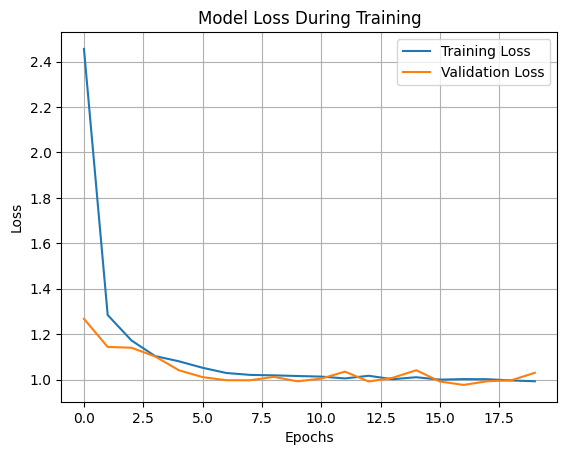

183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Test MSE: 4.033896858919589
Test R-squared: 0.04532600220114891


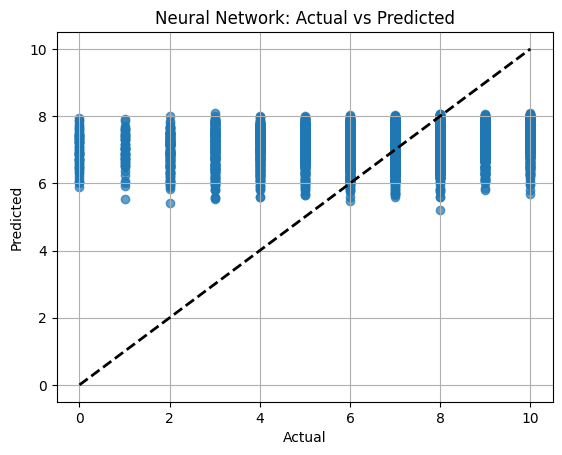

In [621]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import RobustScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.losses import Huber
from scipy import stats

# Define top 20 features based on previous feature importance analysis
top_20_features = [
   'ConvertedCompYearly', 'WorkExp', 'PurchaseInfluence_I have little or no influence', 
        'JobSat_Code_Quality_Improvement', 'JobSat_New_Tech_Learning', 'JobSat_Strategy_Driving', 
        'JobSat_Architecture_Design', 'Knowledge_Sharing_Limitations_Strongly agree', 
        'JobSat_Tool_Expertise', 'Tools_and_Resources_Access_Strongly disagree', 
        'Tools_and_Resources_Access_Disagree', 'Quick_Access_to_Answers_Disagree', 
        'Access_to_UpToDate_Info_Strongly disagree', 'Access_to_UpToDate_Info_Disagree', 
        'Quick_Access_to_Answers_Strongly disagree', 'JobSat_Hardware_Working', 
        'JobSat_Internal_Network_Staffing', 'JobSat_Data_Security', 
        'Knowledge_Silos_Encountered_Never', 'JobSat_OpenSource_Contribution'
]
# Subset the training and test data to only include the top 20 features
X_train_subset = X_train_transformed_df[top_20_features]
X_test_subset = X_test_transformed_df[top_20_features]

# Convert sparse data to dense format if necessary
def to_dense(df):
    return np.asarray(df.todense()) if hasattr(df, "todense") else np.asarray(df)

X_train_subset = to_dense(X_train_subset)
X_test_subset = to_dense(X_test_subset)

# Load and preprocess data
scaler = RobustScaler(with_centering=False)
X_train_scaled = scaler.fit_transform(X_train_subset)
X_test_scaled = scaler.transform(X_test_subset)

# Handle outliers by removing samples with extreme Z-scores
z_scores = np.abs(stats.zscore(X_train_scaled))
outlier_filter = (z_scores < 3).all(axis=1)
X_train_cleaned = X_train_scaled[outlier_filter]
y_train_cleaned = y_train[outlier_filter]  # Use boolean indexing for matching y values

# The rest of the code continues as before...

# Function to create the model
def create_model(input_dim, learning_rate=0.001, neurons=64, dropout_rate=0.2, l2_lambda=0.01):
    model = Sequential()
    model.add(Dense(neurons, input_dim=input_dim, activation='relu', kernel_regularizer='l2'))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))
    model.add(Dense(neurons, activation='relu', kernel_regularizer='l2'))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss=Huber(delta=1.0))
    return model

# Define hyperparameters for tuning
param_dist = {
    'neurons': [64, 128],
    'learning_rate': [0.001, 0.01],
    'batch_size': [32, 64],
    'epochs': [10, 20],
    'dropout_rate': [0.2, 0.3],
    'l2_lambda': [0.01, 0.001]
}

# Manual cross-validation for hyperparameter tuning
kf = KFold(n_splits=3, shuffle=True, random_state=42)
best_mse = float("inf")
best_params = {}

# Cross-validation loop through hyperparameters
for neurons in param_dist['neurons']:
    for learning_rate in param_dist['learning_rate']:
        for batch_size in param_dist['batch_size']:
            for epochs in param_dist['epochs']:
                for dropout_rate in param_dist['dropout_rate']:
                    for l2_lambda in param_dist['l2_lambda']:
                        fold_mse = []
                        for train_index, val_index in kf.split(X_train_cleaned):
                            X_train_cv, X_val_cv = X_train_cleaned[train_index], X_train_cleaned[val_index]
                            y_train_cv, y_val_cv = y_train_cleaned.iloc[train_index], y_train_cleaned.iloc[val_index]
                            
                            model = create_model(
                                input_dim=X_train_cleaned.shape[1], 
                                learning_rate=learning_rate, 
                                neurons=neurons, 
                                dropout_rate=dropout_rate, 
                                l2_lambda=l2_lambda
                            )
                            
                            early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
                            lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5)
                            
                            # Fit the model
                            history = model.fit(
                                X_train_cv, y_train_cv, 
                                epochs=epochs, 
                                batch_size=batch_size,
                                validation_data=(X_val_cv, y_val_cv), 
                                callbacks=[early_stopping, lr_scheduler], 
                                verbose=1
                            )
                            
                            # Calculate MSE for validation set
                            y_val_pred = model.predict(X_val_cv)
                            mse = mean_squared_error(y_val_cv, y_val_pred)
                            fold_mse.append(mse)
                        
                        avg_mse = np.mean(fold_mse)
                        if avg_mse < best_mse:
                            best_mse = avg_mse
                            best_params = {
                                'neurons': neurons, 
                                'learning_rate': learning_rate, 
                                'batch_size': batch_size, 
                                'epochs': epochs,
                                'dropout_rate': dropout_rate, 
                                'l2_lambda': l2_lambda
                            }

print(f"Best hyperparameters: {best_params}")
print(f"Best MSE: {best_mse}")

# Train the final model with the best parameters
best_model = create_model(
    input_dim=X_train_cleaned.shape[1], 
    learning_rate=best_params['learning_rate'], 
    neurons=best_params['neurons'],
    dropout_rate=best_params['dropout_rate'], 
    l2_lambda=best_params['l2_lambda']
)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5)

history = best_model.fit(
    X_train_cleaned, y_train_cleaned, 
    epochs=best_params['epochs'], 
    batch_size=best_params['batch_size'], 
    validation_split=0.2, 
    callbacks=[early_stopping, lr_scheduler], 
    verbose=1
)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Predict on the test set and calculate MSE and R-squared
y_test_pred = best_model.predict(X_test_scaled)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Test MSE: {test_mse}")
print(f"Test R-squared: {test_r2}")

# Plot predicted vs actual values
plt.scatter(y_test, y_test_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Neural Network: Actual vs Predicted')
plt.grid(True)
plt.show()


Epoch 1/50
485/485 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 25.4531 - val_loss: 4.3172
Epoch 2/50
485/485 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.0204 - val_loss: 3.8520
Epoch 3/50
485/485 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.7609 - val_loss: 3.8164
Epoch 4/50
485/485 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.6358 - val_loss: 3.7950
Epoch 5/50
485/485 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.7409 - val_loss: 3.7833
Epoch 6/50
485/485 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.6196 - val_loss: 3.7716
Epoch 7/50
485/485 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.5642 - val_loss: 3.7653
Epoch 8/50
485/485 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.5854 - val_loss: 3.7441
Epoch 9/50
485/485 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.5556 - val_loss: 3.7803
Epoch 10/50
485/485 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.5860 - val_loss: 3.7482
Epoch 11/50
485/485 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.6306 - val_loss: 3.7619
Epoch 12/50
485/485 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/ste

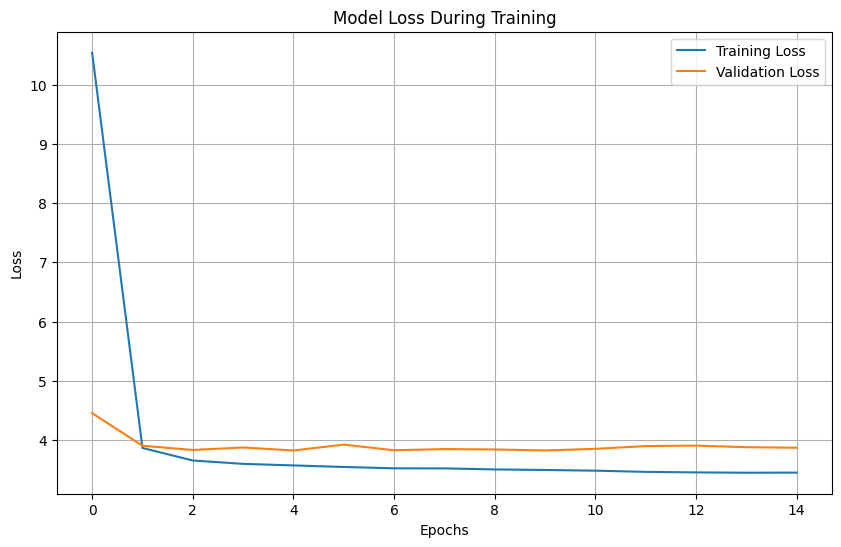

183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Test MSE (Neural Network): 3.640299415558254
Test R-squared (Neural Network): 0.13847594081356374


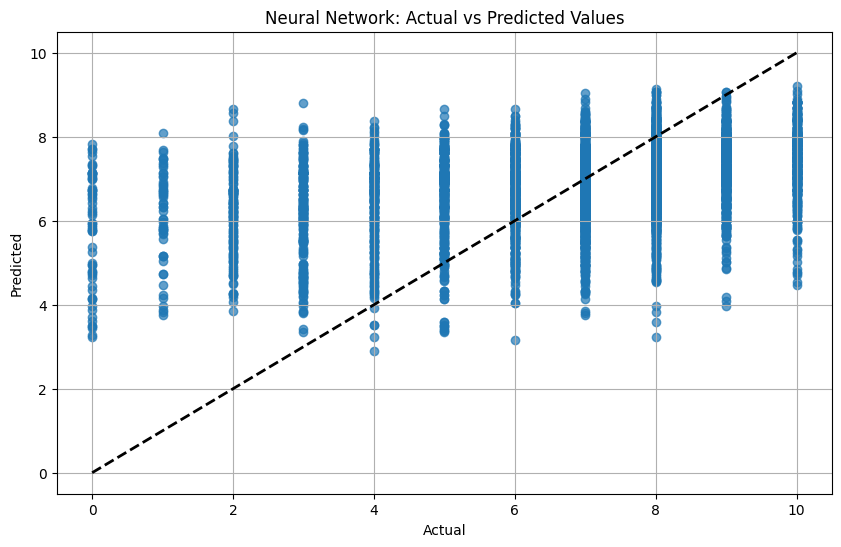

In [82]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Input
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt


# Function to build the model
def create_model(learning_rate=0.001, neurons=32):
    model = Sequential()
    
    # Input layer using the `Input` function
    model.add(Input(shape=(X_train_transformed_df.shape[1],)))  # Use Input to specify the input shape
    
    # First hidden layer
    model.add(Dense(neurons, activation='relu'))
    
    # Second hidden layer (you can add more layers as needed)
    model.add(Dense(neurons, activation='relu'))
    
    # Output layer (1 output for regression)
    model.add(Dense(1, activation='linear'))
    
    # Compile the model
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error')
    
    return model


# Set the hyperparameters you want to tune
param_dist = {
    'neurons': [32, 64, 128],
    'learning_rate': [0.001, 0.01, 0.1],
    'batch_size': [32, 64, 128],
    'epochs': [50, 100, 200]
}

# Manual cross-validation with early stopping
kf = KFold(n_splits=3, shuffle=True, random_state=42)

best_mse = float("inf")
best_params = {}

# Loop through the hyperparameters
for neurons in param_dist['neurons']:
    for learning_rate in param_dist['learning_rate']:
        for batch_size in param_dist['batch_size']:
            for epochs in param_dist['epochs']:
                fold_mse = []
                # Cross-validation
                for train_index, val_index in kf.split(X_train_transformed_df):
                    X_train_cv, X_val_cv = X_train_transformed_df.iloc[train_index], X_train_transformed_df.iloc[val_index]
                    y_train_cv, y_val_cv = y_train.iloc[train_index], y_train.iloc[val_index]
                    
                    model = create_model(learning_rate=learning_rate, neurons=neurons)
                    
                    # Early stopping callback
                    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
                    
                    # Fit the model with progress display (verbose=1)
                    history = model.fit(X_train_cv, y_train_cv, epochs=epochs, batch_size=batch_size, 
                                        validation_data=(X_val_cv, y_val_cv), callbacks=[early_stopping], verbose=1)
                    
                    # Predict on the validation set
                    y_val_pred = model.predict(X_val_cv)
                    mse = mean_squared_error(y_val_cv, y_val_pred)
                    fold_mse.append(mse)
                
                avg_mse = np.mean(fold_mse)
                
                if avg_mse < best_mse:
                    best_mse = avg_mse
                    best_params = {'neurons': neurons, 'learning_rate': learning_rate, 'batch_size': batch_size, 'epochs': epochs}

# Print the best hyperparameters and MSE
print(f"Best hyperparameters: {best_params}")
print(f"Best MSE: {best_mse}")

# Train the best model on the entire training set
best_model = create_model(learning_rate=best_params['learning_rate'], neurons=best_params['neurons'])

# Fit the model with verbose=1 and capture history
history = best_model.fit(X_train_transformed_df, y_train, epochs=best_params['epochs'], 
                         batch_size=best_params['batch_size'], validation_split=0.2, 
                         callbacks=[early_stopping], verbose=1)

# Plot training and validation loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Predict on the test set and calculate MSE and R-squared
y_test_pred_nn = best_model.predict(X_test_transformed_df)
test_mse_nn = mean_squared_error(y_test, y_test_pred_nn)
test_r2_nn = r2_score(y_test, y_test_pred_nn)

# Print MSE and R-squared
print(f"Test MSE (Neural Network): {test_mse_nn}")
print(f"Test R-squared (Neural Network): {test_r2_nn}")

# Plot predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred_nn, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Line of perfect prediction
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Neural Network: Actual vs Predicted Values')
plt.grid(True)
plt.show()


In [1113]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Function to convert data to dense if it’s in sparse format
def to_dense(data):
    return np.asarray(data.todense()) if hasattr(data, "todense") else np.asarray(data)

# Function to build a deeper model with dropout and batch normalization
def create_model(learning_rate=0.001, neurons=64):
    model = Sequential()
    
    # Input layer
    model.add(Input(shape=(X_train_transformed_df.shape[1],)))
    
    # Hidden layers with batch normalization and dropout
    model.add(Dense(neurons, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    
    model.add(Dense(neurons * 2, activation='relu'))  # More neurons in the second hidden layer
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    
    model.add(Dense(neurons * 2, activation='relu'))  # Additional hidden layer
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    
    # Output layer for regression
    model.add(Dense(1, activation='linear'))
    
    # Compile the model
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error')
    
    return model

# Set the hyperparameters you want to tune
param_dist = {
    'neurons': [32, 64, 128],
    'learning_rate': [0.001, 0.01, 0.1],
    'batch_size': [32, 64, 128],
    'epochs': [50, 100, 200]
}

# Manual cross-validation with early stopping
kf = KFold(n_splits=3, shuffle=True, random_state=42)

best_mse = float("inf")
best_params = {}

# Loop through the hyperparameters
for neurons in param_dist['neurons']:
    for learning_rate in param_dist['learning_rate']:
        for batch_size in param_dist['batch_size']:
            for epochs in param_dist['epochs']:
                fold_mse = []
                # Cross-validation
                for train_index, val_index in kf.split(X_train_transformed_df):
                    # Convert data to dense format
                    X_train_cv = to_dense(X_train_transformed_df.iloc[train_index])
                    X_val_cv = to_dense(X_train_transformed_df.iloc[val_index])
                    y_train_cv, y_val_cv = y_train.iloc[train_index], y_train.iloc[val_index]
                    
                    model = create_model(learning_rate=learning_rate, neurons=neurons)
                    
                    # Early stopping callback
                    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
                    
                    # Fit the model with progress display (verbose=1)
                    history = model.fit(X_train_cv, y_train_cv, epochs=epochs, batch_size=batch_size, 
                                        validation_data=(X_val_cv, y_val_cv), callbacks=[early_stopping], verbose=1)
                    
                    # Predict on the validation set
                    y_val_pred = model.predict(X_val_cv)
                    mse = mean_squared_error(y_val_cv, y_val_pred)
                    fold_mse.append(mse)
                
                avg_mse = np.mean(fold_mse)
                
                if avg_mse < best_mse:
                    best_mse = avg_mse
                    best_params = {'neurons': neurons, 'learning_rate': learning_rate, 'batch_size': batch_size, 'epochs': epochs}

# Print the best hyperparameters and MSE
print(f"Best hyperparameters: {best_params}")
print(f"Best MSE: {best_mse}")

# Train the best model on the entire training set
best_model = create_model(learning_rate=best_params['learning_rate'], neurons=best_params['neurons'])

# Fit the model with verbose=1 and capture history
history = best_model.fit(to_dense(X_train_transformed_df), y_train, epochs=best_params['epochs'], 
                         batch_size=best_params['batch_size'], validation_split=0.2, 
                         callbacks=[early_stopping], verbose=1)

# Plot training and validation loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Predict on the test set and calculate MSE and R-squared
y_test_pred_nn = best_model.predict(to_dense(X_test_transformed_df))
test_mse_nn = mean_squared_error(y_test, y_test_pred_nn)
test_r2_nn = r2_score(y_test, y_test_pred_nn)

# Print MSE and R-squared
print(f"Test MSE (Neural Network): {test_mse_nn}")
print(f"Test R-squared (Neural Network): {test_r2_nn}")

# Plot predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred_nn, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Line of perfect prediction
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Neural Network: Actual vs Predicted Values')
plt.grid(True)
plt.show()


Epoch 1/50
360/360 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 40.8884 - val_loss: 5.4060
Epoch 2/50
360/360 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 7.3884 - val_loss: 4.3284
Epoch 3/50
360/360 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 6.0946 - val_loss: 4.0386
Epoch 4/50
360/360 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 5.2282 - val_loss: 3.8543
Epoch 5/50
360/360 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4.9917 - val_loss: 3.7632
Epoch 6/50
360/360 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4.5412 - val_loss: 3.6558
Epoch 7/50
360/360 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4.3835 - val_loss: 3.6341
Epoch 8/50
360/360 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4.3829 - val_loss: 3.5821
Epoch 9/50
360/360 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4.0299 - val_loss: 3.5595
Epoch 10/50
360/360 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 3.9470 - val_loss: 3.5509
Epoch 11/50
360/360 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 3.9596 - val_loss: 3.5196
Epoch 12/50
360/360 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/ste

KeyboardInterrupt: 

Epoch 1/50
485/485 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 24.8671 - val_loss: 3.9937
Epoch 2/50
485/485 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.9687 - val_loss: 3.9479
Epoch 3/50
485/485 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.9330 - val_loss: 3.9321
Epoch 4/50
485/485 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.9736 - val_loss: 3.9628
Epoch 5/50
485/485 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.9916 - val_loss: 3.9417
Epoch 6/50
485/485 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.0197 - val_loss: 3.9466
Epoch 7/50
485/485 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.9348 - val_loss: 3.9362
Epoch 8/50
485/485 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.9292 - val_loss: 3.9336
Epoch 9/50
485/485 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.9496 - val_loss: 3.9308
Epoch 10/50
485/485 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.9428 - val_loss: 3.9493
Epoch 11/50
485/485 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 4.0566 - val_loss: 3.9222
Epoch 12/50
485/485 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/ste

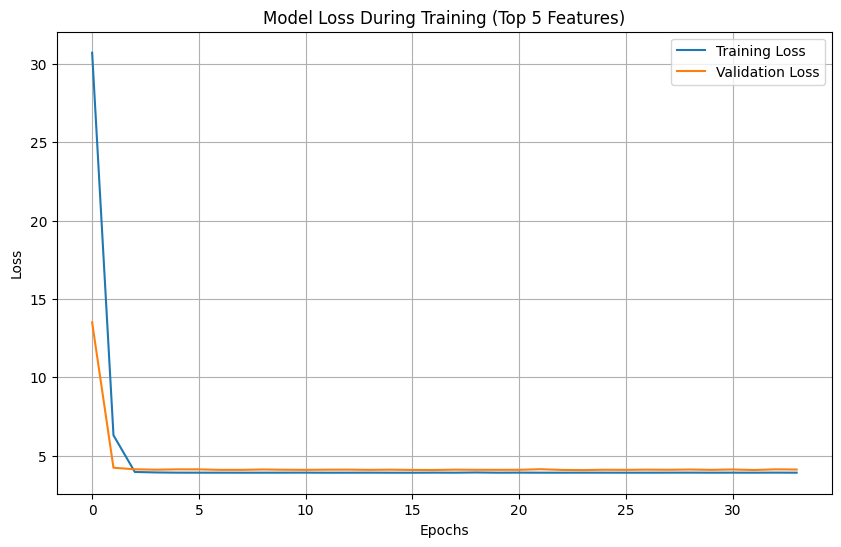

183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Test MSE (Neural Network with 5 features): 3.8551862137252586
Test R-squared (Neural Network with 5 features): 0.08762019366507723


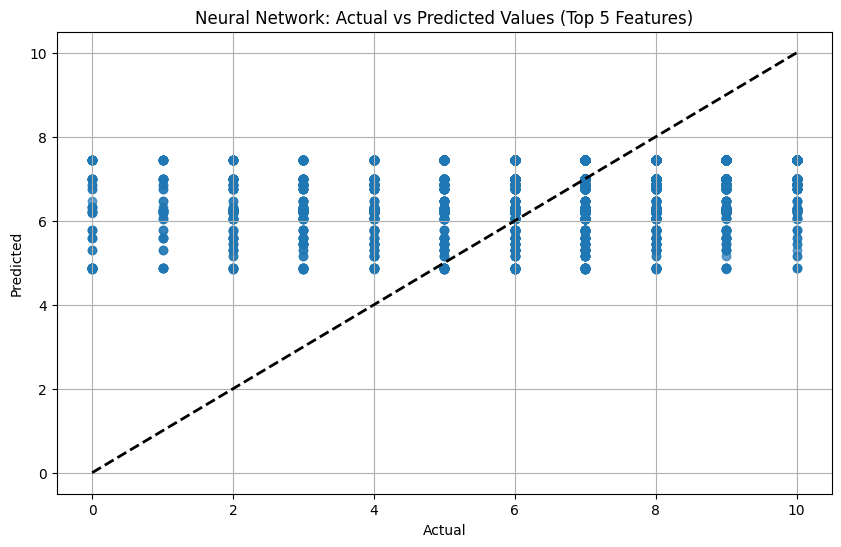

Epoch 1/50
485/485 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 24.4944 - val_loss: 3.9074
Epoch 2/50
485/485 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.8208 - val_loss: 3.8204
Epoch 3/50
485/485 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.7803 - val_loss: 3.7934
Epoch 4/50
485/485 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.8050 - val_loss: 3.8325
Epoch 5/50
485/485 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.8360 - val_loss: 3.7922
Epoch 6/50
485/485 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.8112 - val_loss: 3.7883
Epoch 7/50
485/485 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.8022 - val_loss: 3.8161
Epoch 8/50
485/485 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.7898 - val_loss: 3.7579
Epoch 9/50
485/485 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.7554 - val_loss: 3.8026
Epoch 10/50
485/485 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.7238 - val_loss: 3.7798
Epoch 11/50
485/485 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.7378 - val_loss: 3.8238
Epoch 12/50
485/485 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/ste

KeyboardInterrupt: 

In [83]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Input
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt


# Function to build the model
def create_model(learning_rate=0.001, neurons=32):
    model = Sequential()
    
    # Input layer using the `Input` function
    model.add(Input(shape=(X_train_subset.shape[1],)))  # Use Input to specify the input shape for subsets
    
    # First hidden layer
    model.add(Dense(neurons, activation='relu'))
    
    # Second hidden layer (you can add more layers as needed)
    model.add(Dense(neurons, activation='relu'))
    
    # Output layer (1 output for regression)
    model.add(Dense(1, activation='linear'))
    
    # Compile the model
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error')
    
    return model


# Set the hyperparameters you want to tune
param_dist = {
    'neurons': [32, 64, 128],
    'learning_rate': [0.001, 0.01, 0.1],
    'batch_size': [32, 64, 128],
    'epochs': [50, 100, 200]
}

# Top 5, 10, 15, and 20 features
features_to_test = [5, 10, 15, 20]
results = {}

# Manual cross-validation with early stopping
kf = KFold(n_splits=3, shuffle=True, random_state=42)

for num_features in features_to_test:
    
    # Extract top N features based on feature importance
    top_n_features = feature_importances['Feature'][:num_features].tolist()
    
    # Filter X_train and X_test to keep only the top N features
    X_train_subset = X_train_transformed_df[top_n_features]
    X_test_subset = X_test_transformed_df[top_n_features]
    
    best_mse = float("inf")
    best_params = {}
    
    # Loop through the hyperparameters
    for neurons in param_dist['neurons']:
        for learning_rate in param_dist['learning_rate']:
            for batch_size in param_dist['batch_size']:
                for epochs in param_dist['epochs']:
                    fold_mse = []
                    # Cross-validation
                    for train_index, val_index in kf.split(X_train_subset):
                        X_train_cv, X_val_cv = X_train_subset.iloc[train_index], X_train_subset.iloc[val_index]
                        y_train_cv, y_val_cv = y_train.iloc[train_index], y_train.iloc[val_index]
                        
                        model = create_model(learning_rate=learning_rate, neurons=neurons)
                        
                        # Early stopping callback
                        early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
                        
                        # Fit the model with progress display (verbose=1)
                        history = model.fit(X_train_cv, y_train_cv, epochs=epochs, batch_size=batch_size, 
                                            validation_data=(X_val_cv, y_val_cv), callbacks=[early_stopping], verbose=1)
                        
                        # Predict on the validation set
                        y_val_pred = model.predict(X_val_cv)
                        mse = mean_squared_error(y_val_cv, y_val_pred)
                        fold_mse.append(mse)
                    
                    avg_mse = np.mean(fold_mse)
                    
                    if avg_mse < best_mse:
                        best_mse = avg_mse
                        best_params = {'neurons': neurons, 'learning_rate': learning_rate, 'batch_size': batch_size, 'epochs': epochs}
    
    # Print the best hyperparameters and MSE for this subset of features
    print(f"\nNumber of features: {num_features}")
    print(f"Best hyperparameters: {best_params}")
    print(f"Best MSE: {best_mse}")
    
    # Train the best model on the entire training set
    best_model = create_model(learning_rate=best_params['learning_rate'], neurons=best_params['neurons'])
    
    # Fit the model with verbose=1 and capture history
    history = best_model.fit(X_train_subset, y_train, epochs=best_params['epochs'], 
                             batch_size=best_params['batch_size'], validation_split=0.2, 
                             callbacks=[early_stopping], verbose=1)
    
    # Plot training and validation loss over epochs
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Model Loss During Training (Top {num_features} Features)')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Predict on the test set and calculate MSE and R-squared
    y_test_pred_nn = best_model.predict(X_test_subset)
    test_mse_nn = mean_squared_error(y_test, y_test_pred_nn)
    test_r2_nn = r2_score(y_test, y_test_pred_nn)
    
    # Print MSE and R-squared
    print(f"Test MSE (Neural Network with {num_features} features): {test_mse_nn}")
    print(f"Test R-squared (Neural Network with {num_features} features): {test_r2_nn}")
    
    # Plot predicted vs actual values
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_test_pred_nn, alpha=0.7)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Line of perfect prediction
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Neural Network: Actual vs Predicted Values (Top {num_features} Features)')
    plt.grid(True)
    plt.show()
    
    # Store results for each feature count
    results[num_features] = {'Test MSE': test_mse_nn, 'Test R-squared': test_r2_nn}
    
# Print final results summary
for num_features, metrics in results.items():
    print(f"\nNumber of Features: {num_features}")
    print(f"Test MSE: {metrics['Test MSE']}")
    print(f"Test R-squared: {metrics['Test R-squared']}")
